ElecKart, headquartered in Ontario, Canada, is an e-commerce company that specializes in electronic products. In addition to its regular offerings, the company occasionally runs significant promotions, akin to events like the Big Billion Day. Leveraging supervised machine learning techniques, I proposed strategies for the optimal distribution of the budget across various marketing channels in the year 2017. The findings from this analysis were instrumental in reallocating the budget strategically among marketing levers, leading to enhanced revenue response.


Objective:

Create a market mix model to assess the tangible effects of diverse marketing variables throughout the preceding year.

Propose the ideal budget distribution for distinct marketing levers in the upcoming year, informed by insights derived from the model.

In [396]:
import numpy as np
import pandas as pd
from datetime import date, datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
import sklearn

In [397]:
consumer_df = pd.read_csv("/content/drive/MyDrive/DataScience/EcomProject/ConsumerElectronics.csv",na_values=['\\N',' '])

In [398]:
consumer_df.shape

(1648824, 20)

In [399]:
consumer_df.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id     gmv  units  deliverybdays  deliverycdays  \
0   3.419301e+15  6400.0      1            NaN            NaN   
1   1.420831e+15  6900.0      1            NaN            NaN   
2   2.421913e+15  1990.0      1            NaN            NaN   
3   4.416592e+15  1690.0      1            NaN            NaN   
4   4.419525e+15  1618.0      1            NaN            NaN   

  s1_fact.order_payment_type  sla       cust_id       pincode  \
0                        COD    5 -1.012991e+18 -7.791756e+18   
1                        COD    7 -8.990325e+18  7.335411e+18   
2                        COD   10 -1.040443e+18 -7.477688e+18   
3                    Prepaid    4 -7.604961e+18 -5.835932e+18   
4                    Prepaid    6  2.894557e+18  5.347354e+17   

  product_analytic_super_category product_analytic_category  \
0                              CE           CameraAccessory   
1                              CE           CameraAccessory   
2                              CE           CameraAccessory   
3                              CE           CameraAccessory   
4                              CE           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla  
0                        0  
1                        0  
2                        3  
3                        3  
4                        3

In [400]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1643920 non-null  float64
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    335852 non-null   float64
 9   deliverycdays                    335853 non-null   float64
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [401]:
consumer_df.describe()

Year         Month      order_id  order_item_id           gmv  \
count  1.648824e+06  1.648824e+06  1.648824e+06   1.648824e+06  1.643920e+06   
mean   2.015519e+03  6.585650e+00  2.842445e+15   1.375628e+16  2.461124e+03   
std    4.996557e-01  3.623351e+00  1.269134e+15   5.594598e+16  5.618842e+03   
min    2.015000e+03  1.000000e+00  7.633152e+07   1.080165e+08  0.000000e+00   
25%    2.015000e+03  3.000000e+00  1.602589e+15   1.606725e+15  3.400000e+02   
50%    2.016000e+03  6.000000e+00  2.611825e+15   2.619185e+15  7.500000e+02   
75%    2.016000e+03  1.000000e+01  3.610614e+15   4.397706e+15  1.999000e+03   
max    2.016000e+03  1.200000e+01  5.395077e+15   3.000373e+17  2.269470e+05   

              units  deliverybdays  deliverycdays           sla       cust_id  \
count  1.648824e+06  335852.000000  335853.000000  1.648824e+06  1.643920e+06   
mean   1.022087e+00       4.575358       5.248299  5.687832e+00 -7.057686e+15   
std    2.535318e-01       3.382710      12.521473  2.983336e+00  5.327064e+18   
min    1.000000e+00     -98.000000   -5345.000000  0.000000e+00 -9.223351e+18   
25%    1.000000e+00       3.000000       3.000000  4.000000e+00 -4.616854e+18   
50%    1.000000e+00       4.000000       5.000000  6.000000e+00 -1.738055e+16   
75%    1.000000e+00       6.000000       7.000000  7.000000e+00  4.603580e+18   
max    5.000000e+01     238.000000     278.000000  1.006000e+03  9.223362e+18   

            pincode   product_mrp  product_procurement_sla  
count  1.643920e+06  1.648824e+06             1.648824e+06  
mean   1.002128e+17  4.108309e+03             5.403451e+00  
std    5.312979e+18  8.510918e+03             5.346618e+01  
min   -9.221830e+18  0.000000e+00            -1.000000e+00  
25%   -4.414802e+18  7.990000e+02             1.000000e+00  
50%    1.240911e+17  1.599000e+03             2.000000e+00  
75%    4.786651e+18  3.499000e+03             3.000000e+00  
max    9.222980e+18  2.999990e+05             1.000000e+03

In [402]:
round((consumer_df.isnull().sum()/len(consumer_df.index)*100),2).sort_values(ascending = False)

deliverybdays                      79.63
deliverycdays                      79.63
product_analytic_vertical           0.35
cust_id                             0.30
gmv                                 0.30
pincode                             0.30
fsn_id                              0.00
product_mrp                         0.00
product_analytic_sub_category       0.00
product_analytic_category           0.00
product_analytic_super_category     0.00
s1_fact.order_payment_type          0.00
sla                                 0.00
order_date                          0.00
units                               0.00
order_item_id                       0.00
order_id                            0.00
Month                               0.00
Year                                0.00
product_procurement_sla             0.00
dtype: float64

In [403]:
## Finding total number of unique for all categories
print("Percentage of unique orders for all the categories:",
      len(consumer_df.drop_duplicates(subset = ["order_id"], keep = False))/len(consumer_df)*100)

Percentage of unique orders for all the categories: 83.02159599811745


In [404]:
## Percentage of unique orders for the categories:
print("Percentage of unique orders for the 3 categories:",
      len(consumer_df.loc[(consumer_df['product_analytic_sub_category']=='GamingAccessory') |
                 (consumer_df['product_analytic_sub_category']=='CameraAccessory') |
                 (consumer_df['product_analytic_sub_category']=='HomeAudio')].drop_duplicates
          (subset = ["order_id"], keep = False))/len(consumer_df.loc[((consumer_df['product_analytic_sub_category']=='GamingAccessory') |
                                                             (consumer_df['product_analytic_sub_category']=='CameraAccessory') |
                                                             (consumer_df['product_analytic_sub_category']=='HomeAudio'))])*100)

Percentage of unique orders for the 3 categories: 81.95886392814697


In [405]:
## Finding non duplicates rows based on order_date , order_id , order_item_id and uni
consumer_df.drop_duplicates(subset = ["order_date", "order_id", "order_item_id" ,"units"], keep = 'first', inplace = True)

In [406]:
consumer_df.shape

(1536296, 20)

In [407]:
consumer_df.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id     gmv  units  deliverybdays  deliverycdays  \
0   3.419301e+15  6400.0      1            NaN            NaN   
1   1.420831e+15  6900.0      1            NaN            NaN   
2   2.421913e+15  1990.0      1            NaN            NaN   
3   4.416592e+15  1690.0      1            NaN            NaN   
4   4.419525e+15  1618.0      1            NaN            NaN   

  s1_fact.order_payment_type  sla       cust_id       pincode  \
0                        COD    5 -1.012991e+18 -7.791756e+18   
1                        COD    7 -8.990325e+18  7.335411e+18   
2                        COD   10 -1.040443e+18 -7.477688e+18   
3                    Prepaid    4 -7.604961e+18 -5.835932e+18   
4                    Prepaid    6  2.894557e+18  5.347354e+17   

  product_analytic_super_category product_analytic_category  \
0                              CE           CameraAccessory   
1                              CE           CameraAccessory   
2                              CE           CameraAccessory   
3                              CE           CameraAccessory   
4                              CE           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla  
0                        0  
1                        0  
2                        3  
3                        3  
4                        3

In [408]:
#consumer_df['order_datetime'] = pd.to_datetime(consumer_df['order_date'], format='%Y-%m-%d %H:%M:%S')
# Making these columns for meaningful
consumer_df['cust_id']=  consumer_df['cust_id'].apply(lambda x: '{:.0f}'.format(x))
consumer_df['order_id']=  consumer_df['order_id'].apply(lambda x: '{:.0f}'.format(x))
consumer_df['order_item_id']=  consumer_df['order_item_id'].apply(lambda x: '{:.0f}'.format(x))
consumer_df['pincode']=  consumer_df['pincode'].apply(lambda x: '{:.0f}'.format(x))

In [409]:
consumer_df['order_date_time'] = pd.to_datetime(consumer_df['order_date'], format='%Y-%m-%d %H:%M:%S')

In [410]:
consumer_df['order_date'] = consumer_df['order_date_time'].dt.date

In [411]:
consumer_df['order_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1536296 entries, 0 to 1543996
Series name: order_date
Non-Null Count    Dtype 
--------------    ----- 
1536296 non-null  object
dtypes: object(1)
memory usage: 23.4+ MB


In [412]:
consumer_df.shape

(1536296, 21)

In [413]:
## we need to use the data from July 2015 to June 2016.
start_date = pd.to_datetime("2015-07-01").date()
end_date = pd.to_datetime("2016-06-30").date()

consumer_df = consumer_df.loc[(consumer_df['order_date']>=start_date) & (consumer_df['order_date']<=end_date)]

In [414]:
consumer_df.shape

(1535689, 21)

In [415]:
## Since we need create models agreegated weekly data as per the order date , create a new column weekly_order
consumer_df['weekly_order'] = consumer_df['order_date_time'].dt.week

<ipython-input-415-e8512ae60343>:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [416]:
consumer_df.head()

fsn_id  order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P  2015-10-19  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4419525153426400   

      order_item_id     gmv  units  deliverybdays  deliverycdays  ...  \
0  3419300926147000  6400.0      1            NaN            NaN  ...   
1  1420830839915200  6900.0      1            NaN            NaN  ...   
2  2421912925714800  1990.0      1            NaN            NaN  ...   
3  4416592101738400  1690.0      1            NaN            NaN  ...   
4  4419525153426400  1618.0      1            NaN            NaN  ...   

                cust_id               pincode product_analytic_super_category  \
0  -1012991307785880064  -7791755829057349632                              CE   
1  -8990324579055120384   7335411490974310400                              CE   
2  -1040442942046599936  -7477687762286570496                              CE   
3  -7604960843527140352  -5835931638776609792                              CE   
4   2894557208345299968    534735360997241984                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical product_mrp product_procurement_sla  \
0              CameraTripod        7190                       0   
1              CameraTripod        7190                       0   
2              CameraTripod        2099                       3   
3              CameraTripod        2099                       3   
4              CameraTripod        2099                       3   

      order_date_time  weekly_order  
0 2015-10-17 15:11:54            42  
1 2015-10-19 10:07:22            43  
2 2015-10-20 15:45:56            43  
3 2015-10-14 12:05:15            42  
4 2015-10-17 21:25:03            42  

[5 rows x 22 columns]

In [417]:
consumer_df.describe()

Year         Month           gmv         units  deliverybdays  \
count  1.535689e+06  1.535689e+06  1.531671e+06  1.535689e+06  333427.000000   
mean   2.015553e+03  6.421973e+00  2.487553e+03  1.022001e+00       4.577875   
std    4.971470e-01  3.687458e+00  5.654459e+03  2.556129e-01       3.386650   
min    2.015000e+03  1.000000e+00  0.000000e+00  1.000000e+00     -98.000000   
25%    2.015000e+03  3.000000e+00  3.400000e+02  1.000000e+00       3.000000   
50%    2.016000e+03  6.000000e+00  7.500000e+02  1.000000e+00       4.000000   
75%    2.016000e+03  1.000000e+01  1.999000e+03  1.000000e+00       6.000000   
max    2.016000e+03  1.200000e+01  2.269470e+05  5.000000e+01     238.000000   

       deliverycdays           sla   product_mrp  product_procurement_sla  \
count  333428.000000  1.535689e+06  1.535689e+06             1.535689e+06   
mean        5.250612  5.685567e+00  4.163810e+03             5.299819e+00   
std        12.563872  2.994290e+00  8.600018e+03             5.252181e+01   
min     -5345.000000  0.000000e+00  0.000000e+00            -1.000000e+00   
25%         3.000000  4.000000e+00  7.990000e+02             1.000000e+00   
50%         5.000000  6.000000e+00  1.599000e+03             2.000000e+00   
75%         7.000000  7.000000e+00  3.499000e+03             3.000000e+00   
max       278.000000  1.006000e+03  2.999990e+05             1.000000e+03   

       weekly_order  
count  1.535689e+06  
mean   2.662279e+01  
std    1.642639e+01  
min    1.000000e+00  
25%    1.200000e+01  
50%    2.300000e+01  
75%    4.200000e+01  
max    5.300000e+01

In [418]:
mean_value = consumer_df['deliverybdays'].mean()
consumer_df['deliverybdays'].fillna(mean_value, inplace=True)


In [419]:
mean_value = consumer_df['deliverycdays'].mean()
consumer_df['deliverycdays'].fillna(mean_value, inplace=True)

In [420]:
round((consumer_df.isnull().sum()/len(consumer_df.index)*100),2).sort_values(ascending = False)

product_analytic_vertical          0.38
gmv                                0.26
fsn_id                             0.00
cust_id                            0.00
order_date_time                    0.00
product_procurement_sla            0.00
product_mrp                        0.00
product_analytic_sub_category      0.00
product_analytic_category          0.00
product_analytic_super_category    0.00
pincode                            0.00
sla                                0.00
order_date                         0.00
s1_fact.order_payment_type         0.00
deliverycdays                      0.00
deliverybdays                      0.00
units                              0.00
order_item_id                      0.00
order_id                           0.00
Month                              0.00
Year                               0.00
weekly_order                       0.00
dtype: float64

In [421]:
## drop rows for gmv and product_analytic_vertical due to less impact on our analysis
consumer_df = consumer_df.loc[~pd.isnull(consumer_df['product_analytic_vertical'])]
consumer_df = consumer_df.loc[~pd.isnull(consumer_df['gmv'])]

In [422]:
round((consumer_df.isnull().sum()/len(consumer_df.index)*100),2).sort_values(ascending = False)

fsn_id                             0.0
order_date                         0.0
order_date_time                    0.0
product_procurement_sla            0.0
product_mrp                        0.0
product_analytic_vertical          0.0
product_analytic_sub_category      0.0
product_analytic_category          0.0
product_analytic_super_category    0.0
pincode                            0.0
cust_id                            0.0
sla                                0.0
s1_fact.order_payment_type         0.0
deliverycdays                      0.0
deliverybdays                      0.0
units                              0.0
gmv                                0.0
order_item_id                      0.0
order_id                           0.0
Month                              0.0
Year                               0.0
weekly_order                       0.0
dtype: float64

In [423]:
## now find the types of payment being used
consumer_df['s1_fact.order_payment_type'].astype('category').value_counts()

COD        1102785
Prepaid     423105
Name: s1_fact.order_payment_type, dtype: int64

So only two payment types being used:
COD and Prepaid.

In [424]:
distinct_values = consumer_df['weekly_order'].unique()

In [425]:
print(distinct_values)

[42 43 41 44 40 45 46 16 10 39  8 17  5 48 47 38  7  3 14  2  4 11  6 13
  9 49 35  1 12 53 18 50 51 52 15 23 21 19 20 22 24 25 26 29 30 28 31 37
 27 32 34 33 36]


In [426]:
consumer_df.loc[(consumer_df.Year == 2016) & (consumer_df.Month==1)].loc[:,['order_date','weekly_order']].sort_values(by='order_date')

order_date  weekly_order
610518  2016-01-01            53
558536  2016-01-01            53
632156  2016-01-01            53
597211  2016-01-01            53
533217  2016-01-01            53
...            ...           ...
504835  2016-01-31             4
504836  2016-01-31             4
568672  2016-01-31             4
504769  2016-01-31             4
543374  2016-01-31             4

[142503 rows x 2 columns]

In [427]:
## Need to make the weeks in sequence
def seqWeek(order_week,year):
    if((year == 2016) & (order_week <= 26)):
         return order_week+53
    else:
        return order_week


In [428]:
consumer_df['weekly_order'] = consumer_df.apply(lambda x: seqWeek(x['weekly_order'],x['Year']), axis = 1)

In [429]:
consumer_df.head()

fsn_id  order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P  2015-10-19  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4419525153426400   

      order_item_id     gmv  units  deliverybdays  deliverycdays  ...  \
0  3419300926147000  6400.0      1       4.577875       5.250612  ...   
1  1420830839915200  6900.0      1       4.577875       5.250612  ...   
2  2421912925714800  1990.0      1       4.577875       5.250612  ...   
3  4416592101738400  1690.0      1       4.577875       5.250612  ...   
4  4419525153426400  1618.0      1       4.577875       5.250612  ...   

                cust_id               pincode product_analytic_super_category  \
0  -1012991307785880064  -7791755829057349632                              CE   
1  -8990324579055120384   7335411490974310400                              CE   
2  -1040442942046599936  -7477687762286570496                              CE   
3  -7604960843527140352  -5835931638776609792                              CE   
4   2894557208345299968    534735360997241984                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical product_mrp product_procurement_sla  \
0              CameraTripod        7190                       0   
1              CameraTripod        7190                       0   
2              CameraTripod        2099                       3   
3              CameraTripod        2099                       3   
4              CameraTripod        2099                       3   

      order_date_time  weekly_order  
0 2015-10-17 15:11:54            42  
1 2015-10-19 10:07:22            43  
2 2015-10-20 15:45:56            43  
3 2015-10-14 12:05:15            42  
4 2015-10-17 21:25:03            42  

[5 rows x 22 columns]

In [430]:
consumer_df.shape

(1525890, 22)

In [431]:
## need to check where MRP of product is 0
consumer_df.loc[consumer_df.product_mrp == 0]

fsn_id  order_date  Year  Month          order_id  \
12504    ACCDGQSWKSEPZCUY  2015-10-03  2015     10  3407010400431800   
12807    ACCDGXGZQUGHFYHT  2015-10-23  2015     10  1424634732111000   
15031    ACCDHHZZGFBDPJRP  2015-10-20  2015     10  3422117911872300   
15032    ACCDHHZZGFBDPJRP  2015-10-28  2015     10  2429116502765100   
15529    ACCDHTZ4CZCECAFF  2015-10-27  2015     10  1427429193266100   
...                   ...         ...   ...    ...               ...   
1529501  GAME63S9X4GRFNDC  2015-09-24  2015      9  1399294280345700   
1531619  GAMEF3QZGRY4QYJB  2015-09-24  2015      9  3399599500774400   
1533670  MICDPYMD6UVVUMF9  2015-09-21  2015      9  3397022856034000   
1533671  MICDPYMD6UVVUMF9  2015-09-18  2015      9  4394308100363000   
1533720  MICDPYMDPNJCBXJ7  2015-09-30  2015      9  4404470261304000   

            order_item_id     gmv  units  deliverybdays  deliverycdays  ...  \
12504    3407010400431800  1099.0      1       4.577875       5.250612  ...   
12807    1424634732111000  3500.0      1       4.577875       5.250612  ...   
15031    3422117911872300   690.0      1       4.577875       5.250612  ...   
15032    2429116502765100   690.0      1       4.577875       5.250612  ...   
15529    1427429193266100  1050.0      1       4.577875       5.250612  ...   
...                   ...     ...    ...            ...            ...  ...   
1529501  1399294280345700   770.0      1       4.577875       5.250612  ...   
1531619  3399599500774400  1970.0      1       4.577875       5.250612  ...   
1533670  3397022856034000  3725.0      1       4.577875       5.250612  ...   
1533671  4394308100363000  3725.0      1       4.577875       5.250612  ...   
1533720  4404470261304000  2691.0      1       4.577875       5.250612  ...   

                      cust_id               pincode  \
12504    -2979266457772980224   -977901032130400000   
12807     1957577179486340096  -4619734144635410432   
15031     4403995352842599936   1151368418656029952   
15032     2020661653326050048  -5739450070941689856   
15529     2544514218128419840   8253630179070570496   
...                       ...                   ...   
1529501   4669014026013259776   2047588931080730112   
1531619   7890723553370670080  -4960675476015420416   
1533670  -5591429134376489984  -3555083208636830208   
1533671  -2322308389689950208   -720491563443864960   
1533720   4867858523131249664  -1034218224755590016   

        product_analytic_super_category product_analytic_category  \
12504                                CE        EntertainmentSmall   
12807                                CE            GamingHardware   
15031                                CE           CameraAccessory   
15032                                CE           CameraAccessory   
15529                                CE           CameraAccessory   
...                                 ...                       ...   
1529501                              CE                 GameCDDVD   
1531619                              CE                 GameCDDVD   
1533670                              CE        EntertainmentSmall   
1533671                              CE        EntertainmentSmall   
1533720                              CE        EntertainmentSmall   

        product_analytic_sub_category product_analytic_vertical product_mrp  \
12504                         Speaker             LaptopSpeaker           0   
12807                 GamingAccessory        GamingAccessoryKit           0   
15031                 CameraAccessory             CameraBattery           0   
15032                 CameraAccessory             CameraBattery           0   
15529                 CameraAccessory             CameraBattery           0   
...                               ...                       ...         ...   
1529501                          Game              PhysicalGame           0   
1531619                          Game              PhysicalGame           0   
1533

In [432]:
## we can remove the rows as this will not help in analysis
consumer_df = consumer_df.loc[consumer_df.product_mrp != 0]

In [433]:
## need to check again where MRP of product is 0
consumer_df.loc[consumer_df.product_mrp == 0]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, deliverybdays, deliverycdays, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, order_date_time, weekly_order]
Index: []

[0 rows x 22 columns]

In [434]:
consumer_df.shape

(1521026, 22)

In [435]:
## check gmv is 0 as this will not help of analysis
len(consumer_df.loc[consumer_df.gmv == 0])

940

In [436]:
consumer_df = consumer_df.loc[~(consumer_df.gmv == 0)]

In [437]:
## check if any value with gmv value 0
consumer_df.loc[consumer_df['gmv'] == 0.0]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, deliverybdays, deliverycdays, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, order_date_time, weekly_order]
Index: []

[0 rows x 22 columns]

In [438]:
## now we have to check if we have any values where gmv >= MRP*number of units sold , ideally this should not be there
consumer_df.loc[consumer_df.gmv > (consumer_df.product_mrp * consumer_df.units)]

fsn_id  order_date  Year  Month          order_id  \
511      ACCCX3SGJRUGH99Z  2015-10-06  2015     10  4409414274572400   
512      ACCCX3SGN4BGZGQY  2015-10-16  2015     10  2417955407141700   
818      ACCCX3SUBDTT3GMA  2015-10-08  2015     10  1411811239304700   
819      ACCCX3SUBDTT3GMA  2015-10-22  2015     10  4423484217011800   
820      ACCCX3SUBXAF4QRK  2015-10-07  2015     10  1410601049371400   
...                   ...         ...   ...    ...               ...   
1543909  VPLEAFCSDSGDN3MQ  2015-09-26  2015      9  3401056309287700   
1543910  VPLEAFCSDSGDN3MQ  2015-09-30  2015      9  3404733643285700   
1543911  VPLEAFCSDSGDN3MQ  2015-09-01  2015      9  2378842904697260   
1543912  VPLEAFCSDSGDN3MQ  2015-09-20  2015      9  3395898721883800   
1543913  VPLEAFCSDSGDN3MQ  2015-09-22  2015      9  1397954438802700   

            order_item_id      gmv  units  deliverybdays  deliverycdays  ...  \
511      4409414274572400  38839.0      1       4.577875       5.250612  ...   
512      2417955407141700  30155.0      1       4.577875       5.250612  ...   
818      1411811239304700    450.0      1       4.577875       5.250612  ...   
819      4423484217011800    900.0      2       4.577875       5.250612  ...   
820      1410601049371400    380.0      1       4.577875       5.250612  ...   
...                   ...      ...    ...            ...            ...  ...   
1543909  3401056309287700   2090.0      1       4.577875       5.250612  ...   
1543910  3404733643285700   2090.0      1       4.577875       5.250612  ...   
1543911  2378842904749150   2090.0      1       4.577875       5.250612  ...   
1543912  3395898721883800   2090.0      1       4.577875       5.250612  ...   
1543913  1397954438802700   2090.0      1       4.577875       5.250612  ...   

                      cust_id               pincode  \
511      -1617884985499729920  -5488422414876180480   
512       7810252194098679808  -3845369806734649856   
818       1094225417257330048  -4625296276251990016   
819       6138352773202599936  -6222871012507570176   
820      -8616460973717909504   1948276093461929984   
...                       ...                   ...   
1543909   1223067848602500096  -4064396209165700096   
1543910  -5351940551013839872  -1947801225867869952   
1543911    958094493904413952   3186507829414430208   
1543912   1636911729380720128  -6698071009621180416   
1543913  -2618954109987820032   2034156616724559872   

        product_analytic_super_category product_analytic_category  \
511                                  CE           CameraAccessory   
512                                  CE           CameraAccessory   
818                                  CE           CameraAccessory   
819                                  CE           CameraAccessory   
820                                  CE           CameraAccessory   
...                                 ...                       ...   
1543909                              CE        EntertainmentSmall   
1543910                              CE        EntertainmentSmall   
1543911                              CE        EntertainmentSmall   
1543912                              CE        EntertainmentSmall   
1543913                              CE        EntertainmentSmall   

        product_analytic_sub_category product_analytic_vertical product_mrp  \
511                   CameraAccessory                      Lens       34980   
512                   CameraAccessory                      Lens       24696   
818                   CameraAccessory                      Lens         405   
819                   CameraAccessory                      Lens         405   
820                   CameraAccessory                      Lens         285   
...                               ...                       ...         ...   
1543909                  TVVideoSmall               VideoPlayer        1990   
1543910                  TVVideoSmall               VideoPlayer        

In [439]:
## check the shape
consumer_df.shape

(1520086, 22)

In [440]:
consumer_df= consumer_df.loc[consumer_df.gmv <= (consumer_df.product_mrp * consumer_df.units)]

In [441]:
## check the shape
consumer_df.shape

(1490019, 22)

In [442]:
consumer_df.describe()

Year         Month           gmv         units  deliverybdays  \
count  1.490019e+06  1.490019e+06  1.490019e+06  1.490019e+06   1.490019e+06   
mean   2.015556e+03  6.411632e+00  2.495538e+03  1.021619e+00   4.577674e+00   
std    4.968865e-01  3.690315e+00  5.677618e+03  2.504660e-01   1.591619e+00   
min    2.015000e+03  1.000000e+00  1.000000e+01  1.000000e+00  -9.800000e+01   
25%    2.015000e+03  3.000000e+00  3.390000e+02  1.000000e+00   4.577875e+00   
50%    2.016000e+03  6.000000e+00  7.500000e+02  1.000000e+00   4.577875e+00   
75%    2.016000e+03  1.000000e+01  1.999000e+03  1.000000e+00   4.577875e+00   
max    2.016000e+03  1.200000e+01  2.269470e+05  5.000000e+01   2.380000e+02   

       deliverycdays           sla   product_mrp  product_procurement_sla  \
count   1.490019e+06  1.490019e+06  1.490019e+06             1.490019e+06   
mean    5.250478e+00  5.683975e+00  4.214486e+03             5.269346e+00   
std     5.900229e+00  2.998176e+00  8.686505e+03             5.209425e+01   
min    -5.345000e+03  0.000000e+00  4.900000e+01            -1.000000e+00   
25%     5.250612e+00  4.000000e+00  8.000000e+02             1.000000e+00   
50%     5.250612e+00  6.000000e+00  1.599000e+03             2.000000e+00   
75%     5.250612e+00  7.000000e+00  3.499000e+03             3.000000e+00   
max     2.780000e+02  1.006000e+03  2.999990e+05             1.000000e+03   

       weekly_order  
count  1.490019e+06  
mean   5.556354e+01  
std    1.354709e+01  
min    2.700000e+01  
25%    4.400000e+01  
50%    5.600000e+01  
75%    6.700000e+01  
max    7.900000e+01

In [443]:
## check values product_procurement_sla
consumer_df['product_procurement_sla'].value_counts()

 2       485670
 3       276563
 1       275932
 5       199341
 4       109310
-1        63430
 0        38210
 6        14420
 7        11122
 15        6089
 14        4758
 1000      4070
 13         481
 8          442
 9           85
 12          57
 10          39
Name: product_procurement_sla, dtype: int64

In [444]:
## remove the negative values having product_procurement_sla
consumer_df = consumer_df.loc[consumer_df.product_procurement_sla >= 0]

In [445]:
consumer_df.shape

(1426589, 22)

In [446]:
# Filtering the data for the 3 categories
consumer_df= consumer_df[(consumer_df['product_analytic_sub_category']=='GamingAccessory')|
       (consumer_df['product_analytic_sub_category']=='CameraAccessory')|(consumer_df['product_analytic_sub_category']=='HomeAudio')]

In [447]:
## Check the shape now
consumer_df.shape

(497573, 22)

In [448]:
consumer_df.head()

fsn_id  order_date  Year  Month          order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17  2015     10  3419300926147000   
1  ACCCX3S58G7B5F6P  2015-10-19  2015     10  1420830839915200   
2  ACCCX3S5AHMF55FV  2015-10-20  2015     10  2421912925714800   
3  ACCCX3S5AHMF55FV  2015-10-14  2015     10  4416592101738400   
4  ACCCX3S5AHMF55FV  2015-10-17  2015     10  4419525153426400   

      order_item_id     gmv  units  deliverybdays  deliverycdays  ...  \
0  3419300926147000  6400.0      1       4.577875       5.250612  ...   
1  1420830839915200  6900.0      1       4.577875       5.250612  ...   
2  2421912925714800  1990.0      1       4.577875       5.250612  ...   
3  4416592101738400  1690.0      1       4.577875       5.250612  ...   
4  4419525153426400  1618.0      1       4.577875       5.250612  ...   

                cust_id               pincode product_analytic_super_category  \
0  -1012991307785880064  -7791755829057349632                              CE   
1  -8990324579055120384   7335411490974310400                              CE   
2  -1040442942046599936  -7477687762286570496                              CE   
3  -7604960843527140352  -5835931638776609792                              CE   
4   2894557208345299968    534735360997241984                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical product_mrp product_procurement_sla  \
0              CameraTripod        7190                       0   
1              CameraTripod        7190                       0   
2              CameraTripod        2099                       3   
3              CameraTripod        2099                       3   
4              CameraTripod        2099                       3   

      order_date_time  weekly_order  
0 2015-10-17 15:11:54            42  
1 2015-10-19 10:07:22            43  
2 2015-10-20 15:45:56            43  
3 2015-10-14 12:05:15            42  
4 2015-10-17 21:25:03            42  

[5 rows x 22 columns]

In [449]:
## now we have 497573 rows of data for analysis
consumer_df.describe()

Year          Month            gmv          units  \
count  497573.000000  497573.000000  497573.000000  497573.000000   
mean     2015.580586       6.204133    1268.487683       1.025586   
std         0.493464       3.663985    2376.996357       0.251926   
min      2015.000000       1.000000      10.000000       1.000000   
25%      2015.000000       3.000000     295.000000       1.000000   
50%      2016.000000       6.000000     545.000000       1.000000   
75%      2016.000000      10.000000    1499.000000       1.000000   
max      2016.000000      12.000000  148050.000000      39.000000   

       deliverybdays  deliverycdays            sla    product_mrp  \
count  497573.000000  497573.000000  497573.000000  497573.000000   
mean        4.596053       5.279235       5.889258    2497.131012   
std         1.015050       3.084536       2.693988    4705.396301   
min       -73.000000    -859.000000       0.000000      99.000000   
25%         4.577875       5.250612       4.000000     766.000000   
50%         4.577875       5.250612       6.000000    1200.000000   
75%         4.577875       5.250612       7.000000    2800.000000   
max        61.000000      72.000000      60.000000  180000.000000   

       product_procurement_sla   weekly_order  
count            497573.000000  497573.000000  
mean                  2.635929      55.950096  
std                   1.656839      13.525257  
min                   0.000000      27.000000  
25%                   2.000000      45.000000  
50%                   2.000000      57.000000  
75%                   3.000000      67.000000  
max                  15.000000      79.000000

<Axes: xlabel='product_analytic_sub_category', ylabel='gmv'>

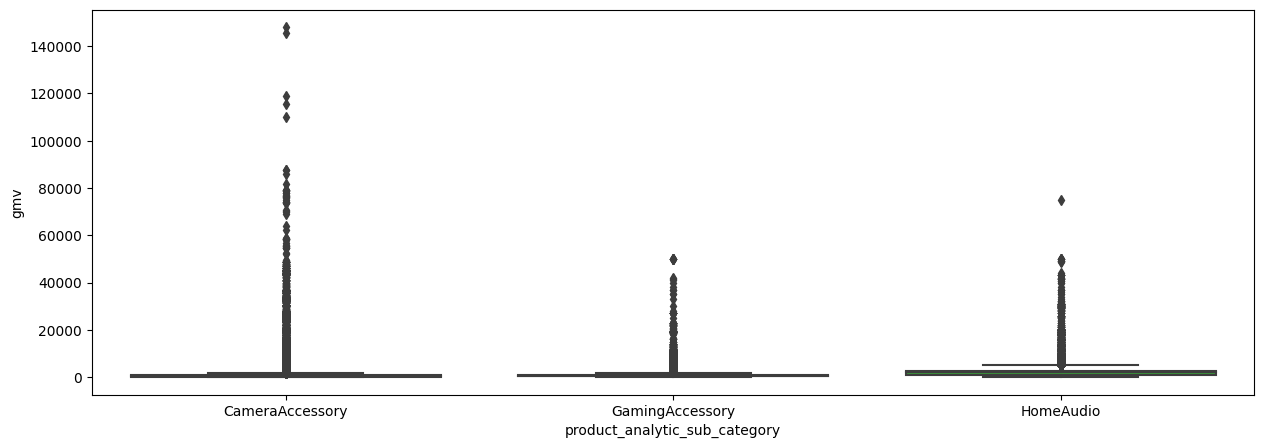

In [450]:
## check the outliers for gmv for all the three categories
plt.figure(figsize = (15,5))
sns.boxplot(y = 'gmv',data = consumer_df, x = 'product_analytic_sub_category')

As per the boxplot , there are more outliers in cameraaccessory than gamingaccessory and home audio.
This outliers values to be handled.

In [451]:
## find the 0.95 percentile for all three categories
consumer_df.loc[(consumer_df.product_analytic_sub_category=='CameraAccessory')]['gmv'].quantile(0.95)

6079.0

In [452]:
consumer_df.loc[(consumer_df.product_analytic_sub_category=='GamingAccessory')]['gmv'].quantile(0.95)

2890.0

In [453]:
consumer_df.loc[(consumer_df.product_analytic_sub_category=='HomeAudio')]['gmv'].quantile(0.95)

4705.499999999869

In [454]:
## Remove the un-wanted columns that will not help in analysis
consumer_df.drop(['fsn_id','order_item_id','pincode','product_analytic_super_category','product_analytic_category'],
        inplace = True, axis = 1)

In [455]:
## now we can plot the boc plot to check outliers including 95 percntile val
subset_data = consumer_df.loc[(consumer_df.product_analytic_sub_category=='CameraAccessory') & (consumer_df.gmv<6079)]['gmv']

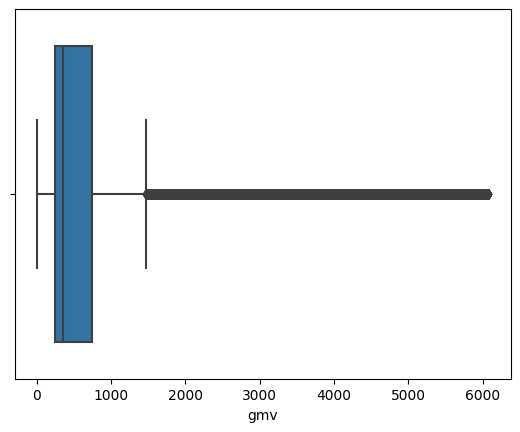

In [456]:
sns.boxplot(x=subset_data)
plt.show()

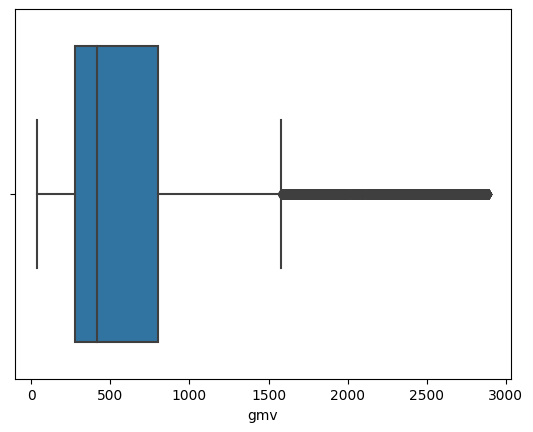

In [457]:
subset_data = consumer_df.loc[(consumer_df.product_analytic_sub_category=='GamingAccessory') & (consumer_df.gmv<2890)]['gmv']
sns.boxplot(x=subset_data)
plt.show()

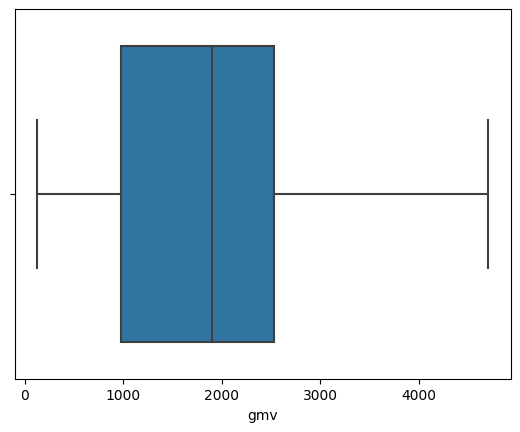

In [458]:
subset_data = consumer_df.loc[(consumer_df.product_analytic_sub_category=='HomeAudio') & (consumer_df.gmv<4705)]['gmv']
sns.boxplot(x=subset_data)
plt.show()

In [459]:
camera_data = consumer_df.loc[(consumer_df.product_analytic_sub_category=='CameraAccessory') & (consumer_df.gmv<6079)]
game_data = consumer_df.loc[(consumer_df.product_analytic_sub_category=='GamingAccessory') & (consumer_df.gmv<2890)]
home_data = consumer_df.loc[(consumer_df.product_analytic_sub_category=='HomeAudio') & (consumer_df.gmv<4705)]

In [460]:
## checking the shape of the 3 categories
print(camera_data.shape)
print(game_data.shape)
print(home_data.shape)

(199607, 17)
(172313, 17)
(100756, 17)


In [461]:
## we can join all the data frames to single
consumer_df = pd.concat([camera_data, game_data, home_data], axis = 0)

In [462]:
consumer_df.shape

(472676, 17)

In [463]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472676 entries, 2 to 1542377
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_date                     472676 non-null  object        
 1   Year                           472676 non-null  int64         
 2   Month                          472676 non-null  int64         
 3   order_id                       472676 non-null  object        
 4   gmv                            472676 non-null  float64       
 5   units                          472676 non-null  int64         
 6   deliverybdays                  472676 non-null  float64       
 7   deliverycdays                  472676 non-null  float64       
 8   s1_fact.order_payment_type     472676 non-null  object        
 9   sla                            472676 non-null  int64         
 10  cust_id                        472676 non-null  object        
 11 

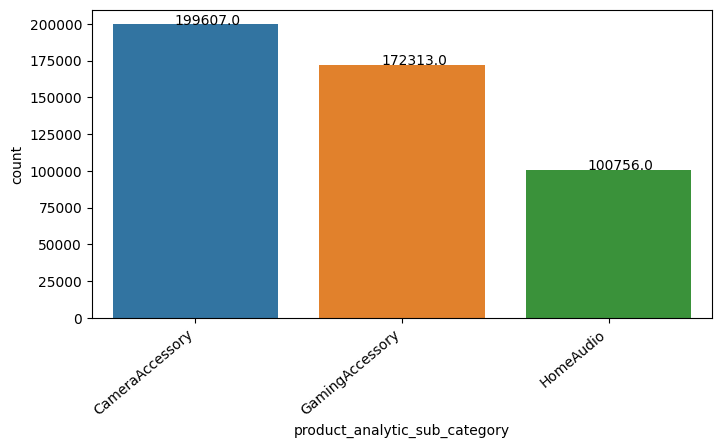

In [464]:
## Exploratory Data Analysis
## No of transactions by Sub-Category

plt.figure(figsize=(8, 4))
sns.set_context(font_scale=1.4)

ax = sns.countplot(data=consumer_df, x='product_analytic_sub_category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

plt.show()

Maximum number of transactions is of camera accessory compared to gaming accessory and home studio categories.

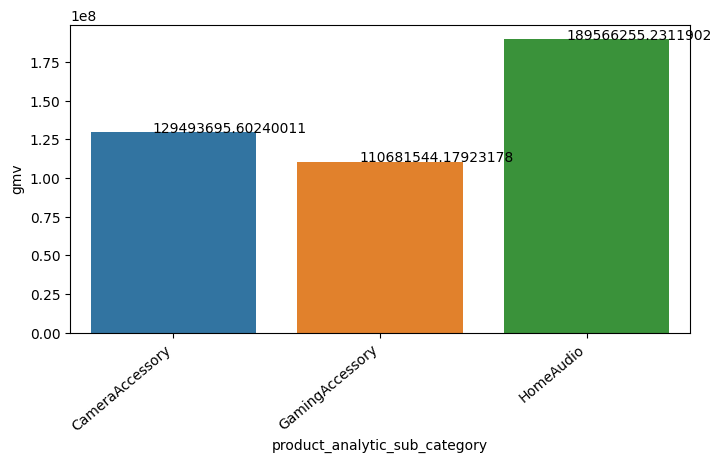

In [465]:
## Now we can revenue for each of the categories
total_revenue= consumer_df.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()
plt.figure(figsize = (8,4))
ax = sns.barplot(x='product_analytic_sub_category', y='gmv', data=total_revenue)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set_context(font_scale = 1.4)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))


The transactions generate the highest revenue from Home Audio, followed by Camera Accessory, and lastly, Gaming Accessory.

<ipython-input-466-0742fb6a8993>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

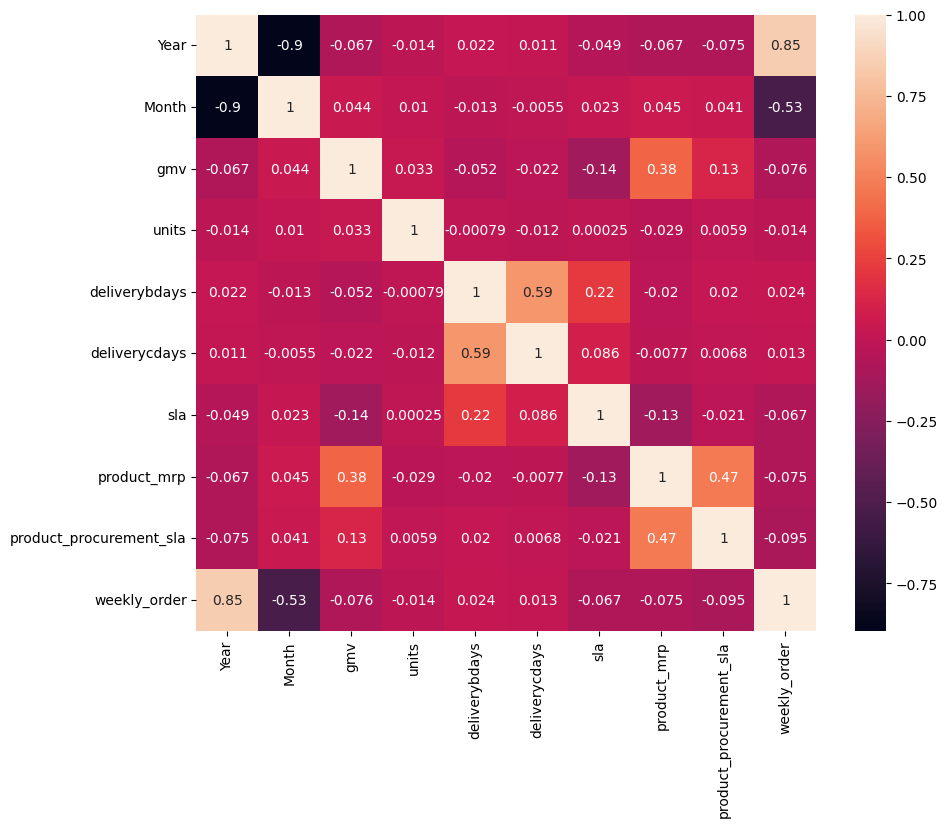

In [466]:
## now using heat map we can find the correlation betweeen the variables
plt.figure(figsize = (10,8))
sns.heatmap(consumer_df.corr(), annot=True)

As observed earlier, a strong correlation exists between:

Month and Year
Month and Order Week
Additionally, there is a moderate correlation between:

Product MRP and Gross Merchandise Value (GMV)

<Axes: xlabel='product_analytic_sub_category', ylabel='gmv'>

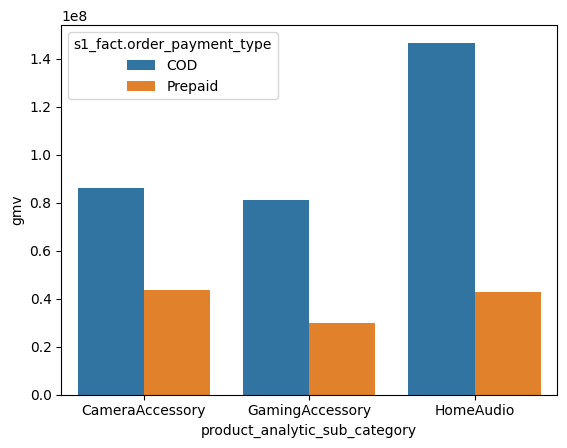

In [467]:
## We will check each category for payment type vs total revenues
revenue_by_payment_type = consumer_df.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].sum().reset_index()
sns.barplot(x='product_analytic_sub_category', y='gmv', hue="s1_fact.order_payment_type", data=revenue_by_payment_type)

For Cash on Delivery (COD) orders, the highest revenue comes from Home Audio, followed by Camera Accessory, and finally Gaming Accessory. On the other hand, for prepaid orders, the maximum revenue is generated by Camera Accessory, followed by Home Audio, and lastly Gaming Accessory.

<Axes: xlabel='product_analytic_sub_category', ylabel='transaction_count'>

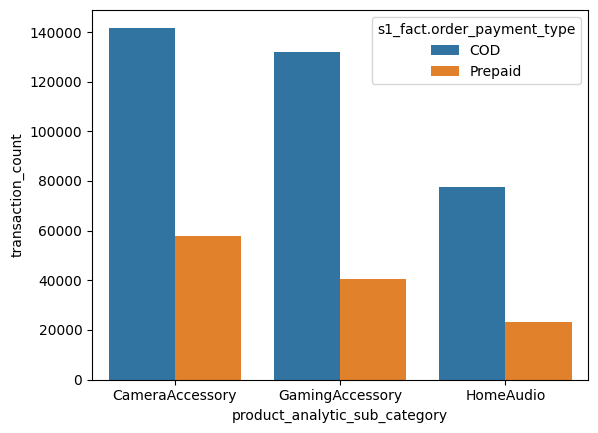

In [468]:
## Now we can plot for total transaction count vs category for each payments being used
norders_by_Payment_type = consumer_df.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].count().reset_index().rename(columns={'gmv':'transaction_count'})
sns.barplot(x='product_analytic_sub_category', y='transaction_count', hue="s1_fact.order_payment_type", data=norders_by_Payment_type)

The highest number of orders is for Camera Accessory, followed by Gaming Accessory, and finally, Home Audio, for both types of transactions.

In [469]:
## Feature Engineering and Creating KPI's


In [470]:
## creating Payment mode indicator to identify either COD or other payments
consumer_df['payment_mode_indicator'] =  consumer_df['s1_fact.order_payment_type'].apply(lambda x:0 if x=='COD' else 1)
## Creating the Selling price of each product in every transaction
consumer_df['selling_price'] = consumer_df['gmv']/consumer_df['units']
## Discount offered on every products
consumer_df['discount'] = np.round((consumer_df['product_mrp']-consumer_df['selling_price'])/consumer_df['product_mrp'],2)

In [471]:
## Creating data for each sub-category
gamingData = consumer_df[(consumer_df['product_analytic_sub_category']=='GamingAccessory')].drop('product_analytic_sub_category', axis = 1)
cameraData = consumer_df[(consumer_df['product_analytic_sub_category']=='CameraAccessory')].drop('product_analytic_sub_category', axis = 1)
homeData = consumer_df[(consumer_df['product_analytic_sub_category']=='HomeAudio')].drop('product_analytic_sub_category', axis = 1)

In [472]:
#check the shape
gamingData.shape

(172313, 19)

In [473]:
cameraData.shape

(199607, 19)

In [474]:
homeData.shape

(100756, 19)

In [475]:
def create_dataframe_from_dict(list_of_values, desired_column_name):
    df = pd.DataFrame(list_of_values)
    df[desired_column_name] = pd.to_datetime(df[desired_column_name]).dt.date
    df["total_" + desired_column_name + "s"] = 1
    df['weekly_order'] = pd.to_datetime(df[desired_column_name]).dt.week
    df['year'] = pd.to_datetime(df[desired_column_name]).dt.year
    df['weekly_order'] = df.apply(lambda x: seqWeek(x['weekly_order'], x['year']), axis=1)
    df = df.groupby('weekly_order').sum()
    df["is_" + desired_column_name] = 1
    df.drop('year', axis=1, inplace=True)
    return df

In [476]:
# Capture Sale days
special_sale_days = {'special_sale_day':["2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-10-11","2015-10-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27"]}
special_sale_day_df = create_dataframe_from_dict(special_sale_days,'special_sale_day')

<ipython-input-475-5503e96dc3bc>:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-475-5503e96dc3bc>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [477]:
special_sale_day_df

total_special_sale_days  is_special_sale_day
weekly_order                                              
29                                  2                    1
33                                  2                    1
34                                  1                    1
35                                  3                    1
41                                  1                    1
42                                  4                    1
45                                  2                    1
46                                  4                    1
52                                  3                    1
53                                  6                    1
56                                  3                    1
58                                  2                    1
59                                  1                    1
60                                  3                    1
63                                  3                    1
74                                  3                    1

In [478]:
#Creating order_day column
pay_days = {'pay_day':["2015-07-01","2015-07-15","2015-08-01","2015-08-15",
                "2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01",
                "2015-11-15","2015-12-01","2015-12-15","2016-01-01","2016-01-15",
                "2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01",
                "2016-04-15","2016-05-01","2016-05-15","2016-06-01","2016-06-15"]}
pay_days_df = create_dataframe_from_dict(pay_days,'pay_day')
final_df = pd.concat([special_sale_day_df, pay_days_df],axis = 1)
final_df_New = final_df.fillna(0).astype('int')
final_df_New.head()

<ipython-input-475-5503e96dc3bc>:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-475-5503e96dc3bc>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



total_special_sale_days  is_special_sale_day  total_pay_days  \
weekly_order                                                                 
29                                  2                    1               1   
33                                  2                    1               1   
34                                  1                    1               0   
35                                  3                    1               0   
41                                  1                    1               0   

              is_pay_day  
weekly_order              
29                     1  
33                     1  
34                     0  
35                     0  
41                     0

In [479]:
gamingData.head()

order_date  Year  Month          order_id     gmv  units  deliverybdays  \
1599  2015-10-14  2015     10  1416985339691600  2750.0      1       4.577875   
1601  2015-10-17  2015     10  1419414998353400  2609.0      1       4.577875   
1602  2015-10-26  2015     10  1427167582532600  2772.0      1       4.577875   
1603  2015-10-16  2015     10  4417730112316700  2750.0      1       4.577875   
1607  2015-10-04  2015     10  4408070947414700  2750.0      1       4.577875   

      deliverycdays s1_fact.order_payment_type  sla               cust_id  \
1599       5.250612                        COD    7   9041577304631719936   
1601       5.250612                    Prepaid    5  -4824142736471789568   
1602       5.250612                    Prepaid    5  -3305365297260279808   
1603       5.250612                    Prepaid    7   2297791966161220096   
1607       5.250612                        COD    7   4371929922837940224   

     product_analytic_vertical  product_mrp  product_procurement_sla  \
1599                   GamePad         3999                        5   
1601                   GamePad         3999                        5   
1602                   GamePad         3999                        5   
1603                   GamePad         3999                        5   
1607                   GamePad         3999                        5   

         order_date_time  weekly_order  payment_mode_indicator  selling_price  \
1599 2015-10-14 22:54:54            42                       0         2750.0   
1601 2015-10-17 18:21:43            42                       1         2609.0   
1602 2015-10-26 17:49:39            44                       1         2772.0   
1603 2015-10-16 04:02:08            42                       1         2750.0   
1607 2015-10-04 15:19:00            40                       0         2750.0   

      discount  
1599      0.31  
1601      0.35  
1602      0.31  
1603      0.31  
1607      0.31

In [480]:
# Creating KPIs for the product analytical vertical
prd_vertical_Cam = cameraData.groupby(['weekly_order', 'product_analytic_vertical'])['units'].sum().reset_index()
CAM_prdvr_KPI = prd_vertical_Cam.pivot_table(index='weekly_order', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna(0).reset_index()
CAM_prdvr_KPI = CAM_prdvr_KPI.apply(pd.to_numeric, errors='coerce')
cameraData.drop(['product_analytic_vertical'], axis=1, inplace=True)

In [481]:
# Counting products sold in each vertical
prd_vrt_units_sold = prd_vertical_Cam.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by='units', ascending=False)
prd_vrt_units_sold.head()


product_analytic_vertical  units
15                     Flash  48011
3              CameraBattery  35974
12              CameraTripod  31268
17                      Lens  22801
2                  CameraBag  15279

In [482]:
import plotly.express as px

# Assuming prd_vrt_units_sold is your DataFrame with product units sold data
fig = px.treemap(prd_vrt_units_sold,
                 path=['product_analytic_vertical'],
                 values='units',
                 title='Products Sold in Each Vertical')

fig.show()


The best-selling product is Flash, followed by Camera Battery and Camera Tripod and then other products.

In [483]:
## For Gaming
# Creating KPIs for the product analytical vertical
prd_vertical_Game = gamingData.groupby(['weekly_order', 'product_analytic_vertical'])['units'].sum().reset_index()
Game_prdvr_KPI = prd_vertical_Game.pivot_table(index='weekly_order', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna(0).reset_index()
Game_prdvr_KPI = Game_prdvr_KPI.apply(pd.to_numeric, errors='coerce')
gamingData.drop(['product_analytic_vertical'], axis=1, inplace=True)

In [484]:
# Counting products sold in each vertical
prd_vrt_units_sold = prd_vertical_Game.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by='units', ascending=False)
prd_vrt_units_sold.head()


product_analytic_vertical  units
6              GamingHeadset  59210
2                    GamePad  48028
9                GamingMouse  34760
3         GamingAccessoryKit   8149
14       TVOutCableAccessory   6658

In [485]:
# Assuming prd_vrt_units_sold is your DataFrame with product units sold data
fig = px.treemap(prd_vrt_units_sold,
                 path=['product_analytic_vertical'],
                 values='units',
                 title='Products Sold in Each Vertical')

fig.show()

The top-selling item is the Gaming Headset, followed by the Game Pad and Gaming Mouse.

In [486]:
## For Gaming
# Creating KPIs for the product analytical vertical
prd_vertical_Home = homeData.groupby(['weekly_order', 'product_analytic_vertical'])['units'].sum().reset_index()
Home_prdvr_KPI = prd_vertical_Home.pivot_table(index='weekly_order', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna(0).reset_index()
Home_prdvr_KPI = Home_prdvr_KPI.apply(pd.to_numeric, errors='coerce')
homeData.drop(['product_analytic_vertical'], axis=1, inplace=True)

In [487]:
Home_prdvr_KPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weekly_order      50 non-null     int64  
 1   BoomBox           50 non-null     float64
 2   DJController      50 non-null     float64
 3   Dock              50 non-null     float64
 4   DockingStation    50 non-null     float64
 5   FMRadio           50 non-null     float64
 6   HiFiSystem        50 non-null     float64
 7   HomeAudioSpeaker  50 non-null     float64
 8   SlingBox          50 non-null     float64
 9   SoundMixer        50 non-null     float64
 10  VoiceRecorder     50 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 4.4 KB


In [488]:
# Counting products sold in each vertical
prd_vrt_units_sold = prd_vertical_Home.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by='units', ascending=False)
prd_vrt_units_sold.head()


product_analytic_vertical  units
6          HomeAudioSpeaker  72465
4                   FMRadio  21132
9             VoiceRecorder   2650
0                   BoomBox   1944
2                      Dock   1883

In [489]:
# Assuming prd_vrt_units_sold is your DataFrame with product units sold data
fig = px.treemap(prd_vrt_units_sold,
                 path=['product_analytic_vertical'],
                 values='units',
                 title='Products Sold in Each Vertical')

fig.show()

The best-selling item is the Home Audio Speaker, followed by FM Radio and Voice Recorder.

In [490]:
#Reading media data from the excel file
nps_df = pd.read_excel("/content/drive/MyDrive/DataScience/EcomProject/Media data and other information.xlsx", sheet_name = 'Monthly NPS Score', header = 1).T.reset_index()

# resetting index#
nps_df.reset_index(drop=True, inplace=True)

# renaming columns
nps_df.columns = ['NPS', 'Stock Index']

nps_df['NPS'] = pd.to_numeric(nps_df['NPS'], errors='coerce').astype(float)
nps_df['Stock Index'] = pd.to_numeric(nps_df['Stock Index'], errors='coerce').astype(float)

In [491]:
### Adding Month and Year
nps_df['Month'] = pd.Series([7,8,9,10,11,12,1,2,3,4,5,6])
nps_df['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016])

In [492]:
nps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NPS          12 non-null     float64
 1   Stock Index  12 non-null     float64
 2   Month        12 non-null     float64
 3   Year         12 non-null     float64
dtypes: float64(4)
memory usage: 544.0 bytes


In [493]:
nps_df = nps_df.drop(0, axis=0).reset_index(drop=True)

In [494]:
nps_df.head()

NPS  Stock Index  Month    Year
0  54.599588       1177.0    8.0  2015.0
1  59.987101       1206.0    9.0  2015.0
2  46.925419       1101.0   10.0  2015.0
3  44.398389       1210.0   11.0  2015.0
4  47.000000       1233.0   12.0  2015.0

In [495]:
gamingDataKPI = pd.merge(nps_df,gamingData,on=['Month','Year'],how='inner')
cameraDataKPI = pd.merge(nps_df,cameraData,on=['Month','Year'],how='inner')
homeDataKPI = pd.merge(nps_df,homeData,on=['Month','Year'],how='inner')

In [496]:
# Creating dataframes for plots for each of the category
GamingAccessory_data_with_KPIs_for_plot = gamingDataKPI
GamingAccessory_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Gaming Accessory"
CameraAccessory_data_with_KPIs_for_plot = cameraDataKPI
CameraAccessory_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Camera Accessory"
HomeAudio_data_with_KPIs_for_plot = homeDataKPI
HomeAudio_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Home Audio"

all_data_with_kpi = pd.concat([GamingAccessory_data_with_KPIs_for_plot, CameraAccessory_data_with_KPIs_for_plot, HomeAudio_data_with_KPIs_for_plot], axis = 0)

In [497]:
all_data_with_kpi.head()

NPS  Stock Index  Month    Year  order_date   order_id    gmv  units  \
0  54.599588       1177.0    8.0  2015.0  2015-08-22  178392344  239.0      1   
1  54.599588       1177.0    8.0  2015.0  2015-08-10  175990519  289.0      1   
2  54.599588       1177.0    8.0  2015.0  2015-08-04  176654057  854.0      1   
3  54.599588       1177.0    8.0  2015.0  2015-08-12  176954556  940.0      1   
4  54.599588       1177.0    8.0  2015.0  2015-08-01  173802380  999.0      1   

   deliverybdays  deliverycdays  ... sla               cust_id product_mrp  \
0       4.577875       5.250612  ...   1  -8335492386881850368         499   
1       4.577875       5.250612  ...   4   3616230308851049984         349   
2       4.577875       5.250612  ...   8  -6842267663356080128        4999   
3       5.000000       6.000000  ...   7   4969367583557820416        4999   
4       4.577875       5.250612  ...   9  -8987969303462689792        1700   

   product_procurement_sla     order_date_time weekly_order  \
0                        2 2015-08-22 00:49:39           34   
1                        0 2015-08-10 16:35:58           33   
2                        1 2015-08-04 12:28:31           32   
3                        1 2015-08-12 19:30:22           33   
4                        3 2015-08-01 16:08:15           31   

   payment_mode_indicator  selling_price  discount  \
0                       0          239.0      0.52   
1                       0          289.0      0.17   
2                       0          854.0      0.83   
3                       1          940.0      0.81   
4                       1          999.0      0.41   

   product_analytic_sub_category  
0               Gaming Accessory  
1               Gaming Accessory  
2               Gaming Accessory  
3               Gaming Accessory  
4               Gaming Accessory  

[5 rows x 21 columns]

In [498]:
all_data_with_kpi.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 446227 entries, 0 to 93264
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   NPS                            446227 non-null  float64       
 1   Stock Index                    446227 non-null  float64       
 2   Month                          446227 non-null  float64       
 3   Year                           446227 non-null  float64       
 4   order_date                     446227 non-null  object        
 5   order_id                       446227 non-null  object        
 6   gmv                            446227 non-null  float64       
 7   units                          446227 non-null  int64         
 8   deliverybdays                  446227 non-null  float64       
 9   deliverycdays                  446227 non-null  float64       
 10  s1_fact.order_payment_type     446227 non-null  object        
 11  s

In [499]:
# Weekly aggregation  of Data For Gaming Accessory
# Summarizing gaming accessory data
gaming_data_sum = gamingDataKPI[['gmv', 'units', 'weekly_order']].groupby('weekly_order').sum()
gaming_data_mean = gamingDataKPI[['sla', 'product_procurement_sla', 'weekly_order',
                                          'product_mrp', 'selling_price','NPS', 'discount']].groupby('weekly_order').mean()
gaming_data_count = gamingDataKPI[['order_id', 'weekly_order']].groupby('weekly_order').count().rename(columns={'order_id': 'total_transactions'})

# Concatenating the summarized data
final_gaming_data = pd.concat([gaming_data_sum, gaming_data_mean, gaming_data_count], axis=1).reset_index()


In [500]:
gaming_data_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 31 to 79
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sla                      49 non-null     float64
 1   product_procurement_sla  49 non-null     float64
 2   product_mrp              49 non-null     float64
 3   selling_price            49 non-null     float64
 4   NPS                      49 non-null     float64
 5   discount                 49 non-null     float64
dtypes: float64(6)
memory usage: 2.7 KB


In [501]:
#Merging with the weekly aggregate collumns
final_gaming_data = pd.merge(final_gaming_data, final_df_New.reset_index(), on = 'weekly_order', how = 'left').fillna(0)
final_gaming_data.head()

weekly_order     gmv  units   sla  product_procurement_sla  product_mrp  \
0            31   999.0      1  9.00                     3.00      1700.00   
1            32  2295.0      4  7.25                     2.25      1918.50   
2            33  4875.0      4  6.00                     2.50      2583.25   
3            34   598.0      2  2.00                     2.50       599.00   
4            35  2303.0      4  6.00                     3.25      1035.75   

   selling_price        NPS  discount  total_transactions  \
0         999.00  54.599588     0.410                   1   
1         573.75  54.599588     0.630                   4   
2        1218.75  54.599588     0.385                   4   
3         299.00  54.599588     0.505                   2   
4         575.75  54.599588     0.450                   4   

   total_special_sale_days  is_special_sale_day  total_pay_days  is_pay_day  
0                      0.0                  0.0             1.0         1.0  
1                      0.0                  0.0             0.0         0.0  
2                      2.0                  1.0             1.0         1.0  
3                      1.0                  1.0             0.0         0.0  
4                      3.0                  1.0             0.0         0.0

In [502]:
final_gaming_data.shape

(49, 14)

In [503]:
#Merging with Product Analytical Vertical KPI
final_gaming_data = pd.merge(final_gaming_data,Game_prdvr_KPI,on=['weekly_order'],how='left')
final_gaming_data.shape

(49, 29)

In [504]:
final_gaming_data.columns

Index(['weekly_order', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'NPS', 'discount', 'total_transactions',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CoolingPad', 'GameControlMount', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingChargingStation',
       'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse',
       'GamingMousePad', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [505]:
# Summarizing camera accessory data
camera_data_sum = cameraDataKPI[['gmv', 'units', 'weekly_order']].groupby('weekly_order').sum()
camera_data_mean = cameraDataKPI[['sla', 'product_procurement_sla', 'weekly_order',
                                          'product_mrp', 'selling_price', 'NPS', 'discount']].groupby('weekly_order').mean()
camera_data_count = cameraDataKPI[['order_id', 'weekly_order']].groupby('weekly_order').count().rename(columns={'order_id': 'total_transactions'})

# Concatenating the summarized data
final_camera_data = pd.concat([camera_data_sum, camera_data_mean, camera_data_count], axis=1).reset_index()


In [506]:
#Merging with the weekly aggregate collumns
final_camera_data = pd.merge(final_camera_data, final_df_New.reset_index(), on = 'weekly_order', how = 'left').fillna(0)
final_camera_data.head()

weekly_order        gmv  units        sla  product_procurement_sla  \
0            31      398.0      2   6.000000                 5.000000   
1            32      699.0      1   5.000000                 4.000000   
2            33      299.0      1   6.000000                 1.000000   
3            35     1190.0      3  10.333333                 2.000000   
4            36  2003721.0   2834   6.664945                 2.840221   

   product_mrp  selling_price        NPS  discount  total_transactions  \
0   300.000000     199.000000  54.599588  0.340000                   2   
1  1450.000000     699.000000  54.599588  0.520000                   1   
2  1990.000000     299.000000  54.599588  0.850000                   1   
3   628.000000     396.666667  54.599588  0.410000                   3   
4  1528.108118     722.454982  59.969209  0.461524                2710   

   total_special_sale_days  is_special_sale_day  total_pay_days  is_pay_day  
0                      0.0                  0.0             1.0         1.0  
1                      0.0                  0.0             0.0         0.0  
2                      2.0                  1.0             1.0         1.0  
3                      3.0                  1.0             0.0         0.0  
4                      0.0                  0.0             1.0         1.0

In [507]:
#Merging with Product Analytical Vertical KPI
final_camera_data = pd.merge(final_camera_data,CAM_prdvr_KPI,on=['weekly_order'],how='left')
final_camera_data.shape

(48, 36)

In [508]:
final_camera_data.columns

Index(['weekly_order', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'NPS', 'discount', 'total_transactions',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [509]:
# Summarizing home accessory data
home_data_sum = homeDataKPI[['gmv', 'units', 'weekly_order']].groupby('weekly_order').sum()
home_data_mean = homeDataKPI[['sla', 'product_procurement_sla', 'weekly_order',
                                          'product_mrp', 'selling_price', "NPS", 'discount']].groupby('weekly_order').mean()
home_data_count = homeDataKPI[['order_id', 'weekly_order']].groupby('weekly_order').count().rename(columns={'order_id': 'total_transactions'})

# Concatenating the summarized data
final_home_data = pd.concat([home_data_sum, home_data_mean, home_data_count], axis=1).reset_index()

In [510]:
camera_data_mean.head()

sla  product_procurement_sla  product_mrp  selling_price  \
weekly_order                                                                   
31             6.000000                 5.000000   300.000000     199.000000   
32             5.000000                 4.000000  1450.000000     699.000000   
33             6.000000                 1.000000  1990.000000     299.000000   
35            10.333333                 2.000000   628.000000     396.666667   
36             6.664945                 2.840221  1528.108118     722.454982   

                    NPS  discount  
weekly_order                       
31            54.599588  0.340000  
32            54.599588  0.520000  
33            54.599588  0.850000  
35            54.599588  0.410000  
36            59.969209  0.461524

In [511]:
#Merging with the weekly aggregate collumns
final_home_data = pd.merge(final_home_data, final_df_New.reset_index(), on = 'weekly_order', how = 'left').fillna(0)
final_home_data.head()

weekly_order        gmv  units       sla  product_procurement_sla  \
0            32     2599.0      1  9.000000                 2.000000   
1            36  2899710.0   1648  5.611213                 2.747715   
2            37  3208845.0   1861  5.537588                 2.837750   
3            38  2888072.0   1705  6.229216                 2.642518   
4            39  3243337.0   2063  6.351852                 2.612086   

   product_mrp  selling_price        NPS  discount  total_transactions  \
0  3099.000000    2599.000000  54.599588  0.160000                   1   
1  3387.081048    1762.280317  59.964120  0.391554                1641   
2  3335.351001    1731.081666  59.987101  0.392017                1849   
3  3054.899644    1707.257126  59.987101  0.377654                1684   
4  2829.000487    1575.703704  59.987101  0.361442                2052   

   total_special_sale_days  is_special_sale_day  total_pay_days  is_pay_day  
0                      0.0                  0.0             0.0         0.0  
1                      0.0                  0.0             1.0         1.0  
2                      0.0                  0.0             0.0         0.0  
3                      0.0                  0.0             1.0         1.0  
4                      0.0                  0.0             0.0         0.0

In [512]:
#Merging with Product Analytical Vertical KPI
final_home_data = pd.merge(final_home_data,Home_prdvr_KPI,on=['weekly_order'],how='left')
final_home_data.shape

(45, 24)

In [513]:
print("Shape of Gaming Accessory DF",final_gaming_data.shape)
print("Shape of Camera Accessory DF",final_camera_data.shape)
print("Shape of Home Audio DF",final_home_data.shape)

Shape of Gaming Accessory DF (49, 29)
Shape of Camera Accessory DF (48, 36)
Shape of Home Audio DF (45, 24)


In [514]:
# Reading the media data from the provided file
media_investment = pd.read_excel("/content/drive/MyDrive/DataScience/EcomProject/Media data and other information.xlsx", sheet_name = 'Media Investment', header = 2)
media_investment

Unnamed: 0    Year  Month  Total Investment         TV    Digital  \
0          NaN  2015.0    7.0         17.061775   0.215330   2.533014   
1          NaN  2015.0    8.0          5.064306   0.006438   1.278074   
2          NaN  2015.0    9.0         96.254380   3.879504   1.356528   
3          NaN  2015.0   10.0        170.156297   6.144711  12.622480   
4          NaN  2015.0   11.0         51.216220   4.220630   1.275469   
5          NaN  2015.0   12.0        106.745312   5.397502   3.063360   
6          NaN  2016.0    1.0         74.196000   4.380000   0.456000   
7          NaN  2016.0    2.0         48.052000   2.586008   1.912651   
8          NaN  2016.0    3.0        100.024621   9.300000   2.100000   
9          NaN  2016.0    4.0         56.848241   5.205196   0.871892   
10         NaN  2016.0    5.0         78.057000   1.370000   0.770000   
11         NaN  2016.0    6.0         42.834216   1.662717   1.420761   
12         NaN     NaN    NaN               NaN        NaN        NaN   
13         NaN     NaN    NaN               NaN        NaN        NaN   
14         NaN     NaN    NaN               NaN        NaN        NaN   
15         NaN     NaN    NaN               NaN  18.549000        NaN   

    Sponsorship  Content Marketing  Online marketing   Affiliates        SEM  \
0      7.414270           0.000933          1.327278     0.547254   5.023697   
1      1.063332           0.000006          0.129244     0.073684   2.513528   
2     62.787651           0.610292         16.379990     5.038266   6.202149   
3     84.672532           3.444075         24.371778     6.973711  31.927011   
4     14.172116           0.168633         19.561574     6.595767   5.222032   
5     56.705419           1.067307         22.503756     6.826938  11.181030   
6      4.200000           0.900000         22.900000     7.370000   4.200000   
7     11.725555           0.596771         19.892366     6.465019   4.873630   
8     41.590000           0.370000         18.437818     6.217667   5.193591   
9     24.308354           0.034876         16.514510     5.693456   4.219958   
10    31.680000           0.790000         23.650000     6.800000   6.910000   
11    25.048541           0.045081          7.971300     2.768023   3.735516   
12          NaN                NaN               NaN          NaN        NaN   
13          NaN                NaN               NaN          NaN        NaN   
14          NaN                NaN               NaN          NaN        NaN   
15          NaN                NaN               NaN          NaN        NaN   

    Radio      Other  
0     NaN        NaN  
1     NaN        NaN  
2     NaN        NaN  
3     NaN        NaN  
4     NaN        NaN  
5     NaN        NaN  
6    2.70  27.090000  
7     NaN        NaN  
8    0.87  15.945545  
9     NaN        NaN  
10   1.10   4.987000  
11    NaN        NaN  
12    NaN        NaN  
13    NaN        NaN  
14    NaN        NaN  
15    NaN        NaN

In [515]:
#Formatting the dataframe in the required format i.e. removing the extra rows & columns
media_investment = media_investment.iloc[:-4].reset_index()
media_investment.drop('Unnamed: 0', inplace = True, axis = 1)
media_investment.drop('index', inplace = True, axis = 1)

In [516]:
#Filling NaN values as 0 assuming that the investment done in respective area was 0
media_investment  = media_investment.fillna(0)

In [517]:
media_investment

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015.0    7.0         17.061775  0.215330   2.533014     7.414270   
1   2015.0    8.0          5.064306  0.006438   1.278074     1.063332   
2   2015.0    9.0         96.254380  3.879504   1.356528    62.787651   
3   2015.0   10.0        170.156297  6.144711  12.622480    84.672532   
4   2015.0   11.0         51.216220  4.220630   1.275469    14.172116   
5   2015.0   12.0        106.745312  5.397502   3.063360    56.705419   
6   2016.0    1.0         74.196000  4.380000   0.456000     4.200000   
7   2016.0    2.0         48.052000  2.586008   1.912651    11.725555   
8   2016.0    3.0        100.024621  9.300000   2.100000    41.590000   
9   2016.0    4.0         56.848241  5.205196   0.871892    24.308354   
10  2016.0    5.0         78.057000  1.370000   0.770000    31.680000   
11  2016.0    6.0         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697   0.00   
1            0.000006          0.129244     0.073684   2.513528   0.00   
2            0.610292         16.379990     5.038266   6.202149   0.00   
3            3.444075         24.371778     6.973711  31.927011   0.00   
4            0.168633         19.561574     6.595767   5.222032   0.00   
5            1.067307         22.503756     6.826938  11.181030   0.00   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630   0.00   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958   0.00   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516   0.00   

        Other  
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6   27.090000  
7    0.000000  
8   15.945545  
9    0.000000  
10   4.987000  
11   0.000000

In [518]:
#Creating a mapping of the Months & no of weeks in order to find the media data weekly for each of the months
number_of_weeks = {'Month':[1,2,3,4,5,6,7,8,9,10,11,12], 'number_of_weeks':[4,4,5,4,4,5,4,4,5,4,4,5]}
number_of_weeks_df = pd.DataFrame(number_of_weeks)
number_of_weeks_df

Month  number_of_weeks
0       1                4
1       2                4
2       3                5
3       4                4
4       5                4
5       6                5
6       7                4
7       8                4
8       9                5
9      10                4
10     11                4
11     12                5

In [519]:
#Merging the media_investment data with DF containing the mapping of months & no of weeks in that month
media_investment = pd.merge(media_investment,number_of_weeks_df, on = 'Month', how = 'inner')
media_investment

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015.0    7.0         17.061775  0.215330   2.533014     7.414270   
1   2015.0    8.0          5.064306  0.006438   1.278074     1.063332   
2   2015.0    9.0         96.254380  3.879504   1.356528    62.787651   
3   2015.0   10.0        170.156297  6.144711  12.622480    84.672532   
4   2015.0   11.0         51.216220  4.220630   1.275469    14.172116   
5   2015.0   12.0        106.745312  5.397502   3.063360    56.705419   
6   2016.0    1.0         74.196000  4.380000   0.456000     4.200000   
7   2016.0    2.0         48.052000  2.586008   1.912651    11.725555   
8   2016.0    3.0        100.024621  9.300000   2.100000    41.590000   
9   2016.0    4.0         56.848241  5.205196   0.871892    24.308354   
10  2016.0    5.0         78.057000  1.370000   0.770000    31.680000   
11  2016.0    6.0         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697   0.00   
1            0.000006          0.129244     0.073684   2.513528   0.00   
2            0.610292         16.379990     5.038266   6.202149   0.00   
3            3.444075         24.371778     6.973711  31.927011   0.00   
4            0.168633         19.561574     6.595767   5.222032   0.00   
5            1.067307         22.503756     6.826938  11.181030   0.00   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630   0.00   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958   0.00   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516   0.00   

        Other  number_of_weeks  
0    0.000000                4  
1    0.000000                4  
2    0.000000                5  
3    0.000000                4  
4    0.000000                4  
5    0.000000                5  
6   27.090000                4  
7    0.000000                4  
8   15.945545                5  
9    0.000000                4  
10   4.987000                4  
11   0.000000                5

In [520]:
# Calculating the final media_investments weekly by dividing the value in a month with the respecitve number_of_weeks in the month
media_investment['TV']  = media_investment['TV']/media_investment['number_of_weeks']
media_investment['Digital']  = media_investment['Digital']/media_investment['number_of_weeks']
media_investment['Sponsorship']  = media_investment['Sponsorship']/media_investment['number_of_weeks']
media_investment['Content Marketing']  = media_investment['Content Marketing']/media_investment['number_of_weeks']
media_investment['Online marketing']  = media_investment['Online marketing']/media_investment['number_of_weeks']
media_investment[' Affiliates']  = media_investment[' Affiliates']/media_investment['number_of_weeks']
media_investment['SEM']  = media_investment['SEM']/media_investment['number_of_weeks']
media_investment['Radio']  = media_investment['Radio']/media_investment['number_of_weeks']
media_investment['Other']  = media_investment['Other']/media_investment['number_of_weeks']

In [521]:
## check the media investment data
media_investment.head()

Year  Month  Total Investment        TV   Digital  Sponsorship  \
0  2015.0    7.0         17.061775  0.053833  0.633253     1.853567   
1  2015.0    8.0          5.064306  0.001610  0.319518     0.265833   
2  2015.0    9.0         96.254380  0.775901  0.271306    12.557530   
3  2015.0   10.0        170.156297  1.536178  3.155620    21.168133   
4  2015.0   11.0         51.216220  1.055157  0.318867     3.543029   

   Content Marketing  Online marketing   Affiliates       SEM  Radio  Other  \
0           0.000233          0.331819     0.136813  1.255924    0.0    0.0   
1           0.000002          0.032311     0.018421  0.628382    0.0    0.0   
2           0.122058          3.275998     1.007653  1.240430    0.0    0.0   
3           0.861019          6.092944     1.743428  7.981753    0.0    0.0   
4           0.042158          4.890394     1.648942  1.305508    0.0    0.0   

   number_of_weeks  
0                4  
1                4  
2                5  
3                4  
4                4

In [522]:
# Getting unique order_week, month & year present in the original dataframe
week_order_data = consumer_df[['weekly_order',"Month","Year"]].drop_duplicates(keep = 'first', subset = None).reset_index().drop('index', axis = 1).sort_values(by = 'weekly_order')
week_order_data = week_order_data.sort_values(by = ['weekly_order','Month']).drop_duplicates(keep = 'last', subset = 'weekly_order')
week_order_data

weekly_order  Month  Year
53            27      7  2015
51            28      7  2015
49            29      7  2015
52            30      7  2015
55            31      8  2015
60            32      8  2015
61            33      8  2015
62            34      8  2015
15            35      8  2015
58            36      9  2015
54            37      9  2015
57            38      9  2015
56            39      9  2015
4             40     10  2015
2             41     10  2015
1             42     10  2015
0             43     10  2015
22            44     11  2015
5             45     11  2015
19            46     11  2015
10            47     11  2015
21            48     11  2015
23            49     12  2015
24            50     12  2015
26            51     12  2015
27            52     12  2015
28            53     12  2015
31            54      1  2016
12            55      1  2016
16            56      1  2016
33            57      1  2016
25            58      2  2016
34            59      2  2016
17            60      2  2016
8             61      2  2016
32            62      3  2016
7             63      3  2016
13            64      3  2016
37            65      3  2016
14            66      4  2016
11            67      4  2016
35            68      4  2016
6             69      4  2016
40            70      5  2016
38            71      5  2016
39            72      5  2016
43            73      5  2016
41            74      5  2016
45            75      6  2016
44            76      6  2016
46            77      6  2016
47            78      6  2016
48            79      6  2016

In [523]:
# Merging the media_investment_data with the order_week_data to add order_week into this DF for final merging with other DF containing the KPIs
media_investment_weekly = pd.merge(week_order_data, media_investment, on = ["Month","Year"], how = "inner").drop('number_of_weeks', axis =1)
media_investment_weekly.head()

weekly_order  Month  Year  Total Investment        TV   Digital  \
0            27      7  2015         17.061775  0.053833  0.633253   
1            28      7  2015         17.061775  0.053833  0.633253   
2            29      7  2015         17.061775  0.053833  0.633253   
3            30      7  2015         17.061775  0.053833  0.633253   
4            31      8  2015          5.064306  0.001610  0.319518   

   Sponsorship  Content Marketing  Online marketing   Affiliates       SEM  \
0     1.853567           0.000233          0.331819     0.136813  1.255924   
1     1.853567           0.000233          0.331819     0.136813  1.255924   
2     1.853567           0.000233          0.331819     0.136813  1.255924   
3     1.853567           0.000233          0.331819     0.136813  1.255924   
4     0.265833           0.000002          0.032311     0.018421  0.628382   

   Radio  Other  
0    0.0    0.0  
1    0.0    0.0  
2    0.0    0.0  
3    0.0    0.0  
4    0.0    0.0

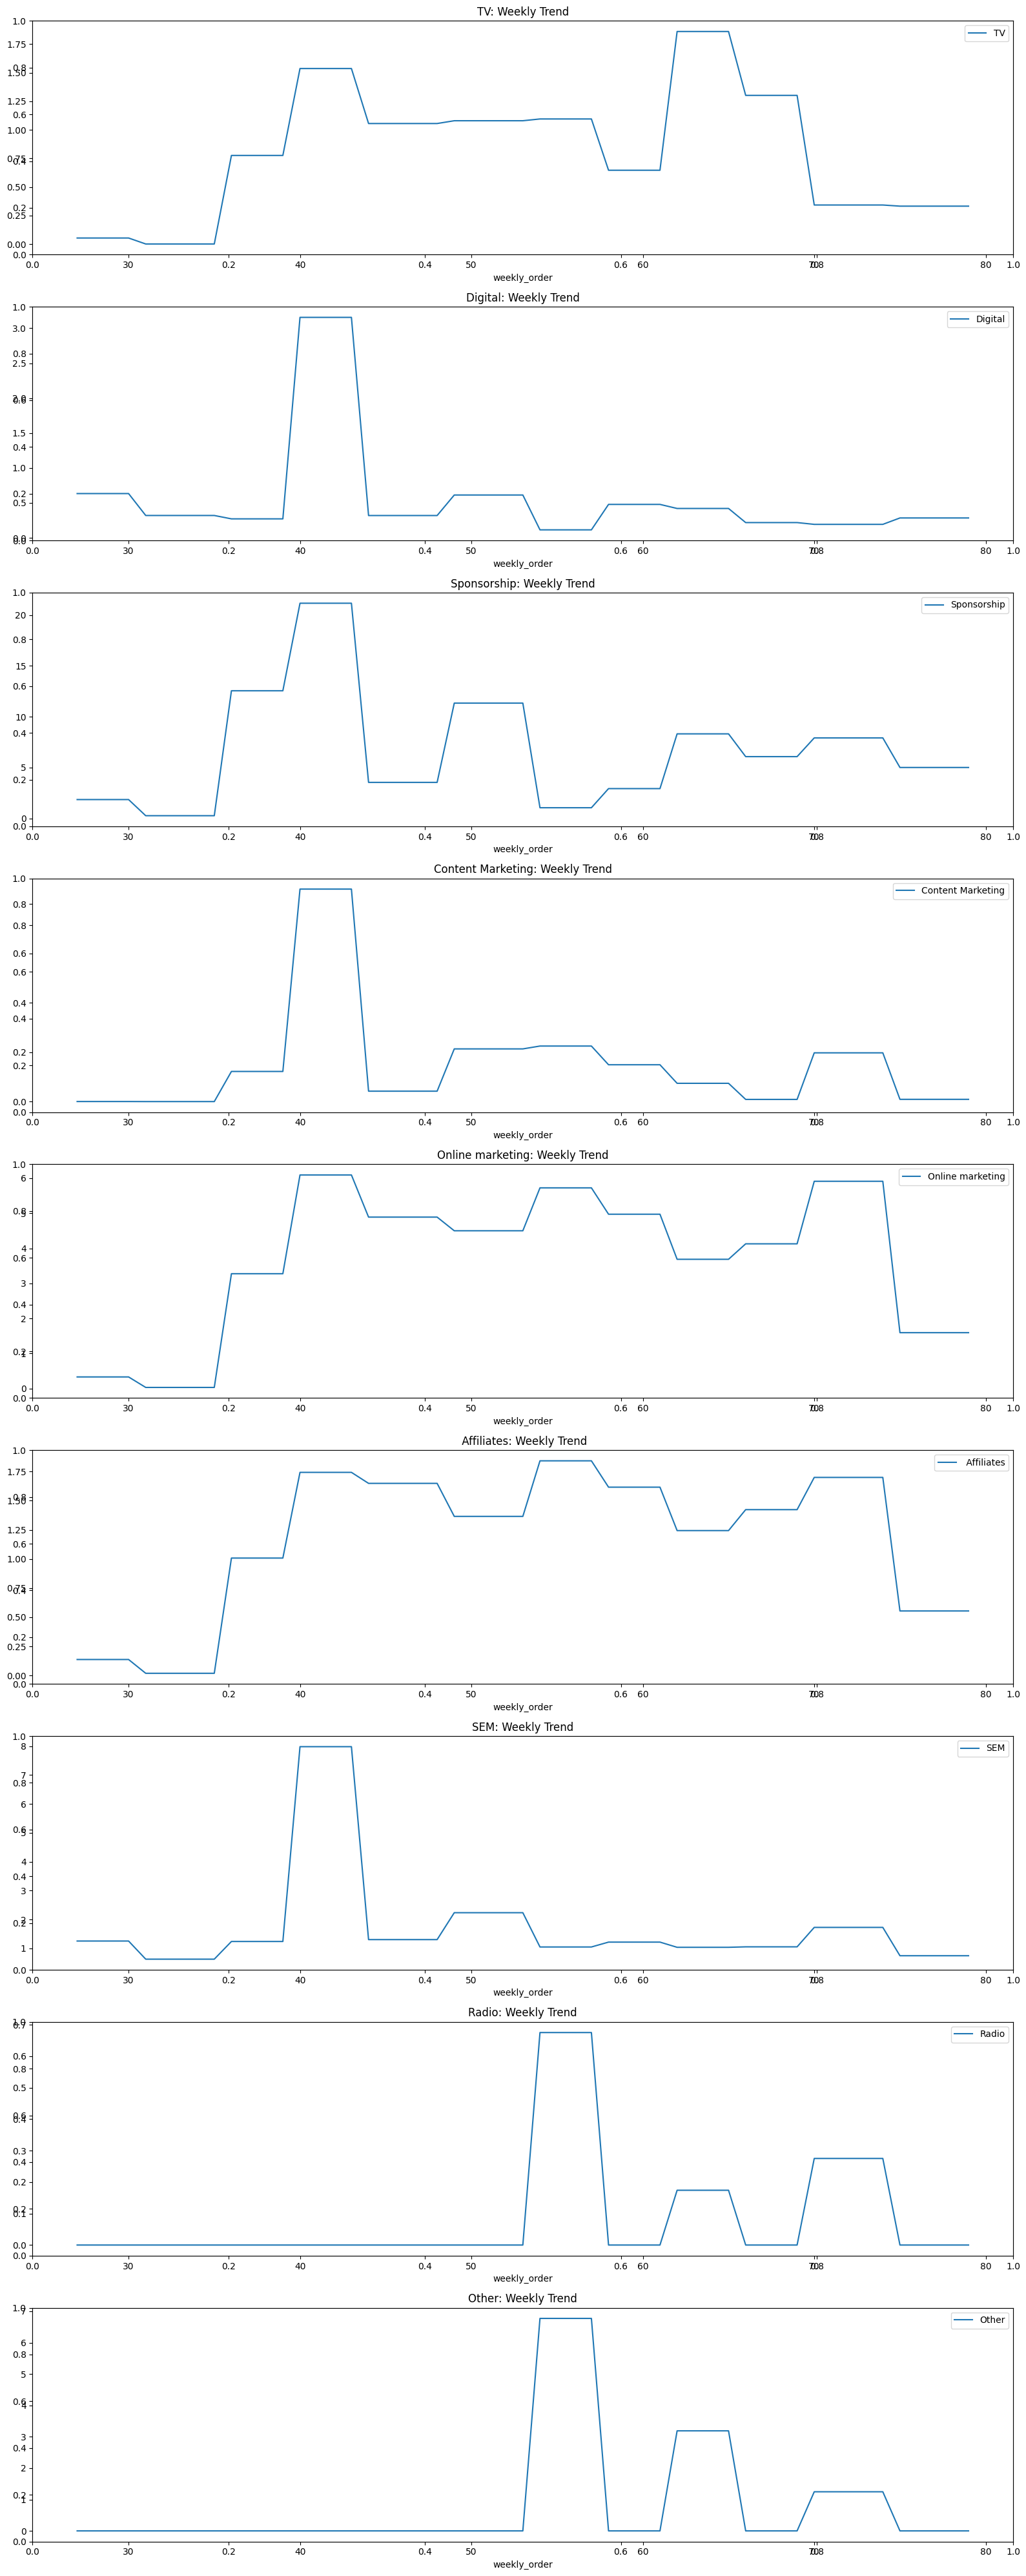

In [524]:
# Analyzing the weekly spends on different channels
channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other']
fig, axes = plt.subplots(9, 1, figsize=(16, 40))

for i, channel in enumerate(channels, 1):
    ax = fig.add_subplot(9, 1, i)
    ax.set_title(f'{channel}: Weekly Trend')
    media_investment_weekly.plot(x='weekly_order', y=[channel], ax=ax)

plt.tight_layout()
plt.show()


The peak investments occurred between weeks 39-45 for most channels, with Sponsorship media receiving the highest investment during this period.

In [525]:
## create a function to build adstock
def get_ad_stock_value(media_investment_weekly, col_name, adstock_rate):
    for lag in range(1, 6):
        media_investment_weekly[f'week_carry_over_{lag}_value'] = adstock_rate**lag * media_investment_weekly[col_name]

    for i in range(len(media_investment_weekly)):
        carry_over_values = [
            media_investment_weekly.loc[i - lag, f'week_carry_over_{lag}_value'] if (i - lag > -1) else 0
            for lag in range(1, 6)
        ]
        media_investment_weekly.loc[i, f"adStock_{col_name}"] = sum(carry_over_values) + media_investment_weekly.loc[i, col_name]

    return media_investment_weekly[["weekly_order", f"adStock_{col_name}"]]



In [526]:
#Creating adstocks for each of the investments by calling the above created function
adStock_TV = get_ad_stock_value(media_investment_weekly[['TV','weekly_order']],"TV", 0.5)[["adStock_TV"]]
adStock_digital = get_ad_stock_value(media_investment_weekly[['Digital','weekly_order']],"Digital", 0.5)[["adStock_Digital"]]
adStock_sponsorship = get_ad_stock_value(media_investment_weekly[['Sponsorship','weekly_order']],"Sponsorship", 0.5)[["adStock_Sponsorship"]]
adStock_content_marketing = get_ad_stock_value(media_investment_weekly[['Content Marketing','weekly_order']],"Content Marketing", 0.5)[["adStock_Content Marketing"]]
adStock_online_marketing = get_ad_stock_value(media_investment_weekly[['Online marketing','weekly_order']],"Online marketing", 0.5)[["adStock_Online marketing"]]
adStock_affiliates = get_ad_stock_value(media_investment_weekly[[' Affiliates','weekly_order']]," Affiliates", 0.5)[["adStock_ Affiliates"]]
adStock_SEM = get_ad_stock_value(media_investment_weekly[['SEM','weekly_order']],"SEM", 0.5)[["adStock_SEM"]]
adStock_radio = get_ad_stock_value(media_investment_weekly[['Radio','weekly_order']],"Radio", 0.5)[["adStock_Radio"]]
adStock_other = get_ad_stock_value(media_investment_weekly[['Other','weekly_order']],"Other", 0.5)

<ipython-input-525-624d8cd1542d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-525-624d8cd1542d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-525-624d8cd1542d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-525-624

In [527]:
# Concatenating all individual adstocks to form the final DF containing all the adstock data
all_adstock = pd.concat([adStock_TV,adStock_digital,adStock_sponsorship, adStock_content_marketing, adStock_online_marketing, adStock_affiliates, adStock_SEM, adStock_radio, adStock_other], axis = 1)

In [528]:
all_adstock.head()

adStock_TV  adStock_Digital  adStock_Sponsorship  \
0    0.053833         0.633253             1.853567   
1    0.080749         0.949880             2.780351   
2    0.094207         1.108193             3.243743   
3    0.100936         1.187350             3.475439   
4    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  weekly_order  adStock_Other  
0     1.255924            0.0            27            0.0  
1     1.883887            0.0            28            0.0  
2     2.197868            0.0            29            0.0  
3     2.354858            0.0            30            0.0  
4     1.805811            0.0            31            0.0

In [529]:
final_adstock_data = pd.merge(media_investment_weekly,all_adstock, on = "weekly_order", how = 'inner')

In [530]:
final_adstock_data.head()

weekly_order  Month  Year  Total Investment        TV   Digital  \
0            27      7  2015         17.061775  0.053833  0.633253   
1            28      7  2015         17.061775  0.053833  0.633253   
2            29      7  2015         17.061775  0.053833  0.633253   
3            30      7  2015         17.061775  0.053833  0.633253   
4            31      8  2015          5.064306  0.001610  0.319518   

   Sponsorship  Content Marketing  Online marketing   Affiliates  ...  Other  \
0     1.853567           0.000233          0.331819     0.136813  ...    0.0   
1     1.853567           0.000233          0.331819     0.136813  ...    0.0   
2     1.853567           0.000233          0.331819     0.136813  ...    0.0   
3     1.853567           0.000233          0.331819     0.136813  ...    0.0   
4     0.265833           0.000002          0.032311     0.018421  ...    0.0   

   adStock_TV  adStock_Digital  adStock_Sponsorship  \
0    0.053833         0.633253             1.853567   
1    0.080749         0.949880             2.780351   
2    0.094207         1.108193             3.243743   
3    0.100936         1.187350             3.475439   
4    0.052078         0.913194             2.003552   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                   0.000233                  0.331819             0.136813   
1                   0.000350                  0.497729             0.205220   
2                   0.000408                  0.580684             0.239424   
3                   0.000437                  0.622161             0.256525   
4                   0.000220                  0.343392             0.146684   

   adStock_SEM  adStock_Radio  adStock_Other  
0     1.255924            0.0            0.0  
1     1.883887            0.0            0.0  
2     2.197868            0.0            0.0  
3     2.354858            0.0            0.0  
4     1.805811            0.0            0.0  

[5 rows x 22 columns]

In [531]:
final_adstock_data.drop(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other'],inplace = True, axis = 1)

In [532]:
final_adstock_data.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
0            27      7  2015    0.053833         0.633253   
1            28      7  2015    0.080749         0.949880   
2            29      7  2015    0.094207         1.108193   
3            30      7  2015    0.100936         1.187350   
4            31      8  2015    0.052078         0.913194   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             1.853567                   0.000233                  0.331819   
1             2.780351                   0.000350                  0.497729   
2             3.243743                   0.000408                  0.580684   
3             3.475439                   0.000437                  0.622161   
4             2.003552                   0.000220                  0.343392   

   adStock_ Affiliates  adStock_SEM  adStock_Radio  adStock_Other  
0             0.136813     1.255924            0.0            0.0  
1             0.205220     1.883887            0.0            0.0  
2             0.239424     2.197868            0.0            0.0  
3             0.256525     2.354858            0.0            0.0  
4             0.146684     1.805811            0.0            0.0

<Axes: >

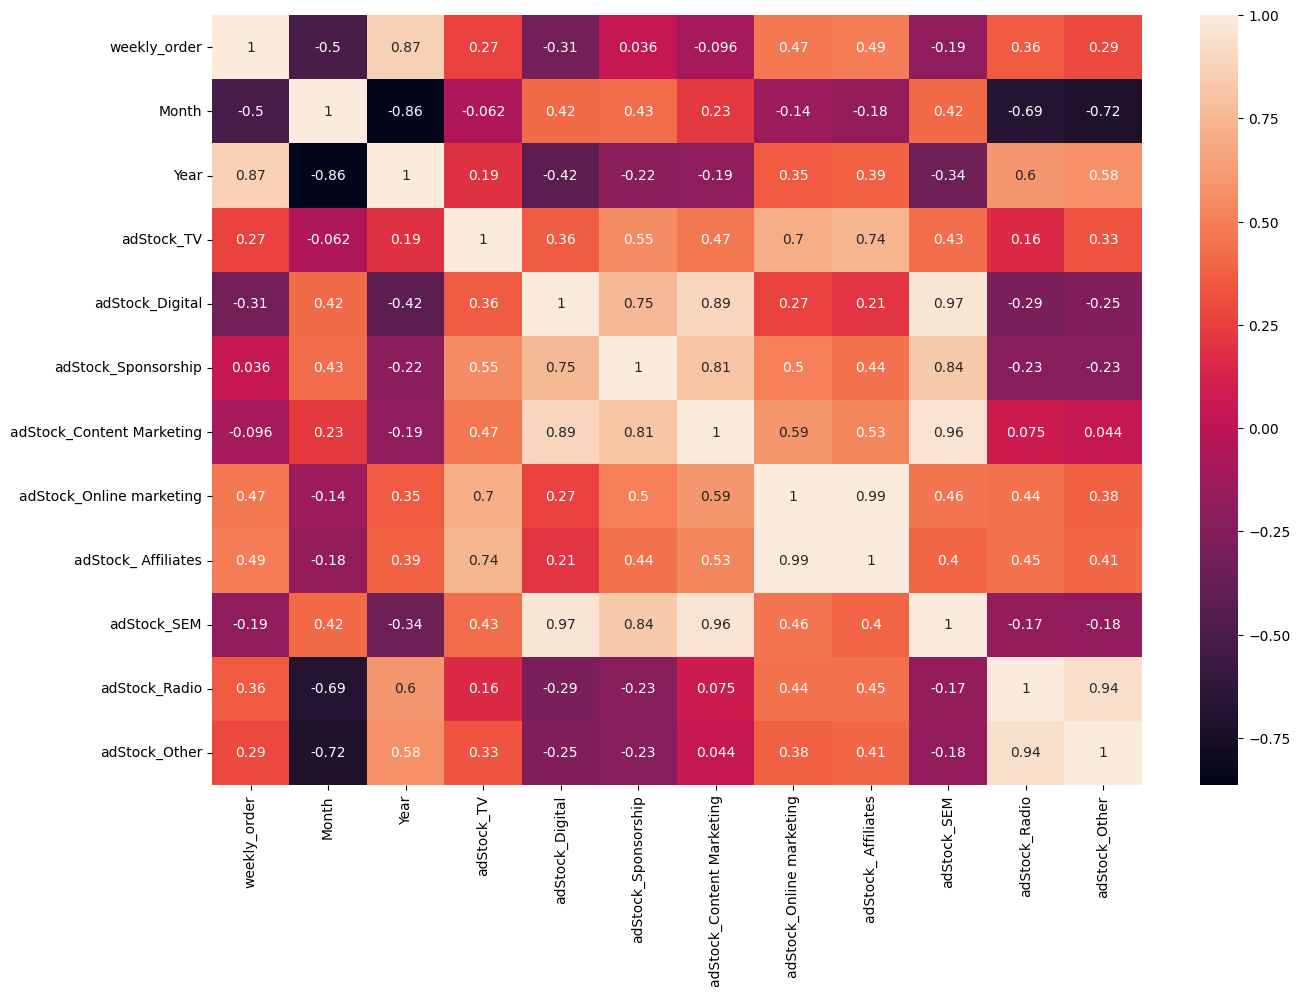

In [533]:
## Plot a heatmap for final_adstock_data
plt.figure(figsize = (15,10))
sns.heatmap(final_adstock_data.corr(), annot = True)

As observed above, there is a notable correlation between:

order_week and month, year and month, order_week and year
adStock_Affiliates and adStock_Online marketing
adStock_Other and adStock_Radio
adStock_Digital and adStock_SEM
adStock_Content Marketing and adStock_SEM
Month and adstock_radio, Month and adstock_others
adStock_TV and adStock_affiliates
adStock_Sponsorship and adStock_Content Marketing

In [534]:
#Preparing final_data for 3 categories by adding the adstock data
final_camera_data = pd.merge(final_adstock_data,final_camera_data, on = "weekly_order", how = 'right')
final_gaming_data = pd.merge(final_adstock_data,final_gaming_data, on = "weekly_order", how = 'right')
final_home_data = pd.merge(final_adstock_data,final_home_data, on = "weekly_order", how = 'right')

In [535]:
final_home_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   weekly_order               45 non-null     int64  
 1   Month                      45 non-null     int64  
 2   Year                       45 non-null     int64  
 3   adStock_TV                 45 non-null     float64
 4   adStock_Digital            45 non-null     float64
 5   adStock_Sponsorship        45 non-null     float64
 6   adStock_Content Marketing  45 non-null     float64
 7   adStock_Online marketing   45 non-null     float64
 8   adStock_ Affiliates        45 non-null     float64
 9   adStock_SEM                45 non-null     float64
 10  adStock_Radio              45 non-null     float64
 11  adStock_Other              45 non-null     float64
 12  gmv                        45 non-null     float64
 13  units                      45 non-null     int64  
 

In [536]:
#Checking the shape of the final dataframes
print("Shape of Gaming Accessory DF",final_gaming_data.shape)
print("Shape of Camera Accessory DF",final_camera_data.shape)
print("Shape of Home Audio DF",final_home_data.shape)

Shape of Gaming Accessory DF (49, 40)
Shape of Camera Accessory DF (48, 47)
Shape of Home Audio DF (45, 35)


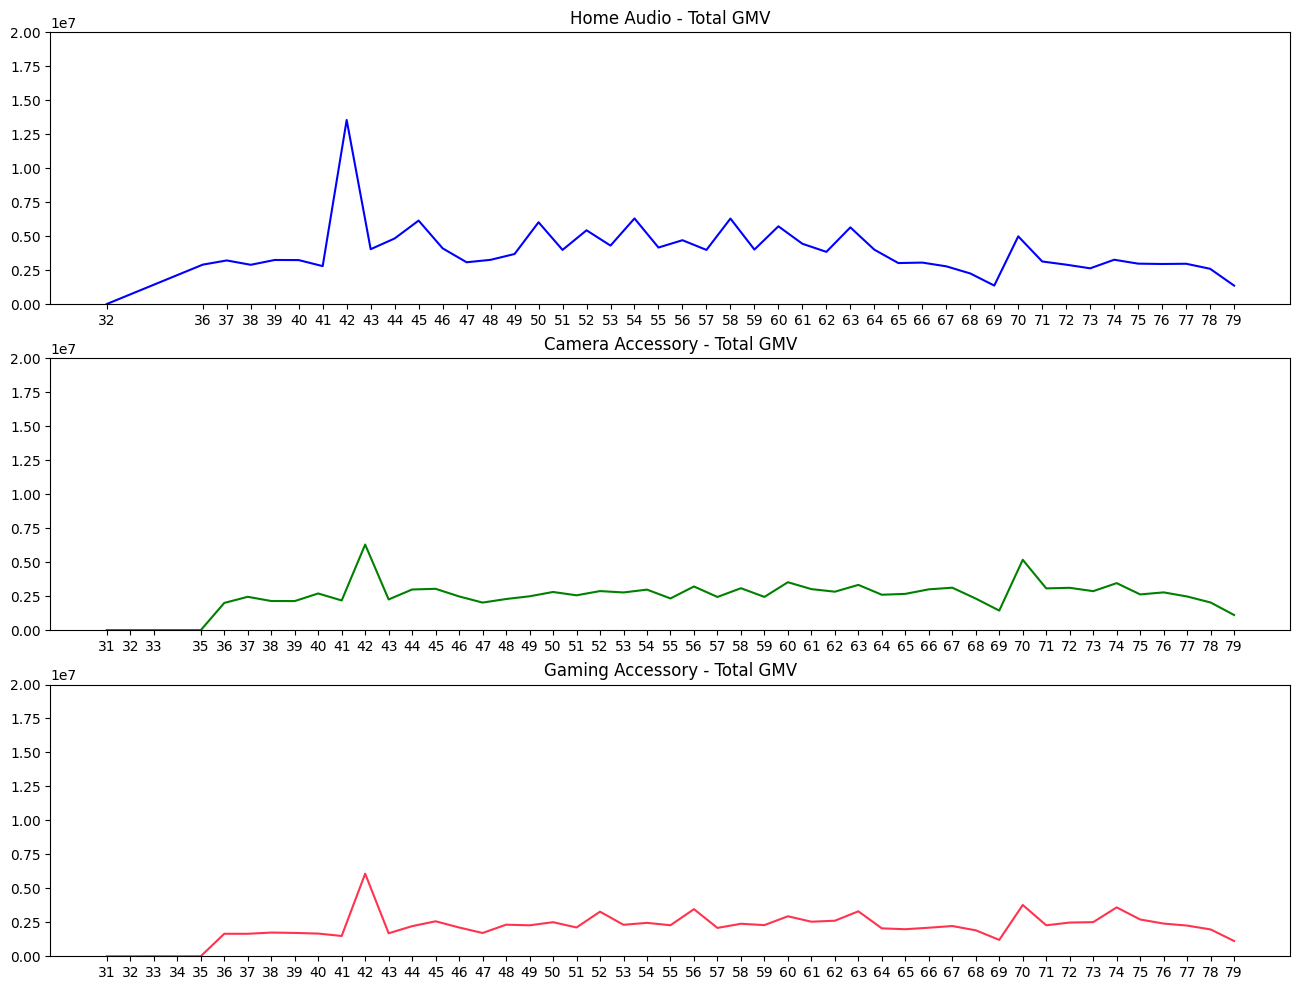

In [537]:
# Total GMV vs Week
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))

# Plotting Home Audio
ax1 = axes[0]
ax1.set_ylim(0, 20000000)
ax1.set_title('Home Audio - Total GMV')
ax1.plot(final_home_data['weekly_order'], final_home_data['gmv'], color='blue')
ax1.set_xticks(final_home_data['weekly_order'])

# Plotting Camera Accessory
ax2 = axes[1]
ax2.set_ylim(0, 20000000)
ax2.set_title('Camera Accessory - Total GMV')
ax2.plot(final_camera_data['weekly_order'], final_camera_data['gmv'], color='green')
ax2.set_xticks(final_camera_data['weekly_order'])

# Plotting Gaming Accessory
ax3 = axes[2]
ax3.set_ylim(0, 20000000)
ax3.set_title('Gaming Accessory - Total GMV')
ax3.plot(final_gaming_data['weekly_order'], final_gaming_data['gmv'], color=(1.0, 0.2, 0.3))
ax3.set_xticks(final_gaming_data['weekly_order'])

plt.show()


The peak GMV appears to be around week 42 across all categories, with HomeAudio achieving the highest GMV during this period.

In [538]:
final_camera_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   weekly_order               48 non-null     int64  
 1   Month                      48 non-null     int64  
 2   Year                       48 non-null     int64  
 3   adStock_TV                 48 non-null     float64
 4   adStock_Digital            48 non-null     float64
 5   adStock_Sponsorship        48 non-null     float64
 6   adStock_Content Marketing  48 non-null     float64
 7   adStock_Online marketing   48 non-null     float64
 8   adStock_ Affiliates        48 non-null     float64
 9   adStock_SEM                48 non-null     float64
 10  adStock_Radio              48 non-null     float64
 11  adStock_Other              48 non-null     float64
 12  gmv                        48 non-null     float64
 13  units                      48 non-null     int64  
 

In [539]:
## Speacial Sale week vs Average GMV
Special_week_sale_HA = final_home_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
Special_week_sale_CA = final_camera_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
Special_week_sale_GA = final_gaming_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()

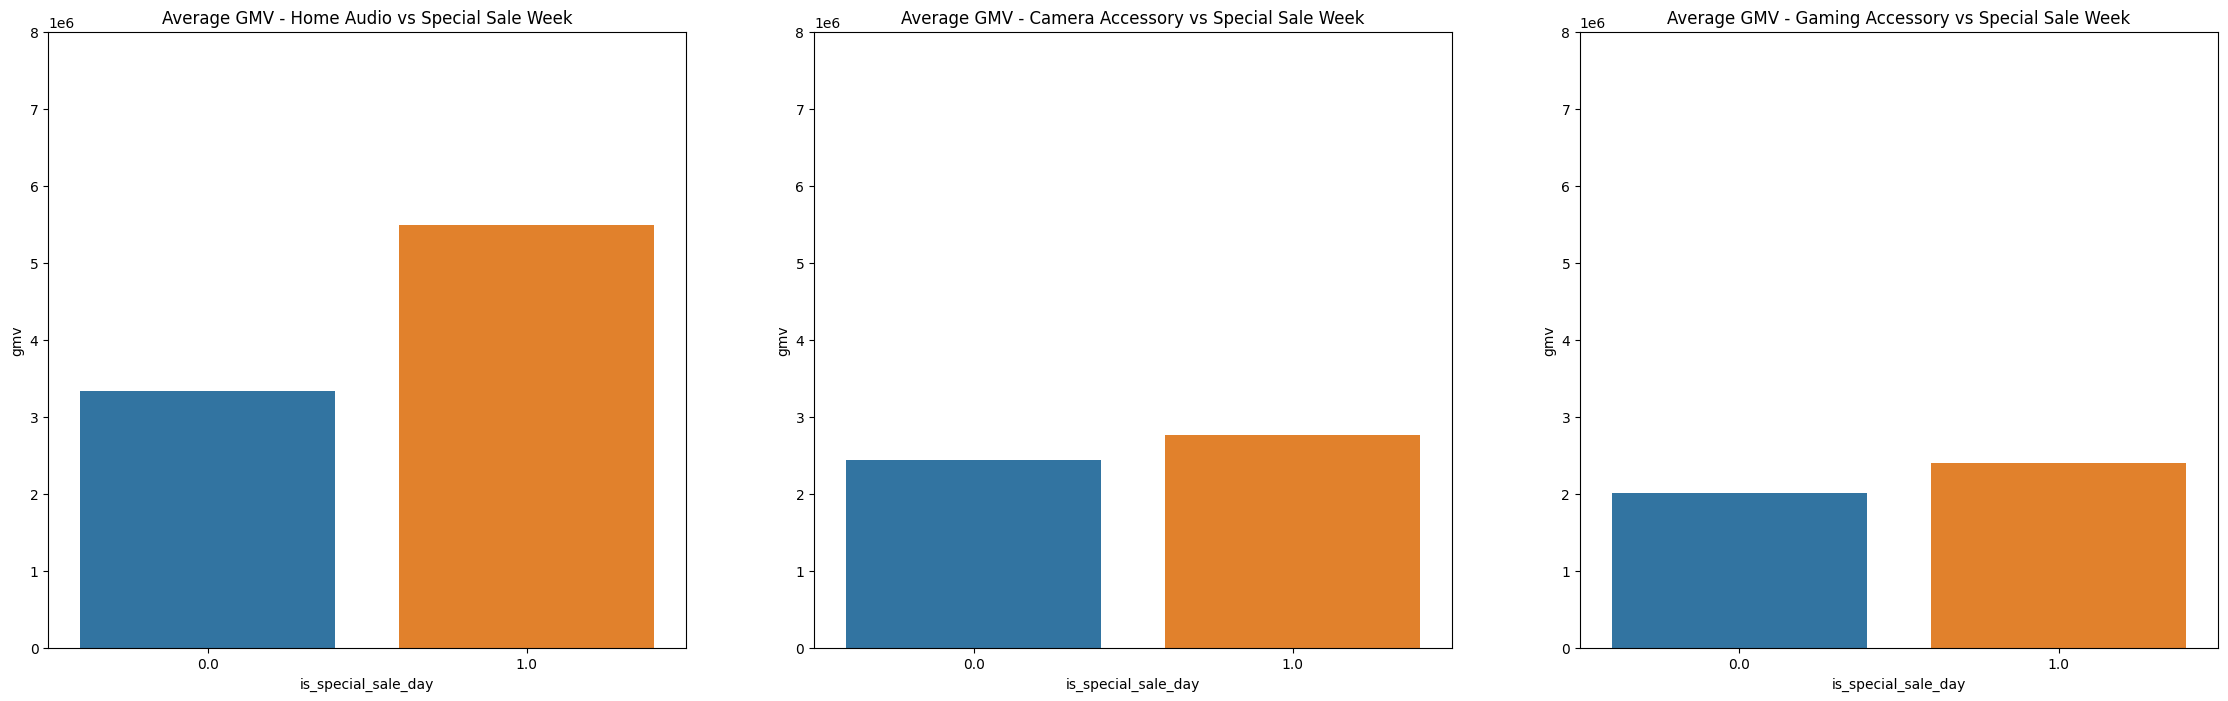

In [540]:
# Increase figure size
plt.figure(figsize=(28, 8))

# Subplot 1: Average GMV - Home Audio vs Special Sale Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0, 8000000)
sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_HA, ax=ax1)
ax1.set_title("Average GMV - Home Audio vs Special Sale Week")

# Subplot 2: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0, 8000000)
sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_CA, ax=ax2)
ax2.set_title("Average GMV - Camera Accessory vs Special Sale Week")

# Subplot 3: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0, 8000000)
sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_GA, ax=ax3)
ax3.set_title("Average GMV - Gaming Accessory vs Special Sale Week")

plt.show()


In [541]:
## Pay day week vs Average GMV
PayDay_week_sale_HA = final_home_data.groupby('is_pay_day')[['gmv']].mean().reset_index()
PayDay_week_sale_CA = final_camera_data.groupby('is_pay_day')[['gmv']].mean().reset_index()
PayDay_week_sale_GA = final_gaming_data.groupby('is_pay_day')[['gmv']].mean().reset_index()

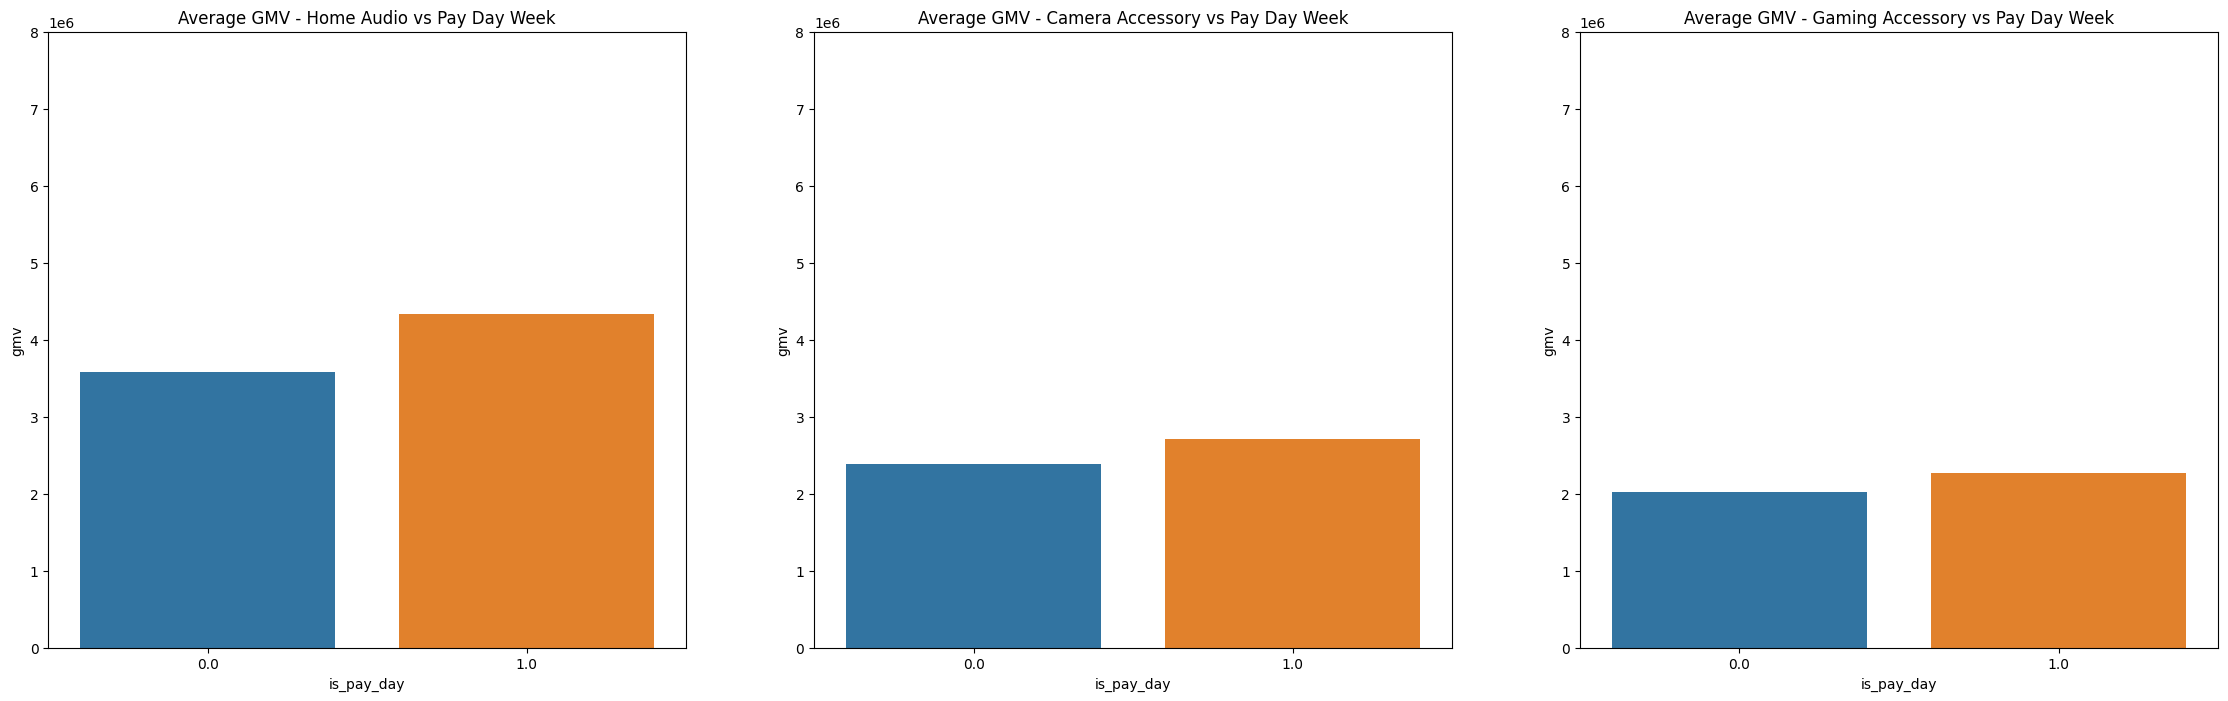

In [542]:
# Increase figure size
plt.figure(figsize=(28, 8))

# Subplot 1: Average GMV - Home Audio vs Pay Day Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0, 8000000)
sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_HA, ax=ax1)
ax1.set_title("Average GMV - Home Audio vs Pay Day Week")

# Subplot 2: Average GMV - Camera Accessory vs Pay Day Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0, 8000000)
sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_CA, ax=ax2)
ax2.set_title("Average GMV - Camera Accessory vs Pay Day Week")

# Subplot 3: Average GMV - Gaming Accessory vs Pay Day Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0, 8000000)
sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_GA, ax=ax3)
ax3.set_title("Average GMV - Gaming Accessory vs Pay Day Week")

plt.show()


In [543]:
## Pay Day week vs Total GMV
PayDay_week_sale_HA = final_home_data.groupby('is_pay_day')[['gmv']].sum().reset_index()
PayDay_week_sale_CA = final_camera_data.groupby('is_pay_day')[['gmv']].sum().reset_index()
PayDay_week_sale_GA = final_gaming_data.groupby('is_pay_day')[['gmv']].sum().reset_index()

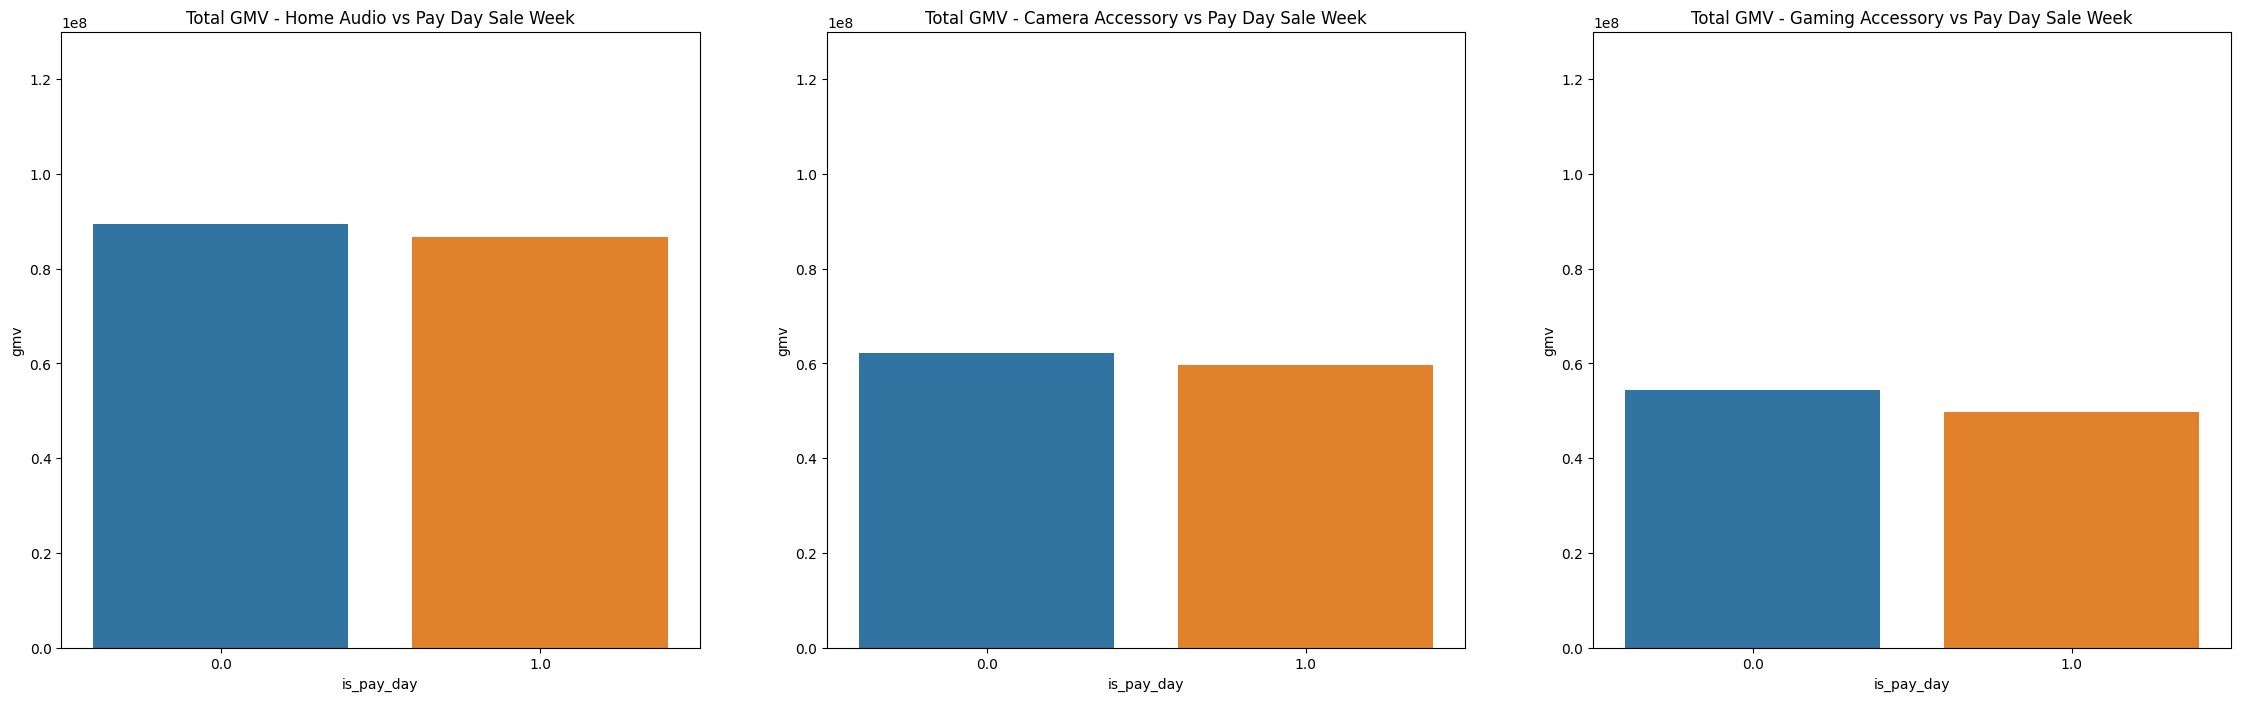

In [544]:
# Increase figure size
plt.figure(figsize=(28, 8))

# Subplot 1: Total GMV - Home Audio vs Pay Day Sale Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0, 130000000)
sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_HA, ax=ax1)
ax1.set_title("Total GMV - Home Audio vs Pay Day Sale Week")

# Subplot 2: Total GMV - Camera Accessory vs Pay Day Sale Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0, 130000000)
sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_CA, ax=ax2)
ax2.set_title("Total GMV - Camera Accessory vs Pay Day Sale Week")

# Subplot 3: Total GMV - Gaming Accessory vs Pay Day Sale Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0, 130000000)
sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_GA, ax=ax3)
ax3.set_title("Total GMV - Gaming Accessory vs Pay Day Sale Week")

plt.show()


From the two provided graphs (mean and sum), it is evident that the overall total GMV during weeks without holidays is higher. However, the mean GMV for weeks with holidays is comparatively higher.

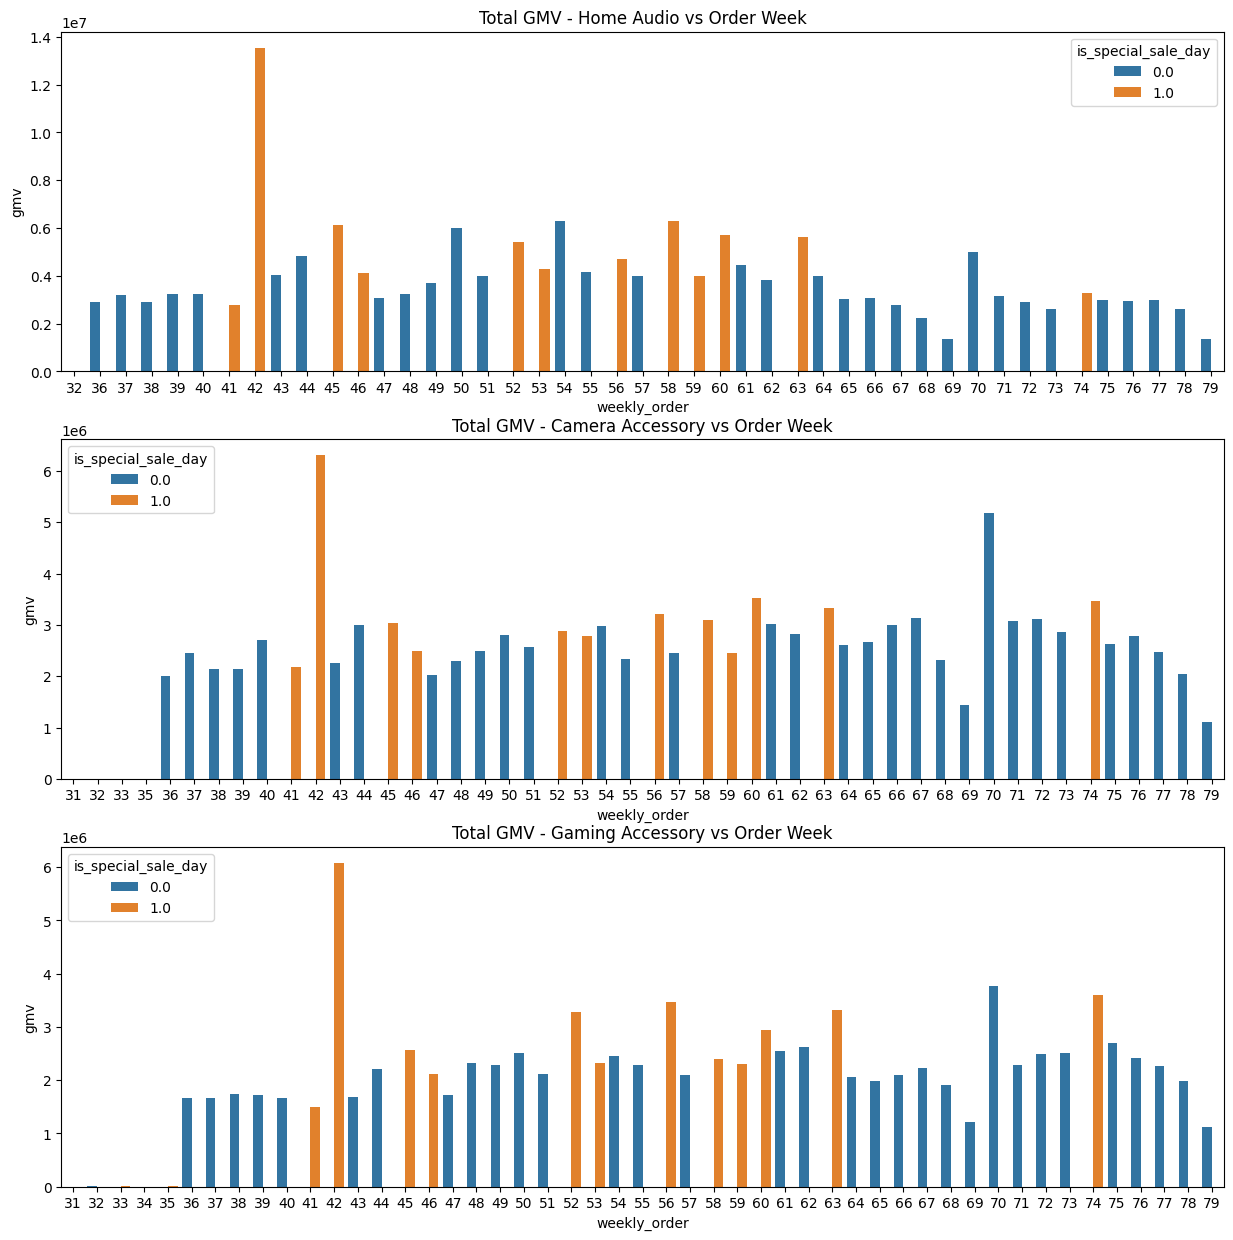

In [545]:
## Examining the total GMV over the weeks, considering the presence of special days for all three categories.

# Set figure size
plt.figure(figsize=(15, 15))

# Subplot 1: Total GMV - Home Audio vs Order Week
ax1 = plt.subplot(3, 1, 1)
sns.barplot(x='weekly_order', y='gmv', data=final_home_data, hue='is_special_sale_day', ax=ax1)
ax1.set_title("Total GMV - Home Audio vs Order Week")

# Subplot 2: Total GMV - Camera Accessory vs Order Week
ax2 = plt.subplot(3, 1, 2)
sns.barplot(x='weekly_order', y='gmv', data=final_camera_data, hue='is_special_sale_day', ax=ax2)
ax2.set_title("Total GMV - Camera Accessory vs Order Week")

# Subplot 3: Total GMV - Gaming Accessory vs Order Week
ax3 = plt.subplot(3, 1, 3)
sns.barplot(x='weekly_order', y='gmv', data=final_gaming_data, hue='is_special_sale_day', ax=ax3)
ax3.set_title("Total GMV - Gaming Accessory vs Order Week")

plt.show()


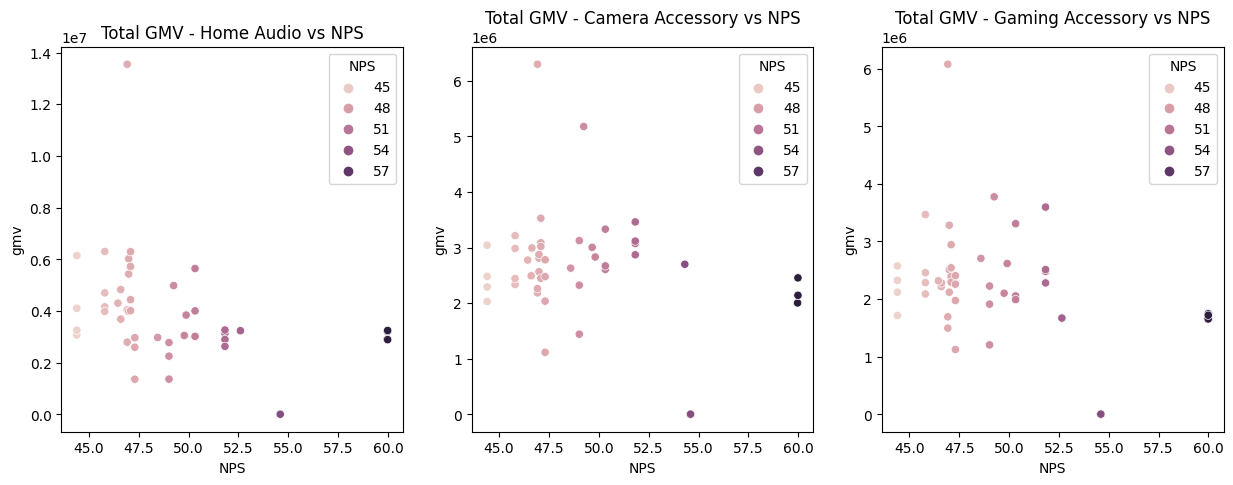

In [546]:
# Set figure size
plt.figure(figsize=(15, 5))

# Subplot 1: Scatter plot for Total GMV - Home Audio vs NPS
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x='NPS', y='gmv', data=final_home_data, hue='NPS', ax=ax1)
ax1.set_title("Total GMV - Home Audio vs NPS")

# Subplot 2: Scatter plot for Total GMV - Camera Accessory vs NPS
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(x='NPS', y='gmv', data=final_camera_data, hue='NPS', ax=ax2)
ax2.set_title("Total GMV - Camera Accessory vs NPS")

# Subplot 3: Scatter plot for Total GMV - Gaming Accessory vs NPS
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x='NPS', y='gmv', data=final_gaming_data, hue='NPS', ax=ax3)
ax3.set_title("Total GMV - Gaming Accessory vs NPS")

plt.show()



There appears to be a negative correlation between NPS and GMV across all three categories.

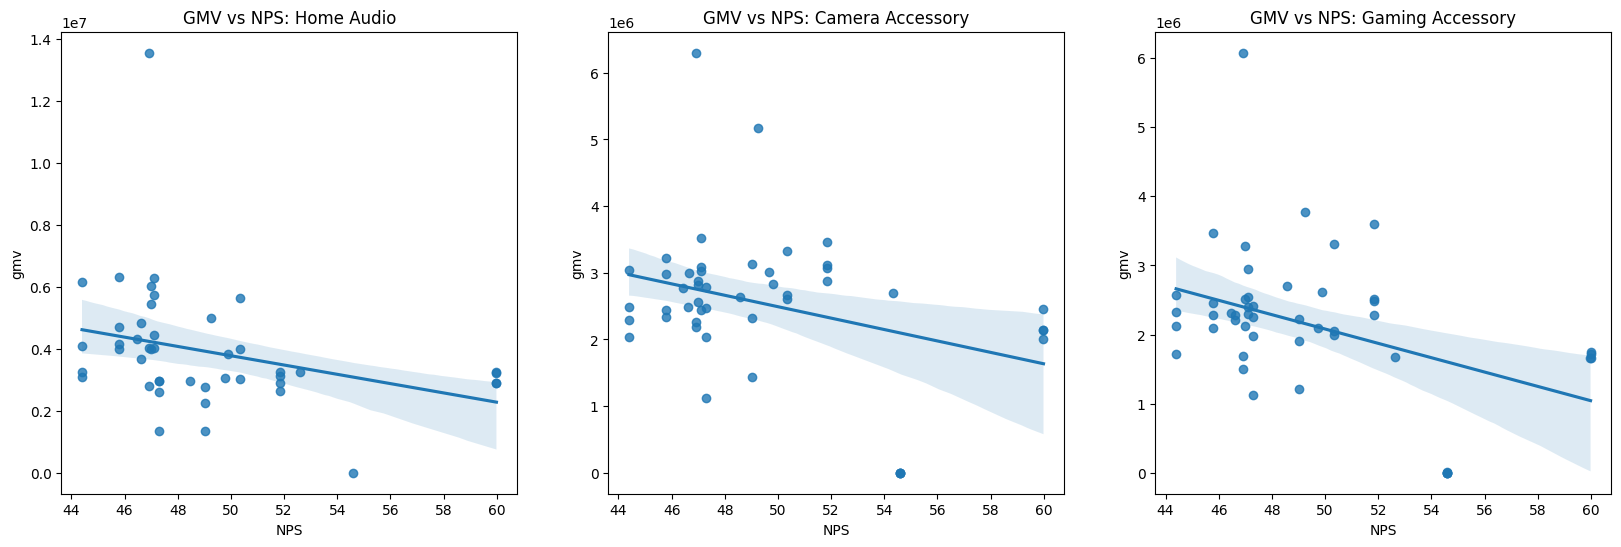

In [547]:
# Set figure size
fig = plt.figure(figsize=(20, 6))

# Subplot 1: GMV vs NPS for Home Audio
ax1 = fig.add_subplot(131)
ax1.set_title('GMV vs NPS: Home Audio')
sns.regplot(x='NPS', y='gmv', data=final_home_data, ax=ax1)

# Subplot 2: GMV vs NPS for Camera Accessory
ax2 = fig.add_subplot(132)
ax2.set_title('GMV vs NPS: Camera Accessory')
sns.regplot(x='NPS', y='gmv', data=final_camera_data, ax=ax2)

# Subplot 3: GMV vs NPS for Gaming Accessory
ax3 = fig.add_subplot(133)
ax3.set_title('GMV vs NPS: Gaming Accessory')
sns.regplot(x='NPS', y='gmv', data=final_gaming_data, ax=ax3)

plt.show()


A negative correlation is observable between NPS and GMV.

In [548]:
# Read climate data from 2015 and 2016 file
climate_15_df = pd.read_excel('/content/drive/MyDrive/DataScience/EcomProject/ONTARIO-2015.xlsx', skiprows=24)

climate_15_df.head()


Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2015-01-01  2015      1    1            †            0.0           NaN   
1 2015-01-02  2015      1    2            †            3.0           NaN   
2 2015-01-03  2015      1    3            †            2.5           NaN   
3 2015-01-04  2015      1    4            †            2.5           NaN   
4 2015-01-05  2015      1    5            †          -10.0           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)  ... Total Snow (cm)  \
0           -8.5           NaN            -4.3  ...             0.0   
1           -3.0           NaN             0.0  ...             0.0   
2           -4.0           NaN            -0.8  ...             0.0   
3            0.0           NaN             1.3  ...             1.0   
4          -13.5           NaN           -11.8  ...             3.0   

   Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0              NaN               0.0                NaN               0.0   
1              NaN               0.0                NaN               0.0   
2              NaN              24.0                NaN               0.0   
3              NaN               1.0                NaN               0.0   
4              NaN               3.0                NaN               1.0   

   Snow on Grnd Flag Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0                NaN                       NaN                   NaN   
1                NaN                       NaN                   NaN   
2                NaN                       NaN                   NaN   
3                NaN                       NaN                   NaN   
4                NaN                       NaN                   NaN   

  Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  

[5 rows x 27 columns]

In [549]:
climate_16_df = pd.read_excel('/content/drive/MyDrive/DataScience/EcomProject/ONTARIO-2016.xlsx', skiprows=24)

climate_16_df.head()


Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2016-01-01  2016      1    1          NaN            NaN           NaN   
1 2016-01-02  2016      1    2          NaN            NaN           NaN   
2 2016-01-03  2016      1    3          NaN            NaN           NaN   
3 2016-01-04  2016      1    4          NaN            NaN           NaN   
4 2016-01-05  2016      1    5          NaN            NaN           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)  ... Total Snow (cm)  \
0            NaN           NaN             NaN  ...             NaN   
1            NaN           NaN             NaN  ...             NaN   
2            NaN           NaN             NaN  ...             NaN   
3            NaN           NaN             NaN  ...             NaN   
4            NaN           NaN             NaN  ...             NaN   

   Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0              NaN               NaN                NaN               NaN   
1              NaN               NaN                NaN               NaN   
2              NaN               NaN                NaN               NaN   
3              NaN               NaN                NaN               NaN   
4              NaN               NaN                NaN               NaN   

   Snow on Grnd Flag Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0                NaN                       NaN                   NaN   
1                NaN                       NaN                   NaN   
2                NaN                       NaN                   NaN   
3                NaN                       NaN                   NaN   
4                NaN                       NaN                   NaN   

  Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  

[5 rows x 27 columns]

In [550]:
# Dropping the columns with all nulls

climate_15_df.dropna(axis=1, thresh=1, inplace=True)

climate_15_df.reset_index(drop=True, inplace=True)

climate_16_df.dropna(axis=1, thresh=1, inplace=True)

climate_16_df.reset_index(drop=True, inplace=True)

climate_16_df.head(10)

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0 2016-01-01  2016      1    1          NaN            NaN           NaN   
1 2016-01-02  2016      1    2          NaN            NaN           NaN   
2 2016-01-03  2016      1    3          NaN            NaN           NaN   
3 2016-01-04  2016      1    4          NaN            NaN           NaN   
4 2016-01-05  2016      1    5          NaN            NaN           NaN   
5 2016-01-06  2016      1    6          NaN            NaN           NaN   
6 2016-01-07  2016      1    7          NaN            NaN           NaN   
7 2016-01-08  2016      1    8            †            7.0           NaN   
8 2016-01-09  2016      1    9            †           11.0           NaN   
9 2016-01-10  2016      1   10            †           -1.5           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)  ... Cool Deg Days (°C)  \
0            NaN           NaN             NaN  ...                NaN   
1            NaN           NaN             NaN  ...                NaN   
2            NaN           NaN             NaN  ...                NaN   
3            NaN           NaN             NaN  ...                NaN   
4            NaN           NaN             NaN  ...                NaN   
5            NaN           NaN             NaN  ...                NaN   
6            NaN           NaN             NaN  ...                NaN   
7          -14.0           NaN            -3.5  ...                0.0   
8            3.0           NaN             7.0  ...                0.0   
9           -5.0           NaN            -3.3  ...                0.0   

   Cool Deg Days Flag Total Rain (mm)  Total Rain Flag Total Snow (cm)  \
0                 NaN             NaN              NaN             NaN   
1                 NaN             NaN              NaN             NaN   
2                 NaN             NaN              NaN             NaN   
3                 NaN             NaN              NaN             NaN   
4                 NaN             NaN              NaN             NaN   
5                 NaN             NaN              NaN             NaN   
6                 NaN             NaN              NaN             NaN   
7                 NaN             9.0              NaN             0.0   
8                 NaN            14.6              NaN             0.0   
9                 NaN             0.0              NaN             7.0   

   Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0              NaN               NaN                NaN               NaN   
1              NaN               NaN                NaN               NaN   
2              NaN               NaN                NaN               NaN   
3              NaN               NaN                NaN               NaN   
4              NaN               NaN                NaN               NaN   
5              NaN               NaN                NaN               NaN   
6              NaN               NaN                NaN               NaN   
7              NaN               9.0                NaN               0.0   
8                T              14.6                NaN               0.0   
9              NaN               7.0                NaN               0.0   

   Snow on Grnd Flag  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
5                NaN  
6                NaN  
7                NaN  
8                NaN  
9                  T  

[10 rows x 23 columns]

In [551]:
def drop_single_value_columns(dataframe):
    drop_cols = []

    for col in dataframe.columns:
        if 'Flag' in col:
            print(dataframe[col].value_counts())
            print()
            drop_cols.append(col)

    drop_cols.append('Data Quality')

    dataframe.drop(drop_cols, axis=1, inplace=True)

    print("Remaining columns after dropping:", dataframe.columns)



In [552]:
# Assuming 'climate_2015' is your DataFrame
drop_single_value_columns(climate_15_df)

M    13
Name: Max Temp Flag, dtype: int64

M    39
Name: Min Temp Flag, dtype: int64

M    39
Name: Mean Temp Flag, dtype: int64

M    39
Name: Heat Deg Days Flag, dtype: int64

M    39
Name: Cool Deg Days Flag, dtype: int64

T    7
Name: Total Rain Flag, dtype: int64

T    9
Name: Total Snow Flag, dtype: int64

T    12
Name: Total Precip Flag, dtype: int64

T    2
Name: Snow on Grnd Flag, dtype: int64

Remaining columns after dropping: Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [553]:
# Assuming 'climate_2015' is your DataFrame
drop_single_value_columns(climate_16_df)

M    1
Name: Max Temp Flag, dtype: int64

M    8
Name: Min Temp Flag, dtype: int64

M    8
Name: Mean Temp Flag, dtype: int64

M    8
Name: Heat Deg Days Flag, dtype: int64

M    8
Name: Cool Deg Days Flag, dtype: int64

T    3
Name: Total Rain Flag, dtype: int64

T    7
Name: Total Snow Flag, dtype: int64

T    7
Name: Total Precip Flag, dtype: int64

T    6
Name: Snow on Grnd Flag, dtype: int64

Remaining columns after dropping: Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [554]:
# Formatting column names

climate_15_df.columns = [col.replace(' (°C)','').strip() for col in climate_16_df.columns]
climate_16_df.columns = [col.replace(' (°C)','').strip() for col in climate_16_df.columns]
climate_15_df.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [555]:
# Dropping rows where all the specified columns have null values for both climate_2015 and climate_2016

cols = ['Mean Temp', 'Total Rain (mm)']

def drop_rows_with_all_nulls(dataframe):
    dataframe.dropna(subset=cols, inplace=True)
    dataframe.reset_index(drop=True, inplace=True)

# Assuming 'climate_2015' and 'climate_2016' are your DataFrames
drop_rows_with_all_nulls(climate_15_df)
drop_rows_with_all_nulls(climate_16_df)

# Displaying information about the remaining data in climate_2015
climate_15_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          190 non-null    datetime64[ns]
 1   Year               190 non-null    int64         
 2   Month              190 non-null    int64         
 3   Day                190 non-null    int64         
 4   Max Temp           190 non-null    float64       
 5   Min Temp           190 non-null    float64       
 6   Mean Temp          190 non-null    float64       
 7   Heat Deg Days      190 non-null    float64       
 8   Cool Deg Days      190 non-null    float64       
 9   Total Rain (mm)    190 non-null    float64       
 10  Total Snow (cm)    190 non-null    float64       
 11  Total Precip (mm)  190 non-null    float64       
 12  Snow on Grnd (cm)  190 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 19.4 KB


In [556]:
climate_15_df.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0 2015-01-01  2015      1    1       0.0      -8.5       -4.3           22.3   
1 2015-01-02  2015      1    2       3.0      -3.0        0.0           18.0   
2 2015-01-03  2015      1    3       2.5      -4.0       -0.8           18.8   
3 2015-01-04  2015      1    4       2.5       0.0        1.3           16.7   
4 2015-01-05  2015      1    5     -10.0     -13.5      -11.8           29.8   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              0.0              0.0                0.0   
1            0.0              0.0              0.0                0.0   
2            0.0             24.0              0.0               24.0   
3            0.0              0.0              1.0                1.0   
4            0.0              0.0              3.0                3.0   

   Snow on Grnd (cm)  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                1.0

In [557]:
import datetime

# Extracting week # from the date field and formatting it in climate_15_df
climate_15_df['weekly_order'] = climate_15_df['Date/Time'].dt.strftime("%V").str.lstrip('0')

# Displaying the updated DataFrame
climate_15_df.head()



Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0 2015-01-01  2015      1    1       0.0      -8.5       -4.3           22.3   
1 2015-01-02  2015      1    2       3.0      -3.0        0.0           18.0   
2 2015-01-03  2015      1    3       2.5      -4.0       -0.8           18.8   
3 2015-01-04  2015      1    4       2.5       0.0        1.3           16.7   
4 2015-01-05  2015      1    5     -10.0     -13.5      -11.8           29.8   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              0.0              0.0                0.0   
1            0.0              0.0              0.0                0.0   
2            0.0             24.0              0.0               24.0   
3            0.0              0.0              1.0                1.0   
4            0.0              0.0              3.0                3.0   

   Snow on Grnd (cm) weekly_order  
0                0.0            1  
1                0.0            1  
2                0.0            1  
3                0.0            1  
4                1.0            2

In [558]:
# Extracting week # from the date field and formatting it in climate_16_df
climate_16_df['weekly_order'] = climate_16_df['Date/Time'].dt.strftime("%V").str.lstrip('0')

# Displaying the updated DataFrame
climate_16_df.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0 2016-01-08  2016      1    8       7.0     -14.0       -3.5           21.5   
1 2016-01-09  2016      1    9      11.0       3.0        7.0           11.0   
2 2016-01-10  2016      1   10      -1.5      -5.0       -3.3           21.3   
3 2016-01-12  2016      1   12      -5.0     -12.0       -8.5           26.5   
4 2016-01-14  2016      1   14       2.5     -10.5       -4.0           22.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              9.0              0.0                9.0   
1            0.0             14.6              0.0               14.6   
2            0.0              0.0              7.0                7.0   
3            0.0              0.0              0.0                0.0   
4            0.0              0.0              0.0                0.0   

   Snow on Grnd (cm) weekly_order  
0                0.0            1  
1                0.0            1  
2                0.0            1  
3               12.0            2  
4               11.0            2

In [559]:
climate_16_df['weekly_order'] = climate_16_df['weekly_order'].astype(int)

In [560]:
climate_15_df['weekly_order'] = climate_15_df['weekly_order'].astype(int)

In [561]:
# Mapping order_week according to the new logic in climate_2016
climate_16_df['weekly_order'] = climate_16_df.apply(lambda x: seqWeek(x['weekly_order'], x['Year']), axis=1)


In [562]:
# Extracting July to Dec month's data

climate_15_df = climate_15_df[climate_15_df['Month'] >= 7]
climate_15_df.reset_index(drop=True, inplace=True)

climate_15_df.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0 2015-07-01  2015      7    1      24.5      17.0       20.8            0.0   
1 2015-07-02  2015      7    2      24.0      14.0       19.0            0.0   
2 2015-07-03  2015      7    3      25.0      10.0       17.5            0.5   
3 2015-07-04  2015      7    4      26.0      11.0       18.5            0.0   
4 2015-07-05  2015      7    5      28.0      14.0       21.0            0.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            2.8              0.0              0.0                0.0   
1            1.0              0.0              0.0                0.0   
2            0.0              0.0              0.0                0.0   
3            0.5              0.0              0.0                0.0   
4            3.0              0.0              0.0                0.0   

   Snow on Grnd (cm)  weekly_order  
0                0.0            27  
1                0.0            27  
2                0.0            27  
3                0.0            27  
4                0.0            27

In [563]:
# Extracting July to Dec month's data

climate_16_df = climate_16_df[climate_16_df['Month'] <= 7]
climate_16_df.reset_index(drop=True, inplace=True)

climate_16_df.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0 2016-01-08  2016      1    8       7.0     -14.0       -3.5           21.5   
1 2016-01-09  2016      1    9      11.0       3.0        7.0           11.0   
2 2016-01-10  2016      1   10      -1.5      -5.0       -3.3           21.3   
3 2016-01-12  2016      1   12      -5.0     -12.0       -8.5           26.5   
4 2016-01-14  2016      1   14       2.5     -10.5       -4.0           22.0   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0            0.0              9.0              0.0                9.0   
1            0.0             14.6              0.0               14.6   
2            0.0              0.0              7.0                7.0   
3            0.0              0.0              0.0                0.0   
4            0.0              0.0              0.0                0.0   

   Snow on Grnd (cm)  weekly_order  
0                0.0            54  
1                0.0            54  
2                0.0            54  
3               12.0            55  
4               11.0            55

In [564]:
climate_16_df.sort_values(by=['weekly_order'], ascending = True, inplace = True)
climate_15_df.sort_values(by=['weekly_order'], ascending = True, inplace = True)

In [565]:
# Getting weekly data in climate_2015
climate_15_df = climate_15_df.groupby(['weekly_order']).agg({
    'Max Temp': "max",
    'Min Temp': "min",
    'Mean Temp': "mean",
    'Heat Deg Days': "mean",
    'Cool Deg Days': "mean",
    'Total Rain (mm)': "mean",
    'Total Snow (cm)': "mean",
    'Total Precip (mm)': "mean",
    'Snow on Grnd (cm)': "mean"
}).reset_index()

climate_15_df.head()


weekly_order  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
0            27      28.0      10.0  19.360000       0.100000       1.460000   
1            28      28.0      12.5  20.100000       0.283333       2.383333   
2            29      33.0      11.0  23.183333       0.000000       5.183333   
3            30      31.5      14.5  23.060000       0.000000       5.060000   
4            31      33.5      16.0  24.566667       0.000000       6.566667   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0         0.000000              0.0           0.000000                0.0  
1         4.416667              0.0           4.416667                0.0  
2         1.400000              0.0           1.400000                0.0  
3         1.080000              0.0           1.080000                0.0  
4         4.633333              0.0           4.633333                0.0

In [566]:
# Getting weekly data in climate_2015
climate_16_df = climate_16_df.groupby(['weekly_order']).agg({
    'Max Temp': "max",
    'Min Temp': "min",
    'Mean Temp': "mean",
    'Heat Deg Days': "mean",
    'Cool Deg Days': "mean",
    'Total Rain (mm)': "mean",
    'Total Snow (cm)': "mean",
    'Total Precip (mm)': "mean",
    'Snow on Grnd (cm)': "mean"
}).reset_index()

climate_16_df.head()

weekly_order  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
0            27      34.5      18.5  25.540000       0.000000           7.54   
1            28      33.0      16.0  25.600000       0.000000           7.60   
2            29      35.0      14.5  26.550000       0.000000           8.55   
3            30      33.0      17.5  24.960000       0.000000           6.96   
4            54      11.0     -14.0   0.066667      17.933333           0.00   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0         8.800000         0.000000           8.800000                0.0  
1         5.720000         0.000000           5.720000                0.0  
2         2.466667         0.000000           2.466667                0.0  
3         2.920000         0.000000           2.920000                0.0  
4         7.866667         2.333333          10.200000                0.0

In [567]:
# Checking if there are any duplicates in the entire DataFrame
climate_16_df.duplicated().any()
climate_15_df.duplicated().any()

False

In [568]:
climate_16_df.isnull().values.any()

False

In [569]:
climate_15_df.isnull().values.any()

False

In [570]:
## adding both climate data for 2015 and 2016
# Concatenating climate_2015 and climate_2016 along the rows
climate = pd.concat([climate_15_df, climate_16_df], axis=0)

# Displaying the shape of the concatenated DataFrame
climate_shape = climate.shape
print("Shape of the concatenated DataFrame:", climate_shape)


Shape of the concatenated DataFrame: (56, 10)


In [571]:
# Dropping redundant columns in climate
columns_to_drop = ['Max Temp', 'Min Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']
climate_data = climate.drop(columns=columns_to_drop)

# Displaying the updated DataFrame
climate_data.head()


weekly_order  Mean Temp  Total Rain (mm)
0            27  19.360000         0.000000
1            28  20.100000         4.416667
2            29  23.183333         1.400000
3            30  23.060000         1.080000
4            31  24.566667         4.633333

In [572]:
# Merging final_camera_data with climate_data on 'order_week'
final_camera_data_climate = pd.merge(final_camera_data, climate_data, on="weekly_order", how='inner')

# Merging final_gaming_data with climate_data on 'order_week'
final_gaming_data_climate = pd.merge(final_gaming_data, climate_data, on="weekly_order", how='inner')

# Merging final_home_audio_data with climate_data on 'order_week'
final_home_audio_data_climate = pd.merge(final_home_data, climate_data, on="weekly_order", how='inner')


In [573]:
## Building models now Linear model
## For Category Camera Accessory

In [574]:
final_camera_data.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
0            31      8  2015    0.052078         0.913194   
1            32      8  2015    0.027648         0.776115   
2            33      8  2015    0.014593         0.697681   
3            35      8  2015    0.004801         0.638856   
4            36      9  2015    0.777460         0.580839   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             2.003552                   0.000220                  0.343392   
1             1.267609                   0.000112                  0.204007   
2             0.870676                   0.000054                  0.129130   
3             0.572975                   0.000010                  0.072972   
4            12.815056                   0.122060                  3.307299   

   adStock_ Affiliates  adStock_SEM  ...  CameraTripod  ExtensionTube  Filter  \
0             0.146684     1.805811  ...         363.0            0.0   112.0   
1             0.091763     1.531288  ...           1.0            0.0     0.0   
2             0.062165     1.374402  ...           1.0            0.0     0.0   
3             0.039966     1.256738  ...           0.0            0.0     0.0   
4             1.025499     1.849175  ...         549.0            0.0   190.0   

   Flash  FlashShoeAdapter   Lens  ReflectorUmbrella  Softbox  Strap  \
0   26.0               0.0  233.0                0.0      0.0   23.0   
1    0.0               0.0    0.0                0.0      0.0    0.0   
2    0.0               0.0    0.0                0.0      0.0    0.0   
3    0.0               0.0    3.0                0.0      0.0    0.0   
4  179.0               0.0  314.0                0.0      0.0   13.0   

   Telescope  
0       13.0  
1        0.0  
2        0.0  
3        0.0  
4       33.0  

[5 rows x 47 columns]

In [575]:
df_cam = final_camera_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [576]:
df_cam.columns

Index(['weekly_order', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [577]:
# Splitting the data into training and testing sets

df_train, df_test = train_test_split(df_cam, train_size=0.8, test_size=0.2, random_state=100)


In [578]:
# Defining numerical variables
num_vars = ['adStock_TV', 'adStock_Digital',
            'adStock_Sponsorship', 'adStock_Content Marketing',
            'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
            'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
            'product_procurement_sla', 'discount', 'NPS',
            'total_special_sale_days',
            'total_pay_days',
            'Binoculars', 'CameraAccessory', 'CameraBag',
            'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
            'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
            'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
            'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
            'Softbox', 'Strap', 'Telescope']

# Applying MinMaxScaler to numerical variables in the training set
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Applying MinMaxScaler to numerical variables in the testing set
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [579]:
# assigning the x_train and y_train values
y_train = df_train.pop('gmv')
X_train = df_train

In [580]:
# Creating a Linear Regression model
lm = LinearRegression()

# Running Recursive Feature Elimination (RFE) with the output number of variables set to 20
rfe = RFE(lm, n_features_to_select=20)
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=20)

In [581]:
# selecting  the top 20 features selected by rfe
cols = X_train.columns[rfe.support_]
cols

Index(['Year', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Other', 'sla',
       'product_procurement_sla', 'discount', 'total_special_sale_days',
       'Binoculars', 'CameraAccessory', 'CameraHousing', 'CameraTripod',
       'Filter', 'Flash', 'Strap', 'Telescope'],
      dtype='object')

In [582]:
#checking  the features which are not included in the top 20
X_train.columns[~rfe.support_]

Index(['weekly_order', 'Month', 'adStock_TV', 'adStock_Radio', 'NPS',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'ExtensionTube', 'FlashShoeAdapter', 'Lens',
       'ReflectorUmbrella', 'Softbox'],
      dtype='object')

In [583]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [584]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     287.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.04e-17
Time:                        17:45:20   Log-Likelihood:                 120.52
No. Observations:                  38   AIC:                            -199.0
Df Residuals:                      17   BIC:                            -164.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.471286e+08
5    adStock_Online marketing  1.845970e+03
6         adStock_ Affiliates  1.511130e+03
7                 adStock_SEM  5.481000e+02
4   adStock_Content Marketing  4.852600e+02
2             adStock_Digital  3.250100e+02
10    product_procurement_sla  2.176000e+01
11                   discount  2.015000e+01
3         adStock_Sponsorship  1.757000e+01
1                        Year  1.518000e+01
20                  Telescope  1.243000e+01
9                         sla  1.219000e+01
8               adStock_Other  1.175000e+01
19                      Strap  1.075000e+01
13                 Binoculars  9.160000e+00
14            CameraAccessory  8.380000e+00
17                     Filter  6.950000e+00
18                      Flash  6.520000e+00
15              CameraHousing  5.370000e+00
16               CameraTripod  4.490000e+00
12    total_special_sale_days  1.910000e+00

In [585]:
#removing the feature with highest p-values adStock_Digital' (p-value: 0.028)
X_train_new= X_train_rfe.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     238.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.88e-18
Time:                        17:45:20   Log-Likelihood:                 114.93
No. Observations:                  38   AIC:                            -189.9
Df Residuals:                      18   BIC:                            -157.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.467618e+08
4    adStock_Online marketing  1.110650e+03
5         adStock_ Affiliates  1.027820e+03
3   adStock_Content Marketing  3.988000e+02
6                 adStock_SEM  3.371500e+02
9     product_procurement_sla  2.123000e+01
10                   discount  1.950000e+01
1                        Year  1.516000e+01
2         adStock_Sponsorship  1.435000e+01
19                  Telescope  1.178000e+01
8                         sla  1.173000e+01
18                      Strap  1.046000e+01
7               adStock_Other  9.170000e+00
12                 Binoculars  9.090000e+00
13            CameraAccessory  8.350000e+00
16                     Filter  6.930000e+00
17                      Flash  6.510000e+00
14              CameraHousing  5.290000e+00
15               CameraTripod  4.420000e+00
11    total_special_sale_days  1.910000e+00

In [586]:
#removing the feature with highest p-values Telescope' (p-value: 0.043)
X_train_new_1= X_train_new.drop(["Telescope"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new_1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.32e-18
Time:                        17:45:21   Log-Likelihood:                 110.48
No. Observations:                  38   AIC:                            -183.0
Df Residuals:                      19   BIC:                            -151.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.386089e+08
4    adStock_Online marketing  1.004300e+03
5         adStock_ Affiliates  9.042300e+02
3   adStock_Content Marketing  3.980900e+02
6                 adStock_SEM  3.298400e+02
9     product_procurement_sla  1.777000e+01
10                   discount  1.665000e+01
1                        Year  1.466000e+01
2         adStock_Sponsorship  1.397000e+01
8                         sla  1.037000e+01
7               adStock_Other  9.100000e+00
13            CameraAccessory  8.350000e+00
12                 Binoculars  7.750000e+00
18                      Strap  7.530000e+00
16                     Filter  6.470000e+00
17                      Flash  5.760000e+00
14              CameraHousing  5.210000e+00
15               CameraTripod  4.270000e+00
11    total_special_sale_days  1.870000e+00

In [587]:
#removing the feature with highest p-values adStock_Other
X_train_new_2= X_train_new_1.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new_2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     194.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.74e-18
Time:                        17:45:21   Log-Likelihood:                 106.96
No. Observations:                  38   AIC:                            -177.9
Df Residuals:                      20   BIC:                            -148.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.378212e+08
4    adStock_Online marketing  7.364700e+02
5         adStock_ Affiliates  6.575500e+02
3   adStock_Content Marketing  1.613400e+02
6                 adStock_SEM  1.301600e+02
8     product_procurement_sla  1.672000e+01
9                    discount  1.650000e+01
1                        Year  1.461000e+01
2         adStock_Sponsorship  1.354000e+01
7                         sla  1.033000e+01
11                 Binoculars  7.710000e+00
17                      Strap  7.500000e+00
15                     Filter  6.280000e+00
16                      Flash  5.760000e+00
12            CameraAccessory  5.650000e+00
13              CameraHousing  5.000000e+00
14               CameraTripod  4.270000e+00
10    total_special_sale_days  1.870000e+00

In [588]:
#removing the feature with highest p-values CameraHousing
X_train_new_3= X_train_new_2.drop(["CameraHousing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new_3)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     186.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.70e-19
Time:                        17:45:21   Log-Likelihood:                 104.05
No. Observations:                  38   AIC:                            -174.1
Df Residuals:                      21   BIC:                            -146.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.305460e+08
4    adStock_Online marketing  3.209600e+02
5         adStock_ Affiliates  2.610700e+02
3   adStock_Content Marketing  1.351300e+02
6                 adStock_SEM  1.128600e+02
9                    discount  1.526000e+01
8     product_procurement_sla  1.496000e+01
1                        Year  1.416000e+01
2         adStock_Sponsorship  1.120000e+01
7                         sla  9.420000e+00
11                 Binoculars  7.320000e+00
16                      Strap  7.320000e+00
14                     Filter  6.280000e+00
15                      Flash  5.670000e+00
12            CameraAccessory  5.530000e+00
13               CameraTripod  4.190000e+00
10    total_special_sale_days  1.870000e+00

In [589]:
#removing the feature with highest vif as all the p-values were in the acceptable range.
X_train_new_4= X_train_new_3.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new_4)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     120.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.43e-17
Time:                        17:45:21   Log-Likelihood:                 93.772
No. Observations:                  38   AIC:                            -155.5
Df Residuals:                      22   BIC:                            -129.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.884701e+08
3   adStock_Content Marketing  7.279000e+01
5                 adStock_SEM  6.897000e+01
8                    discount  1.518000e+01
7     product_procurement_sla  1.490000e+01
1                        Year  1.157000e+01
2         adStock_Sponsorship  9.510000e+00
6                         sla  9.410000e+00
10                 Binoculars  7.040000e+00
4         adStock_ Affiliates  6.690000e+00
13                     Filter  6.240000e+00
15                      Strap  6.050000e+00
14                      Flash  5.240000e+00
11            CameraAccessory  4.920000e+00
12               CameraTripod  4.040000e+00
9     total_special_sale_days  1.860000e+00

In [590]:
#removing the feature with highest p-values adStock_ Affiliates
X_train_new_5= X_train_new_4.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new_5)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     133.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.39e-18
Time:                        17:45:22   Log-Likelihood:                 93.519
No. Observations:                  38   AIC:                            -157.0
Df Residuals:                      23   BIC:                            -132.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.269699e+08
4                 adStock_SEM  5.459000e+01
3   adStock_Content Marketing  4.281000e+01
1                        Year  7.810000e+00
2         adStock_Sponsorship  7.010000e+00
9                  Binoculars  6.310000e+00
12                     Filter  6.240000e+00
6     product_procurement_sla  6.060000e+00
7                    discount  5.790000e+00
13                      Flash  5.030000e+00
14                      Strap  4.900000e+00
10            CameraAccessory  4.400000e+00
5                         sla  3.840000e+00
11               CameraTripod  3.680000e+00
8     total_special_sale_days  1.800000e+00

In [591]:
#removing the feature with highest p-values adStock_Sponsorship
X_train_new_6= X_train_new_5.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new_6)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     130.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.76e-19
Time:                        17:45:22   Log-Likelihood:                 90.889
No. Observations:                  38   AIC:                            -153.8
Df Residuals:                      24   BIC:                            -130.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.220098e+08
3                 adStock_SEM  4.628000e+01
2   adStock_Content Marketing  4.196000e+01
1                        Year  7.500000e+00
8                  Binoculars  6.310000e+00
11                     Filter  6.180000e+00
6                    discount  5.220000e+00
5     product_procurement_sla  5.130000e+00
12                      Flash  5.020000e+00
13                      Strap  4.850000e+00
9             CameraAccessory  4.330000e+00
10               CameraTripod  3.460000e+00
4                         sla  3.310000e+00
7     total_special_sale_days  1.800000e+00

In [592]:
#removing the feature with highest p-values CameraAccessory
X_train_new_7= X_train_new_6.drop(["CameraAccessory"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new_7)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     113.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.08e-18
Time:                        17:45:22   Log-Likelihood:                 86.059
No. Observations:                  38   AIC:                            -146.1
Df Residuals:                      25   BIC:                            -124.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.196326e+08
3                 adStock_SEM  3.079000e+01
2   adStock_Content Marketing  2.622000e+01
1                        Year  7.360000e+00
8                  Binoculars  6.160000e+00
10                     Filter  5.220000e+00
5     product_procurement_sla  5.120000e+00
6                    discount  5.080000e+00
11                      Flash  5.010000e+00
12                      Strap  4.290000e+00
4                         sla  3.250000e+00
9                CameraTripod  3.240000e+00
7     total_special_sale_days  1.700000e+00

In [593]:
#removing the feature with highest p-values total_special_sale_days
X_train_new_8= X_train_new_7.drop(["total_special_sale_days"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new_8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     106.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.05e-18
Time:                        17:45:22   Log-Likelihood:                 82.485
No. Observations:                  38   AIC:                            -141.0
Df Residuals:                      26   BIC:                            -121.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.003659e+08
3                 adStock_SEM  2.946000e+01
2   adStock_Content Marketing  2.528000e+01
1                        Year  6.170000e+00
7                  Binoculars  6.130000e+00
6                    discount  5.020000e+00
5     product_procurement_sla  4.840000e+00
10                      Flash  4.740000e+00
9                      Filter  4.500000e+00
11                      Strap  4.250000e+00
4                         sla  3.240000e+00
8                CameraTripod  3.100000e+00

In [594]:
#removing the feature with highest p-values Strap
X_train_new_9 = X_train_new_8.drop(["Strap"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new_9)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     96.69
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.77e-18
Time:                        17:45:22   Log-Likelihood:                 78.300
No. Observations:                  38   AIC:                            -134.6
Df Residuals:                      27   BIC:                            -116.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const  88185355.92
3                 adStock_SEM        29.18
2   adStock_Content Marketing        24.87
7                  Binoculars         5.86
1                        Year         5.42
5     product_procurement_sla         4.69
6                    discount         4.52
9                      Filter         4.49
10                      Flash         4.28
4                         sla         3.12
8                CameraTripod         3.03

In [595]:
#removing the feature with highest vif as all the p-values were in the acceptable range.
X_train_new_10 = X_train_new_9.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new_10)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     82.64
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           8.97e-18
Time:                        17:45:23   Log-Likelihood:                 72.803
No. Observations:                  38   AIC:                            -125.6
Df Residuals:                      28   BIC:                            -109.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                      const  66585454.87
6                 Binoculars         4.91
4    product_procurement_sla         4.58
5                   discount         4.48
8                     Filter         4.39
9                      Flash         4.25
1                       Year         4.09
7               CameraTripod         2.95
3                        sla         2.87
2  adStock_Content Marketing         2.02

##### Selecting this as our first model for evaluation as all the p-values & VIFs are in the acceptable range

In [596]:
# Dropping feature based on the highest p-value
X_train_new11= X_train_new_10.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new11)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     96.29
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           8.77e-19
Time:                        17:45:23   Log-Likelihood:                 72.803
No. Observations:                  38   AIC:                            -127.6
Df Residuals:                      29   BIC:                            -112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features          VIF
0                    const  66085866.81
5               Binoculars         4.78
3  product_procurement_sla         4.53
4                 discount         4.46
7                   Filter         4.32
8                    Flash         4.16
1                     Year         4.06
2                      sla         2.87
6             CameraTripod         2.71

In [597]:
# Dropping feature based on the highest p-value
X_train_new12= X_train_new11.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new12)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     100.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.52e-19
Time:                        17:45:23   Log-Likelihood:                 70.573
No. Observations:                  38   AIC:                            -125.1
Df Residuals:                      30   BIC:                            -112.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
0                    const  149.30
4               Binoculars    4.66
6                   Filter    4.32
3                 discount    3.67
2  product_procurement_sla    3.57
5             CameraTripod    2.65
1                      sla    2.23
7                    Flash    2.02

In [598]:
# Dropping feature based on the highest p-value
X_train_new13= X_train_new12.drop(["Binoculars"], axis = 1)
 # Add a constant
X_train_lm4 = sm.add_constant(X_train_new13)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.params
print(lr4.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm4 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm4 .values, i) for i in range(X_train_lm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     97.95
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           9.24e-19
Time:                        17:45:23   Log-Likelihood:                 66.670
No. Observations:                  38   AIC:                            -119.3
Df Residuals:                      31   BIC:                            -107.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
0                    const  146.94
3                 discount    3.63
2  product_procurement_sla    3.56
5                   Filter    2.73
4             CameraTripod    2.39
1                      sla    2.22
6                    Flash    1.65

In [599]:
# Instantiate the Linear Regression model
lm = LinearRegression()

# List of training datasets for the top 4 models
x_trains = [X_train_lm, X_train_lm2, X_train_lm3, X_train_lm4]

# Evaluate the performance of the top 4 models using k-fold cross-validation and adjusted R-squared
for i, x_train in enumerate(x_trains, start=1):
    # Prepare test data
    x_test = df_cam[x_train.drop('const', axis=1).columns]
    x_test = sm.add_constant(x_test)
    y_test = df_cam['gmv']

    # Calculate cross-validated adjusted R-squared
    scores = cross_val_score(lm, x_test, y_test, scoring='r2', cv=5)

    # Print the results
    print(f"Linear Regression Model {i}: Mean Adjusted R-squared: {scores.mean():.4f}")


Linear Regression Model 1: Mean Adjusted R-squared: 0.5984
Linear Regression Model 2: Mean Adjusted R-squared: 0.6309
Linear Regression Model 3: Mean Adjusted R-squared: 0.7056
Linear Regression Model 4: Mean Adjusted R-squared: 0.7181


In [600]:
# Instantiate the Linear Regression model
lm = LinearRegression()

# Evaluate the performance of top 4 models using k-fold cross-validation and Mean Squared Error (MSE)
x_trains = [X_train_lm, X_train_lm2, X_train_lm3, X_train_lm4]

for i, x_train in enumerate(x_trains, start=1):
    # Prepare test data
    x_test = df_cam[x_train.drop('const', axis=1).columns]
    x_test = sm.add_constant(x_test)
    y_test = df_cam['gmv']

    # Calculate cross-validated MSE
    scores = cross_val_score(lm, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

    # Print the results
    print(f"Linear Regression Model {i}: Mean Squared Error (MSE): {-scores.mean():.4f}")


Linear Regression Model 1: Mean Squared Error (MSE): 0.0070
Linear Regression Model 2: Mean Squared Error (MSE): 0.0066
Linear Regression Model 3: Mean Squared Error (MSE): 0.0076
Linear Regression Model 4: Mean Squared Error (MSE): 0.0087


Considering both metrics:

Model 4 has the highest Mean Adjusted R-squared (0.7181), indicating better explanatory power.
Model 2 has the lowest Mean Squared Error (0.0066), indicating better predictive accuracy.

In [601]:
## Model Evaluation
y_test = df_test.pop('gmv')
X_test = df_test
X_test.columns

Index(['weekly_order', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'NPS', 'discount', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'Binoculars', 'CameraAccessory',
       'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [602]:
X_test.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
6             38      9  2015    0.381953         0.048226   
28            60      2  2016    0.385546         0.104132   
32            64      3  2016    0.957191         0.100230   
26            58      2  2016    0.480341         0.058719   
41            73      5  2016    0.214315         0.019429   

    adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
6              0.532600                   0.131373                  0.486094   
28             0.118791                   0.190852                  0.847652   
32             0.362947                   0.099718                  0.640578   
26             0.091754                   0.225600                  0.892741   
41             0.368456                   0.228263                  0.977836   

    adStock_ Affiliates  adStock_SEM  ...  CameraTripod  ExtensionTube  \
6              0.487607     0.076054  ...      0.263203       0.166667   
28             0.900867     0.079937  ...      0.324532       0.000000   
32             0.702784     0.059857  ...      0.235945       0.833333   
26             0.944555     0.073483  ...      0.240630       0.666667   
41             0.926116     0.150537  ...      0.180153       0.000000   

      Filter     Flash  FlashShoeAdapter      Lens  ReflectorUmbrella  \
6   0.236345  0.093447               0.0  0.237946                0.0   
28  0.236345  0.617681               0.0  0.268629                0.0   
32  0.239496  0.579682               0.0  0.229806                3.0   
26  0.265756  0.740985               0.0  0.274264                0.0   
41  0.218487  0.616906               0.0  0.348153                0.0   

    Softbox     Strap  Telescope  
6       0.0  0.191781   0.402597  
28      0.0  0.452055   0.376623  
32      0.0  0.479452   0.532468  
26      0.0  0.493151   0.558442  
41      0.5  0.589041   0.636364  

[5 rows x 42 columns]

In [603]:
X_test = X_test[X_train_lm4.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const       sla  product_procurement_sla  discount  CameraTripod  \
6     1.0  0.364789                 0.470238  0.254090      0.263203   
28    1.0  0.280052                 0.424582  0.295620      0.324532   
32    1.0  0.234002                 0.352852  0.411194      0.235945   
26    1.0  0.286390                 0.431474  0.374779      0.240630   
41    1.0  0.132803                 0.371140  0.432228      0.180153   
47    1.0  0.160911                 0.388951  0.347109      0.037479   
5     1.0  0.311231                 0.475915  0.256190      0.331346   
40    1.0  0.170694                 0.350073  0.471518      0.261925   
18    1.0  0.218463                 0.434343  0.338841      0.504685   
31    1.0  0.241114                 0.375047  0.355427      0.264906   

      Filter     Flash  
6   0.236345  0.093447  
28  0.236345  0.617681  
32  0.239496  0.579682  
26  0.265756  0.740985  
41  0.218487  0.616906  
47  0.114496  0.201629  
5   0.276261  0.074447  
40  0.243697  0.753781  
18  0.238445  0.105855  
31  0.341387  0.588988

In [604]:
# Making predictions using the final model
y_pred = lr4.predict(X_test)

Text(0, 0.5, 'y_pred')

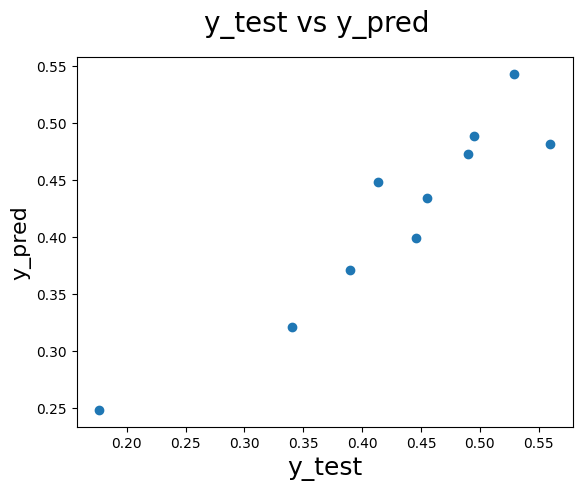

In [605]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [606]:
#Function to calculate the elasticity of the important KPIs
def calculateElasticity(df_train, gmv, coefficient_df):
    elasticity_values = []

    for feature in coefficient_df['feature']:
        feature_mean = df_train[feature].mean()
        coefficient_mean = coefficient_df.loc[coefficient_df['feature'] == feature, 'coefficient'].mean()
        elasticity_values.append((coefficient_mean * feature_mean) / gmv.mean())

    coefficient_df['elasticity'] = pd.Series(elasticity_values)
    return coefficient_df

In [607]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr4.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm4, y_train, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

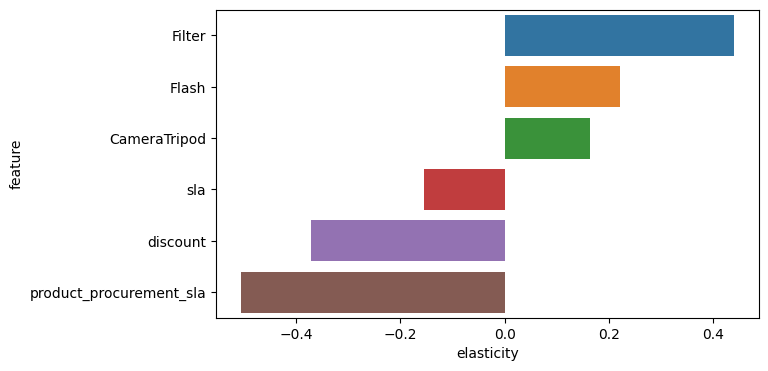

In [608]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

In [609]:
## Gaming Accessory - Basic Linear Model

# Creating df_game by dropping the features which the company cannot control
df_game= final_gaming_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [610]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   weekly_order               49 non-null     int64  
 1   Month                      49 non-null     int64  
 2   Year                       49 non-null     int64  
 3   adStock_TV                 49 non-null     float64
 4   adStock_Digital            49 non-null     float64
 5   adStock_Sponsorship        49 non-null     float64
 6   adStock_Content Marketing  49 non-null     float64
 7   adStock_Online marketing   49 non-null     float64
 8   adStock_ Affiliates        49 non-null     float64
 9   adStock_SEM                49 non-null     float64
 10  adStock_Radio              49 non-null     float64
 11  adStock_Other              49 non-null     float64
 12  gmv                        49 non-null     float64
 13  sla                        49 non-null     float64
 

In [611]:
## create train and test models
df_game_train, df_game_test = train_test_split(df_game, train_size = 0.8, test_size = 0.2, random_state = 100)

In [612]:
# Scaling the features using Min-Max scaling
scaler = MinMaxScaler()

# Define numerical variables for scaling
num_vars_to_scale = ['adStock_TV', 'adStock_Digital',
                     'adStock_Sponsorship', 'adStock_Content Marketing',
                     'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
                     'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
                     'product_procurement_sla', 'discount', 'NPS',
                     'total_special_sale_days',
                     'total_pay_days',
                     'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
                     'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
                     'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
                     'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
                     'TVOutCableAccessory']

# Apply Min-Max scaling to the training dataset
df_game_train[num_vars_to_scale] = scaler.fit_transform(df_game_train[num_vars_to_scale])

# Apply Min-Max scaling to the test dataset
df_game_test[num_vars_to_scale] = scaler.transform(df_game_test[num_vars_to_scale])


In [613]:
# assiging the values for x_train & y_train
y_game_train = df_game_train.pop('gmv')
X_game_train = df_game_train

In [614]:
# Running Recursive Feature Elimination (RFE) with the output number of variables equal to 20
lm = LinearRegression()
lm.fit(X_game_train, y_game_train)

rfe = RFE(lm, n_features_to_select=20)  # Running RFE
rfe.fit(X_game_train, y_game_train)


RFE(estimator=LinearRegression(), n_features_to_select=20)

In [615]:
## selecting the top 20 rfe features
cols = X_game_train.columns[rfe.support_]
cols

Index(['adStock_Digital', 'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_SEM', 'adStock_Radio',
       'adStock_Other', 'product_procurement_sla', 'NPS',
       'total_special_sale_days', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel'],
      dtype='object')

In [616]:
## checking the columns excluded by rfe
X_game_train.columns[~rfe.support_]

Index(['weekly_order', 'Month', 'Year', 'adStock_TV', 'adStock_ Affiliates',
       'sla', 'discount', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CoolingPad', 'GameControlMount', 'GamingHeadset',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [617]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_game_train[cols]

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe1)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     97.48
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.03e-14
Time:                        17:45:28   Log-Likelihood:                 101.59
No. Observations:                  39   AIC:                            -161.2
Df Residuals:                      18   BIC:                            -126.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
1             adStock_Digital  3551.49
5                 adStock_SEM  2578.91
6               adStock_Radio  1856.33
7               adStock_Other  1117.05
3   adStock_Content Marketing   765.19
0                       const   301.66
2         adStock_Sponsorship   281.93
20        JoystickGamingWheel    42.57
4    adStock_Online marketing    37.33
11                    GamePad    36.48
12         GamingAccessoryKit    28.72
15             GamingKeyboard    21.72
18             GamingMousePad    18.56
9                         NPS    15.47
17                GamingMouse    11.11
13              GamingAdapter    11.08
16           GamingMemoryCard     8.35
19              GamingSpeaker     6.00
14      GamingChargingStation     5.09
8     product_procurement_sla     4.10
10    total_special_sale_days     3.00

In [618]:
# removing the feature with The variable with the highest VIF is "adStock_Digital" with a VIF of 3551.49.
X_train1_new1= X_train_rfe1.drop(["adStock_Digital"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new1)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     63.88
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.56e-13
Time:                        17:45:28   Log-Likelihood:                 91.416
No. Observations:                  39   AIC:                            -142.8
Df Residuals:                      19   BIC:                            -109.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4                 adStock_SEM  191.33
2   adStock_Content Marketing  133.63
5               adStock_Radio  132.87
6               adStock_Other  113.51
0                       const  101.42
1         adStock_Sponsorship   34.66
10                    GamePad   33.54
11         GamingAccessoryKit   26.08
14             GamingKeyboard   21.17
19        JoystickGamingWheel   19.09
17             GamingMousePad   18.41
3    adStock_Online marketing   18.29
8                         NPS   11.76
12              GamingAdapter   11.05
16                GamingMouse   10.34
15           GamingMemoryCard    7.79
13      GamingChargingStation    5.07
18              GamingSpeaker    4.54
7     product_procurement_sla    3.80
9     total_special_sale_days    2.96

In [619]:
# removing the feature with highest VIF is "adStock_SEM" with a VIF of 191.33.
X_train1_new2= X_train1_new1.drop(["adStock_SEM"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new2)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     59.18
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.73e-13
Time:                        17:45:28   Log-Likelihood:                 87.930
No. Observations:                  39   AIC:                            -137.9
Df Residuals:                      20   BIC:                            -106.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4               adStock_Radio  116.04
5               adStock_Other   85.73
0                       const   66.41
9                     GamePad   32.82
10         GamingAccessoryKit   24.77
1         adStock_Sponsorship   24.30
13             GamingKeyboard   21.17
16             GamingMousePad   16.52
2   adStock_Content Marketing   16.11
18        JoystickGamingWheel   15.19
3    adStock_Online marketing   12.27
15                GamingMouse    8.83
11              GamingAdapter    7.98
7                         NPS    7.02
14           GamingMemoryCard    6.47
12      GamingChargingStation    5.07
17              GamingSpeaker    4.51
6     product_procurement_sla    3.80
8     total_special_sale_days    2.90

In [620]:
# removing the feature with Based on the VIF values, "adStock_Radio" has the highest VIF at 116.04, indicating a high level of multicollinearity.
X_train1_new3= X_train1_new2.drop(["adStock_Radio"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new3)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     60.93
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.52e-14
Time:                        17:45:29   Log-Likelihood:                 86.462
No. Observations:                  39   AIC:                            -136.9
Df Residuals:                      21   BIC:                            -107.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  52.09
8                     GamePad  32.70
9          GamingAccessoryKit  24.70
12             GamingKeyboard  19.93
15             GamingMousePad  16.13
1         adStock_Sponsorship  14.37
2   adStock_Content Marketing  10.75
14                GamingMouse   8.67
3    adStock_Online marketing   7.88
10              GamingAdapter   7.43
17        JoystickGamingWheel   6.64
13           GamingMemoryCard   6.05
6                         NPS   5.93
11      GamingChargingStation   4.82
16              GamingSpeaker   4.51
4               adStock_Other   4.11
5     product_procurement_sla   3.74
7     total_special_sale_days   2.75

In [621]:
# removing the feature with highest p-values
X_train1_new4= X_train1_new3.drop(["GamingAdapter"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new4)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     67.80
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.36e-15
Time:                        17:45:29   Log-Likelihood:                 86.455
No. Observations:                  39   AIC:                            -138.9
Df Residuals:                      22   BIC:                            -110.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  52.05
8                     GamePad  32.67
9          GamingAccessoryKit  22.70
11             GamingKeyboard  18.36
14             GamingMousePad  16.13
1         adStock_Sponsorship  14.25
2   adStock_Content Marketing  10.53
13                GamingMouse   7.75
3    adStock_Online marketing   6.88
16        JoystickGamingWheel   6.58
12           GamingMemoryCard   5.82
6                         NPS   5.79
10      GamingChargingStation   4.82
15              GamingSpeaker   4.50
4               adStock_Other   4.09
5     product_procurement_sla   3.67
7     total_special_sale_days   2.74

In [622]:
# removing the feature with highest p-values
X_train1_new5= X_train1_new4.drop(["GamePad"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new5)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     75.45
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.13e-16
Time:                        17:45:29   Log-Likelihood:                 86.415
No. Observations:                  39   AIC:                            -140.8
Df Residuals:                      23   BIC:                            -114.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  40.48
13             GamingMousePad  15.81
10             GamingKeyboard  14.28
1         adStock_Sponsorship  14.08
2   adStock_Content Marketing  10.47
12                GamingMouse   7.72
15        JoystickGamingWheel   6.56
8          GamingAccessoryKit   6.10
3    adStock_Online marketing   5.56
11           GamingMemoryCard   4.99
9       GamingChargingStation   4.59
14              GamingSpeaker   4.35
6                         NPS   4.10
4               adStock_Other   4.08
5     product_procurement_sla   3.67
7     total_special_sale_days   2.52

In [623]:
# removing the feature with Based on the VIF values, "adStock_Sponsorship" has the highest VIF at 14.08, indicating a potential issue of multicollinearity.
X_train1_new6 = X_train1_new5.drop(["adStock_Sponsorship"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new6)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     82.07
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           8.91e-17
Time:                        17:45:29   Log-Likelihood:                 85.891
No. Observations:                  39   AIC:                            -141.8
Df Residuals:                      24   BIC:                            -116.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  29.78
12             GamingMousePad  11.71
9              GamingKeyboard  11.03
11                GamingMouse   7.51
14        JoystickGamingWheel   6.51
2    adStock_Online marketing   4.96
10           GamingMemoryCard   4.78
13              GamingSpeaker   4.09
7          GamingAccessoryKit   4.04
8       GamingChargingStation   3.92
4     product_procurement_sla   3.62
5                         NPS   2.38
1   adStock_Content Marketing   2.35
6     total_special_sale_days   2.35
3               adStock_Other   2.27

In [624]:
# Based on the VIF values, "adStock_Content Marketing" has the highest VIF at 2.35, but it is generally considered acceptable. However, considering the p-value of "adStock_Content Marketing" (0.512), which is greater than the significance level of 0.05, it seems to be not statistically significant. Therefore, removing "adStock_Content Marketing" might be a reasonable choice to improve the overall model.
X_train1_new7 = X_train1_new6.drop(["adStock_Content Marketing"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new7)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     90.36
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.13e-17
Time:                        17:45:29   Log-Likelihood:                 85.534
No. Observations:                  39   AIC:                            -143.1
Df Residuals:                      25   BIC:                            -119.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                      const  27.26
11            GamingMousePad  11.24
8             GamingKeyboard  11.02
10               GamingMouse   6.97
13       JoystickGamingWheel   6.36
9           GamingMemoryCard   4.78
12             GamingSpeaker   4.02
6         GamingAccessoryKit   3.96
7      GamingChargingStation   3.92
1   adStock_Online marketing   3.49
3    product_procurement_sla   3.19
4                        NPS   2.38
5    total_special_sale_days   2.34
2              adStock_Other   2.22

In [625]:
# removing the feature with highest p-values
X_train1_new8 = X_train1_new7.drop(["GamingSpeaker"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new8)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     101.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.09e-18
Time:                        17:45:29   Log-Likelihood:                 85.532
No. Observations:                  39   AIC:                            -145.1
Df Residuals:                      26   BIC:                            -123.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                      const  26.89
11            GamingMousePad  11.05
8             GamingKeyboard  11.01
10               GamingMouse   6.96
9           GamingMemoryCard   4.38
7      GamingChargingStation   3.92
6         GamingAccessoryKit   3.86
12       JoystickGamingWheel   3.41
1   adStock_Online marketing   3.31
3    product_procurement_sla   3.17
4                        NPS   2.35
5    total_special_sale_days   2.21
2              adStock_Other   2.18

In [626]:
# removing the feature with highest p-values
X_train1_new9 = X_train1_new8.drop(["adStock_Other"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new9)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.03e-19
Time:                        17:45:30   Log-Likelihood:                 85.464
No. Observations:                  39   AIC:                            -146.9
Df Residuals:                      27   BIC:                            -127.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                      const  26.70
10            GamingMousePad  10.65
7             GamingKeyboard   9.80
9                GamingMouse   6.55
6      GamingChargingStation   3.92
8           GamingMemoryCard   3.61
5         GamingAccessoryKit   3.37
11       JoystickGamingWheel   3.36
2    product_procurement_sla   3.07
1   adStock_Online marketing   2.73
3                        NPS   2.34
4    total_special_sale_days   2.12

In [627]:
# Based on the VIF values and the p-values, "GamingMousePad" has a VIF of 10.65, and its p-value is 0.212, indicating that it is not statistically significant. Therefore, removing "GamingMousePad" might be a reasonable choice to improve the overall model.
X_train1_new10 = X_train1_new9.drop(["GamingMousePad"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new10)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     123.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.96e-20
Time:                        17:45:30   Log-Likelihood:                 84.319
No. Observations:                  39   AIC:                            -146.6
Df Residuals:                      28   BIC:                            -128.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                      const  24.82
9                GamingMouse   6.32
7             GamingKeyboard   5.44
6      GamingChargingStation   3.71
10       JoystickGamingWheel   3.23
8           GamingMemoryCard   3.22
5         GamingAccessoryKit   2.99
2    product_procurement_sla   2.88
1   adStock_Online marketing   2.72
3                        NPS   2.30
4    total_special_sale_days   1.98

In [628]:
# Based on high p values GamingChargingStation
X_train1_new11 = X_train1_new10.drop(["GamingChargingStation"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new11)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     132.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.17e-21
Time:                        17:45:30   Log-Likelihood:                 83.011
No. Observations:                  39   AIC:                            -146.0
Df Residuals:                      29   BIC:                            -129.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  24.82
8               GamingMouse   5.53
6            GamingKeyboard   5.27
9       JoystickGamingWheel   3.21
5        GamingAccessoryKit   2.98
2   product_procurement_sla   2.88
1  adStock_Online marketing   2.72
3                       NPS   2.27
7          GamingMemoryCard   1.57
4   total_special_sale_days   1.52

In [629]:
# Based on high p values total_special_sale_days
X_train1_new12 = X_train1_new11.drop(["total_special_sale_days"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new12)
# Create a first fitted model
lr = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     140.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.26e-21
Time:                        17:45:30   Log-Likelihood:                 81.228
No. Observations:                  39   AIC:                            -144.5
Df Residuals:                      30   BIC:                            -129.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  24.05
5            GamingKeyboard   4.99
7               GamingMouse   4.50
8       JoystickGamingWheel   3.20
4        GamingAccessoryKit   2.92
2   product_procurement_sla   2.87
1  adStock_Online marketing   2.68
3                       NPS   2.27
6          GamingMemoryCard   1.42

In [630]:
# Based on high p values JoystickGamingWheel
X_train1_new13 = X_train1_new12.drop(["JoystickGamingWheel"], axis = 1)

# Add a constant
X_train_lm1 = sm.add_constant(X_train1_new13)
# Create a first fitted model
lr1 = sm.OLS(y_game_train, X_train_lm1).fit()

# Display model summary
print(lr1.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     150.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.24e-22
Time:                        17:45:30   Log-Likelihood:                 79.320
No. Observations:                  39   AIC:                            -142.6
Df Residuals:                      31   BIC:                            -129.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  22.91
7               GamingMouse   4.45
5            GamingKeyboard   3.74
1  adStock_Online marketing   2.59
4        GamingAccessoryKit   2.50
3                       NPS   1.96
2   product_procurement_sla   1.60
6          GamingMemoryCard   1.42

choosing this model as the initial one because both the VIFs and p-values fall within acceptable ranges.

In [631]:
# Dropping the feature to see if the model is able to explain much variance with one less feature
X_train1_new14 = X_train1_new13.drop(["NPS"], axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train1_new14)
# Create a first fitted model
lr2 = sm.OLS(y_game_train, X_train_lm2).fit()

# Display model summary
print(lr2.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     129.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.24e-21
Time:                        17:45:30   Log-Likelihood:                 73.002
No. Observations:                  39   AIC:                            -132.0
Df Residuals:                      32   BIC:                            -120.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  15.49
6               GamingMouse   4.32
4            GamingKeyboard   3.74
3        GamingAccessoryKit   2.50
1  adStock_Online marketing   2.32
2   product_procurement_sla   1.44
5          GamingMemoryCard   1.29

In [632]:
## Based on high p values JoystickGamingWheel
X_train1_new15 = X_train1_new14.drop(["adStock_Online marketing"], axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train1_new15)
# Create a first fitted model
lr3 = sm.OLS(y_game_train, X_train_lm3).fit()

# Display model summary
print(lr3.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3.values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     130.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           9.27e-21
Time:                        17:45:30   Log-Likelihood:                 69.245
No. Observations:                  39   AIC:                            -126.5
Df Residuals:                      33   BIC:                            -116.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  13.79
5              GamingMouse   4.03
3           GamingKeyboard   3.64
2       GamingAccessoryKit   1.87
1  product_procurement_sla   1.41
4         GamingMemoryCard   1.08

In [633]:
## Based on high p values product_procurement_sla
X_train1_new16 = X_train1_new15.drop(["product_procurement_sla"], axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train1_new16)
# Create a first fitted model
lr4 = sm.OLS(y_game_train, X_train_lm4).fit()

# Display model summary
print(lr4.summary())

# Calculate and display VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm4.values, i) for i in range(X_train_lm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     133.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.94e-20
Time:                        17:45:30   Log-Likelihood:                 64.886
No. Observations:                  39   AIC:                            -119.8
Df Residuals:                      34   BIC:                            -111.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0102      0

Features   VIF
0               const  6.77
2      GamingKeyboard  3.63
4         GamingMouse  3.55
1  GamingAccessoryKit  1.57
3    GamingMemoryCard  1.06

In [634]:
#Checking performance of top 3 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3,X_train_lm4]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_game_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9219488186877056
lr model 2 r2_score 0.910061100399224
lr model 3 r2_score 0.8837655448853277
lr model 4 r2_score 0.8989736913230228


In [635]:
#Checking performance of top 4 models finding MSE
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3,X_train_lm4]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_game_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.002880132880169293
lr model 2 MSE 0.003375012955463742
lr model 3 MSE 0.004450783882587681
lr model 4 MSE 0.004448913681853692


based on both MSE and Adjusted R-squared, lr model 1 seems to be the most suitable model among the options

In [636]:
## Model Evaluation
y_test = df_game_test.pop('gmv')
X_test = df_game_test

In [637]:
X_test.shape

(10, 35)

In [638]:
X_test.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
6             37      9  2015    0.327323         0.050351   
20            51     12  2015    0.596939         0.153542   
33            64      3  2016    0.957191         0.100230   
28            59      2  2016    0.417190         0.088078   
42            73      5  2016    0.214315         0.019429   

    adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
6              0.456338                   0.112605                  0.416538   
20             0.497560                   0.235428                  0.761091   
33             0.362947                   0.099718                  0.640578   
28             0.107119                   0.202509                  0.863775   
42             0.368456                   0.228263                  0.977836   

    adStock_ Affiliates  adStock_SEM  ...  GamingChargingStation  \
6              0.417799     0.064987  ...               0.000000   
20             0.764995     0.212812  ...               0.285714   
33             0.702784     0.059857  ...               0.000000   
28             0.916833     0.076892  ...               0.571429   
42             0.926116     0.150537  ...               0.000000   

    GamingHeadset  GamingKeyboard  GamingMemoryCard  GamingMouse  \
6        0.109145        0.133188          0.205255     0.085418   
20       0.346927        0.168122          0.394089     0.134497   
33       0.269265        0.296943          0.070608     0.129778   
28       0.583508        0.200873          0.311987     0.131666   
42       0.596702        0.251092          0.096880     0.145352   

    GamingMousePad  GamingSpeaker  JoystickGamingWheel  MotionController  \
6         0.149378       0.000000             0.150000          0.272727   
20        0.286307       0.169492             0.155556          0.136364   
33        0.232365       0.135593             0.177778          0.409091   
28        0.307054       0.135593             0.022222          0.590909   
42        0.278008       0.542373             0.633333          0.772727   

    TVOutCableAccessory  
6              0.811594  
20             0.427536  
33             0.648551  
28             0.474638  
42             0.503623  

[5 rows x 35 columns]

In [639]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  adStock_Online marketing  product_procurement_sla       NPS  \
6     1.0                  0.416538                 0.499155  1.000000   
20    1.0                  0.761091                 0.384316  0.166891   
33    1.0                  0.640578                 0.379044  0.380340   
28    1.0                  0.863775                 0.376056  0.172859   
42    1.0                  0.977836                 0.100474  0.476577   
48    1.0                  0.274537                 0.166834  0.186581   
5     1.0                  0.277424                 0.485643  0.998618   
32    1.0                  0.668144                 0.384754  0.380340   
41    1.0                  0.958709                 0.164223  0.476577   
31    1.0                  0.725293                 0.271962  0.353139   

    GamingAccessoryKit  GamingKeyboard  GamingMemoryCard  GamingMouse  
6             0.459184        0.133188          0.205255     0.085418  
20            0.513605        0.168122          0.394089     0.134497  
33            0.721088        0.296943          0.070608     0.129778  
28            0.455782        0.200873          0.311987     0.131666  
42            0.676871        0.251092          0.096880     0.145352  
48            0.350340        0.150655          0.013136     0.062294  
5             0.391156        0.170306          0.014778     0.088013  
32            0.615646        0.362445          0.055829     0.236432  
41            0.615646        0.244541          0.087028     0.142992  
31            0.500000        0.264192          0.113300     0.158801

In [640]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

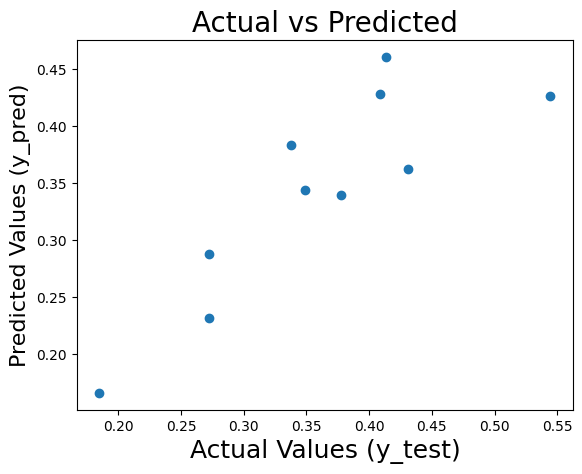

In [641]:
# Scatter plot to visualize the spread between y_test and y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)

# Plot details
ax.set_title('Actual vs Predicted', fontsize=20)     # Plot heading
ax.set_xlabel('Actual Values (y_test)', fontsize=18)  # X-label
ax.set_ylabel('Predicted Values (y_pred)', fontsize=16)  # Y-label

plt.show()

In [642]:
##
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_game_train, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

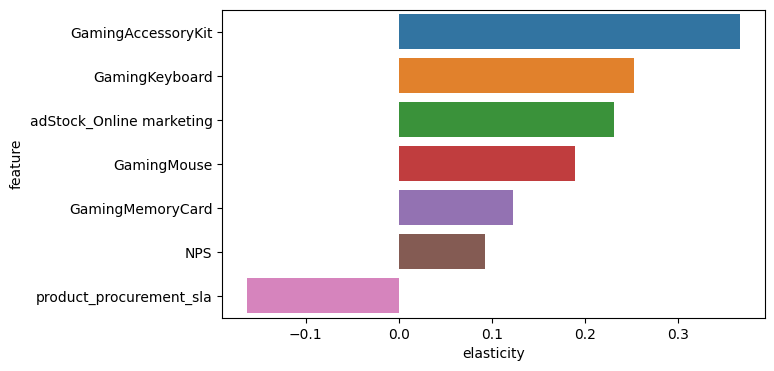

In [643]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

In [644]:
## Creating linear model for Home Audio Category
# Dropping the unnecessary features which the company cannot control from the Home Audio data frame with KPIs
df_home = final_home_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)
df_home.columns

Index(['weekly_order', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [645]:
df_home_train, df_home_test = train_test_split(df_home, train_size = 0.8, test_size = 0.2, random_state = 100)

In [646]:
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars2=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df_home_train[num_vars2] = scaler.fit_transform(df_home_train[num_vars2])
df_home_test[num_vars2] = scaler.fit_transform(df_home_test[num_vars2])

In [647]:
# assiging the values for x_train & y_train
y_train_2 = df_home_train.pop('gmv')
X_train_2 = df_home_train

In [648]:
lm = LinearRegression()
lm.fit(X_train_2, y_train_2)

# Running RFE with the output number of variables equal to 20
rfe = RFE(lm, n_features_to_select=20)
rfe.fit(X_train_2, y_train_2)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [649]:
## selecting the top 20 rfe features
cols = X_train_2.columns[rfe.support_]
cols

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'product_procurement_sla', 'NPS', 'DJController', 'Dock',
       'DockingStation', 'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker',
       'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [650]:
## checking the columns excluded by rfe
X_train_2.columns[~rfe.support_]

Index(['weekly_order', 'Month', 'sla', 'discount', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'SlingBox'],
      dtype='object')

In [651]:
X_train_rfe2 = X_train_2[cols]

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)
# Create a first fitted model
lr = sm.OLS(y_train_2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1097.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.04e-20
Time:                        17:45:34   Log-Likelihood:                 147.98
No. Observations:                  36   AIC:                            -254.0
Df Residuals:                      15   BIC:                            -220.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  3.399066e+09
8                 adStock_SEM  5.561600e+04
3             adStock_Digital  3.540236e+04
9               adStock_Radio  3.043466e+04
10              adStock_Other  2.666529e+04
7         adStock_ Affiliates  2.708110e+03
6    adStock_Online marketing  2.189680e+03
2                  adStock_TV  1.526740e+03
5   adStock_Content Marketing  7.074400e+02
4         adStock_Sponsorship  3.900800e+02
1                        Year  2.070700e+02
12                        NPS  1.033300e+02
16                    FMRadio  2.679000e+01
15             DockingStation  1.588000e+01
20              VoiceRecorder  1.185000e+01
18           HomeAudioSpeaker  1.183000e+01
14                       Dock  1.090000e+01
17                 HiFiSystem  8.900000e+00
11    product_procurement_sla  3.490000e+00
19                 SoundMixer  3.200000e+00
13               DJController  1.620000e+00

In [652]:
# removing the feature based on the highest p-value
X_train2_new= X_train_rfe2.drop(["adStock_Sponsorship"], axis = 1)
# Add a constant
X_train_lm2 = sm.add_constant(X_train2_new)

lr = sm.OLS(y_train_2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1227.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           8.68e-22
Time:                        17:45:34   Log-Likelihood:                 147.91
No. Observations:                  36   AIC:                            -255.8
Df Residuals:                      16   BIC:                            -224.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  6.149706e+08
7                 adStock_SEM  1.313643e+04
9               adStock_Other  8.024270e+03
8               adStock_Radio  7.960670e+03
3             adStock_Digital  6.508520e+03
6         adStock_ Affiliates  2.284050e+03
5    adStock_Online marketing  1.819750e+03
2                  adStock_TV  7.407800e+02
4   adStock_Content Marketing  6.765600e+02
1                        Year  3.745000e+01
11                        NPS  3.389000e+01
15                    FMRadio  2.589000e+01
14             DockingStation  1.376000e+01
19              VoiceRecorder  1.183000e+01
17           HomeAudioSpeaker  1.179000e+01
13                       Dock  1.073000e+01
16                 HiFiSystem  8.520000e+00
18                 SoundMixer  3.200000e+00
10    product_procurement_sla  2.790000e+00
12               DJController  1.560000e+00

In [653]:
# removing the feature with high VIF
X_train2_1= X_train2_new.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train2_1)

lr = sm.OLS(y_train_2, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1097.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.55e-22
Time:                        17:45:34   Log-Likelihood:                 143.84
No. Observations:                  36   AIC:                            -249.7
Df Residuals:                      17   BIC:                            -219.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.673163e+08
5    adStock_Online marketing  7.291500e+02
6         adStock_ Affiliates  5.806600e+02
4   adStock_Content Marketing  2.321200e+02
8               adStock_Other  1.715100e+02
3             adStock_Digital  1.658100e+02
7               adStock_Radio  1.643200e+02
2                  adStock_TV  1.431000e+01
13             DockingStation  1.360000e+01
14                    FMRadio  1.219000e+01
12                       Dock  1.073000e+01
1                        Year  1.018000e+01
16           HomeAudioSpeaker  9.120000e+00
15                 HiFiSystem  8.330000e+00
18              VoiceRecorder  7.560000e+00
10                        NPS  7.070000e+00
17                 SoundMixer  3.170000e+00
9     product_procurement_sla  2.110000e+00
11               DJController  1.420000e+00

In [654]:
## Remove adStock_Online marketing

X_train2_2= X_train2_1.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train2_2)

lr = sm.OLS(y_train_2, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1227.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.41e-24
Time:                        17:45:34   Log-Likelihood:                 143.79
No. Observations:                  36   AIC:                            -251.6
Df Residuals:                      18   BIC:                            -223.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.555688e+08
6               adStock_Radio  1.459300e+02
7               adStock_Other  1.319800e+02
3             adStock_Digital  9.887000e+01
4   adStock_Content Marketing  9.185000e+01
5         adStock_ Affiliates  1.820000e+01
12             DockingStation  1.328000e+01
2                  adStock_TV  1.246000e+01
13                    FMRadio  1.172000e+01
1                        Year  9.460000e+00
11                       Dock  8.630000e+00
14                 HiFiSystem  8.280000e+00
15           HomeAudioSpeaker  7.730000e+00
17              VoiceRecorder  7.320000e+00
9                         NPS  6.580000e+00
16                 SoundMixer  3.100000e+00
8     product_procurement_sla  1.900000e+00
10               DJController  1.390000e+00

In [655]:
## Remove adStock_Radio
## High VIF (145.93)
## High p-value (0.887)

X_train2_3= X_train2_2.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train2_3)

lr = sm.OLS(y_train_2, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1374.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.17e-25
Time:                        17:45:34   Log-Likelihood:                 143.77
No. Observations:                  36   AIC:                            -253.5
Df Residuals:                      19   BIC:                            -226.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.438889e+08
3             adStock_Digital  9.764000e+01
4   adStock_Content Marketing  8.904000e+01
5         adStock_ Affiliates  1.174000e+01
12                    FMRadio  1.062000e+01
11             DockingStation  9.300000e+00
6               adStock_Other  9.090000e+00
1                        Year  8.750000e+00
10                       Dock  8.240000e+00
13                 HiFiSystem  7.750000e+00
14           HomeAudioSpeaker  7.530000e+00
16              VoiceRecorder  7.210000e+00
2                  adStock_TV  6.660000e+00
8                         NPS  5.710000e+00
15                 SoundMixer  2.990000e+00
7     product_procurement_sla  1.830000e+00
9                DJController  1.380000e+00

In [656]:
# Based on the latest regression results and VIF values, consider removing the variable with the highest p-value and VIF to enhance the model:
# Variable to consider removing: adStock_Content Marketing
# High VIF (89.04)
# Borderline p-value (0.450)

X_train2_4= X_train2_3.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train2_4)

lr = sm.OLS(y_train_2, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1496.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.93e-27
Time:                        17:45:35   Log-Likelihood:                 143.22
No. Observations:                  36   AIC:                            -254.4
Df Residuals:                      20   BIC:                            -229.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features           VIF
0                     const  1.201708e+08
11                  FMRadio  9.010000e+00
10           DockingStation  8.370000e+00
9                      Dock  7.620000e+00
12               HiFiSystem  7.460000e+00
1                      Year  7.310000e+00
15            VoiceRecorder  7.190000e+00
13         HomeAudioSpeaker  6.510000e+00
3           adStock_Digital  3.680000e+00
4       adStock_ Affiliates  3.640000e+00
2                adStock_TV  3.390000e+00
14               SoundMixer  2.930000e+00
7                       NPS  2.770000e+00
5             adStock_Other  2.690000e+00
6   product_procurement_sla  1.620000e+00
8              DJController  1.380000e+00

In [657]:
# Based on the latest regression results and VIF values, consider removing the variable with the highest p-value and VIF to enhance the model:
# Variable to consider removing: adStock_Other

X_train2_5= X_train2_4.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train2_5)

lr = sm.OLS(y_train_2, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1676.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           9.70e-29
Time:                        17:45:35   Log-Likelihood:                 143.14
No. Observations:                  36   AIC:                            -256.3
Df Residuals:                      21   BIC:                            -232.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features          VIF
0                     const  93208728.17
10                  FMRadio         9.00
9            DockingStation         7.92
8                      Dock         7.25
14            VoiceRecorder         7.13
11               HiFiSystem         6.69
12         HomeAudioSpeaker         6.47
1                      Year         5.67
3           adStock_Digital         3.54
2                adStock_TV         3.36
4       adStock_ Affiliates         3.05
13               SoundMixer         2.91
6                       NPS         2.66
5   product_procurement_sla         1.53
7              DJController         1.33

In [658]:
## remove high p value for DJController

X_train2_6= X_train2_5.drop(["DJController"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train2_6)

lr = sm.OLS(y_train_2, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1875.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.38e-30
Time:                        17:45:35   Log-Likelihood:                 142.99
No. Observations:                  36   AIC:                            -258.0
Df Residuals:                      22   BIC:                            -235.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features          VIF
0                     const  92002237.20
9                   FMRadio         8.97
7                      Dock         7.25
8            DockingStation         6.93
13            VoiceRecorder         6.81
10               HiFiSystem         6.44
11         HomeAudioSpeaker         6.30
1                      Year         5.60
3           adStock_Digital         3.51
2                adStock_TV         3.35
4       adStock_ Affiliates         3.00
12               SoundMixer         2.87
6                       NPS         2.64
5   product_procurement_sla         1.42

In [659]:
## remove high p value for FMRadio

X_train2_7= X_train2_6.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train2_7)

lr = sm.OLS(y_train_2, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1384.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.82e-30
Time:                        17:45:35   Log-Likelihood:                 135.29
No. Observations:                  36   AIC:                            -244.6
Df Residuals:                      23   BIC:                            -224.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features          VIF
0                     const  81648245.12
7                      Dock         6.94
8            DockingStation         6.73
9                HiFiSystem         6.09
12            VoiceRecorder         6.05
10         HomeAudioSpeaker         5.01
1                      Year         4.97
2                adStock_TV         3.33
3           adStock_Digital         3.31
4       adStock_ Affiliates         2.95
11               SoundMixer         2.72
6                       NPS         2.50
5   product_procurement_sla         1.41

In [660]:
## remove high p value for DockingStation

X_train2_8= X_train2_7.drop(["DockingStation"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train2_8)

lr = sm.OLS(y_train_2, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1571.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.72e-31
Time:                        17:45:35   Log-Likelihood:                 135.24
No. Observations:                  36   AIC:                            -246.5
Df Residuals:                      24   BIC:                            -227.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features          VIF
0                     const  65918581.27
7                      Dock         6.93
11            VoiceRecorder         5.36
8                HiFiSystem         4.49
9          HomeAudioSpeaker         4.15
1                      Year         4.01
3           adStock_Digital         3.30
4       adStock_ Affiliates         2.84
10               SoundMixer         2.52
2                adStock_TV         2.33
6                       NPS         2.29
5   product_procurement_sla         1.41

In [661]:
## remove high p value for SoundMixer

X_train2_9= X_train2_8.drop(["SoundMixer"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train2_9)

lr = sm.OLS(y_train_2, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1775.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.67e-33
Time:                        17:45:35   Log-Likelihood:                 134.99
No. Observations:                  36   AIC:                            -248.0
Df Residuals:                      25   BIC:                            -230.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features          VIF
0                     const  59227992.17
7                      Dock         5.76
8                HiFiSystem         4.09
9          HomeAudioSpeaker         3.93
1                      Year         3.60
10            VoiceRecorder         3.39
4       adStock_ Affiliates         2.65
3           adStock_Digital         2.61
6                       NPS         2.21
2                adStock_TV         1.88
5   product_procurement_sla         1.41

In [662]:
## remove high p value for Dock

X_train2_10= X_train2_9.drop(["Dock"], axis = 1)
 # Add a constant
X_train_lm2_1 = sm.add_constant(X_train2_10)

lr1 = sm.OLS(y_train_2, X_train_lm2_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_1.values, i) for i in range(X_train_lm2_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1931.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.17e-34
Time:                        17:45:36   Log-Likelihood:                 133.90
No. Observations:                  36   AIC:                            -247.8
Df Residuals:                      26   BIC:                            -232.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features          VIF
0                    const  49202039.48
7               HiFiSystem         3.60
9            VoiceRecorder         3.27
1                     Year         2.99
8         HomeAudioSpeaker         2.65
4      adStock_ Affiliates         2.64
3          adStock_Digital         2.51
6                      NPS         2.16
2               adStock_TV         1.86
5  product_procurement_sla         1.37

In [663]:
## remove high p value for adStock_Digital

X_train2_11= X_train2_10.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm2_2 = sm.add_constant(X_train2_11)

lr2 = sm.OLS(y_train_2, X_train_lm2_2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_2.values, i) for i in range(X_train_lm2_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2099.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.16e-35
Time:                        17:45:36   Log-Likelihood:                 132.61
No. Observations:                  36   AIC:                            -247.2
Df Residuals:                      27   BIC:                            -233.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features          VIF
0                    const  48298566.88
6               HiFiSystem         3.41
8            VoiceRecorder         3.13
1                     Year         2.94
3      adStock_ Affiliates         2.60
7         HomeAudioSpeaker         2.35
5                      NPS         2.08
2               adStock_TV         1.78
4  product_procurement_sla         1.31

In [664]:
## remove high p value for adStock_TV

X_train2_12= X_train2_11.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm2_3 = sm.add_constant(X_train2_12)

lr3 = sm.OLS(y_train_2, X_train_lm2_3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_3.values, i) for i in range(X_train_lm2_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2290.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.05e-37
Time:                        17:45:36   Log-Likelihood:                 131.12
No. Observations:                  36   AIC:                            -246.2
Df Residuals:                      28   BIC:                            -233.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features          VIF
0                    const  48296236.88
7            VoiceRecorder         3.07
1                     Year         2.94
5               HiFiSystem         2.93
2      adStock_ Affiliates         2.50
6         HomeAudioSpeaker         2.30
4                      NPS         1.95
3  product_procurement_sla         1.25

In [665]:
## remove high p value for adStock_TV

X_train2_13 = X_train2_12.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm2_4 = sm.add_constant(X_train2_13)

lr4 = sm.OLS(y_train_2, X_train_lm2_4).fit()

lr4.params
print(lr4.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_4.values, i) for i in range(X_train_lm2_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2378.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.15e-37
Time:                        17:45:36   Log-Likelihood:                 128.40
No. Observations:                  36   AIC:                            -242.8
Df Residuals:                      29   BIC:                            -231.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  32.69
4               HiFiSystem   2.55
1      adStock_ Affiliates   2.27
5         HomeAudioSpeaker   2.27
3                      NPS   1.95
2  product_procurement_sla   1.23
6            VoiceRecorder   1.21

In [666]:
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm2_1, X_train_lm2_2,X_train_lm2_3,X_train_lm2_4]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train_2 , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9810716538366542
lr model 2 r2_score 0.9810282015287021
lr model 3 r2_score 0.9841040591143834
lr model 4 r2_score 0.9828682751767939


In [667]:
#Checking MSE of top 4 models
x_trains = [X_train_lm2_1, X_train_lm2_2,X_train_lm2_3,X_train_lm2_4]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train_2 , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 8.865414972456641e-05
lr model 2 MSE 8.232063728540542e-05
lr model 3 MSE 7.511539065873559e-05
lr model 4 MSE 8.567059632201446e-05


In summary, Model 3 is the preferred choice as it has the highest
�
2
R
2
  score and the lowest MSE, indicating better performance in explaining and predicting the target variable.

In [668]:
y_train_price = lr3.predict(X_train_lm2_3)

<ipython-input-669-65620f469b04>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Errors')

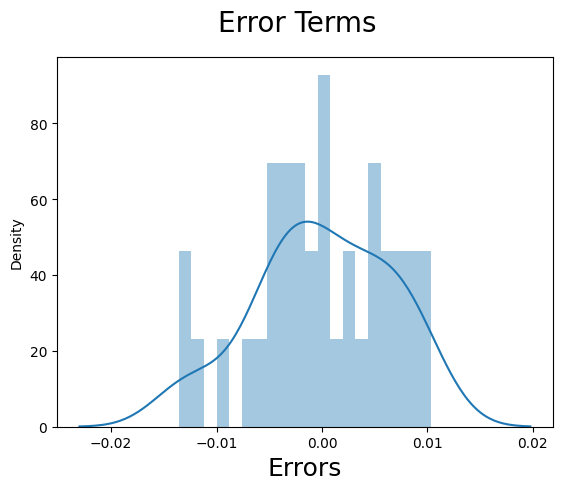

In [669]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_2 - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

Model Evaluation

In [670]:
y_test = df_home_test.pop('gmv')
X_test = df_home_test

In [671]:
X_test.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
6             41     10  2015    0.734279         1.000000   
17            52     12  2015    0.535482         0.177995   
19            54      1  2016    0.541968         0.072815   
29            64      3  2016    1.000000         0.102300   
38            73      5  2016    0.039826         0.000000   

    adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
6              1.000000                   1.000000                  0.902681   
17             0.503024                   0.287187                  0.685876   
19             0.206855                   0.308014                  0.830731   
29             0.304785                   0.104517                  0.520463   
38             0.311662                   0.262236                  1.000000   

    adStock_ Affiliates  adStock_SEM  ...   BoomBox  DJController      Dock  \
6              0.893650     1.000000  ...  0.471698           0.0  1.000000   
17             0.723830     0.254581  ...  0.415094           0.0  0.492537   
19             0.929063     0.155152  ...  0.169811           0.0  0.537313   
29             0.639578     0.052729  ...  0.000000           0.0  0.432836   
38             1.000000     0.166158  ...  0.094340           0.0  0.000000   

    DockingStation   FMRadio  HiFiSystem  HomeAudioSpeaker  SlingBox  \
6         0.133333  0.897590    0.277778          0.243655       1.0   
17        0.266667  0.572289    0.583333          0.784033       0.0   
19        0.000000  0.600402    0.472222          1.000000       0.0   
29        0.733333  0.714859    0.361111          0.471620       0.0   
38        1.000000  0.411647    0.166667          0.213659       0.0   

    SoundMixer  VoiceRecorder  
6          0.0       0.177215  
17         0.0       0.126582  
19         0.0       0.367089  
29         0.0       0.670886  
38         1.0       1.000000  

[5 rows x 30 columns]

In [672]:
X_test = X_test[X_train_lm2_3.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  Year  adStock_ Affiliates  product_procurement_sla       NPS  \
6     1.0  2015             0.893650                 0.194437  0.165410   
17    1.0  2015             0.723830                 0.114948  0.176371   
19    1.0  2016             0.929063                 1.000000  0.000000   
29    1.0  2016             0.639578                 0.242494  0.665421   
38    1.0  2016             1.000000                 0.452452  0.885915   
44    1.0  2016             0.000000                 0.268597  0.221486   
5     1.0  2015             0.711981                 0.000000  1.000000   
25    1.0  2016             0.959253                 0.313278  0.190045   
27    1.0  2016             0.770140                 0.513196  0.599837   

    HiFiSystem  HomeAudioSpeaker  VoiceRecorder  
6     0.277778          0.243655       0.177215  
17    0.583333          0.784033       0.126582  
19    0.472222          1.000000       0.367089  
29    0.361111          0.471620       0.670886  
38    0.166667          0.213659       1.000000  
44    0.000000          0.000000       0.000000  
5     0.527778          0.320258       0.025316  
25    0.277778          0.844485       0.670886  
27    1.000000          0.460545       0.556962

In [673]:
# Making predictions using the final model
y_pred = lr3.predict(X_test)

Text(0, 0.5, 'y_pred')

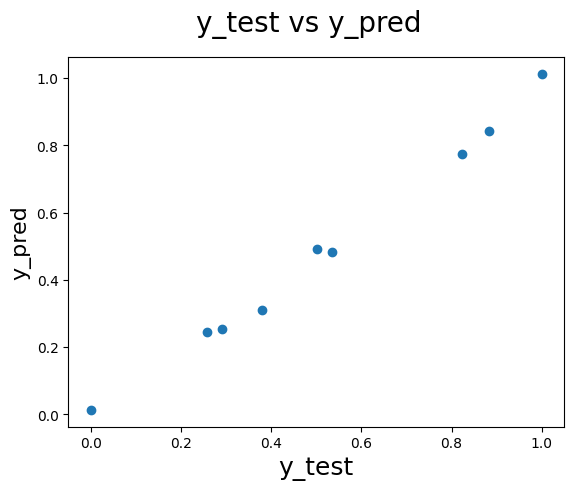

In [674]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [675]:
## Elasticity
coefficients_df = pd.DataFrame(pd.DataFrame(lr3.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2_3, y_train_2, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

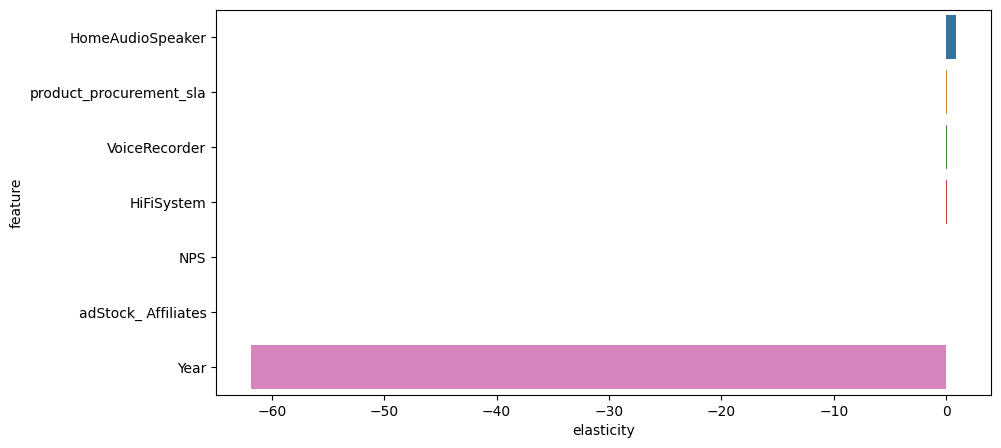

In [676]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

In [677]:
## Now Building Multiplicative Models
## For Camera Accessory


In [678]:
## Taking the dataset
final_camera_data.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
0            31      8  2015    0.052078         0.913194   
1            32      8  2015    0.027648         0.776115   
2            33      8  2015    0.014593         0.697681   
3            35      8  2015    0.004801         0.638856   
4            36      9  2015    0.777460         0.580839   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             2.003552                   0.000220                  0.343392   
1             1.267609                   0.000112                  0.204007   
2             0.870676                   0.000054                  0.129130   
3             0.572975                   0.000010                  0.072972   
4            12.815056                   0.122060                  3.307299   

   adStock_ Affiliates  adStock_SEM  ...  CameraTripod  ExtensionTube  Filter  \
0             0.146684     1.805811  ...         363.0            0.0   112.0   
1             0.091763     1.531288  ...           1.0            0.0     0.0   
2             0.062165     1.374402  ...           1.0            0.0     0.0   
3             0.039966     1.256738  ...           0.0            0.0     0.0   
4             1.025499     1.849175  ...         549.0            0.0   190.0   

   Flash  FlashShoeAdapter   Lens  ReflectorUmbrella  Softbox  Strap  \
0   26.0               0.0  233.0                0.0      0.0   23.0   
1    0.0               0.0    0.0                0.0      0.0    0.0   
2    0.0               0.0    0.0                0.0      0.0    0.0   
3    0.0               0.0    3.0                0.0      0.0    0.0   
4  179.0               0.0  314.0                0.0      0.0   13.0   

   Telescope  
0       13.0  
1        0.0  
2        0.0  
3        0.0  
4       33.0  

[5 rows x 47 columns]

In [679]:
#Replacing '0' with a small positive value like '0.0000001' is a common approach to avoid issues when taking the logarithm of zero in a dataset. This is often done in datasets where you are working with variables that should not have zero values when you are applying logarithmic transformations.
final_camera_data = final_camera_data.replace(0, 0.0000001)

In [680]:
final_camera_data.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
0            31      8  2015    0.052078         0.913194   
1            32      8  2015    0.027648         0.776115   
2            33      8  2015    0.014593         0.697681   
3            35      8  2015    0.004801         0.638856   
4            36      9  2015    0.777460         0.580839   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             2.003552                   0.000220                  0.343392   
1             1.267609                   0.000112                  0.204007   
2             0.870676                   0.000054                  0.129130   
3             0.572975                   0.000010                  0.072972   
4            12.815056                   0.122060                  3.307299   

   adStock_ Affiliates  adStock_SEM  ...  CameraTripod  ExtensionTube  \
0             0.146684     1.805811  ...  3.630000e+02   1.000000e-07   
1             0.091763     1.531288  ...  1.000000e+00   1.000000e-07   
2             0.062165     1.374402  ...  1.000000e+00   1.000000e-07   
3             0.039966     1.256738  ...  1.000000e-07   1.000000e-07   
4             1.025499     1.849175  ...  5.490000e+02   1.000000e-07   

         Filter         Flash  FlashShoeAdapter          Lens  \
0  1.120000e+02  2.600000e+01      1.000000e-07  2.330000e+02   
1  1.000000e-07  1.000000e-07      1.000000e-07  1.000000e-07   
2  1.000000e-07  1.000000e-07      1.000000e-07  1.000000e-07   
3  1.000000e-07  1.000000e-07      1.000000e-07  3.000000e+00   
4  1.900000e+02  1.790000e+02      1.000000e-07  3.140000e+02   

   ReflectorUmbrella       Softbox         Strap     Telescope  
0       1.000000e-07  1.000000e-07  2.300000e+01  1.300000e+01  
1       1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07  
2       1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07  
3       1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07  
4       1.000000e-07  1.000000e-07  1.300000e+01  3.300000e+01  

[5 rows x 47 columns]

In [681]:
## taking log and dropping un useful variables.
df = np.log(final_camera_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [682]:
df.head()

weekly_order     Month      Year  adStock_TV  adStock_Digital  \
0      3.433987  2.079442  7.608374   -2.955022        -0.090807   
1      3.465736  2.079442  7.608374   -3.588192        -0.253454   
2      3.496508  2.079442  7.608374   -4.227246        -0.359993   
3      3.555348  2.079442  7.608374   -5.338992        -0.448076   
4      3.583519  2.197225  7.608374   -0.251723        -0.543282   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             0.694922                  -8.420842                 -1.068883   
1             0.237133                  -9.099731                 -1.589601   
2            -0.138486                  -9.830514                 -2.046937   
3            -0.556913                 -11.478331                 -2.617679   
4             2.550621                  -2.103243                  1.196132   

   adStock_ Affiliates  adStock_SEM  ...  CameraTripod  ExtensionTube  \
0            -1.919477     0.591010  ...      5.894403     -16.118096   
1            -2.388548     0.426109  ...      0.000000     -16.118096   
2            -2.777968     0.318019  ...      0.000000     -16.118096   
3            -3.219724     0.228519  ...    -16.118096     -16.118096   
4             0.025179     0.614740  ...      6.308098     -16.118096   

      Filter      Flash  FlashShoeAdapter       Lens  ReflectorUmbrella  \
0   4.718499   3.258097        -16.118096   5.451038         -16.118096   
1 -16.118096 -16.118096        -16.118096 -16.118096         -16.118096   
2 -16.118096 -16.118096        -16.118096 -16.118096         -16.118096   
3 -16.118096 -16.118096        -16.118096   1.098612         -16.118096   
4   5.247024   5.187386        -16.118096   5.749393         -16.118096   

     Softbox      Strap  Telescope  
0 -16.118096   3.135494   2.564949  
1 -16.118096 -16.118096 -16.118096  
2 -16.118096 -16.118096 -16.118096  
3 -16.118096 -16.118096 -16.118096  
4 -16.118096   2.564949   3.496508  

[5 rows x 43 columns]

In [683]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [684]:
# scaling
scaler = MinMaxScaler()

In [685]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [686]:
# assigning x_traim amd y_train values
y_train = df_train.pop('gmv')
X_train = df_train

In [687]:
# Running Recursive Feature Elimination (RFE) to select the top 20 features
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

rfe = RFE(linear_model, n_features_to_select=20)  # running RFE
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=20)

In [688]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Online marketing',
       'adStock_SEM', 'adStock_Radio', 'adStock_Other', 'NPS', 'discount',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraFilmRolls', 'CameraRemoteControl',
       'CameraTripod', 'Flash', 'Lens', 'Strap'],
      dtype='object')

In [689]:
# neglecting the features other than top 20 features given by rfe
X_train.columns[~rfe.support_]

Index(['weekly_order', 'Month', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_ Affiliates', 'sla',
       'product_procurement_sla', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraEyeCup', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'ExtensionTube', 'Filter', 'FlashShoeAdapter', 'ReflectorUmbrella',
       'Softbox', 'Telescope'],
      dtype='object')

In [690]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [691]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1166.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.37e-23
Time:                        17:45:40   Log-Likelihood:                 134.11
No. Observations:                  38   AIC:                            -226.2
Df Residuals:                      17   BIC:                            -191.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  4.881686e+11
12             CameraBattery  6.575010e+03
11                 CameraBag  5.769600e+03
7              adStock_Other  5.576920e+03
6              adStock_Radio  3.783640e+03
13      CameraBatteryCharger  2.754420e+03
16       CameraRemoteControl  2.119110e+03
20                     Strap  1.583840e+03
10           CameraAccessory  7.593600e+02
1                       Year  5.190100e+02
19                      Lens  4.088200e+02
17              CameraTripod  3.817600e+02
18                     Flash  3.549700e+02
14         CameraBatteryGrip  1.999500e+02
4   adStock_Online marketing  1.883300e+02
2                 adStock_TV  1.668800e+02
15           CameraFilmRolls  1.516000e+02
5                adStock_SEM  8.264000e+01
3            adStock_Digital  5.254000e+01
9                   discount  7.280000e+00
8                        NPS  5.390000e+00

In [692]:
# Let's drop feature units with high VIF
X_train_new= X_train_rfe.drop(["CameraBattery"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1177.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.86e-24
Time:                        17:45:40   Log-Likelihood:                 132.23
No. Observations:                  38   AIC:                            -224.5
Df Residuals:                      18   BIC:                            -191.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  3.702857e+11
7              adStock_Other  4.954080e+03
6              adStock_Radio  3.582800e+03
11                 CameraBag  3.577510e+03
12      CameraBatteryCharger  2.155040e+03
15       CameraRemoteControl  2.101960e+03
19                     Strap  1.516200e+03
10           CameraAccessory  7.282600e+02
18                      Lens  3.966800e+02
1                       Year  3.936800e+02
16              CameraTripod  3.713500e+02
17                     Flash  3.091700e+02
13         CameraBatteryGrip  1.869500e+02
4   adStock_Online marketing  1.695300e+02
2                 adStock_TV  1.578300e+02
14           CameraFilmRolls  1.495600e+02
5                adStock_SEM  5.582000e+01
3            adStock_Digital  3.429000e+01
9                   discount  7.210000e+00
8                        NPS  4.570000e+00

In [693]:
# Let's drop featuree with highest p-value
X_train_new1 = X_train_new.drop(["CameraBatteryCharger"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1282.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.61e-25
Time:                        17:45:40   Log-Likelihood:                 131.81
No. Observations:                  38   AIC:                            -225.6
Df Residuals:                      19   BIC:                            -194.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  3.561002e+11
7              adStock_Other  4.949190e+03
6              adStock_Radio  3.573110e+03
11                 CameraBag  3.189030e+03
14       CameraRemoteControl  1.724350e+03
18                     Strap  1.193940e+03
10           CameraAccessory  5.741400e+02
17                      Lens  3.920100e+02
1                       Year  3.786000e+02
15              CameraTripod  3.676600e+02
16                     Flash  3.010800e+02
12         CameraBatteryGrip  1.777200e+02
4   adStock_Online marketing  1.622300e+02
2                 adStock_TV  1.520300e+02
13           CameraFilmRolls  1.494200e+02
5                adStock_SEM  5.554000e+01
3            adStock_Digital  3.370000e+01
9                   discount  7.210000e+00
8                        NPS  4.200000e+00

In [694]:
# Let's drop featuree with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     689.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.02e-24
Time:                        17:45:41   Log-Likelihood:                 117.96
No. Observations:                  38   AIC:                            -199.9
Df Residuals:                      20   BIC:                            -170.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  2.156793e+11
10                 CameraBag  3.024200e+03
13       CameraRemoteControl  1.718980e+03
17                     Strap  1.041300e+03
9            CameraAccessory  5.191600e+02
16                      Lens  3.730300e+02
14              CameraTripod  3.141200e+02
15                     Flash  2.959900e+02
1                       Year  2.293000e+02
6              adStock_Radio  1.903500e+02
11         CameraBatteryGrip  1.776800e+02
4   adStock_Online marketing  1.490100e+02
12           CameraFilmRolls  5.504000e+01
5                adStock_SEM  4.228000e+01
2                 adStock_TV  3.939000e+01
3            adStock_Digital  2.940000e+01
8                   discount  6.100000e+00
7                        NPS  3.210000e+00

In [695]:
# Let's drop featuree with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     768.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.13e-25
Time:                        17:45:41   Log-Likelihood:                 117.95
No. Observations:                  38   AIC:                            -201.9
Df Residuals:                      21   BIC:                            -174.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  9.610314e+09
9                  CameraBag  2.942120e+03
12       CameraRemoteControl  1.624500e+03
16                     Strap  8.985400e+02
8            CameraAccessory  4.901200e+02
15                      Lens  3.729000e+02
13              CameraTripod  3.141100e+02
14                     Flash  2.937100e+02
10         CameraBatteryGrip  1.635100e+02
4   adStock_Online marketing  1.442800e+02
11           CameraFilmRolls  5.382000e+01
5                adStock_SEM  3.811000e+01
2                 adStock_TV  3.773000e+01
3            adStock_Digital  2.546000e+01
1                       Year  1.021000e+01
7                   discount  5.860000e+00
6                        NPS  3.210000e+00

In [696]:
# Let's drop featuree with highest VIF
X_train_new4 = X_train_new3.drop(["CameraBag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     853.9
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.48e-27
Time:                        17:45:41   Log-Likelihood:                 117.85
No. Observations:                  38   AIC:                            -203.7
Df Residuals:                      22   BIC:                            -177.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  9.489823e+09
11       CameraRemoteControl  1.080170e+03
15                     Strap  5.771600e+02
8            CameraAccessory  4.897200e+02
14                      Lens  3.109400e+02
13                     Flash  2.802700e+02
12              CameraTripod  2.467500e+02
9          CameraBatteryGrip  1.537100e+02
4   adStock_Online marketing  9.551000e+01
2                 adStock_TV  3.767000e+01
10           CameraFilmRolls  3.528000e+01
5                adStock_SEM  2.598000e+01
3            adStock_Digital  1.706000e+01
1                       Year  1.009000e+01
7                   discount  4.850000e+00
6                        NPS  2.900000e+00

In [697]:
# Let's drop featuree with highest VIF
X_train_new5 = X_train_new4.drop(["CameraRemoteControl"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     892.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.21e-28
Time:                        17:45:41   Log-Likelihood:                 116.54
No. Observations:                  38   AIC:                            -203.1
Df Residuals:                      23   BIC:                            -178.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  7.872380e+09
8            CameraAccessory  4.811600e+02
14                     Strap  4.415100e+02
12                     Flash  2.679700e+02
13                      Lens  2.434000e+02
11              CameraTripod  1.939400e+02
9          CameraBatteryGrip  1.502400e+02
4   adStock_Online marketing  9.142000e+01
10           CameraFilmRolls  3.508000e+01
2                 adStock_TV  3.478000e+01
5                adStock_SEM  2.272000e+01
3            adStock_Digital  1.451000e+01
1                       Year  8.360000e+00
7                   discount  4.590000e+00
6                        NPS  2.680000e+00

In [698]:
# Let's drop featuree with highest p value
X_train_new6 = X_train_new5.drop(["Flash"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     912.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.93e-29
Time:                        17:45:41   Log-Likelihood:                 114.75
No. Observations:                  38   AIC:                            -201.5
Df Residuals:                      24   BIC:                            -178.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  5.310417e+09
8            CameraAccessory  4.495600e+02
13                     Strap  4.069000e+02
12                      Lens  1.811000e+02
11              CameraTripod  1.483300e+02
9          CameraBatteryGrip  1.466900e+02
4   adStock_Online marketing  9.139000e+01
2                 adStock_TV  3.337000e+01
10           CameraFilmRolls  3.056000e+01
5                adStock_SEM  2.205000e+01
3            adStock_Digital  1.435000e+01
1                       Year  5.640000e+00
7                   discount  4.590000e+00
6                        NPS  2.110000e+00

In [699]:
# Let's drop featuree with highest p value
X_train_new7 = X_train_new6.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     978.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.81e-30
Time:                        17:45:41   Log-Likelihood:                 113.78
No. Observations:                  38   AIC:                            -201.6
Df Residuals:                      25   BIC:                            -180.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  5.307481e+09
7            CameraAccessory  4.375100e+02
12                     Strap  3.751300e+02
11                      Lens  1.720800e+02
8          CameraBatteryGrip  1.429100e+02
10              CameraTripod  1.407700e+02
4   adStock_Online marketing  7.669000e+01
2                 adStock_TV  3.211000e+01
9            CameraFilmRolls  2.977000e+01
5                adStock_SEM  2.126000e+01
3            adStock_Digital  1.314000e+01
1                       Year  5.640000e+00
6                   discount  4.570000e+00

In [700]:
# Let's drop featuree with highest VIF
X_train_new8 = X_train_new7.drop(["CameraAccessory"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     836.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.23e-30
Time:                        17:45:41   Log-Likelihood:                 108.40
No. Observations:                  38   AIC:                            -192.8
Df Residuals:                      26   BIC:                            -173.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  5.005173e+09
11                     Strap  3.342200e+02
10                      Lens  1.346900e+02
7          CameraBatteryGrip  1.239900e+02
9               CameraTripod  1.030500e+02
4   adStock_Online marketing  7.651000e+01
8            CameraFilmRolls  2.814000e+01
2                 adStock_TV  2.760000e+01
5                adStock_SEM  2.041000e+01
3            adStock_Digital  1.226000e+01
1                       Year  5.320000e+00
6                   discount  3.960000e+00

In [701]:
# Let's drop featuree with highest pvalue
X_train_new9 = X_train_new8.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     942.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.20e-31
Time:                        17:45:42   Log-Likelihood:                 108.16
No. Observations:                  38   AIC:                            -194.3
Df Residuals:                      27   BIC:                            -176.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                      const  4.899619e+09
10                     Strap  3.094800e+02
9                       Lens  1.344800e+02
6          CameraBatteryGrip  1.101900e+02
8               CameraTripod  1.022400e+02
3   adStock_Online marketing  4.131000e+01
7            CameraFilmRolls  2.814000e+01
4                adStock_SEM  1.549000e+01
2            adStock_Digital  8.450000e+00
1                       Year  5.210000e+00
5                   discount  3.930000e+00

In [702]:
# Let's drop featuree with highest pvalue
X_train_new10 = X_train_new9.drop(["CameraBatteryGrip"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1038.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.60e-33
Time:                        17:45:42   Log-Likelihood:                 107.30
No. Observations:                  38   AIC:                            -194.6
Df Residuals:                      28   BIC:                            -178.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  4.203615e+09
9                     Strap  2.962700e+02
8                      Lens  1.167800e+02
7              CameraTripod  8.765000e+01
3  adStock_Online marketing  4.129000e+01
6           CameraFilmRolls  2.814000e+01
4               adStock_SEM  1.548000e+01
2           adStock_Digital  8.400000e+00
1                      Year  4.470000e+00
5                  discount  3.730000e+00

In [703]:
# Let's drop featuree with highest VIF
X_train_new11 = X_train_new10.drop(["Strap"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     438.9
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.04e-28
Time:                        17:45:42   Log-Likelihood:                 88.137
No. Observations:                  38   AIC:                            -158.3
Df Residuals:                      29   BIC:                            -143.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  2.979624e+09
3  adStock_Online marketing  4.118000e+01
6           CameraFilmRolls  2.793000e+01
4               adStock_SEM  1.474000e+01
2           adStock_Digital  8.310000e+00
8                      Lens  6.200000e+00
7              CameraTripod  3.660000e+00
5                  discount  3.330000e+00
1                      Year  3.170000e+00

In [704]:
# Let's drop featuree with highest VIF
X_train_new12 = X_train_new11.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     517.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.76e-29
Time:                        17:45:42   Log-Likelihood:                 88.090
No. Observations:                  38   AIC:                            -160.2
Df Residuals:                      30   BIC:                            -147.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  2.482487e+09
3  adStock_Online marketing  2.078000e+01
5           CameraFilmRolls  2.003000e+01
7                      Lens  5.620000e+00
6              CameraTripod  3.110000e+00
1                      Year  2.640000e+00
4                  discount  2.620000e+00
2           adStock_Digital  2.240000e+00

In [705]:
# Let's drop featuree with highest pvalue
X_train_new13 = X_train_new12.drop(["Lens"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     623.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.77e-31
Time:                        17:45:42   Log-Likelihood:                 88.079
No. Observations:                  38   AIC:                            -162.2
Df Residuals:                      31   BIC:                            -150.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features           VIF
0                     const  2.296221e+09
3  adStock_Online marketing  2.067000e+01
5           CameraFilmRolls  1.528000e+01
6              CameraTripod  3.090000e+00
1                      Year  2.440000e+00
2           adStock_Digital  2.160000e+00
4                  discount  1.220000e+00

In [706]:
# Let's drop featuree with highest pvalue
X_train_new14 = X_train_new13.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)

lr3 = sm.OLS(y_train, X_train_lm).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     766.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.63e-32
Time:                        17:45:42   Log-Likelihood:                 87.919
No. Observations:                  38   AIC:                            -163.8
Df Residuals:                      32   BIC:                            -154.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  41.84
2  adStock_Online marketing  20.41
4           CameraFilmRolls  15.22
5              CameraTripod   3.07
1           adStock_Digital   1.17
3                  discount   1.13

In [707]:
# Let's drop featuree with highest VIF
X_train_new15 = X_train_new14.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm_1 = sm.add_constant(X_train_new15)

lr1 = sm.OLS(y_train, X_train_lm_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1 .values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     845.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           9.92e-33
Time:                        17:45:42   Log-Likelihood:                 84.991
No. Observations:                  38   AIC:                            -160.0
Df Residuals:                      33   BIC:                            -151.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1190      0.029     

Features    VIF
0            const  41.78
4     CameraTripod   2.08
3  CameraFilmRolls   2.02
1  adStock_Digital   1.06
2         discount   1.03

In [708]:
# Let's drop featuree with highest VIF
X_train_new16 = X_train_new15.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm_2 = sm.add_constant(X_train_new16)

lr2 = sm.OLS(y_train, X_train_lm_2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2 .values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     912.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.53e-32
Time:                        17:45:42   Log-Likelihood:                 80.462
No. Observations:                  38   AIC:                            -152.9
Df Residuals:                      34   BIC:                            -146.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1308      0.032     

Features    VIF
0            const  41.02
3     CameraTripod   2.00
2  CameraFilmRolls   1.99
1         discount   1.01

In [709]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 2 models finding Adjusted R-squared
x_trains = [X_train_lm_1, X_train_lm_2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.6776604979833286
lr model 2 r2_score 0.7934762847502512


In [710]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 2 models finding Adjusted R-squared
x_trains = [X_train_lm_1, X_train_lm_2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.0018408835542435813
lr model 2 MSE 0.0020575937350109782


The model with a higher R-squared score and a lower Mean Squared Error (MSE) is generally considered better. In this case, "lr model 2" has a higher R-squared score (0.7935) and a slightly higher MSE (0.0021) compared to "lr model 1" (R-squared: 0.6777, MSE: 0.0018).

Therefore, based on the provided metrics, "lr model 2" seems to be the better-performing model.

In [711]:
y_train_price = lr2.predict(X_train_lm_2)

<ipython-input-712-f9aea80bd5b1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Errors')

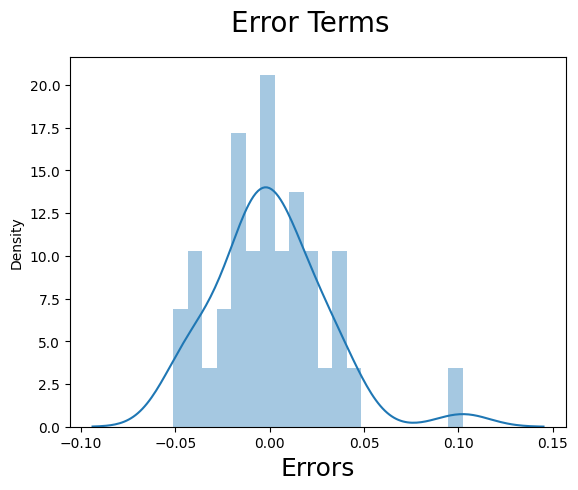

In [712]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [713]:
## Model evaluation
y_test = df_test.pop('gmv')
X_test = df_test

In [714]:
X_test.head()

weekly_order     Month      Year  adStock_TV  adStock_Digital  \
6       3.637586  2.197225  7.608374    0.443092         0.345968   
28      4.094345  0.693147  7.608871    0.448761         0.791250   
32      4.158883  1.098612  7.608871    1.000000         0.766004   
26      4.060443  0.693147  7.608871    0.581912         0.446608   
41      4.290459  1.609438  7.608871    0.093670         0.000000   

    adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
6              1.000000                   0.799376                  0.447787   
28             0.138482                   0.934996                  0.886854   
32             0.773645                   0.699259                  0.665393   
26             0.000000                   0.995739                  0.927885   
41             0.782482                   1.000000                  1.000000   

    adStock_ Affiliates  adStock_SEM  ...  CameraTripod  ExtensionTube  \
6              0.409598     0.442688  ...      0.749627       0.909213   
28             0.957519     0.466359  ...      0.830183       0.000000   
32             0.735209     0.337632  ...      0.707582       1.000000   
26             1.000000     0.426710  ...      0.715144       0.987413   
41             0.982312     0.822453  ...      0.603822       0.000000   

      Filter     Flash  FlashShoeAdapter      Lens  ReflectorUmbrella  \
6   0.663403  0.098186               0.0  0.402453                0.0   
28  0.663403  0.913984               0.0  0.562291                0.0   
32  0.675527  0.886557               0.0  0.356579                1.0   
26  0.770763  0.992604               0.0  0.589653                0.0   
41  0.591491  0.913441               0.0  0.904030                0.0   

    Softbox     Strap  Telescope  
6       0.0  0.000000   0.570546  
28      0.0  0.626665   0.513016  
32      0.0  0.669668   0.811727  
26      0.0  0.690257   0.852812  
41      1.0  0.820114   0.965490  

[5 rows x 42 columns]

In [715]:
X_test = X_test[X_train_lm_2.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  discount  CameraFilmRolls  CameraTripod
6     1.0  0.000000         0.107938      0.749627
28    1.0  0.208101         0.689754      0.830183
32    1.0  0.743123         0.597094      0.707582
26    1.0  0.581003         0.597094      0.715144
41    1.0  0.834289         1.000000      0.603822
47    1.0  0.453981         0.571097      0.000000
5     1.0  0.010746         0.000000      0.838175
40    1.0  1.000000         0.938042      0.747756
18    1.0  0.415350         0.609621      1.000000
31    1.0  0.492526         0.557594      0.752108

In [716]:
# Making predictions using the final model
y_pred = lr2.predict(X_test)

Text(0, 0.5, 'y_pred')

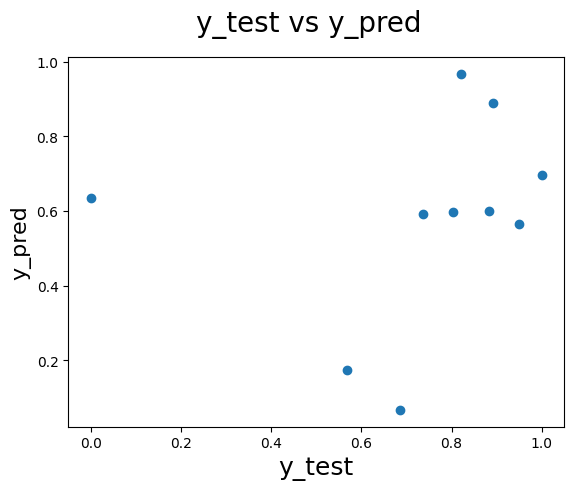

In [717]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [718]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr2.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm_2, y_train, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

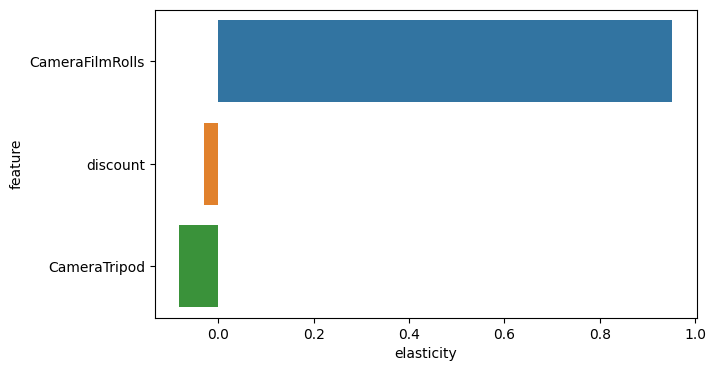

In [719]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

In [720]:
## Creating Multiplicative models for Gaming Accessory

# Replace '0.0' with '0.0000001' and take the log of the dataset to avoid NaN values for log 0
df_log = np.log(final_gaming_data.replace(0.0, 0.0000001).drop(['selling_price', 'units', 'product_mrp', 'total_transactions'], axis=1))


In [721]:
df_log.head()

weekly_order     Month      Year  adStock_TV  adStock_Digital  \
0      3.433987  2.079442  7.608374   -2.955022        -0.090807   
1      3.465736  2.079442  7.608374   -3.588192        -0.253454   
2      3.496508  2.079442  7.608374   -4.227246        -0.359993   
3      3.526361  2.079442  7.608374   -4.820265        -0.417845   
4      3.555348  2.079442  7.608374   -5.338992        -0.448076   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             0.694922                  -8.420842                 -1.068883   
1             0.237133                  -9.099731                 -1.589601   
2            -0.138486                  -9.830514                 -2.046937   
3            -0.397186                 -10.603470                 -2.389328   
4            -0.556913                 -11.478331                 -2.617679   

   adStock_ Affiliates  adStock_SEM  ...  GamingChargingStation  \
0            -1.919477     0.591010  ...             -16.118096   
1            -2.388548     0.426109  ...             -16.118096   
2            -2.777968     0.318019  ...             -16.118096   
3            -3.049858     0.259251  ...             -16.118096   
4            -3.219724     0.228519  ...             -16.118096   

   GamingHeadset  GamingKeyboard  GamingMemoryCard  GamingMouse  \
0       6.049733        4.262680          2.397895     5.446737   
1       0.000000      -16.118096        -16.118096   -16.118096   
2       0.000000      -16.118096        -16.118096   -16.118096   
3     -16.118096      -16.118096        -16.118096     0.000000   
4       0.000000      -16.118096        -16.118096   -16.118096   

   GamingMousePad  GamingSpeaker  JoystickGamingWheel  MotionController  \
0        3.663562       0.000000             2.833213          2.079442   
1      -16.118096     -16.118096           -16.118096        -16.118096   
2      -16.118096     -16.118096           -16.118096        -16.118096   
3      -16.118096     -16.118096           -16.118096        -16.118096   
4      -16.118096     -16.118096           -16.118096        -16.118096   

   TVOutCableAccessory  
0             4.369448  
1             0.000000  
2           -16.118096  
3           -16.118096  
4           -16.118096  

[5 rows x 36 columns]

In [722]:
#Test-train split
df_train, df_test = train_test_split(df_log, train_size = 0.8, test_size = 0.20, random_state = 100)

In [723]:
# initialising scaler
scaler = MinMaxScaler()

In [724]:
# Apply scaler() to all the columns except the categorical features
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS',
       'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [725]:
# assigning the values for x_train and y_train
y_train = df_train.pop('gmv')
X_train = df_train

In [726]:

# Initialize Linear Regression model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train, y_train)

# Running Recursive Feature Elimination (RFE) to select top 20 features
num_features_to_select = 20
rfe = RFE(lm, n_features_to_select=num_features_to_select)
rfe = rfe.fit(X_train, y_train)


In [727]:
# selecting the top 20 features given by rfe
cols = X_train.columns[rfe.support_]
cols

Index(['Month', 'Year', 'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Other', 'sla', 'product_procurement_sla', 'NPS', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'JoystickGamingWheel',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [728]:
# neglecting the features not selected in top 20 by rfe
X_train.columns[~rfe.support_]

Index(['weekly_order', 'adStock_TV', 'adStock_Digital', 'adStock_Radio',
       'discount', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'CoolingPad', 'GameControlMount',
       'GamingChargingStation', 'GamingHeadset', 'GamingMousePad',
       'GamingSpeaker'],
      dtype='object')

In [729]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [730]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     342.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.78e-19
Time:                        17:45:45   Log-Likelihood:                 112.51
No. Observations:                  39   AIC:                            -183.0
Df Residuals:                      18   BIC:                            -148.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  5.332228e+11
5    adStock_Online marketing  1.401330e+04
6         adStock_ Affiliates  1.114805e+04
14              GamingAdapter  4.047260e+03
13         GamingAccessoryKit  3.762060e+03
15             GamingKeyboard  1.583430e+03
8               adStock_Other  5.977700e+02
2                        Year  5.665100e+02
12                    GamePad  4.074400e+02
16           GamingMemoryCard  2.969800e+02
19           MotionController  2.841200e+02
4   adStock_Content Marketing  2.033800e+02
18        JoystickGamingWheel  1.994500e+02
17                GamingMouse  1.856900e+02
9                         sla  4.415000e+01
20        TVOutCableAccessory  2.994000e+01
1                       Month  2.331000e+01
3         adStock_Sponsorship  2.219000e+01
7                 adStock_SEM  1.754000e+01
11                        NPS  8.200000e+00
10    product_procurement_sla  4.350000e+00

In [731]:
# Let's drop feature  with highest p-value
X_train_new= X_train_rfe.drop(["MotionController"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     377.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.49e-20
Time:                        17:45:45   Log-Likelihood:                 112.36
No. Observations:                  39   AIC:                            -184.7
Df Residuals:                      19   BIC:                            -151.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  4.080456e+11
5    adStock_Online marketing  1.387207e+04
6         adStock_ Affiliates  1.107175e+04
13         GamingAccessoryKit  3.572940e+03
14              GamingAdapter  3.303560e+03
15             GamingKeyboard  1.376190e+03
8               adStock_Other  4.792300e+02
2                        Year  4.335100e+02
12                    GamePad  3.539100e+02
16           GamingMemoryCard  2.654800e+02
18        JoystickGamingWheel  1.980100e+02
4   adStock_Content Marketing  1.953800e+02
17                GamingMouse  1.670700e+02
9                         sla  4.246000e+01
19        TVOutCableAccessory  2.964000e+01
1                       Month  2.292000e+01
3         adStock_Sponsorship  2.187000e+01
7                 adStock_SEM  1.753000e+01
11                        NPS  6.980000e+00
10    product_procurement_sla  4.330000e+00

In [732]:
# Let's drop with highest p-value
X_train_new1 = X_train_new.drop(["GamingMemoryCard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     419.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.08e-22
Time:                        17:45:46   Log-Likelihood:                 112.36
No. Observations:                  39   AIC:                            -186.7
Df Residuals:                      20   BIC:                            -155.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  3.192118e+11
5    adStock_Online marketing  8.980000e+03
6         adStock_ Affiliates  7.103450e+03
14              GamingAdapter  3.242610e+03
13         GamingAccessoryKit  3.173100e+03
15             GamingKeyboard  1.244970e+03
8               adStock_Other  4.121600e+02
2                        Year  3.391400e+02
12                    GamePad  3.346000e+02
4   adStock_Content Marketing  1.854400e+02
16                GamingMouse  1.668700e+02
17        JoystickGamingWheel  1.630300e+02
9                         sla  4.224000e+01
18        TVOutCableAccessory  2.680000e+01
1                       Month  2.180000e+01
3         adStock_Sponsorship  2.122000e+01
7                 adStock_SEM  9.600000e+00
10    product_procurement_sla  4.050000e+00
11                        NPS  3.960000e+00

In [733]:
# Let's drop with highest VIF
X_train_new2 = X_train_new1.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.52e-22
Time:                        17:45:46   Log-Likelihood:                 107.43
No. Observations:                  39   AIC:                            -178.9
Df Residuals:                      21   BIC:                            -148.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  3.132285e+11
13              GamingAdapter  3.242110e+03
12         GamingAccessoryKit  2.898240e+03
14             GamingKeyboard  1.170910e+03
7               adStock_Other  4.054900e+02
11                    GamePad  3.343700e+02
2                        Year  3.327900e+02
15                GamingMouse  1.656700e+02
16        JoystickGamingWheel  1.164900e+02
5         adStock_ Affiliates  6.708000e+01
4   adStock_Content Marketing  5.193000e+01
8                         sla  4.165000e+01
17        TVOutCableAccessory  2.650000e+01
1                       Month  2.123000e+01
3         adStock_Sponsorship  2.122000e+01
6                 adStock_SEM  9.600000e+00
9     product_procurement_sla  3.760000e+00
10                        NPS  3.040000e+00

In [734]:
# Let's drop with highest pvalue
X_train_new3 = X_train_new2.drop(["GamingKeyboard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     402.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.20e-23
Time:                        17:45:46   Log-Likelihood:                 107.42
No. Observations:                  39   AIC:                            -180.8
Df Residuals:                      22   BIC:                            -152.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.077642e+11
12         GamingAccessoryKit  2.887650e+03
13              GamingAdapter  2.751740e+03
7               adStock_Other  2.853000e+02
2                        Year  2.207300e+02
11                    GamePad  1.904300e+02
14                GamingMouse  1.612100e+02
15        JoystickGamingWheel  1.164700e+02
5         adStock_ Affiliates  6.577000e+01
4   adStock_Content Marketing  4.725000e+01
8                         sla  3.577000e+01
3         adStock_Sponsorship  2.026000e+01
16        TVOutCableAccessory  1.798000e+01
1                       Month  1.733000e+01
6                 adStock_SEM  8.980000e+00
9     product_procurement_sla  3.410000e+00
10                        NPS  3.040000e+00

In [735]:
# Let's drop with highest VIF
X_train_new4 = X_train_new3.drop(["GamingAccessoryKit"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     383.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.22e-24
Time:                        17:45:46   Log-Likelihood:                 104.33
No. Observations:                  39   AIC:                            -176.7
Df Residuals:                      23   BIC:                            -150.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.000844e+11
12              GamingAdapter  4.836100e+02
7               adStock_Other  2.476600e+02
2                        Year  2.125700e+02
13                GamingMouse  1.602500e+02
11                    GamePad  1.359800e+02
14        JoystickGamingWheel  1.147100e+02
5         adStock_ Affiliates  5.642000e+01
4   adStock_Content Marketing  3.969000e+01
8                         sla  3.453000e+01
3         adStock_Sponsorship  2.017000e+01
15        TVOutCableAccessory  1.739000e+01
1                       Month  1.452000e+01
6                 adStock_SEM  7.190000e+00
9     product_procurement_sla  3.090000e+00
10                        NPS  3.040000e+00

In [736]:
# Let's drop with highest VIF
X_train_new5 = X_train_new4.drop(["GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     342.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.28e-24
Time:                        17:45:46   Log-Likelihood:                 99.963
No. Observations:                  39   AIC:                            -169.9
Df Residuals:                      24   BIC:                            -145.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.743824e+11
7               adStock_Other  2.148800e+02
2                        Year  1.852700e+02
11                    GamePad  1.280000e+02
13        JoystickGamingWheel  8.070000e+01
12                GamingMouse  5.477000e+01
4   adStock_Content Marketing  3.813000e+01
5         adStock_ Affiliates  3.240000e+01
3         adStock_Sponsorship  1.921000e+01
8                         sla  1.590000e+01
14        TVOutCableAccessory  1.496000e+01
1                       Month  1.435000e+01
6                 adStock_SEM  6.940000e+00
9     product_procurement_sla  3.080000e+00
10                        NPS  2.990000e+00

In [737]:
# Let's drop with highest VIF
X_train_new6 = X_train_new5.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     286.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.85e-24
Time:                        17:45:46   Log-Likelihood:                 94.314
No. Observations:                  39   AIC:                            -160.6
Df Residuals:                      25   BIC:                            -137.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.075616e+10
10                    GamePad  1.279900e+02
12        JoystickGamingWheel  8.063000e+01
11                GamingMouse  5.469000e+01
4   adStock_Content Marketing  3.796000e+01
5         adStock_ Affiliates  3.164000e+01
3         adStock_Sponsorship  1.882000e+01
7                         sla  1.581000e+01
13        TVOutCableAccessory  1.463000e+01
1                       Month  1.164000e+01
2                        Year  1.142000e+01
6                 adStock_SEM  6.870000e+00
8     product_procurement_sla  3.070000e+00
9                         NPS  2.810000e+00

In [738]:
# Let's drop with highest VIF
X_train_new8 = X_train_new6.drop(["GamePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     234.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.60e-23
Time:                        17:45:46   Log-Likelihood:                 88.123
No. Observations:                  39   AIC:                            -150.2
Df Residuals:                      26   BIC:                            -128.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  9.470615e+09
11        JoystickGamingWheel  5.647000e+01
10                GamingMouse  4.057000e+01
4   adStock_Content Marketing  2.973000e+01
5         adStock_ Affiliates  2.957000e+01
3         adStock_Sponsorship  1.865000e+01
12        TVOutCableAccessory  1.270000e+01
2                        Year  1.006000e+01
7                         sla  9.350000e+00
1                       Month  9.130000e+00
6                 adStock_SEM  6.480000e+00
9                         NPS  2.800000e+00
8     product_procurement_sla  2.340000e+00

In [739]:
# Let's drop with highest VIF
X_train_new9 = X_train_new8.drop(["JoystickGamingWheel"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     242.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.25e-24
Time:                        17:45:47   Log-Likelihood:                 86.348
No. Observations:                  39   AIC:                            -148.7
Df Residuals:                      27   BIC:                            -128.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  7.946514e+09
4   adStock_Content Marketing  2.972000e+01
5         adStock_ Affiliates  2.931000e+01
3         adStock_Sponsorship  1.484000e+01
11        TVOutCableAccessory  1.169000e+01
1                       Month  8.720000e+00
2                        Year  8.440000e+00
10                GamingMouse  7.720000e+00
6                 adStock_SEM  6.160000e+00
7                         sla  3.170000e+00
9                         NPS  2.790000e+00
8     product_procurement_sla  2.310000e+00

In [740]:
# Let's drop with highest VIF
X_train_new10 = X_train_new9.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     270.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.07e-25
Time:                        17:45:47   Log-Likelihood:                 85.946
No. Observations:                  39   AIC:                            -149.9
Df Residuals:                      28   BIC:                            -131.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  7.713492e+09
4   adStock_Content Marketing  2.950000e+01
5         adStock_ Affiliates  2.908000e+01
3         adStock_Sponsorship  1.470000e+01
1                       Month  8.510000e+00
2                        Year  8.190000e+00
6                 adStock_SEM  6.150000e+00
10        TVOutCableAccessory  4.740000e+00
9                 GamingMouse  4.040000e+00
8                         NPS  2.780000e+00
7     product_procurement_sla  1.950000e+00

In [741]:
# Let's drop with highest VIF
X_train_new11 = X_train_new10.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     98.25
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.79e-19
Time:                        17:45:47   Log-Likelihood:                 63.866
No. Observations:                  39   AIC:                            -107.7
Df Residuals:                      29   BIC:                            -91.10
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

Features           VIF
0                    const  7.040125e+09
3      adStock_Sponsorship  1.396000e+01
4      adStock_ Affiliates  1.363000e+01
2                     Year  7.480000e+00
1                    Month  7.270000e+00
5              adStock_SEM  5.150000e+00
9      TVOutCableAccessory  4.740000e+00
8              GamingMouse  4.000000e+00
7                      NPS  2.730000e+00
6  product_procurement_sla  1.840000e+00

In [742]:
# Let's drop with highest VIF
X_train_new12 = X_train_new11.drop(["Month"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     110.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.01e-20
Time:                        17:45:47   Log-Likelihood:                 63.251
No. Observations:                  39   AIC:                            -108.5
Df Residuals:                      30   BIC:                            -93.53
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

Features           VIF
0                    const  2.338883e+09
3      adStock_ Affiliates  1.067000e+01
2      adStock_Sponsorship  7.890000e+00
8      TVOutCableAccessory  4.690000e+00
4              adStock_SEM  4.380000e+00
7              GamingMouse  3.960000e+00
6                      NPS  2.520000e+00
1                     Year  2.480000e+00
5  product_procurement_sla  1.370000e+00

In [743]:
# Let's drop with highest VIF
X_train_new13 = X_train_new12.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     126.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.53e-21
Time:                        17:45:47   Log-Likelihood:                 62.621
No. Observations:                  39   AIC:                            -109.2
Df Residuals:                      31   BIC:                            -95.93
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -411.7652    

Features           VIF
0                const  2.200080e+09
3  adStock_ Affiliates  1.041000e+01
2  adStock_Sponsorship  7.020000e+00
7  TVOutCableAccessory  4.680000e+00
4          adStock_SEM  4.080000e+00
6          GamingMouse  3.870000e+00
1                 Year  2.340000e+00
5                  NPS  2.310000e+00

In [744]:
# Let's drop with highest VIF
X_train_new14 = X_train_new13.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     126.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.53e-21
Time:                        17:45:47   Log-Likelihood:                 62.621
No. Observations:                  39   AIC:                            -109.2
Df Residuals:                      31   BIC:                            -95.93
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -411.7652    

Features           VIF
0                const  2.200080e+09
3  adStock_ Affiliates  1.041000e+01
2  adStock_Sponsorship  7.020000e+00
7  TVOutCableAccessory  4.680000e+00
4          adStock_SEM  4.080000e+00
6          GamingMouse  3.870000e+00
1                 Year  2.340000e+00
5                  NPS  2.310000e+00

In [745]:
# Let's drop with highest p-value
X_train_new15 = X_train_new14.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm_1 = sm.add_constant(X_train_new15)
    # Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1 .values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.74e-22
Time:                        17:45:47   Log-Likelihood:                 59.968
No. Observations:                  39   AIC:                            -107.9
Df Residuals:                      33   BIC:                            -97.96
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0943    

Features    VIF
0                const  14.36
2  adStock_ Affiliates   6.17
1  adStock_Sponsorship   4.93
5  TVOutCableAccessory   4.66
4          GamingMouse   3.84
3          adStock_SEM   2.29

In [746]:
# Let's drop with highest VIF
X_train_new16 = X_train_new15.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm_2 = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm_2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2 .values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     26.62
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.66e-10
Time:                        17:45:47   Log-Likelihood:                 24.260
No. Observations:                  39   AIC:                            -38.52
Df Residuals:                      34   BIC:                            -30.20
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0259    

Features    VIF
0                const  14.03
1  adStock_Sponsorship   4.72
4  TVOutCableAccessory   3.61
3          GamingMouse   3.07
2          adStock_SEM   2.27

In [747]:
# Let's drop with highest p-value
X_train_new17 = X_train_new16.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm_3 = sm.add_constant(X_train_new17)
    # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm_3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_3 .values, i) for i in range(X_train_lm_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     34.79
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.32e-10
Time:                        17:45:47   Log-Likelihood:                 23.543
No. Observations:                  39   AIC:                            -39.09
Df Residuals:                      35   BIC:                            -32.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0264    

Features    VIF
0                const  14.03
3  TVOutCableAccessory   3.45
2          GamingMouse   3.06
1  adStock_Sponsorship   2.56

In [748]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top model finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2,X_train_lm_3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9307506962214175
lr model 2 r2_score 0.5231174298395302
lr model 3 r2_score 0.49376695306299945


In [749]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2,X_train_lm_3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.004650781308274484
lr model 2 MSE 0.036027059082512705
lr model 3 MSE 0.03808494829911536


Model 1 is the best linear regression model among the three.

In [750]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm_1, y_train, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

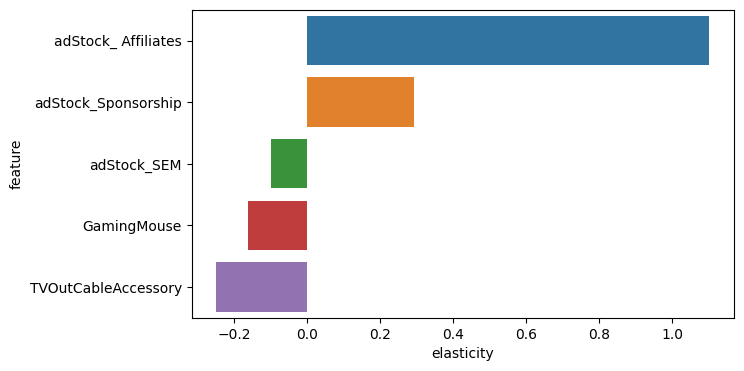

In [751]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

In [752]:
## Residual Analysis
y_train_price = lr1.predict(X_train_lm_1)

<ipython-input-753-f9aea80bd5b1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Errors')

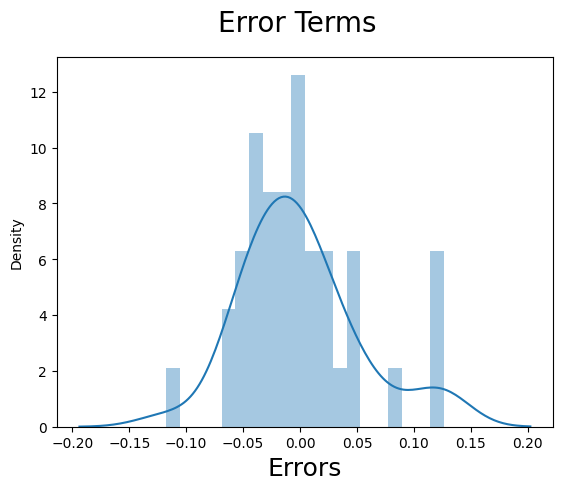

In [753]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [754]:
## model Evaluation
y_test = df_test.pop('gmv')
X_test = df_test

In [755]:
X_test = X_test[X_train_lm_1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test.head()

const  adStock_Sponsorship  adStock_ Affiliates  adStock_SEM  GamingMouse  \
6     1.0             0.941655             0.334965     0.351450     0.236688   
20    1.0             1.000000             0.839500     1.000000     0.577062   
33    1.0             0.787948             0.768412     0.318915     0.550283   
28    1.0             0.000000             0.991531     0.423017     0.561109   
42    1.0             0.798023             1.000000     0.776860     0.635249   

    TVOutCableAccessory  
6              1.000000  
20             0.507245  
33             0.827595  
28             0.587592  
42             0.633162

In [756]:
# Making predictions using the model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

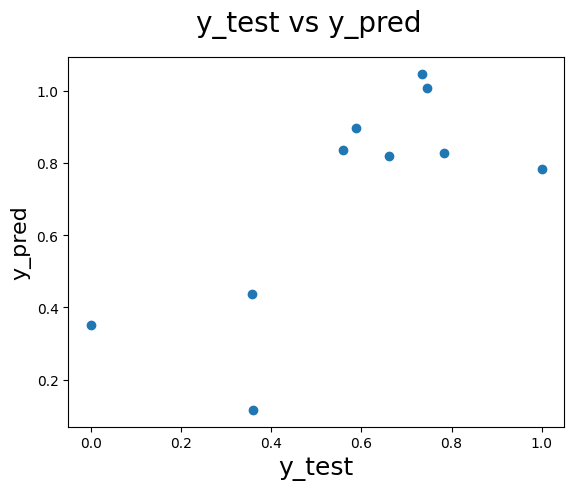

In [757]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [758]:
## Creating model for Home Audio : Multiplicative Model
df_log = np.log(final_home_data.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [759]:
#Checking the dataset
df.head()

weekly_order     Month      Year  adStock_TV  adStock_Digital  \
0      3.433987  2.079442  7.608374   -2.955022        -0.090807   
1      3.465736  2.079442  7.608374   -3.588192        -0.253454   
2      3.496508  2.079442  7.608374   -4.227246        -0.359993   
3      3.555348  2.079442  7.608374   -5.338992        -0.448076   
4      3.583519  2.197225  7.608374   -0.251723        -0.543282   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             0.694922                  -8.420842                 -1.068883   
1             0.237133                  -9.099731                 -1.589601   
2            -0.138486                  -9.830514                 -2.046937   
3            -0.556913                 -11.478331                 -2.617679   
4             2.550621                  -2.103243                  1.196132   

   adStock_ Affiliates  adStock_SEM  ...  CameraTripod  ExtensionTube  \
0            -1.919477     0.591010  ...      5.894403     -16.118096   
1            -2.388548     0.426109  ...      0.000000     -16.118096   
2            -2.777968     0.318019  ...      0.000000     -16.118096   
3            -3.219724     0.228519  ...    -16.118096     -16.118096   
4             0.025179     0.614740  ...      6.308098     -16.118096   

      Filter      Flash  FlashShoeAdapter       Lens  ReflectorUmbrella  \
0   4.718499   3.258097        -16.118096   5.451038         -16.118096   
1 -16.118096 -16.118096        -16.118096 -16.118096         -16.118096   
2 -16.118096 -16.118096        -16.118096 -16.118096         -16.118096   
3 -16.118096 -16.118096        -16.118096   1.098612         -16.118096   
4   5.247024   5.187386        -16.118096   5.749393         -16.118096   

     Softbox      Strap  Telescope  
0 -16.118096   3.135494   2.564949  
1 -16.118096 -16.118096 -16.118096  
2 -16.118096 -16.118096 -16.118096  
3 -16.118096 -16.118096 -16.118096  
4 -16.118096   2.564949   3.496508  

[5 rows x 43 columns]

In [760]:
#Test-train split
df_train, df_test = train_test_split(df_log, train_size = 0.8, test_size = 0.2, random_state = 100)

In [761]:
scaler = MinMaxScaler()

In [762]:
# Apply scaler() to all the columns except the categorical ones
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [763]:
y_train = df_train.pop('gmv')
X_train = df_train

In [764]:
# Initialize Linear Regression model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train, y_train)

# Running Recursive Feature Elimination (RFE) to select top 20 features
num_features_to_select = 20
rfe = RFE(lm, n_features_to_select=num_features_to_select)
rfe = rfe.fit(X_train, y_train)

In [765]:
#Extracting selected columns by RFE into a list
cols = X_train.columns[rfe.support_]
cols

Index(['weekly_order', 'Month', 'Year', 'adStock_TV', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'product_procurement_sla', 'discount', 'total_special_sale_days',
       'BoomBox', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'VoiceRecorder'],
      dtype='object')

In [766]:
#Columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['adStock_Digital', 'sla', 'NPS', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'DJController', 'Dock', 'SlingBox',
       'SoundMixer'],
      dtype='object')

In [767]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [768]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5690.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.33e-25
Time:                        17:45:50   Log-Likelihood:                 178.99
No. Observations:                  36   AIC:                            -316.0
Df Residuals:                      15   BIC:                            -282.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  9.393262e+11
7    adStock_Online marketing  5.514160e+03
8         adStock_ Affiliates  5.130720e+03
11              adStock_Other  4.637720e+03
10              adStock_Radio  2.678390e+03
3                        Year  9.864000e+02
17                    FMRadio  4.354000e+02
20              VoiceRecorder  3.000600e+02
18                 HiFiSystem  1.651400e+02
19           HomeAudioSpeaker  1.253200e+02
4                  adStock_TV  1.216300e+02
6   adStock_Content Marketing  9.108000e+01
15                    BoomBox  8.510000e+01
2                       Month  5.609000e+01
1                weekly_order  3.830000e+01
5         adStock_Sponsorship  3.787000e+01
13                   discount  3.140000e+01
9                 adStock_SEM  2.613000e+01
12    product_procurement_sla  6.560000e+00
16             DockingStation  6.440000e+00
14    total_special_sale_days  2.480000e+00

In [769]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["total_special_sale_days"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6383.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.63e-27
Time:                        17:45:50   Log-Likelihood:                 178.98
No. Observations:                  36   AIC:                            -318.0
Df Residuals:                      16   BIC:                            -286.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  9.207932e+11
7    adStock_Online marketing  5.509230e+03
8         adStock_ Affiliates  5.128110e+03
11              adStock_Other  4.212520e+03
10              adStock_Radio  2.434240e+03
3                        Year  9.669600e+02
16                    FMRadio  4.273500e+02
19              VoiceRecorder  2.982100e+02
17                 HiFiSystem  1.649500e+02
4                  adStock_TV  1.200900e+02
18           HomeAudioSpeaker  1.134400e+02
6   adStock_Content Marketing  9.103000e+01
14                    BoomBox  8.120000e+01
2                       Month  5.515000e+01
1                weekly_order  3.819000e+01
5         adStock_Sponsorship  3.753000e+01
13                   discount  3.116000e+01
9                 adStock_SEM  2.608000e+01
15             DockingStation  6.440000e+00
12    product_procurement_sla  6.150000e+00

In [770]:
# Let's drop feature with highest p-value
X_train_new1 = X_train_new.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     7050.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.13e-29
Time:                        17:45:50   Log-Likelihood:                 178.70
No. Observations:                  36   AIC:                            -319.4
Df Residuals:                      17   BIC:                            -289.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
6    adStock_Online marketing  4745.62
7         adStock_ Affiliates  4475.72
0                       const  3826.43
10              adStock_Other  2156.59
9               adStock_Radio  1995.49
15                    FMRadio   426.85
18              VoiceRecorder   275.67
16                 HiFiSystem   146.92
17           HomeAudioSpeaker   110.09
13                    BoomBox    79.53
5   adStock_Content Marketing    74.68
3                  adStock_TV    51.08
2                       Month    40.23
4         adStock_Sponsorship    35.43
12                   discount    31.02
1                weekly_order    23.17
8                 adStock_SEM    11.10
11    product_procurement_sla     6.15
14             DockingStation     5.82

In [771]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     7806.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.61e-31
Time:                        17:45:50   Log-Likelihood:                 178.48
No. Observations:                  36   AIC:                            -321.0
Df Residuals:                      18   BIC:                            -292.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
0                       const  3609.45
9               adStock_Other  1798.95
8               adStock_Radio  1704.90
14                    FMRadio   384.68
17              VoiceRecorder   208.44
15                 HiFiSystem   143.54
16           HomeAudioSpeaker   102.44
12                    BoomBox    79.37
5   adStock_Content Marketing    54.19
6         adStock_ Affiliates    48.31
2                       Month    35.57
3                  adStock_TV    30.88
11                   discount    30.56
1                weekly_order    22.80
4         adStock_Sponsorship    18.69
7                 adStock_SEM    11.09
10    product_procurement_sla     6.09
13             DockingStation     5.39

In [772]:
# Let's drop feature with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     8753.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.71e-33
Time:                        17:45:50   Log-Likelihood:                 178.47
No. Observations:                  36   AIC:                            -322.9
Df Residuals:                      19   BIC:                            -296.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
0                       const  3553.93
8               adStock_Other  1317.37
7               adStock_Radio  1158.35
13                    FMRadio   337.94
16              VoiceRecorder   205.51
14                 HiFiSystem   136.00
15           HomeAudioSpeaker    90.97
11                    BoomBox    69.03
4   adStock_Content Marketing    49.26
2                       Month    31.55
5         adStock_ Affiliates    30.58
10                   discount    29.63
1                weekly_order    22.78
3         adStock_Sponsorship    14.57
6                 adStock_SEM    11.08
9     product_procurement_sla     5.99
12             DockingStation     5.33

In [773]:
# Let's drop feature with highest p-value
X_train_new4 = X_train_new3.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9653.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.18e-35
Time:                        17:45:50   Log-Likelihood:                 178.15
No. Observations:                  36   AIC:                            -324.3
Df Residuals:                      20   BIC:                            -299.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
0                       const  3442.80
8               adStock_Other  1274.79
7               adStock_Radio  1112.31
12                    FMRadio   293.09
15              VoiceRecorder   203.62
13                 HiFiSystem   132.13
10                    BoomBox    67.88
4   adStock_Content Marketing    46.97
14           HomeAudioSpeaker    37.89
2                       Month    31.55
1                weekly_order    22.22
5         adStock_ Affiliates    21.46
3         adStock_Sponsorship    13.43
6                 adStock_SEM    10.66
11             DockingStation     4.75
9     product_procurement_sla     2.64

In [774]:
# Let's drop feature with highest p-value
X_train_new5 = X_train_new4.drop(["Month"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.042e+04
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.57e-37
Time:                        17:45:50   Log-Likelihood:                 177.41
No. Observations:                  36   AIC:                            -324.8
Df Residuals:                      21   BIC:                            -301.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
0                       const  2780.06
6               adStock_Radio   757.15
7               adStock_Other   674.87
11                    FMRadio   268.04
14              VoiceRecorder   188.63
12                 HiFiSystem   131.70
9                     BoomBox    62.51
13           HomeAudioSpeaker    36.67
3   adStock_Content Marketing    36.17
4         adStock_ Affiliates    21.03
1                weekly_order    13.62
5                 adStock_SEM    10.64
2         adStock_Sponsorship     6.95
10             DockingStation     4.36
8     product_procurement_sla     2.64

In [775]:
# Let's drop feature with highest p-value
X_train_new6 = X_train_new5.drop(["weekly_order"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.50e-39
Time:                        17:45:50   Log-Likelihood:                 176.65
No. Observations:                  36   AIC:                            -325.3
Df Residuals:                      22   BIC:                            -303.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5               adStock_Radio  489.84
6               adStock_Other  464.67
10                    FMRadio  260.82
13              VoiceRecorder  157.85
11                 HiFiSystem  131.45
8                     BoomBox   61.44
0                       const   35.86
12           HomeAudioSpeaker   35.28
2   adStock_Content Marketing   21.62
3         adStock_ Affiliates   20.26
4                 adStock_SEM    9.22
1         adStock_Sponsorship    6.79
9              DockingStation    3.92
7     product_procurement_sla    2.63

In [776]:
# Let's drop feature with highest VIF
X_train_new7 = X_train_new6.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9817.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.14e-39
Time:                        17:45:50   Log-Likelihood:                 171.92
No. Observations:                  36   AIC:                            -317.8
Df Residuals:                      23   BIC:                            -297.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
9                     FMRadio  253.07
12              VoiceRecorder  137.00
10                 HiFiSystem  125.10
7                     BoomBox   60.33
0                       const   35.85
11           HomeAudioSpeaker   33.15
3         adStock_ Affiliates   19.38
2   adStock_Content Marketing   12.73
4                 adStock_SEM    9.14
5               adStock_Other    7.22
1         adStock_Sponsorship    6.62
8              DockingStation    3.77
6     product_procurement_sla    2.40

In [777]:
# Let's drop feature with highest p-value
X_train_new8 = X_train_new7.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.104e+04
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.21e-41
Time:                        17:45:50   Log-Likelihood:                 171.70
No. Observations:                  36   AIC:                            -319.4
Df Residuals:                      24   BIC:                            -300.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
8                     FMRadio  149.95
9                  HiFiSystem  122.97
6                     BoomBox   60.25
11              VoiceRecorder   51.74
0                       const   35.84
10           HomeAudioSpeaker   33.00
3         adStock_ Affiliates   19.30
2   adStock_Content Marketing   11.53
4                 adStock_SEM    9.06
1         adStock_Sponsorship    6.01
7              DockingStation    3.63
5     product_procurement_sla    2.34

In [778]:
# Let's drop feature with highest VIF
X_train_new9 = X_train_new8.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9191.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.62e-42
Time:                        17:45:51   Log-Likelihood:                 165.96
No. Observations:                  36   AIC:                            -309.9
Df Residuals:                      25   BIC:                            -292.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
8                  HiFiSystem  100.13
6                     BoomBox   45.73
10              VoiceRecorder   45.59
0                       const   35.80
9            HomeAudioSpeaker   32.15
3         adStock_ Affiliates   19.30
2   adStock_Content Marketing   11.41
4                 adStock_SEM    9.03
1         adStock_Sponsorship    5.99
7              DockingStation    3.62
5     product_procurement_sla    2.28

In [779]:
# Let's drop feature with highest VIF
X_train_new10 = X_train_new9.drop(["HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     8663.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.42e-43
Time:                        17:45:51   Log-Likelihood:                 162.29
No. Observations:                  36   AIC:                            -304.6
Df Residuals:                      26   BIC:                            -288.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
9              VoiceRecorder  35.85
0                      const  35.79
8           HomeAudioSpeaker  31.29
6                    BoomBox  30.21
2  adStock_Content Marketing  11.38
3        adStock_ Affiliates  10.88
4                adStock_SEM   8.56
1        adStock_Sponsorship   4.76
7             DockingStation   2.88
5    product_procurement_sla   2.20

In [780]:
# Let's drop feature with highest VIF
X_train_new11 = X_train_new10.drop(["VoiceRecorder"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4290.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.58e-40
Time:                        17:45:51   Log-Likelihood:                 146.85
No. Observations:                  36   AIC:                            -275.7
Df Residuals:                      27   BIC:                            -261.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  35.64
8           HomeAudioSpeaker  28.29
6                    BoomBox  23.00
2  adStock_Content Marketing  11.37
3        adStock_ Affiliates   8.64
4                adStock_SEM   5.55
1        adStock_Sponsorship   4.23
7             DockingStation   2.75
5    product_procurement_sla   2.20

In [781]:
# Let's drop feature with high pvalue
X_train_new12 = X_train_new11.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5084.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.02e-41
Time:                        17:45:51   Log-Likelihood:                 146.85
No. Observations:                  36   AIC:                            -277.7
Df Residuals:                      28   BIC:                            -265.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  35.61
7           HomeAudioSpeaker  27.06
5                    BoomBox  13.56
1  adStock_Content Marketing  10.91
2        adStock_ Affiliates   7.21
3                adStock_SEM   2.73
6             DockingStation   2.58
4    product_procurement_sla   2.19

In [782]:
# Let's drop feature with high pvalue
X_train_new13 = X_train_new12.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6095.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.38e-43
Time:                        17:45:51   Log-Likelihood:                 146.70
No. Observations:                  36   AIC:                            -279.4
Df Residuals:                      29   BIC:                            -268.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  35.52
6           HomeAudioSpeaker  26.60
4                    BoomBox  13.51
2        adStock_ Affiliates   7.11
1  adStock_Content Marketing   7.08
5             DockingStation   2.53
3    product_procurement_sla   1.78

In [783]:
# Let's drop feature with high p-value
X_train_new14 = X_train_new13.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7476.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.80e-45
Time:                        17:45:51   Log-Likelihood:                 146.49
No. Observations:                  36   AIC:                            -281.0
Df Residuals:                      30   BIC:                            -271.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  35.25
5           HomeAudioSpeaker  23.94
3                    BoomBox  13.16
1  adStock_Content Marketing   6.59
2    product_procurement_sla   1.76
4             DockingStation   1.75

In [784]:
# Let's drop feature with high VIF
X_train_new15 = X_train_new14.drop(["HomeAudioSpeaker"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     204.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           8.34e-22
Time:                        17:45:51   Log-Likelihood:                 77.755
No. Observations:                  36   AIC:                            -145.5
Df Residuals:                      31   BIC:                            -137.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  35.23
3                    BoomBox   4.69
1  adStock_Content Marketing   3.11
2    product_procurement_sla   1.76
4             DockingStation   1.66

In [785]:
# Let's drop feature with high p-value
X_train_new16 = X_train_new15.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     279.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.08e-23
Time:                        17:45:51   Log-Likelihood:                 77.628
No. Observations:                  36   AIC:                            -147.3
Df Residuals:                      32   BIC:                            -140.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  35.12
2                    BoomBox   3.57
1  adStock_Content Marketing   3.04
3             DockingStation   1.66

In [786]:
# Let's drop feature with high p-value
X_train_new17 = X_train_new16.drop(["DockingStation"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new17)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     398.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.78e-24
Time:                        17:45:51   Log-Likelihood:                 76.225
No. Observations:                  36   AIC:                            -146.4
Df Residuals:                      33   BIC:                            -141.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  34.89
1  adStock_Content Marketing   3.04
2                    BoomBox   3.04

Selecting this model as final one

In [787]:
# k-fold Cross validation
lm = LinearRegression()
scores = cross_val_score(lm, X_train_lm, y_train, scoring='r2', cv=10)
scores.mean()

-2.0319153842672164

In [788]:
# k-fold Cross validation
lm = LinearRegression()
scores = cross_val_score(lm, X_train_lm, y_train, scoring='neg_mean_squared_error', cv=10)
-scores.mean()

0.0035600710724724175

Residual Analysis

In [789]:
y_train_price = lr.predict(X_train_lm)

<ipython-input-790-f9aea80bd5b1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Errors')

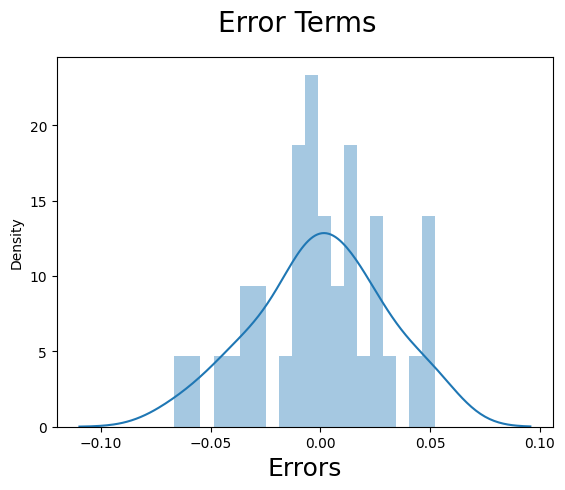

In [790]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [791]:
## Elasticity
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

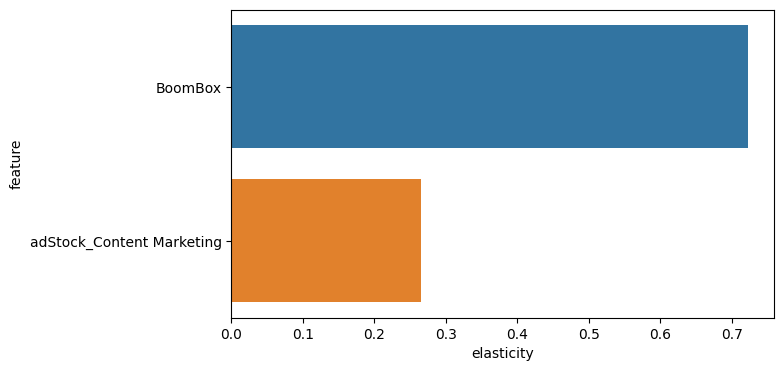

In [792]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

In [793]:
## Model Evalution
X_test = df_test
y_test = df_test.pop('gmv')

In [794]:
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  adStock_Content Marketing   BoomBox
6     1.0                   1.000000  0.630336
17    1.0                   0.702016  0.577329
19    1.0                   0.718349  0.291066
29    1.0                   0.476134  0.000000
38    1.0                   0.680913  0.175357
44    1.0                   0.000000  0.367466
5     1.0                   0.919873  1.000000
25    1.0                   0.636651  0.263767
27    1.0                   0.552612  0.175357

In [795]:
# Making predictions using the fourth model
y_pred = lr.predict(X_test)

Text(0, 0.5, 'y_pred')

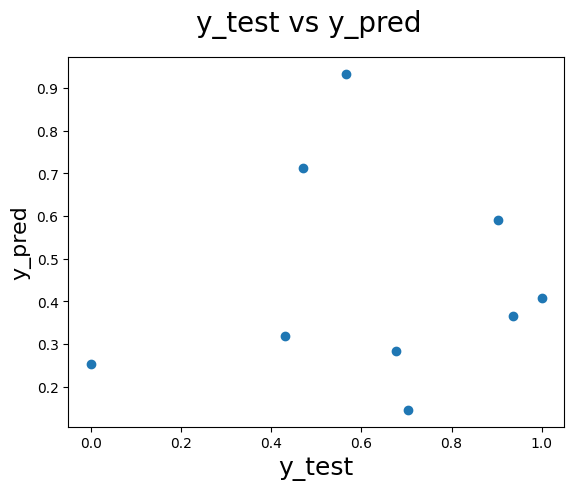

In [796]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [797]:
## Koyck model for Camera Accessory

def createKoyckKPI(df):
    # Create a lagged variable for 'gmv'
    df['gmv_lag'] = df['gmv'].shift(1)

    # Fill NaN values with 0
    df = df.fillna(0)

    return df


In [798]:
# adding lag variable in the camera data set
df = createKoyckKPI(final_camera_data)
df.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
0            31      8  2015    0.052078         0.913194   
1            32      8  2015    0.027648         0.776115   
2            33      8  2015    0.014593         0.697681   
3            35      8  2015    0.004801         0.638856   
4            36      9  2015    0.777460         0.580839   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             2.003552                   0.000220                  0.343392   
1             1.267609                   0.000112                  0.204007   
2             0.870676                   0.000054                  0.129130   
3             0.572975                   0.000010                  0.072972   
4            12.815056                   0.122060                  3.307299   

   adStock_ Affiliates  adStock_SEM  ...  ExtensionTube        Filter  \
0             0.146684     1.805811  ...   1.000000e-07  1.120000e+02   
1             0.091763     1.531288  ...   1.000000e-07  1.000000e-07   
2             0.062165     1.374402  ...   1.000000e-07  1.000000e-07   
3             0.039966     1.256738  ...   1.000000e-07  1.000000e-07   
4             1.025499     1.849175  ...   1.000000e-07  1.900000e+02   

          Flash  FlashShoeAdapter          Lens  ReflectorUmbrella  \
0  2.600000e+01      1.000000e-07  2.330000e+02       1.000000e-07   
1  1.000000e-07      1.000000e-07  1.000000e-07       1.000000e-07   
2  1.000000e-07      1.000000e-07  1.000000e-07       1.000000e-07   
3  1.000000e-07      1.000000e-07  3.000000e+00       1.000000e-07   
4  1.790000e+02      1.000000e-07  3.140000e+02       1.000000e-07   

        Softbox         Strap     Telescope  gmv_lag  
0  1.000000e-07  2.300000e+01  1.300000e+01      0.0  
1  1.000000e-07  1.000000e-07  1.000000e-07    398.0  
2  1.000000e-07  1.000000e-07  1.000000e-07    699.0  
3  1.000000e-07  1.000000e-07  1.000000e-07    299.0  
4  1.000000e-07  1.300000e+01  3.300000e+01   1190.0  

[5 rows x 48 columns]

In [799]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   weekly_order               48 non-null     int64  
 1   Month                      48 non-null     int64  
 2   Year                       48 non-null     int64  
 3   adStock_TV                 48 non-null     float64
 4   adStock_Digital            48 non-null     float64
 5   adStock_Sponsorship        48 non-null     float64
 6   adStock_Content Marketing  48 non-null     float64
 7   adStock_Online marketing   48 non-null     float64
 8   adStock_ Affiliates        48 non-null     float64
 9   adStock_SEM                48 non-null     float64
 10  adStock_Radio              48 non-null     float64
 11  adStock_Other              48 non-null     float64
 12  gmv                        48 non-null     float64
 13  units                      48 non-null     int64  
 

In [800]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [801]:
scaler = MinMaxScaler()

In [802]:
# Apply scaler() to all the columns except the categoriacal variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope', 'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [803]:
y_train = df_train.pop('gmv')
X_train = df_train

In [804]:
# Create a Linear Regression model
lm = LinearRegression()

# Fit the model on training data
lm.fit(X_train, y_train)

# Running Recursive Feature Elimination (RFE) to select top 20 features
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [805]:
# selecting the features given by rfe
cols = X_train.columns[rfe.support_]
cols

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'CameraAccessory', 'CameraBattery', 'CameraFilmRolls',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'Softbox', 'Telescope'],
      dtype='object')

In [806]:
# negelecting features not selected by rfe
X_train.columns[~rfe.support_]

Index(['weekly_order', 'Month', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'NPS', 'discount', 'total_transactions',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraBag', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'FlashShoeAdapter', 'Lens',
       'ReflectorUmbrella', 'Strap', 'gmv_lag'],
      dtype='object')

In [807]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [808]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     194.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.90e-16
Time:                        17:45:54   Log-Likelihood:                 113.05
No. Observations:                  38   AIC:                            -184.1
Df Residuals:                      17   BIC:                            -149.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  4.897213e+08
8                 adStock_SEM  4.654260e+03
3             adStock_Digital  3.329880e+03
9               adStock_Radio  1.664000e+03
6    adStock_Online marketing  1.653640e+03
10              adStock_Other  1.617050e+03
7         adStock_ Affiliates  1.547600e+03
5   adStock_Content Marketing  6.815200e+02
2                  adStock_TV  2.435700e+02
4         adStock_Sponsorship  1.494400e+02
14        CameraRemoteControl  4.170000e+01
1                        Year  3.019000e+01
12              CameraBattery  1.787000e+01
17                     Filter  1.708000e+01
20                  Telescope  1.535000e+01
13            CameraFilmRolls  1.003000e+01
16              ExtensionTube  8.250000e+00
11            CameraAccessory  7.290000e+00
18                      Flash  7.250000e+00
15               CameraTripod  4.370000e+00
19                    Softbox  3.290000e+00

In [809]:
# Let's drop feature  with highest p-value
X_train_new= X_train_rfe.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     216.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.92e-17
Time:                        17:45:54   Log-Likelihood:                 113.05
No. Observations:                  38   AIC:                            -186.1
Df Residuals:                      18   BIC:                            -153.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  2.322743e+08
6    adStock_Online marketing  1.648550e+03
7         adStock_ Affiliates  1.526260e+03
3             adStock_Digital  1.426520e+03
8                 adStock_SEM  9.545200e+02
5   adStock_Content Marketing  5.600800e+02
4         adStock_Sponsorship  1.491500e+02
2                  adStock_TV  6.628000e+01
9               adStock_Radio  5.608000e+01
13        CameraRemoteControl  3.940000e+01
11              CameraBattery  1.736000e+01
16                     Filter  1.593000e+01
19                  Telescope  1.471000e+01
1                        Year  1.431000e+01
12            CameraFilmRolls  9.570000e+00
15              ExtensionTube  7.200000e+00
17                      Flash  7.050000e+00
10            CameraAccessory  6.330000e+00
14               CameraTripod  4.120000e+00
18                    Softbox  3.100000e+00

In [810]:
# Let's drop feature  with highest p-value
X_train_new1= X_train_new.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.95e-18
Time:                        17:45:54   Log-Likelihood:                 112.07
No. Observations:                  38   AIC:                            -186.1
Df Residuals:                      19   BIC:                            -155.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.441743e+08
6         adStock_ Affiliates  1.520770e+03
5    adStock_Online marketing  1.507940e+03
4   adStock_Content Marketing  1.824400e+02
7                 adStock_SEM  1.581000e+02
3         adStock_Sponsorship  5.233000e+01
2                  adStock_TV  3.855000e+01
12        CameraRemoteControl  3.612000e+01
10              CameraBattery  1.579000e+01
8               adStock_Radio  1.479000e+01
18                  Telescope  1.469000e+01
15                     Filter  1.145000e+01
11            CameraFilmRolls  9.050000e+00
1                        Year  8.880000e+00
14              ExtensionTube  6.980000e+00
16                      Flash  6.400000e+00
9             CameraAccessory  6.160000e+00
13               CameraTripod  4.110000e+00
17                    Softbox  3.090000e+00

In [811]:
# Let's drop feature  with highest p-value
X_train_new2= X_train_new1.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     244.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.84e-19
Time:                        17:45:54   Log-Likelihood:                 111.24
No. Observations:                  38   AIC:                            -186.5
Df Residuals:                      20   BIC:                            -157.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.420794e+08
6         adStock_ Affiliates  1.276720e+03
5    adStock_Online marketing  1.258280e+03
4   adStock_Content Marketing  1.174700e+02
7                 adStock_SEM  9.890000e+01
11        CameraRemoteControl  3.419000e+01
3         adStock_Sponsorship  3.086000e+01
2                  adStock_TV  2.506000e+01
9               CameraBattery  1.568000e+01
17                  Telescope  1.433000e+01
14                     Filter  1.032000e+01
1                        Year  8.750000e+00
10            CameraFilmRolls  8.690000e+00
15                      Flash  6.170000e+00
8             CameraAccessory  6.090000e+00
13              ExtensionTube  5.400000e+00
12               CameraTripod  4.080000e+00
16                    Softbox  3.070000e+00

In [812]:
# Let's drop feature  with highest VIF
X_train_new3= X_train_new2.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     64.04
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.32e-14
Time:                        17:45:54   Log-Likelihood:                 84.040
No. Observations:                  38   AIC:                            -134.1
Df Residuals:                      21   BIC:                            -106.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.201249e+08
6                 adStock_SEM  6.601000e+01
4   adStock_Content Marketing  6.027000e+01
10        CameraRemoteControl  2.963000e+01
3         adStock_Sponsorship  1.505000e+01
8               CameraBattery  1.460000e+01
16                  Telescope  1.306000e+01
5    adStock_Online marketing  1.015000e+01
2                  adStock_TV  9.690000e+00
13                     Filter  9.380000e+00
9             CameraFilmRolls  8.280000e+00
1                        Year  7.400000e+00
14                      Flash  5.830000e+00
7             CameraAccessory  5.140000e+00
12              ExtensionTube  4.920000e+00
11               CameraTripod  4.040000e+00
15                    Softbox  3.050000e+00

In [813]:
# Let's drop feature  with highest p value
X_train_new4 = X_train_new3.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     71.56
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.81e-15
Time:                        17:45:54   Log-Likelihood:                 84.039
No. Observations:                  38   AIC:                            -136.1
Df Residuals:                      22   BIC:                            -109.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const  89580482.36
5                 adStock_SEM        64.48
3   adStock_Content Marketing        53.52
9         CameraRemoteControl        29.12
7               CameraBattery        12.90
15                  Telescope        12.23
12                     Filter         9.26
2         adStock_Sponsorship         9.04
8             CameraFilmRolls         6.00
13                      Flash         5.71
1                        Year         5.52
6             CameraAccessory         4.95
11              ExtensionTube         4.92
4    adStock_Online marketing         4.79
10               CameraTripod         3.91
14                    Softbox         2.43

In [814]:
# Let's drop feature  with highest p value
X_train_new5 = X_train_new4.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     79.26
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.69e-16
Time:                        17:45:54   Log-Likelihood:                 83.829
No. Observations:                  38   AIC:                            -137.7
Df Residuals:                      23   BIC:                            -113.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const  89392250.30
8         CameraRemoteControl        24.46
6               CameraBattery        12.89
14                  Telescope        10.49
11                     Filter         9.08
3   adStock_Content Marketing         7.18
2         adStock_Sponsorship         6.94
12                      Flash         5.70
7             CameraFilmRolls         5.63
1                        Year         5.50
10              ExtensionTube         4.60
4    adStock_Online marketing         3.95
9                CameraTripod         3.90
5             CameraAccessory         3.40
13                    Softbox         2.29

In [815]:
# Let's drop feature  with highest VIF
X_train_new6 = X_train_new5.drop(["CameraRemoteControl"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     76.77
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.71e-16
Time:                        17:45:54   Log-Likelihood:                 81.069
No. Observations:                  38   AIC:                            -134.1
Df Residuals:                      24   BIC:                            -111.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const  69420086.69
13                  Telescope        10.01
2         adStock_Sponsorship         6.81
3   adStock_Content Marketing         6.71
6               CameraBattery         6.29
7             CameraFilmRolls         5.55
11                      Flash         5.46
10                     Filter         4.67
1                        Year         4.27
8                CameraTripod         3.80
4    adStock_Online marketing         2.95
5             CameraAccessory         2.57
9               ExtensionTube         2.54
12                    Softbox         2.25

In [816]:
# Let's drop feature  with highest p value
X_train_new7 = X_train_new6.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     85.70
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.21e-17
Time:                        17:45:54   Log-Likelihood:                 80.867
No. Observations:                  38   AIC:                            -135.7
Df Residuals:                      25   BIC:                            -114.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  11.14
12                  Telescope  10.01
2   adStock_Content Marketing   6.60
1         adStock_Sponsorship   6.51
5               CameraBattery   6.25
6             CameraFilmRolls   5.29
10                      Flash   4.49
9                      Filter   4.38
7                CameraTripod   3.78
3    adStock_Online marketing   2.93
4             CameraAccessory   2.48
8               ExtensionTube   2.25
11                    Softbox   2.20

In [817]:
# Let's drop feature  with highest p value
X_train_new8 = X_train_new7.drop(["CameraBattery"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     95.86
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.77e-18
Time:                        17:45:55   Log-Likelihood:                 80.604
No. Observations:                  38   AIC:                            -137.2
Df Residuals:                      26   BIC:                            -117.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  10.79
11                  Telescope   7.24
2   adStock_Content Marketing   5.79
1         adStock_Sponsorship   5.76
5             CameraFilmRolls   4.48
9                       Flash   4.44
6                CameraTripod   3.78
8                      Filter   3.42
3    adStock_Online marketing   2.78
4             CameraAccessory   2.48
7               ExtensionTube   2.23
10                    Softbox   2.13

In [818]:
# Let's drop feature  with highest p value
X_train_new9 = X_train_new8.drop(["ExtensionTube"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.70e-19
Time:                        17:45:55   Log-Likelihood:                 80.177
No. Observations:                  38   AIC:                            -138.4
Df Residuals:                      27   BIC:                            -120.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  10.69
10                  Telescope   6.05
1         adStock_Sponsorship   5.73
2   adStock_Content Marketing   5.59
8                       Flash   4.37
6                CameraTripod   3.72
5             CameraFilmRolls   3.69
7                      Filter   3.32
4             CameraAccessory   2.46
3    adStock_Online marketing   2.13
9                     Softbox   1.68

In [819]:
# Let's drop feature  with highest p value
X_train_new10 = X_train_new9.drop(["CameraFilmRolls"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     116.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           9.15e-20
Time:                        17:45:55   Log-Likelihood:                 79.072
No. Observations:                  38   AIC:                            -138.1
Df Residuals:                      28   BIC:                            -121.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  10.65
2  adStock_Content Marketing   5.54
1        adStock_Sponsorship   5.27
9                  Telescope   5.13
7                      Flash   3.67
5               CameraTripod   3.37
6                     Filter   3.32
4            CameraAccessory   2.46
3   adStock_Online marketing   2.13
8                    Softbox   1.66

In [820]:
# Let's drop feature  with highest p value
X_train_new11 = X_train_new10.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     124.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.35e-20
Time:                        17:45:55   Log-Likelihood:                 77.576
No. Observations:                  38   AIC:                            -137.2
Df Residuals:                      29   BIC:                            -122.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
0                      const  9.26
8                  Telescope  3.91
6                      Flash  3.28
5                     Filter  3.27
4               CameraTripod  2.75
1  adStock_Content Marketing  2.49
3            CameraAccessory  2.19
2   adStock_Online marketing  2.12
7                    Softbox  1.66

In [821]:
# Let's drop feature  with highest p value
X_train_new12 = X_train_new11.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     144.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.65e-21
Time:                        17:45:55   Log-Likelihood:                 77.118
No. Observations:                  38   AIC:                            -138.2
Df Residuals:                      30   BIC:                            -125.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
0                     const  8.91
7                 Telescope  3.83
5                     Flash  3.11
4                    Filter  3.07
3              CameraTripod  2.62
2           CameraAccessory  2.18
1  adStock_Online marketing  1.68
6                   Softbox  1.65

In [822]:
# Let's drop feature  with highest p value
X_train_new13 = X_train_new12.drop(["CameraAccessory"], axis = 1)
 # Add a constant
X_train_lm_1 = sm.add_constant(X_train_new13)
    # Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1 .values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     139.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.96e-21
Time:                        17:45:55   Log-Likelihood:                 73.112
No. Observations:                  38   AIC:                            -132.2
Df Residuals:                      31   BIC:                            -120.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
0                     const  7.79
6                 Telescope  3.39
4                     Flash  3.11
3                    Filter  3.03
2              CameraTripod  2.47
1  adStock_Online marketing  1.62
5                   Softbox  1.50

In [823]:
# Let's drop feature  with highest p value
X_train_new14 = X_train_new13.drop(["Softbox"], axis = 1)
 # Add a constant
X_train_lm_2 = sm.add_constant(X_train_new14)
    # Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm_2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2 .values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.42e-21
Time:                        17:45:55   Log-Likelihood:                 70.825
No. Observations:                  38   AIC:                            -129.6
Df Residuals:                      32   BIC:                            -119.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
0                     const  7.65
5                 Telescope  3.17
4                     Flash  2.97
3                    Filter  2.86
2              CameraTripod  2.45
1  adStock_Online marketing  1.62

In [824]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1, X_train_lm_2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9126216231014534
lr model 2 r2_score 0.9124506268630285


In [825]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1, X_train_lm_2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.0027971015324785757
lr model 2 MSE 0.0027968339822713253


In [826]:
# Residual Analysis
y_train_price = lr1.predict(X_train_lm_1)

<ipython-input-827-f9aea80bd5b1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Errors')

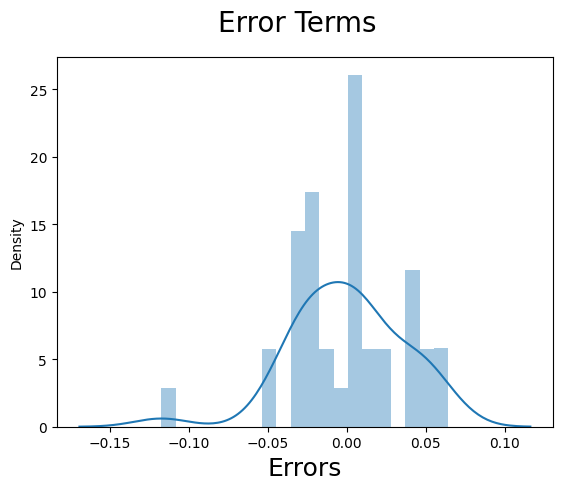

In [827]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [828]:
# Model Evalutation
y_test = df_test.pop('gmv')
X_test = df_test

In [829]:
X_test.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
6             38      9  2015    0.256500         0.237674   
28            60      2  2016    0.261144         0.699093   
32            64      3  2016    1.000000         0.666894   
26            58      2  2016    0.383668         0.324276   
41            73      5  2016    0.039826         0.000000   

    adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
6              1.000000                   0.546670                  0.300807   
28             0.061330                   0.824962                  0.814895   
32             0.615164                   0.398560                  0.520463   
26             0.000000                   0.987542                  0.879006   
41             0.627661                   1.000000                  1.000000   

    adStock_ Affiliates  adStock_SEM  ...  ExtensionTube    Filter     Flash  \
6              0.283866     0.327298  ...            0.2  0.537037  0.027968   
28             0.931532     0.349081  ...            0.0  0.537037  0.799658   
32             0.621095     0.236447  ...            1.0  0.550926  0.743721   
26             1.000000     0.312876  ...            0.8  0.666667  0.981164   
41             0.971101     0.745088  ...            0.0  0.458333  0.798516   

    FlashShoeAdapter      Lens  ReflectorUmbrella  Softbox     Strap  \
6                0.0  0.314465                0.0      0.0  0.000000   
28               0.0  0.468553                0.0      0.0  0.463415   
32               0.0  0.273585                1.0      0.0  0.512195   
26               0.0  0.496855                0.0      0.0  0.536585   
41               0.0  0.867925                0.0      1.0  0.707317   

    Telescope   gmv_lag  
6    0.428571  0.339710  
28   0.371429  0.334568  
32   0.714286  1.000000  
26   0.771429  0.330729  
41   0.942857  0.838077  

[5 rows x 47 columns]

In [830]:
X_test = X_test[X_train_lm_1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  adStock_Online marketing  CameraTripod    Filter     Flash  \
6     1.0                  0.300807      0.483136  0.537037  0.027968   
28    1.0                  0.814895      0.614403  0.537037  0.799658   
32    1.0                  0.520463      0.424795  0.550926  0.743721   
26    1.0                  0.879006      0.434822  0.666667  0.981164   
41    1.0                  1.000000      0.305378  0.458333  0.798516   
47    1.0                  0.000000      0.000000  0.000000  0.187215   
5     1.0                  0.201906      0.628988  0.712963  0.000000   
40    1.0                  0.972805      0.480401  0.569444  1.000000   
18    1.0                  0.703696      1.000000  0.546296  0.046233   
31    1.0                  0.559659      0.486782  1.000000  0.757420   

    Softbox  Telescope  
6       0.0   0.428571  
28      0.0   0.371429  
32      0.0   0.714286  
26      0.0   0.771429  
41      1.0   0.942857  
47      0.5   0.000000  
5       0.0   0.257143  
40      0.5   1.000000  
18      0.0   0.257143  
31      0.0   0.885714

In [831]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

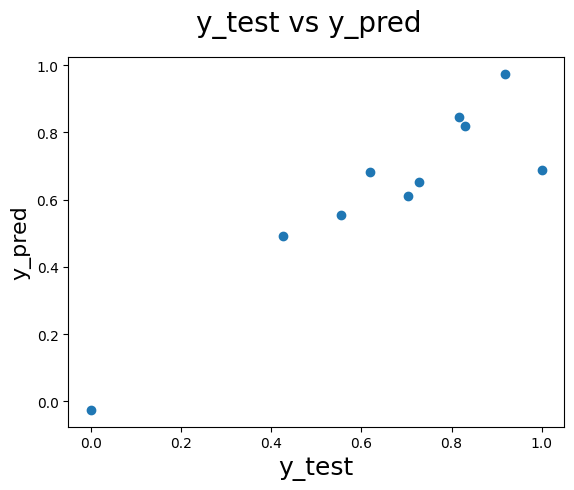

In [832]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [833]:
## Elasticity analysis
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm_1, y_train, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

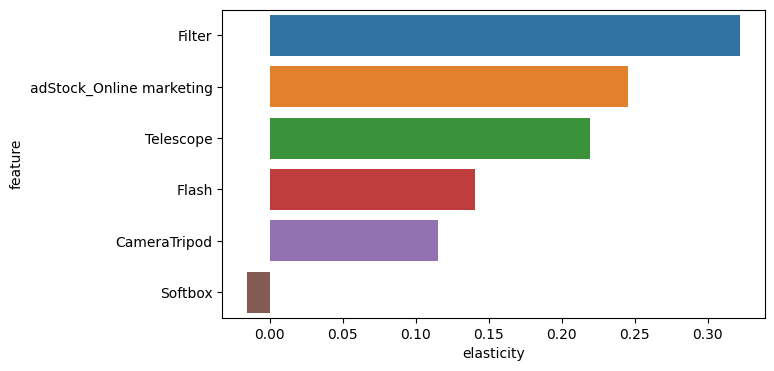

In [834]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

In [835]:
# Koyck model for Gaming Accessory
df = createKoyckKPI(final_gaming_data)

In [836]:
# Keeping only those features which can be controlled by the company
df = df.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [837]:
df.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
0            31      8  2015    0.052078         0.913194   
1            32      8  2015    0.027648         0.776115   
2            33      8  2015    0.014593         0.697681   
3            34      8  2015    0.008065         0.658465   
4            35      8  2015    0.004801         0.638856   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             2.003552                   0.000220                  0.343392   
1             1.267609                   0.000112                  0.204007   
2             0.870676                   0.000054                  0.129130   
3             0.672209                   0.000025                  0.091691   
4             0.572975                   0.000010                  0.072972   

   adStock_ Affiliates  adStock_SEM  ...  GamingHeadset  GamingKeyboard  \
0             0.146684     1.805811  ...          424.0            71.0   
1             0.091763     1.531288  ...            1.0             0.0   
2             0.062165     1.374402  ...            1.0             0.0   
3             0.047366     1.295959  ...            0.0             0.0   
4             0.039966     1.256738  ...            1.0             0.0   

   GamingMemoryCard  GamingMouse  GamingMousePad  GamingSpeaker  \
0              11.0        232.0            39.0            1.0   
1               0.0          0.0             0.0            0.0   
2               0.0          0.0             0.0            0.0   
3               0.0          1.0             0.0            0.0   
4               0.0          0.0             0.0            0.0   

   JoystickGamingWheel  MotionController  TVOutCableAccessory  gmv_lag  
0                 17.0               8.0                 79.0      0.0  
1                  0.0               0.0                  1.0    999.0  
2                  0.0               0.0                  0.0   2295.0  
3                  0.0               0.0                  0.0   4875.0  
4                  0.0               0.0                  0.0    598.0  

[5 rows x 37 columns]

In [838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   weekly_order               49 non-null     int64  
 1   Month                      49 non-null     int64  
 2   Year                       49 non-null     int64  
 3   adStock_TV                 49 non-null     float64
 4   adStock_Digital            49 non-null     float64
 5   adStock_Sponsorship        49 non-null     float64
 6   adStock_Content Marketing  49 non-null     float64
 7   adStock_Online marketing   49 non-null     float64
 8   adStock_ Affiliates        49 non-null     float64
 9   adStock_SEM                49 non-null     float64
 10  adStock_Radio              49 non-null     float64
 11  adStock_Other              49 non-null     float64
 12  gmv                        49 non-null     float64
 13  sla                        49 non-null     float64
 

In [839]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.20, random_state = 100)

In [840]:
scaler = MinMaxScaler()

In [841]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS',
       'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [842]:
y_train = df_train.pop('gmv')
X_train = df_train

In [843]:
# Create a Linear Regression model
lm = LinearRegression()

# Fit the model on training data
lm.fit(X_train, y_train)

# Running Recursive Feature Elimination (RFE) to select top 20 features
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [844]:
#Columns which are supported by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Other', 'sla', 'product_procurement_sla',
       'total_special_sale_days', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel'],
      dtype='object')

In [845]:
#Columns which are not supported by RFE
X_train.columns[~rfe.support_]

Index(['weekly_order', 'Month', 'Year', 'adStock_Online marketing',
       'adStock_Radio', 'NPS', 'discount', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'CoolingPad', 'GameControlMount',
       'GamingHeadset', 'MotionController', 'TVOutCableAccessory', 'gmv_lag'],
      dtype='object')

In [846]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [847]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     78.07
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.44e-13
Time:                        17:45:57   Log-Likelihood:                 97.302
No. Observations:                  39   AIC:                            -152.6
Df Residuals:                      18   BIC:                            -117.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4   adStock_Content Marketing  1510.02
2             adStock_Digital   827.28
6                 adStock_SEM   231.55
3         adStock_Sponsorship   187.10
1                  adStock_TV   156.36
5         adStock_ Affiliates   135.75
0                       const   133.56
7               adStock_Other   107.88
11                    GamePad    28.30
15             GamingKeyboard    20.35
18             GamingMousePad    19.62
20        JoystickGamingWheel    18.42
12         GamingAccessoryKit    17.09
17                GamingMouse    11.85
13              GamingAdapter     9.73
16           GamingMemoryCard     6.12
19              GamingSpeaker     5.82
14      GamingChargingStation     5.06
9     product_procurement_sla     4.17
10    total_special_sale_days     3.09
8                         sla     1.91

In [848]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["GamingMousePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     84.92
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.83e-14
Time:                        17:45:57   Log-Likelihood:                 96.892
No. Observations:                  39   AIC:                            -153.8
Df Residuals:                      19   BIC:                            -120.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
4   adStock_Content Marketing  1278.55
2             adStock_Digital   720.05
6                 adStock_SEM   226.50
3         adStock_Sponsorship   166.96
1                  adStock_TV   146.86
0                       const   126.75
5         adStock_ Affiliates   124.81
7               adStock_Other    91.07
11                    GamePad    28.27
19        JoystickGamingWheel    18.42
12         GamingAccessoryKit    16.23
15             GamingKeyboard    13.20
17                GamingMouse    11.15
13              GamingAdapter     9.30
16           GamingMemoryCard     6.08
18              GamingSpeaker     5.14
14      GamingChargingStation     4.54
9     product_procurement_sla     3.98
10    total_special_sale_days     2.63
8                         sla     1.90

In [849]:
# Let's drop feature with highest p-value
X_train_new1= X_train_new.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     91.53
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.47e-15
Time:                        17:45:57   Log-Likelihood:                 96.306
No. Observations:                  39   AIC:                            -154.6
Df Residuals:                      20   BIC:                            -123.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4   adStock_Content Marketing  990.44
2             adStock_Digital  582.11
6                 adStock_SEM  221.27
3         adStock_Sponsorship  140.37
0                       const  126.72
1                  adStock_TV  113.27
5         adStock_ Affiliates  102.36
7               adStock_Other   71.59
10                    GamePad   27.96
11         GamingAccessoryKit   16.20
18        JoystickGamingWheel   16.18
14             GamingKeyboard   12.64
16                GamingMouse    9.30
12              GamingAdapter    9.19
15           GamingMemoryCard    5.94
17              GamingSpeaker    4.90
13      GamingChargingStation    4.48
8     product_procurement_sla    3.58
9     total_special_sale_days    2.62

In [850]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     93.43
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.73e-16
Time:                        17:45:57   Log-Likelihood:                 94.661
No. Observations:                  39   AIC:                            -153.3
Df Residuals:                      21   BIC:                            -123.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4   adStock_Content Marketing  986.18
2             adStock_Digital  580.36
6                 adStock_SEM  219.55
3         adStock_Sponsorship  139.68
0                       const  124.04
1                  adStock_TV  112.73
5         adStock_ Affiliates  101.27
7               adStock_Other   71.58
10                    GamePad   27.90
17        JoystickGamingWheel   15.00
11         GamingAccessoryKit   14.50
13             GamingKeyboard   11.78
15                GamingMouse    8.05
14           GamingMemoryCard    5.94
16              GamingSpeaker    4.89
12      GamingChargingStation    4.48
8     product_procurement_sla    3.38
9     total_special_sale_days    2.61

In [851]:
# Let's drop feature with highest p-value
X_train_new3 = X_train_new2.drop(["GamingSpeaker"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     96.59
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.21e-16
Time:                        17:45:57   Log-Likelihood:                 93.240
No. Observations:                  39   AIC:                            -152.5
Df Residuals:                      22   BIC:                            -124.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4   adStock_Content Marketing  868.66
2             adStock_Digital  511.41
6                 adStock_SEM  219.48
3         adStock_Sponsorship  120.43
0                       const  112.93
1                  adStock_TV   99.56
5         adStock_ Affiliates   90.56
7               adStock_Other   63.57
10                    GamePad   24.90
11         GamingAccessoryKit   13.56
13             GamingKeyboard   10.98
16        JoystickGamingWheel    9.60
15                GamingMouse    8.04
14           GamingMemoryCard    5.94
12      GamingChargingStation    4.46
8     product_procurement_sla    3.29
9     total_special_sale_days    2.59

In [852]:
# Let's drop feature with highest VIF
X_train_new4 = X_train_new3.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     75.35
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.22e-16
Time:                        17:45:57   Log-Likelihood:                 86.390
No. Observations:                  39   AIC:                            -140.8
Df Residuals:                      23   BIC:                            -114.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
5               adStock_SEM  201.80
2           adStock_Digital  156.92
0                     const   48.60
9                   GamePad   24.18
3       adStock_Sponsorship   16.07
10       GamingAccessoryKit   13.01
4       adStock_ Affiliates   11.08
12           GamingKeyboard   10.07
1                adStock_TV    8.02
14              GamingMouse    7.86
15      JoystickGamingWheel    7.77
13         GamingMemoryCard    4.92
11    GamingChargingStation    4.45
6             adStock_Other    3.51
7   product_procurement_sla    3.18
8   total_special_sale_days    2.51

In [853]:
# Let's drop feature with highest p-value
X_train_new5 = X_train_new4.drop(["GamePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     82.04
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           8.96e-17
Time:                        17:45:58   Log-Likelihood:                 85.883
No. Observations:                  39   AIC:                            -141.8
Df Residuals:                      24   BIC:                            -116.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
5               adStock_SEM  201.80
2           adStock_Digital  155.63
0                     const   48.58
3       adStock_Sponsorship   13.60
4       adStock_ Affiliates   10.41
11           GamingKeyboard    8.03
13              GamingMouse    7.84
14      JoystickGamingWheel    7.74
1                adStock_TV    7.33
12         GamingMemoryCard    4.77
9        GamingAccessoryKit    4.16
10    GamingChargingStation    4.03
7   product_procurement_sla    3.17
6             adStock_Other    3.11
8   total_special_sale_days    2.21

In [854]:
# Let's drop feature with highest p-value
X_train_new6 = X_train_new5.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     88.56
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.44e-17
Time:                        17:45:58   Log-Likelihood:                 85.150
No. Observations:                  39   AIC:                            -142.3
Df Residuals:                      25   BIC:                            -119.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                     const  24.37
2       adStock_Sponsorship  11.27
4               adStock_SEM   8.06
12              GamingMouse   7.82
10           GamingKeyboard   7.15
1                adStock_TV   6.95
13      JoystickGamingWheel   6.53
3       adStock_ Affiliates   5.32
11         GamingMemoryCard   4.49
8        GamingAccessoryKit   4.15
9     GamingChargingStation   3.86
6   product_procurement_sla   3.06
5             adStock_Other   3.03
7   total_special_sale_days   2.09

In [855]:
# Let's drop feature with highest p-value
X_train_new7 = X_train_new6.drop(["JoystickGamingWheel"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     99.69
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.42e-18
Time:                        17:45:58   Log-Likelihood:                 85.133
No. Observations:                  39   AIC:                            -144.3
Df Residuals:                      26   BIC:                            -122.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                     const  18.14
12              GamingMouse   7.72
2       adStock_Sponsorship   7.49
4               adStock_SEM   6.73
3       adStock_ Affiliates   5.27
10           GamingKeyboard   5.20
11         GamingMemoryCard   4.10
9     GamingChargingStation   3.86
1                adStock_TV   3.67
8        GamingAccessoryKit   3.64
5             adStock_Other   2.41
7   total_special_sale_days   2.09
6   product_procurement_sla   1.78

In [856]:
# Let's drop feature with highest p-value
X_train_new8 = X_train_new7.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     106.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.69e-19
Time:                        17:45:58   Log-Likelihood:                 84.065
No. Observations:                  39   AIC:                            -144.1
Df Residuals:                      27   BIC:                            -124.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                     const  18.10
11              GamingMouse   7.18
2       adStock_Sponsorship   6.74
4               adStock_SEM   6.58
3       adStock_ Affiliates   4.90
9            GamingKeyboard   4.58
8     GamingChargingStation   3.85
1                adStock_TV   3.62
10         GamingMemoryCard   3.60
7        GamingAccessoryKit   3.50
6   total_special_sale_days   2.06
5   product_procurement_sla   1.76

In [857]:
# Let's drop feature with highest p-value
X_train_new9 = X_train_new8.drop(["GamingChargingStation"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     111.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.50e-20
Time:                        17:45:58   Log-Likelihood:                 82.438
No. Observations:                  39   AIC:                            -142.9
Df Residuals:                      28   BIC:                            -124.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                     const  17.93
10              GamingMouse   6.77
2       adStock_Sponsorship   6.73
4               adStock_SEM   6.53
3       adStock_ Affiliates   4.88
8            GamingKeyboard   4.53
7        GamingAccessoryKit   3.50
1                adStock_TV   3.45
5   product_procurement_sla   1.76
9          GamingMemoryCard   1.72
6   total_special_sale_days   1.54

In [858]:
# Let's drop feature with highest p-value
X_train_new10 = X_train_new9.drop(["total_special_sale_days"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     122.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.32e-20
Time:                        17:45:58   Log-Likelihood:                 81.454
No. Observations:                  39   AIC:                            -142.9
Df Residuals:                      29   BIC:                            -126.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  17.30
2      adStock_Sponsorship   6.72
4              adStock_SEM   6.53
9              GamingMouse   5.81
3      adStock_ Affiliates   4.88
7           GamingKeyboard   4.34
6       GamingAccessoryKit   3.45
1               adStock_TV   3.41
5  product_procurement_sla   1.76
8         GamingMemoryCard   1.57

In [859]:
# Let's drop feature with highest p-value
X_train_new11 = X_train_new10.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     128.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.51e-21
Time:                        17:45:58   Log-Likelihood:                 79.563
No. Observations:                  39   AIC:                            -141.1
Df Residuals:                      30   BIC:                            -126.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0311    

Features   VIF
0                const  7.86
2  adStock_Sponsorship  6.72
4          adStock_SEM  6.47
8          GamingMouse  5.37
6       GamingKeyboard  4.34
3  adStock_ Affiliates  4.25
5   GamingAccessoryKit  3.23
1           adStock_TV  3.07
7     GamingMemoryCard  1.41

In [860]:
# Let's drop feature with highest p-value
X_train_new12 = X_train_new11.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     124.9
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.62e-21
Time:                        17:45:58   Log-Likelihood:                 75.847
No. Observations:                  39   AIC:                            -135.7
Df Residuals:                      31   BIC:                            -122.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0266    

Features   VIF
0                const  7.77
7          GamingMouse  4.21
5       GamingKeyboard  4.06
3  adStock_ Affiliates  3.85
1           adStock_TV  3.03
4   GamingAccessoryKit  2.59
2  adStock_Sponsorship  2.05
6     GamingMemoryCard  1.35

In [861]:
# Let's drop feature with highest p-value
X_train_new13 = X_train_new12.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     142.9
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.13e-21
Time:                        17:45:58   Log-Likelihood:                 74.884
No. Observations:                  39   AIC:                            -135.8
Df Residuals:                      32   BIC:                            -124.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0246    

Features   VIF
0                const  7.70
4       GamingKeyboard  3.71
2  adStock_ Affiliates  3.67
6          GamingMouse  3.66
1           adStock_TV  2.37
3   GamingAccessoryKit  2.27
5     GamingMemoryCard  1.28

In [862]:
# Let's drop feature with highest p-value
X_train_new14 = X_train_new13.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm_1 = sm.add_constant(X_train_new14)
    # Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1 .values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     122.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.65e-20
Time:                        17:45:58   Log-Likelihood:                 68.000
No. Observations:                  39   AIC:                            -124.0
Df Residuals:                      33   BIC:                            -114.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0271    

Features   VIF
0                const  7.69
3       GamingKeyboard  3.69
5          GamingMouse  3.65
2   GamingAccessoryKit  2.27
1  adStock_ Affiliates  2.15
4     GamingMemoryCard  1.25

In [863]:
# Let's drop feature with highest p-value
X_train_new15 = X_train_new14.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm_2 = sm.add_constant(X_train_new15)
    # Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm_2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2 .values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     133.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.94e-20
Time:                        17:45:58   Log-Likelihood:                 64.886
No. Observations:                  39   AIC:                            -119.8
Df Residuals:                      34   BIC:                            -111.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0102      0

Features   VIF
0               const  6.77
2      GamingKeyboard  3.63
4         GamingMouse  3.55
1  GamingAccessoryKit  1.57
3    GamingMemoryCard  1.06

In [864]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9094603649703785
lr model 2 r2_score 0.8989736913230228


In [865]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"r2_score", -scores.mean())

lr model 1 r2_score 0.003867404018868177
lr model 2 r2_score 0.004448913681853692


In [866]:
# Based on cross-validation scores, Model 1 appears to be the best among the two, showing the lowest MSE.


In [867]:
# Residual analysis
y_train_price = lr1.predict(X_train_lm_1)

<ipython-input-868-f9aea80bd5b1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Errors')

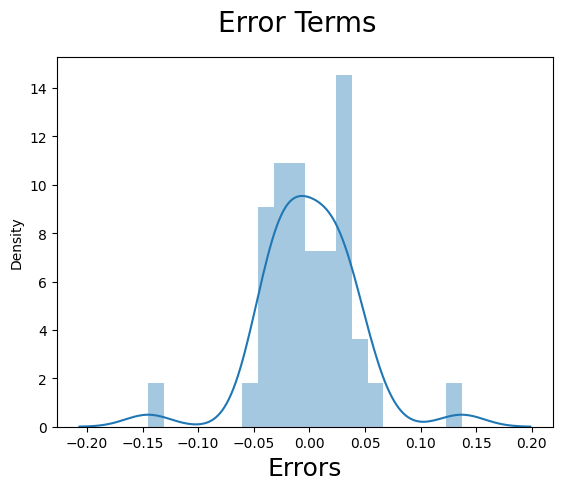

In [868]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [869]:
## Model Evaluation
y_test = df_test.pop('gmv')
X_test = df_test

In [870]:
X_test = X_test[X_train_lm_1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test.head()

const  adStock_ Affiliates  GamingAccessoryKit  GamingKeyboard  \
6     1.0             0.215478            0.293578        0.000000   
20    1.0             0.751331            0.440367        0.152381   
33    1.0             0.655316            1.000000        0.714286   
28    1.0             0.985673            0.284404        0.295238   
42    1.0             1.000000            0.880734        0.514286   

    GamingMemoryCard  GamingMouse  
6           0.504310     0.132791  
20          1.000000     0.414634  
33          0.150862     0.387534  
28          0.784483     0.398374  
42          0.219828     0.476965

In [871]:
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

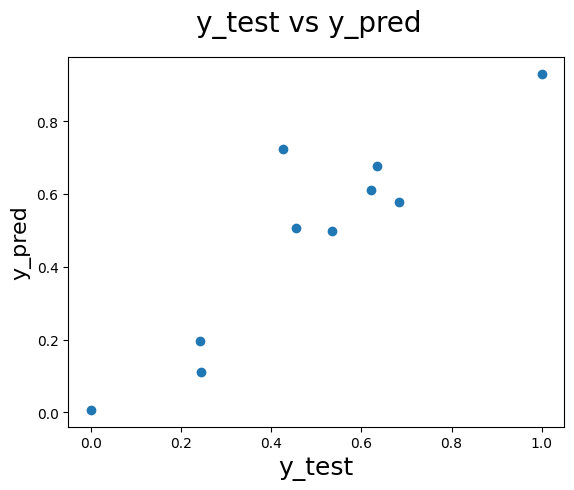

In [872]:
## Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [873]:
## Elasticity
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm_1, y_train, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

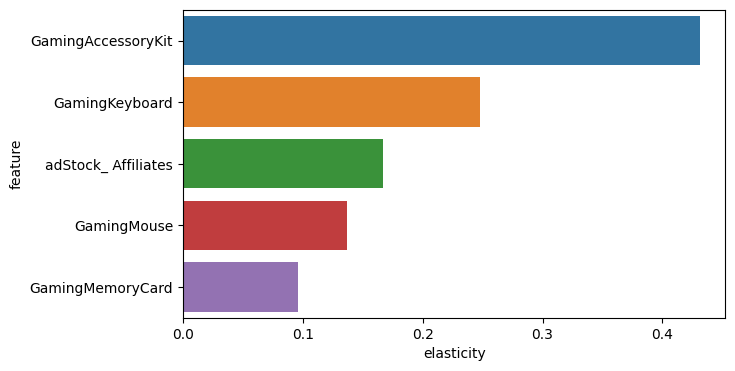

In [874]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

In [875]:
## Koyck model for Home Audio
# creating dataset with lag gmv feature
df = createKoyckKPI(final_home_data)
df.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
0            32      8  2015    0.027648         0.776115   
1            36      9  2015    0.777460         0.580839   
2            37      9  2015    1.164606         0.556733   
3            38      9  2015    1.358178         0.544679   
4            39      9  2015    1.454965         0.538653   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             1.267609                   0.000112                  0.204007   
1            12.815056                   0.122060                  3.307299   
2            18.960905                   0.183088                  4.929143   
3            22.033829                   0.213603                  5.740065   
4            23.570291                   0.228860                  6.145525   

   adStock_ Affiliates  adStock_SEM  ...  DJController  Dock  DockingStation  \
0             0.091763     1.531288  ...           0.0   0.0             0.0   
1             1.025499     1.849175  ...           0.0  48.0             0.0   
2             1.520115     2.155199  ...           0.0  54.0             3.0   
3             1.767423     2.308211  ...           0.0  53.0             2.0   
4             1.891077     2.384717  ...           0.0  51.0             3.0   

   FMRadio  HiFiSystem  HomeAudioSpeaker  SlingBox  SoundMixer  VoiceRecorder  \
0      0.0         0.0               1.0       0.0         0.0            0.0   
1    441.0        22.0            1031.0       0.0         0.0           39.0   
2    517.0        26.0            1130.0       0.0         0.0           50.0   
3    462.0        23.0            1060.0       0.0         0.0           28.0   
4    677.0        19.0            1205.0       0.0         0.0           34.0   

     gmv_lag  
0        0.0  
1     2599.0  
2  2899710.0  
3  3208845.0  
4  2888072.0  

[5 rows x 36 columns]

In [876]:
df=df.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [877]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [878]:
scaler = MinMaxScaler()

In [879]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'gmv_lag']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [880]:
y_train = df_train.pop('gmv')
X_train = df_train

In [881]:
# Create a Linear Regression model
lm = LinearRegression()

# Fit the model on training data
lm.fit(X_train, y_train)

# Running Recursive Feature Elimination (RFE) to select top 20 features
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [882]:
#selecting the top 20 feature given by rfe
cols = X_train.columns[rfe.support_]
cols

Index(['Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'product_procurement_sla', 'NPS', 'discount', 'Dock',
       'DockingStation', 'HiFiSystem', 'HomeAudioSpeaker', 'VoiceRecorder',
       'gmv_lag'],
      dtype='object')

In [883]:
# neglecting the feature not selected by rfe
X_train.columns[~rfe.support_]

Index(['weekly_order', 'Month', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'FMRadio', 'SlingBox', 'SoundMixer'],
      dtype='object')

In [884]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [885]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     920.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.13e-19
Time:                        17:46:02   Log-Likelihood:                 144.83
No. Observations:                  36   AIC:                            -247.7
Df Residuals:                      15   BIC:                            -214.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  3.666874e+09
8                 adStock_SEM  5.996161e+04
3             adStock_Digital  3.905331e+04
9               adStock_Radio  3.185139e+04
10              adStock_Other  2.739994e+04
7         adStock_ Affiliates  1.768780e+03
6    adStock_Online marketing  1.606610e+03
2                  adStock_TV  1.372730e+03
5   adStock_Content Marketing  5.738200e+02
4         adStock_Sponsorship  4.786600e+02
1                        Year  2.233600e+02
13                        NPS  1.176900e+02
14                   discount  2.694000e+01
18           HomeAudioSpeaker  2.374000e+01
16             DockingStation  2.072000e+01
11                        sla  1.426000e+01
15                       Dock  1.066000e+01
20                    gmv_lag  8.250000e+00
17                 HiFiSystem  8.070000e+00
12    product_procurement_sla  7.390000e+00
19              VoiceRecorder  6.430000e+00

In [886]:
# Let's drop feature  with highest p-value
X_train_new= X_train_rfe.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1030.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.50e-21
Time:                        17:46:02   Log-Likelihood:                 144.77
No. Observations:                  36   AIC:                            -249.5
Df Residuals:                      16   BIC:                            -217.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features           VIF
0                       const  1.213635e+09
7                 adStock_SEM  8.680760e+03
8               adStock_Radio  5.129900e+03
9               adStock_Other  4.989750e+03
3             adStock_Digital  4.771180e+03
6         adStock_ Affiliates  1.116630e+03
5    adStock_Online marketing  1.064890e+03
4   adStock_Content Marketing  5.032600e+02
2                  adStock_TV  4.417100e+02
1                        Year  7.382000e+01
13                   discount  2.107000e+01
17           HomeAudioSpeaker  1.772000e+01
15             DockingStation  1.400000e+01
10                        sla  1.279000e+01
12                        NPS  1.207000e+01
14                       Dock  1.047000e+01
16                 HiFiSystem  7.660000e+00
11    product_procurement_sla  7.350000e+00
19                    gmv_lag  7.030000e+00
18              VoiceRecorder  6.360000e+00

In [887]:
# Let's drop feature  with highest p-value
X_train_new1= X_train_new.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1153.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.02e-22
Time:                        17:46:02   Log-Likelihood:                 144.73
No. Observations:                  36   AIC:                            -251.5
Df Residuals:                      17   BIC:                            -221.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
6                 adStock_SEM  1747.72
8               adStock_Other  1300.29
7               adStock_Radio  1269.04
2             adStock_Digital  1061.80
4    adStock_Online marketing   886.04
5         adStock_ Affiliates   807.03
0                       const   333.88
3   adStock_Content Marketing   310.04
1                  adStock_TV   106.93
12                   discount    18.33
16           HomeAudioSpeaker    17.47
14             DockingStation    10.90
13                       Dock    10.42
11                        NPS     9.60
15                 HiFiSystem     7.36
10    product_procurement_sla     7.28
18                    gmv_lag     6.17
17              VoiceRecorder     5.79
9                         sla     5.28

In [888]:
# Let's drop feature  with highest p-value
X_train_new2= X_train_new1.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1275.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.11e-24
Time:                        17:46:02   Log-Likelihood:                 144.49
No. Observations:                  36   AIC:                            -253.0
Df Residuals:                      18   BIC:                            -224.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
6                 adStock_SEM  1538.06
8               adStock_Other  1178.19
7               adStock_Radio  1148.35
2             adStock_Digital   938.15
4    adStock_Online marketing   882.92
5         adStock_ Affiliates   790.59
3   adStock_Content Marketing   300.00
0                       const   274.27
1                  adStock_TV    99.59
15           HomeAudioSpeaker    12.64
13             DockingStation    10.76
12                       Dock    10.30
11                        NPS     8.63
14                 HiFiSystem     7.22
17                    gmv_lag     6.00
16              VoiceRecorder     5.78
9                         sla     4.38
10    product_procurement_sla     4.01

In [889]:
# Let's drop feature  with highest p-value
X_train_new3= X_train_new2.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1410.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           9.17e-26
Time:                        17:46:02   Log-Likelihood:                 144.23
No. Observations:                  36   AIC:                            -254.5
Df Residuals:                      19   BIC:                            -227.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
6                 adStock_SEM  1406.90
8               adStock_Other  1042.49
7               adStock_Radio  1017.47
4    adStock_Online marketing   871.79
2             adStock_Digital   867.52
5         adStock_ Affiliates   769.65
3   adStock_Content Marketing   298.84
0                       const   121.04
1                  adStock_TV    87.67
12             DockingStation    10.26
11                       Dock     9.44
14           HomeAudioSpeaker     9.00
10                        NPS     8.58
13                 HiFiSystem     7.18
16                    gmv_lag     5.94
15              VoiceRecorder     5.29
9     product_procurement_sla     2.06

In [890]:
# Let's drop feature  with highest p-value
X_train_new4 = X_train_new3.drop(["gmv_lag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1544.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.87e-27
Time:                        17:46:03   Log-Likelihood:                 143.78
No. Observations:                  36   AIC:                            -255.6
Df Residuals:                      20   BIC:                            -230.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features      VIF
6                 adStock_SEM  1393.68
8               adStock_Other  1021.37
7               adStock_Radio   980.69
2             adStock_Digital   866.98
4    adStock_Online marketing   853.63
5         adStock_ Affiliates   761.19
3   adStock_Content Marketing   262.52
0                       const   111.71
1                  adStock_TV    87.46
12             DockingStation    10.23
11                       Dock     9.44
10                        NPS     7.63
13                 HiFiSystem     7.16
14           HomeAudioSpeaker     5.50
15              VoiceRecorder     5.28
9     product_procurement_sla     1.99

In [891]:
# Let's drop feature  with highest VIF
X_train_new5 = X_train_new4.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     931.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.59e-26
Time:                        17:46:03   Log-Likelihood:                 132.58
No. Observations:                  36   AIC:                            -235.2
Df Residuals:                      21   BIC:                            -211.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4    adStock_Online marketing  637.42
5         adStock_ Affiliates  474.24
3   adStock_Content Marketing  228.13
2             adStock_Digital  159.14
7               adStock_Other  157.34
6               adStock_Radio  154.52
0                       const   80.38
1                  adStock_TV   13.17
11             DockingStation    8.65
10                       Dock    8.25
12                 HiFiSystem    7.13
13           HomeAudioSpeaker    5.20
14              VoiceRecorder    4.91
9                         NPS    4.56
8     product_procurement_sla    1.92

In [892]:
# Let's drop feature  with highest p-value
X_train_new6 = X_train_new5.drop(["Dock"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1051.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.37e-27
Time:                        17:46:03   Log-Likelihood:                 132.58
No. Observations:                  36   AIC:                            -237.2
Df Residuals:                      22   BIC:                            -215.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
4    adStock_Online marketing  475.33
5         adStock_ Affiliates  378.64
3   adStock_Content Marketing  164.30
6               adStock_Radio  136.42
7               adStock_Other  125.72
2             adStock_Digital  123.06
0                       const   72.46
1                  adStock_TV   11.18
10             DockingStation    7.76
11                 HiFiSystem    5.24
13              VoiceRecorder    4.65
9                         NPS    4.49
12           HomeAudioSpeaker    4.32
8     product_procurement_sla    1.91

In [893]:
# Let's drop feature  with highest p-value
X_train_new7 = X_train_new6.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1189.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.89e-29
Time:                        17:46:03   Log-Likelihood:                 132.56
No. Observations:                  36   AIC:                            -239.1
Df Residuals:                      23   BIC:                            -218.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
5               adStock_Radio  129.28
6               adStock_Other  105.65
3   adStock_Content Marketing   86.67
2             adStock_Digital   85.64
0                       const   72.21
4    adStock_Online marketing   14.28
1                  adStock_TV   10.68
9              DockingStation    7.05
10                 HiFiSystem    4.73
12              VoiceRecorder    4.65
11           HomeAudioSpeaker    4.13
8                         NPS    4.00
7     product_procurement_sla    1.69

In [894]:
# Let's drop feature  with highest p-value
X_train_new8 = X_train_new7.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1354.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.02e-30
Time:                        17:46:03   Log-Likelihood:                 132.56
No. Observations:                  36   AIC:                            -241.1
Df Residuals:                      24   BIC:                            -222.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
4               adStock_Radio  91.04
3   adStock_Content Marketing  61.56
5               adStock_Other  61.23
2             adStock_Digital  60.78
0                       const  41.46
8              DockingStation   6.78
11              VoiceRecorder   4.65
9                  HiFiSystem   4.22
1                  adStock_TV   4.12
10           HomeAudioSpeaker   4.07
7                         NPS   2.08
6     product_procurement_sla   1.69

In [895]:
# Let's drop feature  with highest p-value
X_train_new9 = X_train_new8.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1549.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.55e-32
Time:                        17:46:03   Log-Likelihood:                 132.54
No. Observations:                  36   AIC:                            -243.1
Df Residuals:                      25   BIC:                            -225.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                       const  32.90
2             adStock_Digital  25.99
3   adStock_Content Marketing  23.04
7              DockingStation   4.99
10              VoiceRecorder   4.34
8                  HiFiSystem   4.18
9            HomeAudioSpeaker   4.05
4               adStock_Other   3.96
1                  adStock_TV   3.37
6                         NPS   1.95
5     product_procurement_sla   1.56

In [896]:
# Let's drop feature  with highest p-value
X_train_new10 = X_train_new9.drop(["DockingStation"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1776.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.41e-34
Time:                        17:46:03   Log-Likelihood:                 132.40
No. Observations:                  36   AIC:                            -244.8
Df Residuals:                      26   BIC:                            -229.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  25.38
2            adStock_Digital  22.79
3  adStock_Content Marketing  19.64
7                 HiFiSystem   3.78
4              adStock_Other   3.75
8           HomeAudioSpeaker   3.07
1                 adStock_TV   3.06
9              VoiceRecorder   1.75
5    product_procurement_sla   1.51
6                        NPS   1.49

In [897]:
# Let's drop feature  with highest p-value
X_train_new11 = X_train_new10.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2048.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.61e-35
Time:                        17:46:04   Log-Likelihood:                 132.17
No. Observations:                  36   AIC:                            -246.3
Df Residuals:                      27   BIC:                            -232.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  25.38
2            adStock_Digital   8.76
3  adStock_Content Marketing   8.26
6                 HiFiSystem   3.06
7           HomeAudioSpeaker   2.99
1                 adStock_TV   1.81
8              VoiceRecorder   1.57
5                        NPS   1.49
4    product_procurement_sla   1.33

In [898]:
# Let's drop feature  with highest p-value
X_train_new12 = X_train_new11.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2277.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.68e-37
Time:                        17:46:04   Log-Likelihood:                 131.01
No. Observations:                  36   AIC:                            -246.0
Df Residuals:                      28   BIC:                            -233.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  21.11
2            adStock_Digital   8.73
3  adStock_Content Marketing   8.26
6           HomeAudioSpeaker   2.67
5                 HiFiSystem   2.50
1                 adStock_TV   1.52
7              VoiceRecorder   1.48
4    product_procurement_sla   1.31

In [899]:
# Let's drop feature  with highest p-value
X_train_new13 = X_train_new12.drop(["HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2466.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.75e-38
Time:                        17:46:04   Log-Likelihood:                 129.05
No. Observations:                  36   AIC:                            -244.1
Df Residuals:                      29   BIC:                            -233.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  20.46
2            adStock_Digital   8.40
3  adStock_Content Marketing   8.19
5           HomeAudioSpeaker   2.08
1                 adStock_TV   1.41
4    product_procurement_sla   1.29
6              VoiceRecorder   1.23

In [900]:
# Let's drop feature  with highest p-value
X_train_new14 = X_train_new13.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2717.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.89e-39
Time:                        17:46:04   Log-Likelihood:                 126.91
No. Observations:                  36   AIC:                            -241.8
Df Residuals:                      30   BIC:                            -232.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
0                      const  20.19
2  adStock_Content Marketing   7.79
1            adStock_Digital   7.37
4           HomeAudioSpeaker   2.02
5              VoiceRecorder   1.22
3    product_procurement_sla   1.16

In [901]:
# Let's drop feature  with highest p-value
X_train_new15 = X_train_new14.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm_1 = sm.add_constant(X_train_new15)
    # Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1 .values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3067.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           8.70e-40
Time:                        17:46:04   Log-Likelihood:                 124.49
No. Observations:                  36   AIC:                            -239.0
Df Residuals:                      31   BIC:                            -231.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  19.92
1          adStock_Digital   2.02
3         HomeAudioSpeaker   1.77
4            VoiceRecorder   1.22
2  product_procurement_sla   1.11

In [902]:
# Let's drop feature  with highest p-value
X_train_new16 = X_train_new15.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm_2 = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm_2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2 .values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3709.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           9.66e-41
Time:                        17:46:04   Log-Likelihood:                 122.16
No. Observations:                  36   AIC:                            -236.3
Df Residuals:                      32   BIC:                            -230.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  18.82
3            VoiceRecorder   1.06
1  product_procurement_sla   1.05
2         HomeAudioSpeaker   1.00

In [903]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9817275490600755
lr model 2 r2_score 0.9811573599820423


In [904]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 8.285929099082261e-05
lr model 2 MSE 8.290554179656537e-05


In [905]:
## Based on the R2 scores and mean squared error (MSE), both LR Model 1 and LR Model 2 perform very similarly.
## MSE score of model 1 is less so we can go head with model 1
y_train_price = lr1.predict(X_train_lm_1)

<ipython-input-906-f9aea80bd5b1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Errors')

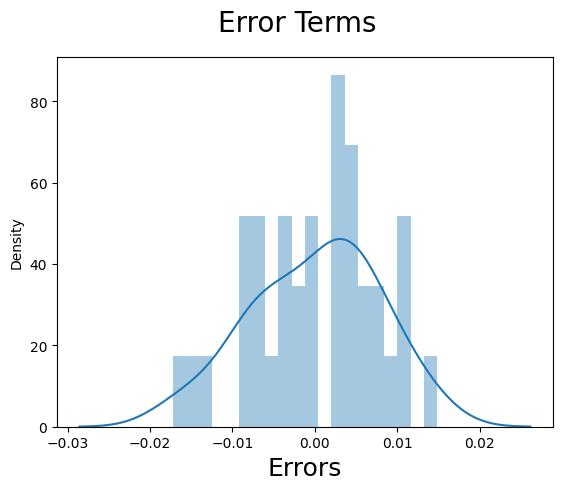

In [906]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [907]:
## Model Evaluation

X_test = df_test
y_test = df_test.pop('gmv')                   # X-label

In [908]:
X_test = X_test[X_train_lm_1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  adStock_Digital  product_procurement_sla  HomeAudioSpeaker  \
6     1.0         1.000000                 0.194437          0.243655   
17    1.0         0.177995                 0.114948          0.784033   
19    1.0         0.072815                 1.000000          1.000000   
29    1.0         0.102300                 0.242494          0.471620   
38    1.0         0.000000                 0.452452          0.213659   
44    1.0         0.039111                 0.268597          0.000000   
5     1.0         0.678371                 0.000000          0.320258   
25    1.0         0.107239                 0.313278          0.844485   
27    1.0         0.109498                 0.513196          0.460545   

    VoiceRecorder  
6        0.177215  
17       0.126582  
19       0.367089  
29       0.670886  
38       1.000000  
44       0.000000  
5        0.025316  
25       0.670886  
27       0.556962

In [909]:
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

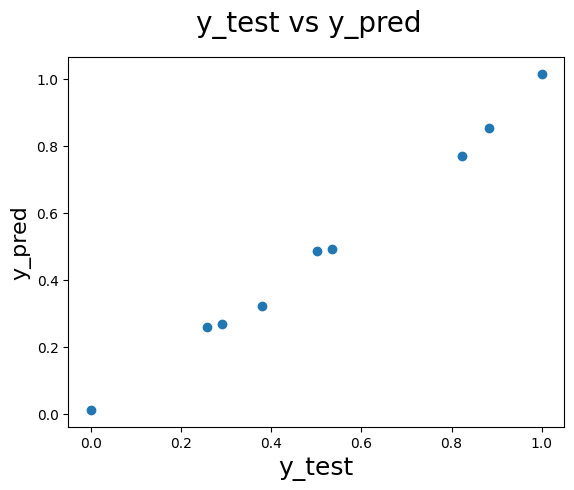

In [910]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [911]:
## elassticity
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm_1, y_train, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

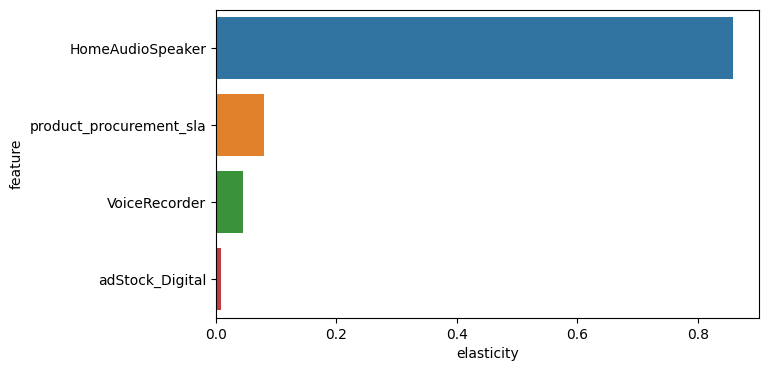

In [912]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

In [913]:
## Building Distributed Lag Model - Data Preparation
def createKPiForDistributedLag(df, lags=3, lag_columns=None):
    if lag_columns is None:
        lag_columns = ['adStock_TV', 'adStock_Digital', 'adStock_Sponsorship', 'adStock_Content Marketing',
                       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM', 'adStock_Other',
                       'gmv', 'sla', 'product_procurement_sla', 'discount', 'NPS']

    for column in lag_columns:
        for i in range(1, lags + 1):
            df[f'{column}_lag{i}'] = df[column].shift(i)

    return df.fillna(0)


## Camera Accessory - Distributed Lag Model

In [914]:
df = createKPiForDistributedLag(final_camera_data)
df.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
0            31      8  2015    0.052078         0.913194   
1            32      8  2015    0.027648         0.776115   
2            33      8  2015    0.014593         0.697681   
3            35      8  2015    0.004801         0.638856   
4            36      9  2015    0.777460         0.580839   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             2.003552                   0.000220                  0.343392   
1             1.267609                   0.000112                  0.204007   
2             0.870676                   0.000054                  0.129130   
3             0.572975                   0.000010                  0.072972   
4            12.815056                   0.122060                  3.307299   

   adStock_ Affiliates  adStock_SEM  ...  sla_lag3  \
0             0.146684     1.805811  ...       0.0   
1             0.091763     1.531288  ...       0.0   
2             0.062165     1.374402  ...       0.0   
3             0.039966     1.256738  ...       6.0   
4             1.025499     1.849175  ...       5.0   

   product_procurement_sla_lag1  product_procurement_sla_lag2  \
0                           0.0                           0.0   
1                           5.0                           0.0   
2                           4.0                           5.0   
3                           1.0                           4.0   
4                           2.0                           1.0   

   product_procurement_sla_lag3  discount_lag1  discount_lag2  discount_lag3  \
0                           0.0           0.00           0.00           0.00   
1                           0.0           0.34           0.00           0.00   
2                           0.0           0.52           0.34           0.00   
3                           5.0           0.85           0.52           0.34   
4                           4.0           0.41           0.85           0.52   

    NPS_lag1   NPS_lag2   NPS_lag3  
0   0.000000   0.000000   0.000000  
1  54.599588   0.000000   0.000000  
2  54.599588  54.599588   0.000000  
3  54.599588  54.599588  54.599588  
4  54.599588  54.599588  54.599588  

[5 rows x 87 columns]

In [915]:
df.shape

(48, 87)

In [916]:
df = df.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [917]:
df.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
0            31      8  2015    0.052078         0.913194   
1            32      8  2015    0.027648         0.776115   
2            33      8  2015    0.014593         0.697681   
3            35      8  2015    0.004801         0.638856   
4            36      9  2015    0.777460         0.580839   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             2.003552                   0.000220                  0.343392   
1             1.267609                   0.000112                  0.204007   
2             0.870676                   0.000054                  0.129130   
3             0.572975                   0.000010                  0.072972   
4            12.815056                   0.122060                  3.307299   

   adStock_ Affiliates  adStock_SEM  ...  sla_lag3  \
0             0.146684     1.805811  ...       0.0   
1             0.091763     1.531288  ...       0.0   
2             0.062165     1.374402  ...       0.0   
3             0.039966     1.256738  ...       6.0   
4             1.025499     1.849175  ...       5.0   

   product_procurement_sla_lag1  product_procurement_sla_lag2  \
0                           0.0                           0.0   
1                           5.0                           0.0   
2                           4.0                           5.0   
3                           1.0                           4.0   
4                           2.0                           1.0   

   product_procurement_sla_lag3  discount_lag1  discount_lag2  discount_lag3  \
0                           0.0           0.00           0.00           0.00   
1                           0.0           0.34           0.00           0.00   
2                           0.0           0.52           0.34           0.00   
3                           5.0           0.85           0.52           0.34   
4                           4.0           0.41           0.85           0.52   

    NPS_lag1   NPS_lag2   NPS_lag3  
0   0.000000   0.000000   0.000000  
1  54.599588   0.000000   0.000000  
2  54.599588  54.599588   0.000000  
3  54.599588  54.599588  54.599588  
4  54.599588  54.599588  54.599588  

[5 rows x 83 columns]

In [918]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [919]:
scaler = MinMaxScaler()

In [920]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_Online marketing_lag2', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag2',
       'adStock_ Affiliates_lag3', 'adStock_SEM_lag1', 'adStock_SEM_lag2',
       'adStock_SEM_lag3', 'adStock_Other_lag1', 'adStock_Other_lag2',
       'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1',
       'sla_lag2', 'sla_lag3', 'product_procurement_sla_lag1',
       'product_procurement_sla_lag2', 'product_procurement_sla_lag3',
       'discount_lag1', 'discount_lag2', 'discount_lag3', 'NPS_lag1',
       'NPS_lag2', 'NPS_lag3']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [921]:
y_train = df_train.pop('gmv')
X_train = df_train

In [922]:
# Create a Linear Regression model
lm = LinearRegression()

# Fit the model on training data
lm.fit(X_train, y_train)

# Running Recursive Feature Elimination (RFE) to select top 20 features
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [923]:
cols = X_train.columns[rfe.support_]
cols

Index(['product_procurement_sla', 'NPS', 'Binoculars', 'CameraRemoteControl',
       'CameraTripod', 'Filter', 'Flash', 'Lens', 'Strap', 'Telescope',
       'adStock_TV_lag3', 'adStock_Digital_lag2', 'adStock_Sponsorship_lag3',
       'adStock_ Affiliates_lag2', 'adStock_Other_lag2', 'adStock_Other_lag3',
       'sla_lag2', 'discount_lag1', 'discount_lag3', 'NPS_lag1'],
      dtype='object')

In [924]:
X_train.columns[~rfe.support_]

Index(['weekly_order', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'discount',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'ExtensionTube', 'FlashShoeAdapter', 'ReflectorUmbrella', 'Softbox',
       'gmv_lag', 'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_Digital_lag1',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'adStock_Content Marketing_lag1',
       'adStock_Content Marketing_lag2', 'adStock_Content Marketing_lag3',
       'adStock_Online marketing_lag1', 'adStock_Online marketing_lag2',
       'adSt

In [925]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [926]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     391.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.63e-19
Time:                        17:46:08   Log-Likelihood:                 126.36
No. Observations:                  38   AIC:                            -210.7
Df Residuals:                      17   BIC:                            -176.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  528.57
6                     Filter   44.70
8                       Lens   32.96
4        CameraRemoteControl   16.53
13  adStock_Sponsorship_lag3   11.79
10                 Telescope   10.34
19             discount_lag3    9.61
17                  sla_lag2    9.59
3                 Binoculars    8.98
16        adStock_Other_lag3    8.45
1    product_procurement_sla    8.42
14  adStock_ Affiliates_lag2    7.31
15        adStock_Other_lag2    7.14
9                      Strap    7.10
12      adStock_Digital_lag2    6.58
18             discount_lag1    6.02
2                        NPS    5.38
11           adStock_TV_lag3    4.88
5               CameraTripod    4.81
7                      Flash    4.59
20                  NPS_lag1    3.83

In [927]:
# Let's drop feature discount_lag1 with highest p-value
X_train_new= X_train_rfe.drop(["discount_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     434.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.73e-20
Time:                        17:46:08   Log-Likelihood:                 126.26
No. Observations:                  38   AIC:                            -212.5
Df Residuals:                      18   BIC:                            -179.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  318.45
6                     Filter   40.42
8                       Lens   31.32
4        CameraRemoteControl   15.08
13  adStock_Sponsorship_lag3   11.52
10                 Telescope   10.34
3                 Binoculars    8.95
16        adStock_Other_lag3    8.41
17                  sla_lag2    8.40
14  adStock_ Affiliates_lag2    7.28
9                      Strap    7.06
15        adStock_Other_lag2    7.06
18             discount_lag3    6.66
12      adStock_Digital_lag2    6.58
1    product_procurement_sla    5.38
2                        NPS    5.24
5               CameraTripod    4.80
11           adStock_TV_lag3    4.69
7                      Flash    4.44
19                  NPS_lag1    3.40

In [928]:
# Let's drop feature with high VIF
X_train_new1 = X_train_new.drop(["Filter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     357.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.89e-20
Time:                        17:46:08   Log-Likelihood:                 120.52
No. Observations:                  38   AIC:                            -203.0
Df Residuals:                      19   BIC:                            -171.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  300.20
9                  Telescope    9.42
3                 Binoculars    8.78
7                       Lens    8.36
16                  sla_lag2    8.24
4        CameraRemoteControl    7.82
13  adStock_ Affiliates_lag2    7.14
12  adStock_Sponsorship_lag3    7.00
8                      Strap    6.90
15        adStock_Other_lag3    6.30
17             discount_lag3    6.15
11      adStock_Digital_lag2    5.68
1    product_procurement_sla    5.27
14        adStock_Other_lag2    5.10
2                        NPS    4.97
5               CameraTripod    4.51
6                      Flash    4.43
10           adStock_TV_lag3    3.62
18                  NPS_lag1    3.02

In [929]:
# Let's drop feature with high p-value
X_train_new2 = X_train_new1.drop(["discount_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     289.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.42e-20
Time:                        17:46:08   Log-Likelihood:                 114.45
No. Observations:                  38   AIC:                            -192.9
Df Residuals:                      20   BIC:                            -163.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  246.29
9                  Telescope    9.11
3                 Binoculars    8.53
7                       Lens    8.31
4        CameraRemoteControl    7.81
13  adStock_ Affiliates_lag2    7.09
8                      Strap    6.84
12  adStock_Sponsorship_lag3    6.57
15        adStock_Other_lag3    5.98
11      adStock_Digital_lag2    5.49
16                  sla_lag2    5.41
2                        NPS    4.96
14        adStock_Other_lag2    4.85
1    product_procurement_sla    4.51
6                      Flash    4.43
5               CameraTripod    4.07
10           adStock_TV_lag3    3.61
17                  NPS_lag1    2.72

In [930]:
# Let's drop feature with high p-value
X_train_new3 = X_train_new2.drop(["Telescope"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     259.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.80e-20
Time:                        17:46:08   Log-Likelihood:                 110.32
No. Observations:                  38   AIC:                            -186.6
Df Residuals:                      21   BIC:                            -158.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  235.53
3                 Binoculars    8.17
7                       Lens    7.96
4        CameraRemoteControl    7.51
12  adStock_ Affiliates_lag2    7.01
11  adStock_Sponsorship_lag3    6.44
14        adStock_Other_lag3    5.67
15                  sla_lag2    5.34
10      adStock_Digital_lag2    5.22
8                      Strap    5.14
13        adStock_Other_lag2    4.65
2                        NPS    4.58
1    product_procurement_sla    4.50
6                      Flash    3.85
9            adStock_TV_lag3    3.61
5               CameraTripod    3.49
16                  NPS_lag1    2.68

In [931]:
# Let's drop feature with high p-value
X_train_new4 = X_train_new3.drop(["adStock_ Affiliates_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     216.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.50e-20
Time:                        17:46:08   Log-Likelihood:                 104.79
No. Observations:                  38   AIC:                            -177.6
Df Residuals:                      22   BIC:                            -151.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  232.92
3                 Binoculars    8.16
7                       Lens    7.88
4        CameraRemoteControl    7.14
11  adStock_Sponsorship_lag3    6.43
13        adStock_Other_lag3    5.66
10      adStock_Digital_lag2    5.22
8                      Strap    4.88
14                  sla_lag2    4.75
12        adStock_Other_lag2    4.55
1    product_procurement_sla    4.26
6                      Flash    3.70
9            adStock_TV_lag3    3.52
5               CameraTripod    3.40
2                        NPS    2.99
15                  NPS_lag1    2.55

In [932]:
# Let's drop feature with high VIF
X_train_new5 = X_train_new4.drop(["CameraRemoteControl"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.62e-18
Time:                        17:46:08   Log-Likelihood:                 93.265
No. Observations:                  38   AIC:                            -156.5
Df Residuals:                      23   BIC:                            -132.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  214.79
3                 Binoculars    8.10
10  adStock_Sponsorship_lag3    6.20
6                       Lens    6.17
12        adStock_Other_lag3    5.66
7                      Strap    4.86
11        adStock_Other_lag2    4.53
9       adStock_Digital_lag2    4.52
13                  sla_lag2    3.96
5                      Flash    3.70
1    product_procurement_sla    3.61
8            adStock_TV_lag3    3.52
4               CameraTripod    2.95
2                        NPS    2.90
14                  NPS_lag1    2.53

In [933]:
# Let's drop feature with high p-value
X_train_new6 = X_train_new5.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     120.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.47e-18
Time:                        17:46:08   Log-Likelihood:                 89.394
No. Observations:                  38   AIC:                            -150.8
Df Residuals:                      24   BIC:                            -127.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  209.82
2                 Binoculars    7.72
9   adStock_Sponsorship_lag3    5.80
11        adStock_Other_lag3    5.65
5                       Lens    5.31
6                      Strap    4.77
8       adStock_Digital_lag2    4.52
10        adStock_Other_lag2    4.52
12                  sla_lag2    3.74
4                      Flash    3.68
1    product_procurement_sla    3.61
7            adStock_TV_lag3    3.01
3               CameraTripod    2.83
13                  NPS_lag1    2.19

In [934]:
# Let's drop feature with high VIF
X_train_new7 = X_train_new6.drop(["Binoculars"], axis = 1)
 # Add a constant
X_train_lm_1 = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1 .values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     119.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.57e-19
Time:                        17:46:08   Log-Likelihood:                 87.078
No. Observations:                  38   AIC:                            -148.2
Df Residuals:                      25   BIC:                            -126.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  209.74
10        adStock_Other_lag3    5.57
8   adStock_Sponsorship_lag3    5.22
5                      Strap    4.63
9         adStock_Other_lag2    4.40
11                  sla_lag2    3.65
3                      Flash    3.64
1    product_procurement_sla    3.61
7       adStock_Digital_lag2    3.49
4                       Lens    2.91
6            adStock_TV_lag3    2.53
12                  NPS_lag1    2.17
2               CameraTripod    2.15

In [935]:
# Let's drop feature with high p-value
X_train_new8 = X_train_new7.drop(["Strap"], axis = 1)
 # Add a constant
X_train_lm_2 = sm.add_constant(X_train_new8)
    # Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm_2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2 .values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     103.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.50e-18
Time:                        17:46:08   Log-Likelihood:                 81.960
No. Observations:                  38   AIC:                            -139.9
Df Residuals:                      26   BIC:                            -120.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  209.39
7   adStock_Sponsorship_lag3    5.20
9         adStock_Other_lag3    5.02
8         adStock_Other_lag2    4.13
1    product_procurement_sla    3.50
10                  sla_lag2    3.37
6       adStock_Digital_lag2    3.14
4                       Lens    2.71
5            adStock_TV_lag3    2.37
3                      Flash    2.26
2               CameraTripod    2.15
11                  NPS_lag1    2.06

In [936]:
# Let's drop feature with high p-value
X_train_new9 = X_train_new8.drop(["adStock_Other_lag2"], axis = 1)
 # Add a constant
X_train_lm_3 = sm.add_constant(X_train_new9)
    # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm_3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_3 .values, i) for i in range(X_train_lm_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     81.63
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.59e-17
Time:                        17:46:08   Log-Likelihood:                 75.178
No. Observations:                  38   AIC:                            -128.4
Df Residuals:                      27   BIC:                            -110.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const  209.26
7   adStock_Sponsorship_lag3    4.95
1    product_procurement_sla    3.49
9                   sla_lag2    3.36
6       adStock_Digital_lag2    3.00
4                       Lens    2.71
5            adStock_TV_lag3    2.36
3                      Flash    2.26
2               CameraTripod    2.13
10                  NPS_lag1    2.06
8         adStock_Other_lag3    1.75

In [937]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2,X_train_lm_3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.8951133901056755
lr model 2 r2_score 0.8777903886071524
lr model 3 r2_score 0.8641012259571408


In [938]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2,X_train_lm_3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"r2_score", -scores.mean())

lr model 1 r2_score 0.0036041494476769563
lr model 2 r2_score 0.005317748687397743
lr model 3 r2_score 0.005514791695282341


It looks like the first linear regression model (lr model 1) has the highest R-squared score, indicating that it explains the variance in the dependent variable the best among the three models.

In [939]:
## Residual analysis
y_train_price = lr1.predict(X_train_lm_1)

<ipython-input-940-f9aea80bd5b1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Errors')

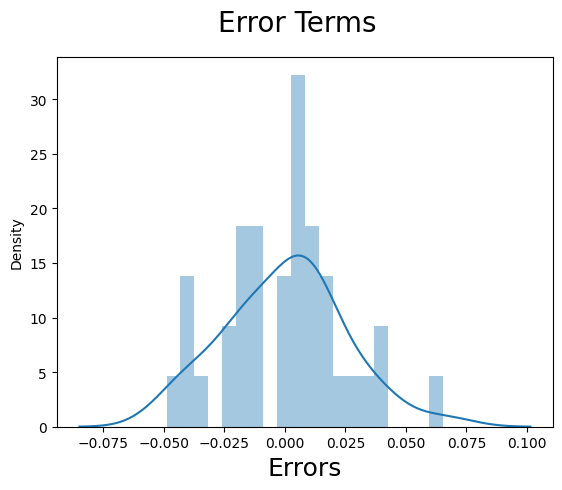

In [940]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [941]:
# model evaluation
y_test = df_test.pop('gmv')
X_test = df_test

In [942]:
X_test = X_test[X_train_lm_1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test.head()

const  product_procurement_sla  CameraTripod     Flash      Lens  \
6     1.0                 0.954889      0.483136  0.027968  0.314465   
28    1.0                 0.592087      0.614403  0.799658  0.468553   
32    1.0                 0.022083      0.424795  0.743721  0.273585   
26    1.0                 0.646847      0.434822  0.981164  0.496855   
41    1.0                 0.167410      0.305378  0.798516  0.867925   

       Strap  adStock_TV_lag3  adStock_Digital_lag2  adStock_Sponsorship_lag3  \
6   0.000000         0.000000              0.431076                  0.000000   
28  0.463415         0.823728              0.471766                  0.184828   
32  0.512195         0.502028              0.938293                  0.377460   
26  0.536585         0.821501              0.000000                  0.474898   
41  0.707317         0.619194              0.100054                  1.000000   

    adStock_Other_lag2  adStock_Other_lag3  sla_lag2  NPS_lag1  
6             0.000000             0.00000  0.199584  1.000000  
28            0.535714             1.00000  0.135726  0.091141  
32            0.286938             0.05000  0.085075  0.319121  
26            1.000000             0.80000  0.146440  0.000000  
41            0.157791             0.10603  0.013914  0.424865

In [943]:
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

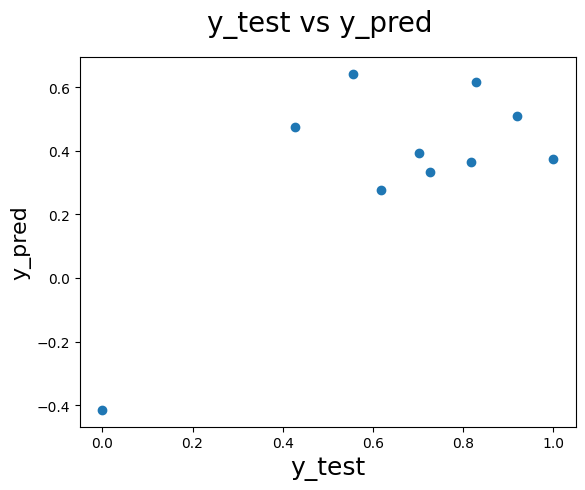

In [944]:
## Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [945]:
## Elasticity
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm_1, y_train, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

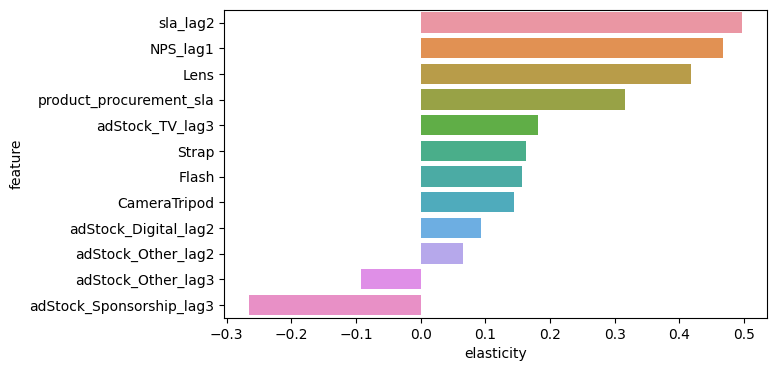

In [946]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

## Game Accessory - Distributed lag models


In [947]:
df = createKPiForDistributedLag(final_gaming_data)

In [948]:
df = df.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [949]:
df.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
0            31      8  2015    0.052078         0.913194   
1            32      8  2015    0.027648         0.776115   
2            33      8  2015    0.014593         0.697681   
3            34      8  2015    0.008065         0.658465   
4            35      8  2015    0.004801         0.638856   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             2.003552                   0.000220                  0.343392   
1             1.267609                   0.000112                  0.204007   
2             0.870676                   0.000054                  0.129130   
3             0.672209                   0.000025                  0.091691   
4             0.572975                   0.000010                  0.072972   

   adStock_ Affiliates  adStock_SEM  ...  sla_lag3  \
0             0.146684     1.805811  ...      0.00   
1             0.091763     1.531288  ...      0.00   
2             0.062165     1.374402  ...      0.00   
3             0.047366     1.295959  ...      9.00   
4             0.039966     1.256738  ...      7.25   

   product_procurement_sla_lag1  product_procurement_sla_lag2  \
0                          0.00                          0.00   
1                          3.00                          0.00   
2                          2.25                          3.00   
3                          2.50                          2.25   
4                          2.50                          2.50   

   product_procurement_sla_lag3  discount_lag1  discount_lag2  discount_lag3  \
0                          0.00          0.000          0.000           0.00   
1                          0.00          0.410          0.000           0.00   
2                          0.00          0.630          0.410           0.00   
3                          3.00          0.385          0.630           0.41   
4                          2.25          0.505          0.385           0.63   

    NPS_lag1   NPS_lag2   NPS_lag3  
0   0.000000   0.000000   0.000000  
1  54.599588   0.000000   0.000000  
2  54.599588  54.599588   0.000000  
3  54.599588  54.599588  54.599588  
4  54.599588  54.599588  54.599588  

[5 rows x 76 columns]

In [950]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.20, random_state = 100)

In [951]:
scaler = MinMaxScaler()

In [952]:
# Apply scaler() to all the columns except the categorical variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS',
        'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'adStock_TV_lag1', 'adStock_TV_lag2',
       'adStock_TV_lag3', 'adStock_Digital_lag1', 'adStock_Digital_lag2',
       'adStock_Digital_lag3', 'adStock_Sponsorship_lag1',
       'adStock_Sponsorship_lag2', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_Online marketing_lag2', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag2',
       'adStock_ Affiliates_lag3', 'adStock_SEM_lag1', 'adStock_SEM_lag2',
       'adStock_SEM_lag3', 'adStock_Other_lag1', 'adStock_Other_lag2',
       'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1',
       'sla_lag2', 'sla_lag3', 'product_procurement_sla_lag1',
       'product_procurement_sla_lag2', 'product_procurement_sla_lag3',
       'discount_lag1', 'discount_lag2', 'discount_lag3', 'NPS_lag1',
       'NPS_lag2', 'NPS_lag3']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [953]:
y_train = df_train.pop('gmv')
X_train = df_train

In [954]:
# Create a Linear Regression model
lm = LinearRegression()

# Fit the model on training data
lm.fit(X_train, y_train)

# Running Recursive Feature Elimination (RFE) to select top 20 features
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [955]:
# selecting the top 20 features by rfe
cols = X_train.columns[rfe.support_]
cols

Index(['adStock_TV', 'adStock_Sponsorship', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_Radio', 'discount', 'GamePad',
       'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse',
       'JoystickGamingWheel', 'adStock_TV_lag3', 'adStock_Digital_lag2',
       'adStock_Content Marketing_lag1', 'adStock_SEM_lag1', 'sla_lag1',
       'NPS_lag1', 'NPS_lag2', 'NPS_lag3'],
      dtype='object')

In [956]:
X_train.columns[~rfe.support_]

Index(['weekly_order', 'Month', 'Year', 'adStock_Digital',
       'adStock_Content Marketing', 'adStock_SEM', 'adStock_Other', 'sla',
       'product_procurement_sla', 'NPS', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingMousePad', 'GamingSpeaker',
       'MotionController', 'TVOutCableAccessory', 'gmv_lag', 'adStock_TV_lag1',
       'adStock_TV_lag2', 'adStock_Digital_lag1', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Sponsorship_lag2',
       'adStock_Sponsorship_lag3', 'adStock_Content Marketing_lag2',
       'adStock_Content Marketing_lag3', 'adStock_Online marketing_lag1',
       'adStock_Online marketing_lag2', 'adStock_Online marketing_lag3',
       'adStock_ Affiliates_lag1', 'adStock_ Affiliates_lag2',
       'adStock_ Affiliates_lag3', 'adStock_SEM_lag2', 'adStock_SEM_lag3',
       'adStock_Ot

In [957]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [958]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     641.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.01e-21
Time:                        17:46:11   Log-Likelihood:                 138.16
No. Observations:                  39   AIC:                            -234.3
Df Residuals:                      18   BIC:                            -199.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features      VIF
3         adStock_Online marketing  1489.73
4              adStock_ Affiliates  1457.04
16                adStock_SEM_lag1    65.39
2              adStock_Sponsorship    57.83
15  adStock_Content Marketing_lag1    55.53
0                            const    51.22
1                       adStock_TV    33.87
19                        NPS_lag2    21.18
9                   GamingKeyboard    17.41
13                 adStock_TV_lag3    16.90
5                    adStock_Radio    14.00
6                         discount    13.69
8                    GamingHeadset    13.60
11                     GamingMouse    13.09
18                        NPS_lag1    12.41
20                        NPS_lag3    11.35
14            adStock_Digital_lag2    10.69
7                          GamePad    10.12
17                        sla_lag1     5.95
10                GamingMemoryCard     4.92
12             JoystickGamingWheel     4.81

In [959]:
# Let's drop feature  with highest p-value
X_train_new= X_train_rfe.drop(["adStock_Digital_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     671.9
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.38e-23
Time:                        17:46:11   Log-Likelihood:                 137.03
No. Observations:                  39   AIC:                            -234.1
Df Residuals:                      19   BIC:                            -200.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features      VIF
4              adStock_ Affiliates  1343.68
3         adStock_Online marketing  1334.37
2              adStock_Sponsorship    57.04
14  adStock_Content Marketing_lag1    55.52
15                adStock_SEM_lag1    55.07
0                            const    51.16
1                       adStock_TV    31.70
18                        NPS_lag2    21.15
13                 adStock_TV_lag3    14.56
6                         discount    13.67
8                    GamingHeadset    13.46
5                    adStock_Radio    13.28
9                   GamingKeyboard    12.89
17                        NPS_lag1    12.39
19                        NPS_lag3    11.35
11                     GamingMouse    10.52
7                          GamePad     8.96
16                        sla_lag1     5.92
10                GamingMemoryCard     4.72
12             JoystickGamingWheel     4.65

In [960]:
# Let's drop feature  with highest p-value
X_train_new1= X_train_new.drop(["adStock_TV_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     689.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.00e-24
Time:                        17:46:11   Log-Likelihood:                 135.49
No. Observations:                  39   AIC:                            -233.0
Df Residuals:                      20   BIC:                            -201.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features      VIF
4              adStock_ Affiliates  1343.66
3         adStock_Online marketing  1325.83
2              adStock_Sponsorship    52.13
0                            const    50.35
13  adStock_Content Marketing_lag1    48.95
14                adStock_SEM_lag1    47.06
1                       adStock_TV    22.34
17                        NPS_lag2    19.56
8                    GamingHeadset    13.15
5                    adStock_Radio    12.62
6                         discount    12.33
9                   GamingKeyboard    12.14
16                        NPS_lag1    11.89
18                        NPS_lag3    10.72
7                          GamePad     8.96
11                     GamingMouse     8.43
15                        sla_lag1     5.79
10                GamingMemoryCard     4.71
12             JoystickGamingWheel     4.37

In [961]:
# Let's drop feature  with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     679.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.25e-25
Time:                        17:46:11   Log-Likelihood:                 133.13
No. Observations:                  39   AIC:                            -230.3
Df Residuals:                      21   BIC:                            -200.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features     VIF
2         adStock_Online marketing  478.48
3              adStock_ Affiliates  424.68
0                            const   49.35
12  adStock_Content Marketing_lag1   42.26
13                adStock_SEM_lag1   40.46
1              adStock_Sponsorship   18.03
16                        NPS_lag2   17.65
7                    GamingHeadset   12.97
8                   GamingKeyboard   12.04
15                        NPS_lag1   11.52
5                         discount   10.84
17                        NPS_lag3    9.48
6                          GamePad    8.91
10                     GamingMouse    8.32
4                    adStock_Radio    7.42
14                        sla_lag1    5.49
9                 GamingMemoryCard    4.68
11             JoystickGamingWheel    3.90

In [962]:
# Let's drop feature  with highest VIF
X_train_new3 = X_train_new2.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     537.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           9.31e-25
Time:                        17:46:11   Log-Likelihood:                 126.49
No. Observations:                  39   AIC:                            -219.0
Df Residuals:                      22   BIC:                            -190.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  49.34
11  adStock_Content Marketing_lag1  41.50
12                adStock_SEM_lag1  39.91
15                        NPS_lag2  15.98
6                    GamingHeadset  11.75
14                        NPS_lag1  11.49
4                         discount   9.20
5                          GamePad   8.62
7                   GamingKeyboard   7.99
9                      GamingMouse   7.74
16                        NPS_lag3   7.46
2              adStock_ Affiliates   7.12
1              adStock_Sponsorship   5.50
3                    adStock_Radio   5.12
13                        sla_lag1   4.77
8                 GamingMemoryCard   4.42
10             JoystickGamingWheel   2.91

In [963]:
# Let's drop feature  with highest p-value
X_train_new4 = X_train_new3.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     597.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.87e-26
Time:                        17:46:11   Log-Likelihood:                 126.41
No. Observations:                  39   AIC:                            -220.8
Df Residuals:                      23   BIC:                            -194.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  49.18
11                adStock_SEM_lag1  27.01
10  adStock_Content Marketing_lag1  23.85
14                        NPS_lag2  15.80
13                        NPS_lag1  10.45
5                    GamingHeadset   9.54
3                         discount   9.17
4                          GamePad   8.62
8                      GamingMouse   7.69
15                        NPS_lag3   7.32
6                   GamingKeyboard   6.85
2              adStock_ Affiliates   5.60
12                        sla_lag1   4.57
1              adStock_Sponsorship   3.76
7                 GamingMemoryCard   3.20
9              JoystickGamingWheel   2.49

In [964]:
# Let's drop feature  with highest p-value
X_train_new5 = X_train_new4.drop(["sla_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     606.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.56e-27
Time:                        17:46:12   Log-Likelihood:                 124.56
No. Observations:                  39   AIC:                            -219.1
Df Residuals:                      24   BIC:                            -194.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  49.02
11                adStock_SEM_lag1  25.84
10  adStock_Content Marketing_lag1  22.98
13                        NPS_lag2  15.79
5                    GamingHeadset   9.08
3                         discount   8.86
4                          GamePad   8.41
8                      GamingMouse   7.55
12                        NPS_lag1   7.40
6                   GamingKeyboard   6.22
14                        NPS_lag3   5.43
2              adStock_ Affiliates   3.79
1              adStock_Sponsorship   3.74
7                 GamingMemoryCard   2.93
9              JoystickGamingWheel   2.42

In [965]:
# Let's drop feature  with highest p-value
X_train_new6 = X_train_new5.drop(["NPS_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     543.0
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.83e-27
Time:                        17:46:12   Log-Likelihood:                 120.16
No. Observations:                  39   AIC:                            -212.3
Df Residuals:                      25   BIC:                            -189.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  47.94
11                adStock_SEM_lag1  24.56
10  adStock_Content Marketing_lag1  22.13
4                          GamePad   8.08
5                    GamingHeadset   7.94
13                        NPS_lag2   6.95
8                      GamingMouse   6.87
6                   GamingKeyboard   6.02
3                         discount   5.79
12                        NPS_lag1   5.66
1              adStock_Sponsorship   3.38
2              adStock_ Affiliates   3.17
7                 GamingMemoryCard   2.77
9              JoystickGamingWheel   2.40

In [966]:
# Let's drop feature  with highest p-value
X_train_new7 = X_train_new6.drop(["NPS_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     536.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.10e-28
Time:                        17:46:12   Log-Likelihood:                 117.60
No. Observations:                  39   AIC:                            -209.2
Df Residuals:                      26   BIC:                            -187.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  46.97
11                adStock_SEM_lag1  24.33
10  adStock_Content Marketing_lag1  21.91
4                          GamePad   7.72
5                    GamingHeadset   6.64
8                      GamingMouse   6.37
6                   GamingKeyboard   6.01
1              adStock_Sponsorship   3.38
2              adStock_ Affiliates   3.17
7                 GamingMemoryCard   2.63
9              JoystickGamingWheel   2.26
3                         discount   1.92
12                        NPS_lag1   1.37

In [967]:
# Let's drop feature  with highest p-value
X_train_new8 = X_train_new7.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     564.8
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           6.38e-29
Time:                        17:46:12   Log-Likelihood:                 116.19
No. Observations:                  39   AIC:                            -208.4
Df Residuals:                      27   BIC:                            -188.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  46.27
10                adStock_SEM_lag1  22.97
9   adStock_Content Marketing_lag1  20.93
3                          GamePad   7.39
7                      GamingMouse   6.06
5                   GamingKeyboard   5.98
4                    GamingHeadset   5.86
1              adStock_Sponsorship   3.25
2              adStock_ Affiliates   3.01
6                 GamingMemoryCard   2.51
8              JoystickGamingWheel   2.23
11                        NPS_lag1   1.29

In [968]:
# Let's drop feature  with highest p-value
X_train_new9 = X_train_new8.drop(["adStock_Content Marketing_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     559.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.75e-29
Time:                        17:46:12   Log-Likelihood:                 113.43
No. Observations:                  39   AIC:                            -204.9
Df Residuals:                      28   BIC:                            -186.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1709    

Features    VIF
0                 const  45.40
3               GamePad   7.26
7           GamingMouse   6.02
5        GamingKeyboard   5.89
4         GamingHeadset   5.84
1   adStock_Sponsorship   3.25
9      adStock_SEM_lag1   3.07
2   adStock_ Affiliates   2.93
6      GamingMemoryCard   2.26
8   JoystickGamingWheel   2.21
10             NPS_lag1   1.27

In [969]:
# Let's drop feature  with highest p-value
X_train_new10 = X_train_new9.drop(["adStock_SEM_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     600.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.79e-30
Time:                        17:46:12   Log-Likelihood:                 112.10
No. Observations:                  39   AIC:                            -204.2
Df Residuals:                      29   BIC:                            -187.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1645    

Features    VIF
0                const  42.16
3              GamePad   6.89
4        GamingHeadset   5.69
5       GamingKeyboard   5.42
7          GamingMouse   5.08
2  adStock_ Affiliates   2.67
8  JoystickGamingWheel   2.21
6     GamingMemoryCard   2.11
1  adStock_Sponsorship   2.06
9             NPS_lag1   1.21

In [970]:
# Let's drop feature  with highest p-value
X_train_new11 = X_train_new10.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     657.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.62e-31
Time:                        17:46:12   Log-Likelihood:                 110.91
No. Observations:                  39   AIC:                            -203.8
Df Residuals:                      30   BIC:                            -188.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1594    

Features    VIF
0                const  39.92
2              GamePad   5.59
4       GamingKeyboard   5.36
3        GamingHeadset   5.03
6          GamingMouse   4.69
1  adStock_ Affiliates   2.64
7  JoystickGamingWheel   2.15
5     GamingMemoryCard   2.08
8             NPS_lag1   1.10

In [971]:
# Let's drop feature  with highest p-value
X_train_new12 = X_train_new11.drop(["GamingKeyboard"], axis = 1)
 # Add a constant
X_train_lm_1 = sm.add_constant(X_train_new12)
    # Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1 .values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     552.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.04e-30
Time:                        17:46:12   Log-Likelihood:                 104.33
No. Observations:                  39   AIC:                            -192.7
Df Residuals:                      31   BIC:                            -179.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1527    

Features    VIF
0                const  39.35
2              GamePad   5.36
3        GamingHeadset   4.53
5          GamingMouse   3.18
1  adStock_ Affiliates   2.55
6  JoystickGamingWheel   2.06
4     GamingMemoryCard   2.00
7             NPS_lag1   1.10

In [972]:
# Let's drop feature  with highest p-value
X_train_new13 = X_train_new12.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm_2 = sm.add_constant(X_train_new13)
    # Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm_2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2 .values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     510.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.56e-30
Time:                        17:46:12   Log-Likelihood:                 99.201
No. Observations:                  39   AIC:                            -184.4
Df Residuals:                      32   BIC:                            -172.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1567    

Features    VIF
0                const  39.16
2        GamingHeadset   4.40
1              GamePad   3.53
4          GamingMouse   3.03
3     GamingMemoryCard   1.99
5  JoystickGamingWheel   1.73
6             NPS_lag1   1.04

In [973]:
# Let's drop feature  with highest p-value
X_train_new14 = X_train_new13.drop(["JoystickGamingWheel"], axis = 1)
 # Add a constant
X_train_lm_3 = sm.add_constant(X_train_new14)
    # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm_3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_3 .values, i) for i in range(X_train_lm_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     465.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.38e-29
Time:                        17:46:12   Log-Likelihood:                 93.325
No. Observations:                  39   AIC:                            -174.6
Df Residuals:                      33   BIC:                            -164.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1688      0.024  

Features    VIF
0             const  38.01
2     GamingHeadset   4.19
1           GamePad   2.74
4       GamingMouse   2.66
3  GamingMemoryCard   1.61
5          NPS_lag1   1.02

In [974]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2,X_train_lm_3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9747120805264583
lr model 2 r2_score 0.9651677766801269
lr model 3 r2_score 0.9603206217543224


In [975]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2,X_train_lm_3]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"r2_score", -scores.mean())

lr model 1 r2_score 0.0012425422550105087
lr model 2 r2_score 0.0016674680926132665
lr model 3 r2_score 0.0017455460805014908


The first set of R-squared values (for training or validation set) suggests that lr model 1 has the highest R-squared score, indicating that it explains a higher proportion of the variance in the dependent variable compared to the other models.

In [976]:
## Residual analysis
y_train_price = lr1.predict(X_train_lm_1)

<ipython-input-977-f9aea80bd5b1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Errors')

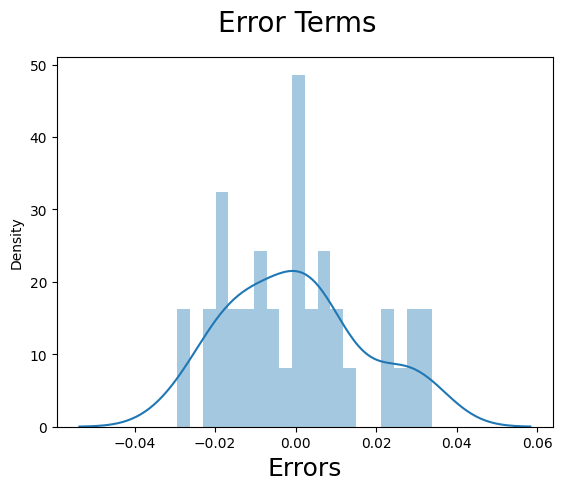

In [977]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [978]:
## Model Evalulation
y_test = df_test.pop('gmv')
X_test = df_test

In [979]:
X_test = X_test[X_train_lm_1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test.head()

const  adStock_ Affiliates   GamePad  GamingHeadset  GamingMemoryCard  \
6     1.0             0.215478  0.590909       0.004995          0.504310   
20    1.0             0.751331  0.587041       0.365123          1.000000   
33    1.0             0.655316  0.554159       0.247502          0.150862   
28    1.0             0.985673  0.367505       0.723433          0.784483   
42    1.0             1.000000  0.496132       0.743415          0.219828   

    GamingMouse  JoystickGamingWheel  NPS_lag1  
6      0.132791             0.163121  1.000000  
20     0.414634             0.170213  0.000000  
33     0.387534             0.198582  0.256634  
28     0.398374             0.000000  0.007175  
42     0.476965             0.780142  0.372341

In [980]:
y_pred = lr1.predict(X_test)

In [981]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm_1, y_train, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

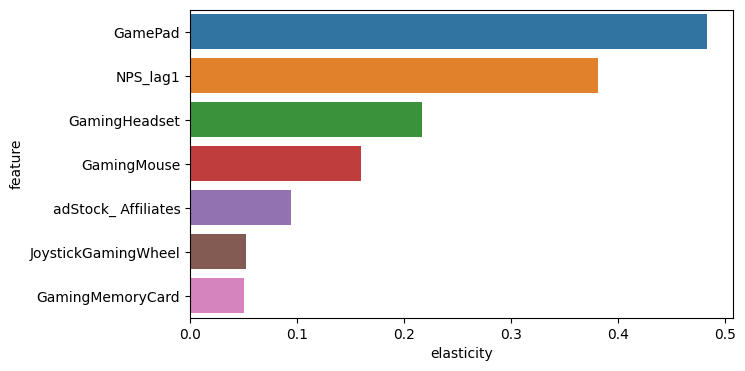

In [982]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

## Home Audio Distributed lag models

In [983]:
# creating lag features
df = createKPiForDistributedLag(final_home_data)
df.head()

weekly_order  Month  Year  adStock_TV  adStock_Digital  \
0            32      8  2015    0.027648         0.776115   
1            36      9  2015    0.777460         0.580839   
2            37      9  2015    1.164606         0.556733   
3            38      9  2015    1.358178         0.544679   
4            39      9  2015    1.454965         0.538653   

   adStock_Sponsorship  adStock_Content Marketing  adStock_Online marketing  \
0             1.267609                   0.000112                  0.204007   
1            12.815056                   0.122060                  3.307299   
2            18.960905                   0.183088                  4.929143   
3            22.033829                   0.213603                  5.740065   
4            23.570291                   0.228860                  6.145525   

   adStock_ Affiliates  adStock_SEM  ...  sla_lag3  \
0             0.091763     1.531288  ...  0.000000   
1             1.025499     1.849175  ...  0.000000   
2             1.520115     2.155199  ...  0.000000   
3             1.767423     2.308211  ...  9.000000   
4             1.891077     2.384717  ...  5.611213   

   product_procurement_sla_lag1  product_procurement_sla_lag2  \
0                      0.000000                      0.000000   
1                      2.000000                      0.000000   
2                      2.747715                      2.000000   
3                      2.837750                      2.747715   
4                      2.642518                      2.837750   

   product_procurement_sla_lag3  discount_lag1  discount_lag2  discount_lag3  \
0                      0.000000       0.000000       0.000000       0.000000   
1                      0.000000       0.160000       0.000000       0.000000   
2                      0.000000       0.391554       0.160000       0.000000   
3                      2.000000       0.392017       0.391554       0.160000   
4                      2.747715       0.377654       0.392017       0.391554   

    NPS_lag1   NPS_lag2   NPS_lag3  
0   0.000000   0.000000   0.000000  
1  54.599588   0.000000   0.000000  
2  59.964120  54.599588   0.000000  
3  59.987101  59.964120  54.599588  
4  59.987101  59.987101  59.964120  

[5 rows x 75 columns]

In [984]:
df=df.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [985]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [986]:
scaler = MinMaxScaler()

In [987]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS',
        'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_TV_lag3',
       'adStock_Digital_lag1', 'adStock_Digital_lag2', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Sponsorship_lag2',
       'adStock_Sponsorship_lag3', 'adStock_Content Marketing_lag1',
       'adStock_Content Marketing_lag2', 'adStock_Content Marketing_lag3',
       'adStock_Online marketing_lag1', 'adStock_Online marketing_lag2',
       'adStock_Online marketing_lag3', 'adStock_ Affiliates_lag1',
       'adStock_ Affiliates_lag2', 'adStock_ Affiliates_lag3',
       'adStock_SEM_lag1', 'adStock_SEM_lag2', 'adStock_SEM_lag3',
       'adStock_Other_lag1', 'adStock_Other_lag2', 'adStock_Other_lag3',
       'gmv_lag1', 'gmv_lag2', 'gmv_lag3', 'sla_lag1', 'sla_lag2', 'sla_lag3',
       'product_procurement_sla_lag1', 'product_procurement_sla_lag2',
       'product_procurement_sla_lag3', 'discount_lag1', 'discount_lag2',
       'discount_lag3', 'NPS_lag1', 'NPS_lag2', 'NPS_lag3']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [988]:
y_train = df_train.pop('gmv')
X_train = df_train

In [989]:
# Create a Linear Regression model
lm = LinearRegression()

# Fit the model on training data
lm.fit(X_train, y_train)

# Running Recursive Feature Elimination (RFE) to select top 20 features
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [990]:
# selecting features given by rfe
cols = X_train.columns[rfe.support_]
cols

Index(['adStock_TV', 'product_procurement_sla', 'NPS', 'discount',
       'total_special_sale_days', 'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker',
       'adStock_TV_lag1', 'adStock_TV_lag2', 'adStock_Digital_lag1',
       'adStock_Digital_lag2', 'adStock_Digital_lag3',
       'adStock_Sponsorship_lag1', 'adStock_Sponsorship_lag2',
       'adStock_Content Marketing_lag2', 'adStock_Other_lag1',
       'product_procurement_sla_lag2', 'product_procurement_sla_lag3',
       'NPS_lag3'],
      dtype='object')

In [991]:
# neglecting the features not selected by rfe
X_train.columns[~rfe.support_]

Index(['weekly_order', 'Month', 'Year', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'BoomBox', 'DJController', 'Dock',
       'DockingStation', 'SlingBox', 'SoundMixer', 'VoiceRecorder', 'gmv_lag',
       'adStock_TV_lag3', 'adStock_Sponsorship_lag3',
       'adStock_Content Marketing_lag1', 'adStock_Content Marketing_lag3',
       'adStock_Online marketing_lag1', 'adStock_Online marketing_lag2',
       'adStock_Online marketing_lag3', 'adStock_ Affiliates_lag1',
       'adStock_ Affiliates_lag2', 'adStock_ Affiliates_lag3',
       'adStock_SEM_lag1', 'adStock_SEM_lag2', 'adStock_SEM_lag3',
       'adStock_Other_lag2', 'adStock_Other_lag3', 'gmv_lag1', 'gmv_lag2',
       'gmv_lag3', 'sla_lag1', 'sla_lag2', 'sla_lag3',
       'product_procurement_sla_lag1', 'discount_lag1',

In [992]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [993]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2556.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.36e-23
Time:                        17:46:14   Log-Likelihood:                 163.21
No. Observations:                  36   AIC:                            -284.4
Df Residuals:                      15   BIC:                            -251.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features     VIF
12            adStock_Digital_lag2  272.83
0                            const  117.26
9                  adStock_TV_lag1  107.15
16  adStock_Content Marketing_lag2   76.08
11            adStock_Digital_lag1   72.94
14        adStock_Sponsorship_lag1   68.70
15        adStock_Sponsorship_lag2   64.93
20                        NPS_lag3   39.89
19    product_procurement_sla_lag3   33.68
8                 HomeAudioSpeaker   33.64
10                 adStock_TV_lag2   26.86
1                       adStock_TV   26.18
18    product_procurement_sla_lag2   24.77
13            adStock_Digital_lag3   23.51
4                         discount   17.74
3                              NPS   16.25
6                          FMRadio   14.73
17              adStock_Other_lag1   13.07
2          product_procurement_sla    9.73
7                       HiFiSystem    6.01
5          total_special_sale_days    5.14

In [994]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["adStock_TV_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2591.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.21e-24
Time:                        17:46:14   Log-Likelihood:                 161.36
No. Observations:                  36   AIC:                            -282.7
Df Residuals:                      16   BIC:                            -251.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features     VIF
11            adStock_Digital_lag2  216.75
0                            const  115.31
10            adStock_Digital_lag1   61.35
15  adStock_Content Marketing_lag2   61.17
14        adStock_Sponsorship_lag2   52.06
13        adStock_Sponsorship_lag1   51.34
19                        NPS_lag3   39.62
8                 HomeAudioSpeaker   33.64
18    product_procurement_sla_lag3   30.48
12            adStock_Digital_lag3   23.51
17    product_procurement_sla_lag2   22.19
3                              NPS   15.55
6                          FMRadio   14.71
4                         discount   14.01
16              adStock_Other_lag1    8.56
2          product_procurement_sla    7.81
1                       adStock_TV    7.60
9                  adStock_TV_lag2    7.35
5          total_special_sale_days    5.01
7                       HiFiSystem    4.06

In [995]:
# Let's drop feature with highest p-value
X_train_new1= X_train_new.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2715.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.08e-26
Time:                        17:46:15   Log-Likelihood:                 160.14
No. Observations:                  36   AIC:                            -282.3
Df Residuals:                      17   BIC:                            -252.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features     VIF
10            adStock_Digital_lag2  196.76
0                            const  101.28
14  adStock_Content Marketing_lag2   60.43
9             adStock_Digital_lag1   56.28
13        adStock_Sponsorship_lag2   48.43
12        adStock_Sponsorship_lag1   47.44
18                        NPS_lag3   33.50
17    product_procurement_sla_lag3   26.17
16    product_procurement_sla_lag2   19.49
7                 HomeAudioSpeaker   18.43
11            adStock_Digital_lag3   18.40
5                          FMRadio   11.08
3                              NPS   11.03
15              adStock_Other_lag1    8.17
1                       adStock_TV    7.58
8                  adStock_TV_lag2    7.03
4          total_special_sale_days    4.95
6                       HiFiSystem    3.81
2          product_procurement_sla    2.41

In [996]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["product_procurement_sla_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2170.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.62e-26
Time:                        17:46:15   Log-Likelihood:                 154.05
No. Observations:                  36   AIC:                            -272.1
Df Residuals:                      18   BIC:                            -243.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features     VIF
10            adStock_Digital_lag2  194.50
0                            const   84.89
14  adStock_Content Marketing_lag2   59.26
9             adStock_Digital_lag1   56.20
12        adStock_Sponsorship_lag1   46.09
13        adStock_Sponsorship_lag2   45.71
16    product_procurement_sla_lag2   19.40
17                        NPS_lag3   18.98
7                 HomeAudioSpeaker   18.38
11            adStock_Digital_lag3   18.17
5                          FMRadio   11.06
3                              NPS    9.17
15              adStock_Other_lag1    8.17
1                       adStock_TV    7.48
8                  adStock_TV_lag2    6.10
4          total_special_sale_days    4.90
6                       HiFiSystem    3.80
2          product_procurement_sla    2.41

In [997]:
# Let's drop feature with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_TV_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1709.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.48e-26
Time:                        17:46:15   Log-Likelihood:                 147.69
No. Observations:                  36   AIC:                            -261.4
Df Residuals:                      19   BIC:                            -234.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features     VIF
9             adStock_Digital_lag2  188.59
0                            const   82.69
8             adStock_Digital_lag1   56.16
13  adStock_Content Marketing_lag2   52.58
11        adStock_Sponsorship_lag1   46.09
12        adStock_Sponsorship_lag2   45.38
15    product_procurement_sla_lag2   19.23
16                        NPS_lag3   18.40
7                 HomeAudioSpeaker   18.13
10            adStock_Digital_lag3   18.13
5                          FMRadio   11.04
3                              NPS    8.45
14              adStock_Other_lag1    7.18
1                       adStock_TV    6.76
4          total_special_sale_days    4.89
6                       HiFiSystem    3.28
2          product_procurement_sla    2.41

In [998]:
# Let's drop feature with highest VIF
X_train_new4 = X_train_new3.drop(["adStock_Digital_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     694.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           8.34e-24
Time:                        17:46:15   Log-Likelihood:                 129.42
No. Observations:                  36   AIC:                            -226.8
Df Residuals:                      20   BIC:                            -201.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  60.09
8             adStock_Digital_lag1  38.04
10        adStock_Sponsorship_lag1  34.79
12  adStock_Content Marketing_lag2  25.34
11        adStock_Sponsorship_lag2  20.94
7                 HomeAudioSpeaker   9.81
14    product_procurement_sla_lag2   9.62
5                          FMRadio   8.38
9             adStock_Digital_lag3   7.78
15                        NPS_lag3   6.50
3                              NPS   5.36
1                       adStock_TV   3.52
13              adStock_Other_lag1   3.41
6                       HiFiSystem   3.21
4          total_special_sale_days   2.74
2          product_procurement_sla   1.96

In [999]:
# Let's drop feature with highest p-value
X_train_new5 = X_train_new4.drop(["adStock_Digital_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     781.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.90e-25
Time:                        17:46:15   Log-Likelihood:                 129.42
No. Observations:                  36   AIC:                            -228.8
Df Residuals:                      21   BIC:                            -205.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  60.09
8             adStock_Digital_lag1  37.96
9         adStock_Sponsorship_lag1  30.02
11  adStock_Content Marketing_lag2  20.56
10        adStock_Sponsorship_lag2  19.10
13    product_procurement_sla_lag2   9.10
7                 HomeAudioSpeaker   8.56
5                          FMRadio   7.85
14                        NPS_lag3   6.25
3                              NPS   5.35
6                       HiFiSystem   3.12
1                       adStock_TV   2.80
4          total_special_sale_days   2.64
12              adStock_Other_lag1   2.40
2          product_procurement_sla   1.95

In [1000]:
# Let's drop feature with highest p-value
X_train_new6 = X_train_new5.drop(["total_special_sale_days"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     879.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           9.71e-27
Time:                        17:46:15   Log-Likelihood:                 129.38
No. Observations:                  36   AIC:                            -230.8
Df Residuals:                      22   BIC:                            -208.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  58.97
7             adStock_Digital_lag1  33.05
8         adStock_Sponsorship_lag1  29.43
9         adStock_Sponsorship_lag2  18.97
10  adStock_Content Marketing_lag2  17.56
12    product_procurement_sla_lag2   9.01
4                          FMRadio   7.16
13                        NPS_lag3   6.00
6                 HomeAudioSpeaker   5.78
3                              NPS   5.31
5                       HiFiSystem   3.12
1                       adStock_TV   2.44
11              adStock_Other_lag1   2.28
2          product_procurement_sla   1.51

In [1001]:
# Let's drop feature with highest p-value
X_train_new7 = X_train_new6.drop(["adStock_Other_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     980.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.57e-28
Time:                        17:46:15   Log-Likelihood:                 129.09
No. Observations:                  36   AIC:                            -232.2
Df Residuals:                      23   BIC:                            -211.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Features    VIF
0                            const  58.02
7             adStock_Digital_lag1  32.33
8         adStock_Sponsorship_lag1  29.22
9         adStock_Sponsorship_lag2  18.12
10  adStock_Content Marketing_lag2  15.07
11    product_procurement_sla_lag2   9.00
4                          FMRadio   7.00
12                        NPS_lag3   5.83
6                 HomeAudioSpeaker   5.32
3                              NPS   5.11
5                       HiFiSystem   3.01
1                       adStock_TV   1.91
2          product_procurement_sla   1.51

In [1002]:
# Let's drop feature with highest p-value
X_train_new8 = X_train_new7.drop(["adStock_Content Marketing_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1082.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.50e-29
Time:                        17:46:15   Log-Likelihood:                 128.54
No. Observations:                  36   AIC:                            -233.1
Df Residuals:                      24   BIC:                            -214.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                          const  52.34
8       adStock_Sponsorship_lag1  14.39
7           adStock_Digital_lag1  12.06
9       adStock_Sponsorship_lag2   7.54
4                        FMRadio   6.69
10  product_procurement_sla_lag2   6.38
11                      NPS_lag3   5.40
6               HomeAudioSpeaker   4.64
3                            NPS   4.55
5                     HiFiSystem   2.88
1                     adStock_TV   1.77
2        product_procurement_sla   1.51

In [1003]:
# Let's drop feature with highest p-value
X_train_new9 = X_train_new8.drop(["adStock_Digital_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1219.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.07e-31
Time:                        17:46:15   Log-Likelihood:                 128.23
No. Observations:                  36   AIC:                            -234.5
Df Residuals:                      25   BIC:                            -217.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                          const  41.41
7       adStock_Sponsorship_lag1   7.53
8       adStock_Sponsorship_lag2   7.48
4                        FMRadio   5.65
9   product_procurement_sla_lag2   5.41
10                      NPS_lag3   5.08
6               HomeAudioSpeaker   4.52
5                     HiFiSystem   2.88
3                            NPS   2.79
1                     adStock_TV   1.76
2        product_procurement_sla   1.50

In [1004]:
# Let's drop feature with highest p-value
X_train_new10 = X_train_new9.drop(["adStock_Sponsorship_lag1"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1398.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.43e-32
Time:                        17:46:16   Log-Likelihood:                 128.10
No. Observations:                  36   AIC:                            -236.2
Df Residuals:                      26   BIC:                            -220.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Features    VIF
0                         const  37.22
4                       FMRadio   5.63
8  product_procurement_sla_lag2   5.15
9                      NPS_lag3   5.04
6              HomeAudioSpeaker   4.46
5                    HiFiSystem   2.87
3                           NPS   2.04
7      adStock_Sponsorship_lag2   1.99
1                    adStock_TV   1.72
2       product_procurement_sla   1.46

In [1005]:
# Let's drop feature with highest p-value
X_train_new11 = X_train_new10.drop(["product_procurement_sla_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1574.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.60e-34
Time:                        17:46:16   Log-Likelihood:                 127.44
No. Observations:                  36   AIC:                            -236.9
Df Residuals:                      27   BIC:                            -222.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  34.95
4                   FMRadio   5.62
6          HomeAudioSpeaker   4.37
5                HiFiSystem   2.79
3                       NPS   1.94
7  adStock_Sponsorship_lag2   1.91
1                adStock_TV   1.72
8                  NPS_lag3   1.57
2   product_procurement_sla   1.16

In [1006]:
# Let's drop feature with highest p-value
X_train_new12 = X_train_new11.drop(["NPS_lag3"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1819.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.76e-35
Time:                        17:46:16   Log-Likelihood:                 126.99
No. Observations:                  36   AIC:                            -238.0
Df Residuals:                      28   BIC:                            -225.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const  26.79
4                   FMRadio   5.62
6          HomeAudioSpeaker   4.37
5                HiFiSystem   2.79
3                       NPS   1.79
7  adStock_Sponsorship_lag2   1.73
1                adStock_TV   1.71
2   product_procurement_sla   1.14

In [1007]:
# Let's drop feature with highest p-value
X_train_new13 = X_train_new12.drop(["adStock_Sponsorship_lag2"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2149.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.97e-37
Time:                        17:46:16   Log-Likelihood:                 126.58
No. Observations:                  36   AIC:                            -239.2
Df Residuals:                      29   BIC:                            -228.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  23.68
4                  FMRadio   4.81
6         HomeAudioSpeaker   4.19
5               HiFiSystem   2.79
1               adStock_TV   1.66
3                      NPS   1.56
2  product_procurement_sla   1.07

In [1008]:
# Let's drop feature with highest p-value
X_train_new14 = X_train_new13.drop(["HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2103.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           3.19e-37
Time:                        17:46:16   Log-Likelihood:                 122.30
No. Observations:                  36   AIC:                            -232.6
Df Residuals:                      30   BIC:                            -223.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  23.47
4                  FMRadio   4.12
5         HomeAudioSpeaker   4.07
3                      NPS   1.50
1               adStock_TV   1.49
2  product_procurement_sla   1.04

In [1009]:
# Let's drop feature with highest p-value
X_train_new15 = X_train_new14.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2366.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.79e-38
Time:                        17:46:16   Log-Likelihood:                 119.83
No. Observations:                  36   AIC:                            -229.7
Df Residuals:                      31   BIC:                            -221.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  21.71
4         HomeAudioSpeaker   3.99
3                  FMRadio   3.64
2                      NPS   1.26
1  product_procurement_sla   1.00

In [1010]:
# Let's drop feature with highest p-value
X_train_new16 = X_train_new15.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm_1 = sm.add_constant(X_train_new16)

lr1 = sm.OLS(y_train, X_train_lm_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1 .values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3051.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.17e-39
Time:                        17:46:16   Log-Likelihood:                 118.66
No. Observations:                  36   AIC:                            -229.3
Df Residuals:                      32   BIC:                            -223.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                    const  19.64
2                  FMRadio   3.18
3         HomeAudioSpeaker   3.18
1  product_procurement_sla   1.00

In [1011]:
# Let's drop feature with highest p-value
X_train_new17 = X_train_new16.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm_2 = sm.add_constant(X_train_new17)

lr2 = sm.OLS(y_train, X_train_lm_2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2 .values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3714.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.43e-39
Time:                        17:46:16   Log-Likelihood:                 114.36
No. Observations:                  36   AIC:                            -222.7
Df Residuals:                      33   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0                    const  18.0
1  product_procurement_sla   1.0
2         HomeAudioSpeaker   1.0

In [1012]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9742356494673707
lr model 2 r2_score 0.9719977469439938


In [1013]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm_1,X_train_lm_2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.00012883961496571025
lr model 2 MSE 0.000130982532944341


In terms of R-squared values, lr model 1 has a slightly higher R-squared score (0.9742) compared to lr model 2 (0.9720), indicating that lr model 1 explains a larger proportion of the variance in the dependent variable.

Regarding Mean Squared Error (MSE), a lower MSE is generally desirable. In this case, lr model 1 has a lower MSE (0.0001288) compared to lr model 2 (0.0001310), suggesting that lr model 1 has better predictive accuracy in terms of minimizing the squared differences between predicted and actual values.

In [1014]:
y_train_price = lr1.predict(X_train_lm_1)

<ipython-input-1015-f9aea80bd5b1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 0, 'Errors')

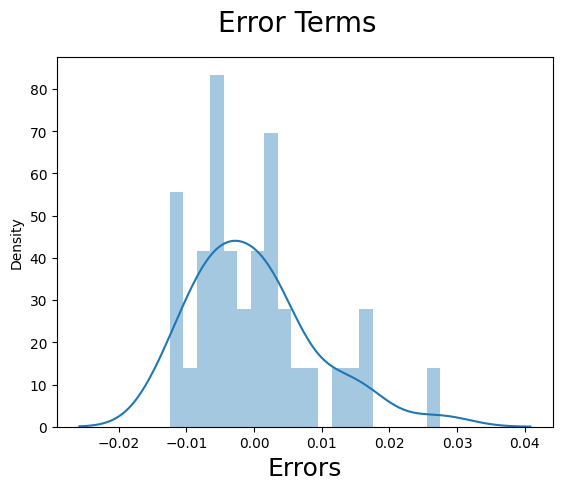

In [1015]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [1016]:

X_test = df_test
y_test = df_test.pop('gmv')

In [1017]:
X_test = X_test[X_train_lm_1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

const  product_procurement_sla   FMRadio  HomeAudioSpeaker
6     1.0                 0.194437  0.897590          0.243655
17    1.0                 0.114948  0.572289          0.784033
19    1.0                 1.000000  0.600402          1.000000
29    1.0                 0.242494  0.714859          0.471620
38    1.0                 0.452452  0.411647          0.213659
44    1.0                 0.268597  0.000000          0.000000
5     1.0                 0.000000  1.000000          0.320258
25    1.0                 0.313278  0.728916          0.844485
27    1.0                 0.513196  0.783133          0.460545

In [1018]:
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

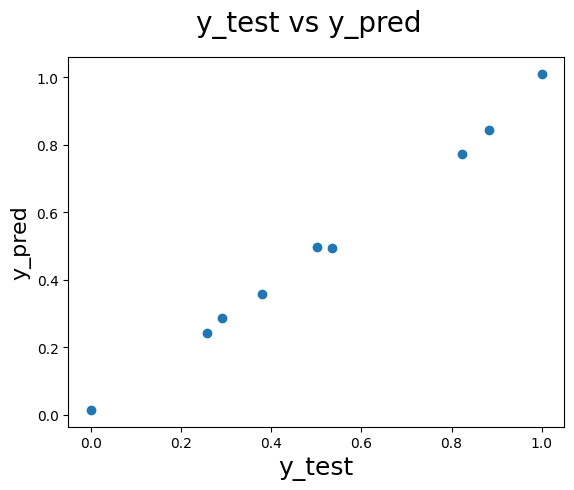

In [1019]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [1020]:
    coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
    coefficients_df.columns = ['feature','coefficient']
    elasticity_data = calculateElasticity(X_train_lm_1, y_train, coefficients_df)

<Axes: xlabel='elasticity', ylabel='feature'>

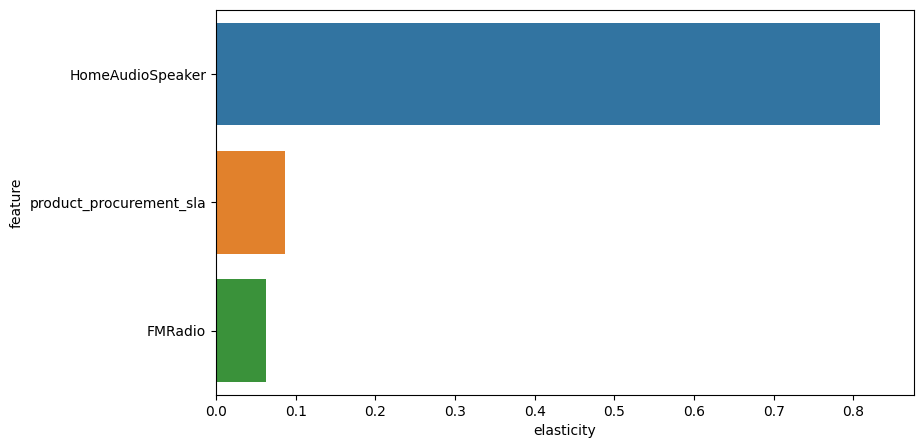

In [1021]:
plt.figure(figsize = (9,5))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))